In [ ]:
!pip install mediapipe opencv-python pandas scikit-learn

In [1]:
import mediapipe as mp
import cv2

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [3]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# Set up holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detections
        results = holistic.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw face landmarks (using mp_face_mesh connections)
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
            )

        # Draw right hand
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )

          # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
      
                        
        cv2.imshow('Output Window', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()


KeyboardInterrupt: 

In [4]:
results.face_landmarks.landmark[0].visibility

0.0

# 2. Capture Landmarks & Export to CSV
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

In [5]:
import csv
import os
import numpy as np

In [6]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [7]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [8]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [9]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

ADD CLASS TO DATASET


In [ ]:
class_name = "new class"

COPY LANDMARKS FOR DIFFRENT EMOTIONS

In [29]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# Set up holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detections
        results = holistic.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw face landmarks (using mp_face_mesh connections)
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
            )

        # Draw right hand
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )

          # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Output Window', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()


KeyboardInterrupt: 

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('coords.csv')

In [9]:
df.head()

class        x1        y1        z1        v1        x2        y2  \
0  Happy  0.388529  0.604402 -0.762000  0.999788  0.424678  0.518939   
1  Happy  0.391215  0.597469 -1.265336  0.999803  0.429576  0.512392   
2  Happy  0.392369  0.594793 -1.296410  0.999816  0.432348  0.509666   
3  Happy  0.393104  0.592780 -1.305722  0.999828  0.433933  0.507358   
4  Happy  0.393914  0.591278 -1.280299  0.999839  0.434922  0.505733   

         z2        v2        x3  ...      z499  v499      x500      y500  \
0 -0.757497  0.999483  0.446725  ... -0.021665   0.0  0.467155  0.491599   
1 -1.225691  0.999519  0.452164  ... -0.022802   0.0  0.466304  0.490896   
2 -1.259244  0.999549  0.455445  ... -0.022338   0.0  0.466226  0.491772   
3 -1.268109  0.999577  0.457339  ... -0.022398   0.0  0.465187  0.491888   
4 -1.242892  0.999603  0.458428  ... -0.022265   0.0  0.464875  0.492440   

       z500  v500      x501      y501      z501  v501  
0 -0.007689   0.0  0.473405  0.485873 -0.008051   0.0  
1 -0.010802   0.0  0.472531  0.484522 -0.011325   0.0  
2 -0.009805   0.0  0.472410  0.485566 -0.010288   0.0  
3 -0.009951   0.0  0.471437  0.485784 -0.010437   0.0  
4 -0.009978   0.0  0.471074  0.486313 -0.010484   0.0  

[5 rows x 2005 columns]

In [10]:
df.tail()

class        x1        y1        z1        v1        x2        y2  \
1291  Disgust  0.378980  0.647803 -0.968850  0.999903  0.419498  0.560776   
1292  Disgust  0.365653  0.649457 -0.927991  0.999878  0.408016  0.562889   
1293  Disgust  0.359472  0.651624 -0.888793  0.999864  0.402808  0.565029   
1294  Disgust  0.355039  0.653525 -0.906139  0.999840  0.397685  0.567553   
1295  Disgust  0.350763  0.653729 -0.885191  0.999822  0.392734  0.568173   

            z2        v2        x3  ...      z499  v499      x500      y500  \
1291 -0.960069  0.999757  0.444533  ... -0.019607   0.0  0.452846  0.542247   
1292 -0.932410  0.999685  0.433207  ... -0.019611   0.0  0.442441  0.539036   
1293 -0.893926  0.999644  0.428193  ... -0.019409   0.0  0.438614  0.537515   
1294 -0.913662  0.999568  0.423512  ... -0.019777   0.0  0.437041  0.536780   
1295 -0.898037  0.999515  0.418751  ... -0.018858   0.0  0.435215  0.536253   

          z500  v500      x501      y501      z501  v501  
1291 -0.010850   0.0  0.458811  0.537829 -0.011927   0.0  
1292 -0.013877   0.0  0.448395  0.534646 -0.015191   0.0  
1293 -0.015014   0.0  0.444554  0.533247 -0.016465   0.0  
1294 -0.015811   0.0  0.443044  0.532690 -0.017331   0.0  
1295 -0.015404   0.0  0.441200  0.532095 -0.016956   0.0  

[5 rows x 2005 columns]

In [11]:
df[df['class']=='Sad']

class        x1        y1        z1        v1        x2        y2  \
179   Sad  0.396601  0.715325 -1.661303  0.999159  0.419546  0.649969   
180   Sad  0.397605  0.714745 -1.590639  0.999245  0.420255  0.649303   
181   Sad  0.397608  0.702666 -1.564534  0.999327  0.421353  0.634074   
182   Sad  0.397572  0.692206 -1.529035  0.999362  0.421934  0.619964   
183   Sad  0.408760  0.682322 -1.478688  0.999414  0.435662  0.605275   
..    ...       ...       ...       ...       ...       ...       ...   
384   Sad  0.482582  0.616689 -1.355200  0.999772  0.491712  0.541292   
385   Sad  0.482129  0.617020 -1.368824  0.999756  0.491524  0.541535   
386   Sad  0.482098  0.617023 -1.359271  0.999739  0.491460  0.541539   
387   Sad  0.482011  0.617441 -1.361444  0.999737  0.491441  0.541820   
388   Sad  0.481596  0.618586 -1.351059  0.999727  0.491235  0.542497   

           z2        v2        x3  ...      z499  v499      x500      y500  \
179 -1.683814  0.997077  0.439168  ... -0.035280   0.0  0.472984  0.593658   
180 -1.618730  0.997392  0.439952  ... -0.035926   0.0  0.474467  0.606493   
181 -1.587057  0.997685  0.441749  ... -0.033317   0.0  0.473235  0.583797   
182 -1.542301  0.997807  0.442831  ... -0.034810   0.0  0.471988  0.582521   
183 -1.480401  0.997990  0.455524  ... -0.033408   0.0  0.470210  0.563766   
..        ...       ...       ...  ...       ...   ...       ...       ...   
384 -1.328839  0.999407  0.501425  ... -0.021067   0.0  0.527470  0.481755   
385 -1.342420  0.999367  0.501284  ... -0.021800   0.0  0.528452  0.481180   
386 -1.333950  0.999323  0.501211  ... -0.021088   0.0  0.528199  0.480871   
387 -1.336011  0.999317  0.501201  ... -0.021511   0.0  0.527955  0.482270   
388 -1.326783  0.999291  0.501054  ... -0.022358   0.0  0.528186  0.482346   

         z500  v500      x501      y501      z501  v501  
179 -0.028268   0.0  0.477273  0.581344 -0.029053   0.0  
180 -0.030333   0.0  0.478787  0.595492 -0.031434   0.0  
181 -0.028034   0.0  0.477323  0.575147 -0.029270   0.0  
182 -0.029465   0.0  0.476102  0.576507 -0.030952   0.0  
183 -0.027585   0.0  0.474532  0.557999 -0.028973   0.0  
..        ...   ...       ...       ...       ...   ...  
384  0.003175   0.0  0.530145  0.473824  0.003759   0.0  
385  0.002033   0.0  0.531052  0.472985  0.002608   0.0  
386  0.002248   0.0  0.530737  0.472785  0.002816   0.0  
387  0.002035   0.0  0.530507  0.474102  0.002638   0.0  
388  0.000988   0.0  0.530795  0.474278  0.001498   0.0  

[210 rows x 2005 columns]

In [12]:
df[df['class']=='Happy']

class        x1        y1        z1        v1        x2        y2  \
0    Happy  0.388529  0.604402 -0.762000  0.999788  0.424678  0.518939   
1    Happy  0.391215  0.597469 -1.265336  0.999803  0.429576  0.512392   
2    Happy  0.392369  0.594793 -1.296410  0.999816  0.432348  0.509666   
3    Happy  0.393104  0.592780 -1.305722  0.999828  0.433933  0.507358   
4    Happy  0.393914  0.591278 -1.280299  0.999839  0.434922  0.505733   
..     ...       ...       ...       ...       ...       ...       ...   
174  Happy  0.457584  0.585179 -1.303329  0.999963  0.489734  0.497707   
175  Happy  0.458541  0.585756 -1.177849  0.999963  0.491056  0.498016   
176  Happy  0.459095  0.586108 -1.154411  0.999962  0.491873  0.498112   
177  Happy  0.458992  0.586253 -1.162827  0.999962  0.491889  0.498220   
178  Happy  0.459095  0.586263 -1.250949  0.999962  0.492203  0.498224   

           z2        v2        x3  ...      z499  v499      x500      y500  \
0   -0.757497  0.999483  0.446725  ... -0.021665   0.0  0.467155  0.491599   
1   -1.225691  0.999519  0.452164  ... -0.022802   0.0  0.466304  0.490896   
2   -1.259244  0.999549  0.455445  ... -0.022338   0.0  0.466226  0.491772   
3   -1.268109  0.999577  0.457339  ... -0.022398   0.0  0.465187  0.491888   
4   -1.242892  0.999603  0.458428  ... -0.022265   0.0  0.464875  0.492440   
..        ...       ...       ...  ...       ...   ...       ...       ...   
174 -1.259424  0.999910  0.506568  ... -0.018542   0.0  0.529302  0.473570   
175 -1.135661  0.999909  0.507735  ... -0.018548   0.0  0.529510  0.474232   
176 -1.114187  0.999908  0.508477  ... -0.018807   0.0  0.529448  0.474156   
177 -1.121094  0.999907  0.508594  ... -0.019121   0.0  0.529759  0.474330   
178 -1.207755  0.999907  0.508915  ... -0.019088   0.0  0.528934  0.475289   

         z500  v500      x501      y501      z501  v501  
0   -0.007689   0.0  0.473405  0.485873 -0.008051   0.0  
1   -0.010802   0.0  0.472531  0.484522 -0.011325   0.0  
2   -0.009805   0.0  0.472410  0.485566 -0.010288   0.0  
3   -0.009951   0.0  0.471437  0.485784 -0.010437   0.0  
4   -0.009978   0.0  0.471074  0.486313 -0.010484   0.0  
..        ...   ...       ...       ...       ...   ...  
174  0.010179   0.0  0.534229  0.468071  0.010818   0.0  
175  0.009979   0.0  0.534554  0.468508  0.010648   0.0  
176  0.009286   0.0  0.534547  0.468296  0.009959   0.0  
177  0.008950   0.0  0.534797  0.468605  0.009565   0.0  
178  0.008858   0.0  0.534018  0.469487  0.009480   0.0  

[179 rows x 2005 columns]

In [13]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [15]:
y_test

35         Happy
1016    Contempt
494      Neutral
350          Sad
1291     Disgust
          ...   
118        Happy
541      Neutral
308          Sad
523      Neutral
104        Happy
Name: class, Length: 389, dtype: object

## 3.2 Train Machine Learning Classification Model

In [16]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [17]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [18]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [1]:
fit_models['rf'].predict(X_test)


NameError: name 'fit_models' is not defined

## 3.3 Evaluate and Serialize Model 

In [21]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [22]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 0.9974293059125964


In [23]:
fit_models['rf'].predict(X_test)

array(['Happy', 'Contempt', 'Neutral', 'Sad', 'Disgust', 'Contempt',
       'Angry', 'Surprise', 'Happy', 'Happy', 'Surprise', 'Surprise',
       'Angry', 'Contempt', 'Happy', 'Sad', 'Surprise', 'Disgust',
       'Contempt', 'Angry', 'Sad', 'Happy', 'Contempt', 'Sad', 'Angry',
       'Sad', 'Angry', 'Disgust', 'Sad', 'Disgust', 'Disgust', 'Disgust',
       'Sad', 'Neutral', 'Angry', 'Disgust', 'Contempt', 'Sad', 'Neutral',
       'Angry', 'Happy', 'Sad', 'Contempt', 'Angry', 'Disgust',
       'Surprise', 'Angry', 'Surprise', 'Sad', 'Happy', 'Neutral',
       'Happy', 'Happy', 'Sad', 'Sad', 'Surprise', 'Happy', 'Disgust',
       'Sad', 'Sad', 'Disgust', 'Surprise', 'Contempt', 'Sad', 'Neutral',
       'Sad', 'Surprise', 'Sad', 'Surprise', 'Surprise', 'Sad', 'Neutral',
       'Neutral', 'Contempt', 'Angry', 'Contempt', 'Sad', 'Disgust',
       'Disgust', 'Disgust', 'Disgust', 'Disgust', 'Neutral', 'Neutral',
       'Disgust', 'Angry', 'Contempt', 'Happy', 'Disgust', 'Happy',
       'Cont

In [24]:
y_test

35         Happy
1016    Contempt
494      Neutral
350          Sad
1291     Disgust
          ...   
118        Happy
541      Neutral
308          Sad
523      Neutral
104        Happy
Name: class, Length: 389, dtype: object

In [25]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [27]:
!pip install seaborn

In [28]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


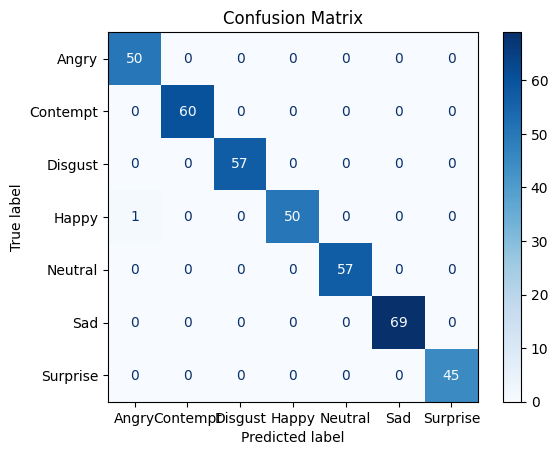

In [30]:
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# 4. Make Detections with Model

In [31]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [32]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [33]:
y_pred = model.predict(X_test)


In [34]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import pickle

# Load model
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

# MediaPipe setup
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# Extract all keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z, 0] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 4)
    return np.concatenate([pose, face])

# Open webcam
cap = cv2.VideoCapture(0)

# Start holistic detection
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw landmarks
       
        if results.face_landmarks:
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, 
                                      landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=1, circle_radius=1),  
                                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 128, 255), thickness=1, circle_radius=1)  
                                    )
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Prediction
        try:
            keypoints = extract_keypoints(results)
            X = pd.DataFrame([keypoints])
            prediction = model.predict(X)[0]
            probability = model.predict_proba(X)[0]

            # Show on screen
            cv2.putText(image, f'{prediction}', (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            print("Prediction:", prediction, "| Probabilities:", probability)
        except Exception as e:
            print("Error in prediction:", e)

        # Display
        cv2.imshow('Output Window', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.2  0.   0.03 0.19 0.38 0.12]
Prediction: Sad | Probabilities: [0.04 0.01 0.   0.06 0.02 0.86 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.   0.   0.01 0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.04 0.   0.   0.01 0.   0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.   0.01 0.   0.97 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.01 0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.   0.   0.01 0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.01 0.93 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.67 0.13]
Prediction: Sad | Probabilities: [0.03 0.02 0.   0.05 0.01 0.87 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.02 0.   0.02 0.02 0.87 0.02]
Prediction: Sad | Probabilities: [0.07 0.17 0.   0.02 0.14 0.51 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.14 0.   0.02 0.18 0.51 0.08]
Prediction: Sad | Probabilities: [0.07 0.14 0.   0.02 0.18 0.51 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.16 0.   0.03 0.24 0.3  0.16]
Prediction: Sad | Probabilities: [0.11 0.16 0.   0.03 0.23 0.31 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.18 0.   0.03 0.22 0.27 0.17]
Prediction: Sad | Probabilities: [0.07 0.15 0.   0.03 0.18 0.52 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.04 0.   0.05 0.09 0.75 0.01]
Prediction: Sad | Probabilities: [0.06 0.05 0.   0.04 0.11 0.73 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.02 0.   0.04 0.09 0.77 0.03]
Prediction: Sad | Probabilities: [0.05 0.02 0.   0.04 0.09 0.78 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.03 0.   0.02 0.06 0.84 0.02]
Prediction: Sad | Probabilities: [0.04 0.03 0.   0.02 0.06 0.83 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.02 0.   0.03 0.06 0.83 0.02]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.16 0.68 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.09 0.   0.06 0.19 0.56 0.05]
Prediction: Sad | Probabilities: [0.07 0.13 0.   0.07 0.2  0.48 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.14 0.   0.07 0.22 0.45 0.06]
Prediction: Sad | Probabilities: [0.12 0.17 0.   0.05 0.25 0.27 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.15 0.   0.06 0.21 0.39 0.08]
Prediction: Angry | Probabilities: [0.27 0.2  0.   0.13 0.17 0.02 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.18 0.   0.17 0.14 0.05 0.21]
Prediction: Angry | Probabilities: [0.25 0.19 0.   0.13 0.16 0.04 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.22 0.   0.12 0.17 0.03 0.21]
Prediction: Angry | Probabilities: [0.28 0.21 0.   0.08 0.17 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.16 0.   0.19 0.14 0.04 0.21]
Prediction: Happy | Probabilities: [0.22 0.16 0.   0.24 0.13 0.04 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.21 0.16 0.   0.23 0.15 0.02 0.23]
Prediction: Happy | Probabilities: [0.19 0.15 0.01 0.28 0.13 0.04 0.2 ]
Prediction: Happy | Probabilities: [0.19 0.16 0.01 0.3  0.11 0.02 0.21]
Prediction: Happy | Probabilities: [0.19 0.16 0.01 0.29 0.1  0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.19 0.16 0.01 0.29 0.11 0.02 0.22]
Prediction: Happy | Probabilities: [0.21 0.19 0.02 0.31 0.03 0.02 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.21 0.18 0.02 0.31 0.02 0.02 0.24]
Prediction: Happy | Probabilities: [0.21 0.19 0.02 0.31 0.02 0.02 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.22 0.18 0.02 0.31 0.02 0.02 0.23]
Prediction: Happy | Probabilities: [0.22 0.17 0.02 0.31 0.02 0.02 0.24]
Prediction: Happy | Probabilities: [0.22 0.17 0.02 0.32 0.02 0.02 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.22 0.18 0.02 0.31 0.02 0.02 0.23]
Prediction: Happy | Probabilities: [0.21 0.18 0.02 0.32 0.02 0.02 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.24 0.16 0.02 0.27 0.03 0.02 0.26]
Prediction: Happy | Probabilities: [0.23 0.16 0.02 0.3  0.02 0.02 0.25]
Prediction: Happy | Probabilities: [0.24 0.17 0.01 0.29 0.02 0.02 0.25]
Prediction: Happy | Probabilities: [0.24 0.17 0.01 0.29 0.02 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.18 0.01 0.28 0.02 0.02 0.24]
Prediction: Happy | Probabilities: [0.26 0.13 0.02 0.3  0.02 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.17 0.03 0.25 0.03 0.02 0.25]
Prediction: Angry | Probabilities: [0.25 0.23 0.03 0.22 0.03 0.02 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.28 0.   0.13 0.03 0.02 0.24]
Prediction: Angry | Probabilities: [0.33 0.29 0.   0.1  0.03 0.02 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.28 0.   0.11 0.03 0.03 0.22]
Prediction: Contempt | Probabilities: [0.3  0.32 0.   0.09 0.02 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.28 0.33 0.01 0.06 0.01 0.02 0.29]
Prediction: Angry | Probabilities: [0.37 0.21 0.01 0.13 0.01 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.2  0.02 0.16 0.02 0.02 0.19]
Prediction: Angry | Probabilities: [0.33 0.14 0.02 0.18 0.04 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.11 0.01 0.16 0.02 0.02 0.34]
Prediction: Angry | Probabilities: [0.36 0.08 0.01 0.23 0.02 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.1  0.01 0.17 0.02 0.02 0.33]
Prediction: Angry | Probabilities: [0.41 0.09 0.01 0.31 0.02 0.02 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.11 0.01 0.29 0.02 0.02 0.11]
Prediction: Angry | Probabilities: [0.43 0.06 0.01 0.19 0.02 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.53 0.03 0.   0.13 0.02 0.02 0.27]
Prediction: Angry | Probabilities: [0.57 0.06 0.   0.18 0.03 0.02 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.45 0.09 0.   0.16 0.04 0.02 0.24]
Prediction: Surprise | Probabilities: [0.35 0.08 0.   0.13 0.02 0.02 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.55 0.1  0.   0.15 0.04 0.02 0.14]
Prediction: Angry | Probabilities: [0.38 0.09 0.   0.15 0.03 0.02 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.52 0.12 0.   0.11 0.04 0.02 0.19]
Prediction: Angry | Probabilities: [0.48 0.05 0.   0.34 0.02 0.02 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.39 0.03 0.   0.5  0.01 0.02 0.05]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.55 0.01 0.02 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.35 0.   0.   0.59 0.   0.02 0.04]
Prediction: Happy | Probabilities: [0.36 0.   0.   0.58 0.   0.02 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.39 0.   0.   0.54 0.   0.02 0.05]
Prediction: Happy | Probabilities: [0.34 0.   0.   0.61 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.33 0.   0.   0.55 0.   0.   0.12]
Prediction: Happy | Probabilities: [0.37 0.   0.   0.58 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.37 0.   0.   0.58 0.   0.   0.05]
Prediction: Happy | Probabilities: [0.39 0.   0.   0.56 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.41 0.   0.   0.54 0.   0.   0.05]
Prediction: Happy | Probabilities: [0.42 0.   0.   0.53 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.37 0.   0.   0.59 0.   0.   0.04]
Prediction: Happy | Probabilities: [0.37 0.   0.   0.58 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.4  0.   0.   0.55 0.   0.   0.05]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.56 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.   0.   0.55 0.   0.   0.05]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.56 0.   0.   0.04]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.56 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.39 0.   0.   0.56 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.39 0.   0.   0.57 0.   0.   0.04]
Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.42 0.   0.   0.55 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.55 0.   0.02 0.03]
Prediction: Happy | Probabilities: [0.42 0.   0.   0.52 0.   0.03 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.   0.   0.54 0.   0.03 0.03]
Prediction: Happy | Probabilities: [0.36 0.   0.   0.58 0.   0.03 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.02 0.   0.42 0.01 0.03 0.05]
Prediction: Angry | Probabilities: [0.67 0.09 0.   0.14 0.01 0.03 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.63 0.11 0.01 0.09 0.05 0.03 0.08]
Prediction: Surprise | Probabilities: [0.24 0.02 0.   0.05 0.03 0.03 0.63]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.08 0.   0.03 0.03 0.63 0.11]
Prediction: Sad | Probabilities: [0.12 0.08 0.   0.03 0.03 0.63 0.11]
Prediction: Sad | Probabilities: [0.11 0.08 0.   0.03 0.03 0.63 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.09 0.   0.07 0.21 0.03 0.16]
Prediction: Angry | Probabilities: [0.5  0.13 0.   0.06 0.06 0.03 0.22]
Prediction: Angry | Probabilities: [0.52 0.15 0.01 0.06 0.05 0.03 0.18]
Prediction: Angry | Probabilities: [0.36 0.19 0.02 0.05 0.09 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.18 0.01 0.06 0.1  0.03 0.21]
Prediction: Angry | Probabilities: [0.49 0.16 0.01 0.09 0.06 0.03 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.18 0.   0.07 0.08 0.03 0.2 ]
Prediction: Angry | Probabilities: [0.43 0.17 0.   0.05 0.11 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.06 0.   0.04 0.12 0.17 0.34]
Prediction: Sad | Probabilities: [0.12 0.08 0.   0.03 0.03 0.63 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.03 0.03 0.63 0.11]
Prediction: Sad | Probabilities: [0.07 0.09 0.   0.03 0.04 0.64 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.07 0.   0.05 0.15 0.04 0.5 ]
Prediction: Angry | Probabilities: [0.31 0.12 0.   0.06 0.21 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.08 0.   0.06 0.24 0.03 0.21]
Prediction: Angry | Probabilities: [0.46 0.07 0.   0.07 0.22 0.03 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.04 0.   0.33 0.13 0.04 0.08]
Prediction: Angry | Probabilities: [0.39 0.04 0.   0.35 0.12 0.05 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.19 0.03 0.   0.16 0.04 0.55 0.03]
Prediction: Sad | Probabilities: [0.28 0.04 0.   0.19 0.07 0.38 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.27 0.03 0.   0.28 0.09 0.29 0.04]
Prediction: Sad | Probabilities: [0.26 0.01 0.   0.22 0.09 0.36 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.06 0.   0.28 0.18 0.08 0.11]
Prediction: Angry | Probabilities: [0.44 0.1  0.   0.05 0.17 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.43 0.11 0.   0.05 0.16 0.03 0.22]
Prediction: Angry | Probabilities: [0.5  0.11 0.   0.06 0.04 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.13 0.   0.07 0.03 0.03 0.34]
Prediction: Angry | Probabilities: [0.49 0.19 0.   0.04 0.04 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.19 0.   0.04 0.04 0.03 0.22]
Prediction: Angry | Probabilities: [0.59 0.1  0.   0.07 0.11 0.03 0.1 ]
Prediction: Angry | Probabilities: [0.62 0.12 0.   0.09 0.03 0.03 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.51 0.15 0.01 0.11 0.07 0.03 0.12]
Prediction: Angry | Probabilities: [0.46 0.18 0.01 0.08 0.05 0.03 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.12 0.01 0.05 0.18 0.03 0.2 ]
Prediction: Angry | Probabilities: [0.52 0.14 0.   0.07 0.09 0.03 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.15 0.   0.07 0.04 0.02 0.22]
Prediction: Angry | Probabilities: [0.48 0.14 0.   0.08 0.04 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.52 0.13 0.   0.08 0.04 0.02 0.21]
Prediction: Angry | Probabilities: [0.62 0.1  0.   0.11 0.04 0.02 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.64 0.1  0.   0.13 0.02 0.02 0.09]
Prediction: Angry | Probabilities: [0.56 0.07 0.   0.26 0.02 0.02 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.49 0.06 0.   0.36 0.02 0.02 0.05]
Prediction: Happy | Probabilities: [0.35 0.01 0.   0.56 0.01 0.02 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.34 0.01 0.   0.59 0.   0.01 0.05]
Prediction: Happy | Probabilities: [0.3  0.   0.   0.66 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.26 0.   0.   0.7  0.   0.02 0.02]
Prediction: Happy | Probabilities: [0.28 0.   0.   0.67 0.   0.02 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.27 0.   0.   0.71 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.26 0.   0.   0.72 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.3  0.   0.   0.68 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.27 0.   0.   0.68 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.   0.   0.64 0.   0.   0.04]
Prediction: Happy | Probabilities: [0.31 0.   0.   0.64 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.33 0.   0.   0.62 0.   0.   0.05]
Prediction: Happy | Probabilities: [0.33 0.   0.   0.62 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.43 0.   0.   0.52 0.   0.02 0.03]
Prediction: Happy | Probabilities: [0.44 0.   0.   0.53 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.45 0.   0.   0.52 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.44 0.   0.   0.53 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.39 0.   0.   0.58 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.44 0.   0.   0.53 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.43 0.   0.   0.54 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.42 0.   0.   0.55 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.43 0.   0.   0.54 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.45 0.   0.   0.52 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.37 0.   0.   0.6  0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.38 0.   0.   0.59 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.37 0.   0.   0.6  0.   0.   0.03]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.42 0.   0.   0.55 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.43 0.   0.   0.54 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.   0.   0.57 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.39 0.   0.   0.58 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.41 0.   0.   0.56 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.43 0.   0.   0.54 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.4  0.   0.   0.58 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.4  0.   0.   0.58 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.41 0.   0.   0.57 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.41 0.   0.   0.57 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.42 0.   0.   0.56 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.42 0.   0.   0.56 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.44 0.01 0.   0.52 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.43 0.01 0.   0.54 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.43 0.01 0.   0.54 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.43 0.01 0.   0.54 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.01 0.   0.48 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.49 0.01 0.   0.46 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.01 0.   0.45 0.   0.   0.04]
Prediction: Angry | Probabilities: [0.55 0.01 0.   0.39 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.57 0.02 0.   0.37 0.   0.   0.04]
Prediction: Angry | Probabilities: [0.57 0.   0.   0.4  0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.6  0.   0.   0.38 0.   0.   0.02]
Prediction: Angry | Probabilities: [0.59 0.   0.   0.39 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.61 0.   0.   0.36 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.6  0.   0.   0.38 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.6  0.   0.   0.37 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.6  0.   0.   0.37 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.61 0.   0.   0.36 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.59 0.   0.   0.39 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.59 0.   0.   0.39 0.   0.   0.02]
Prediction: Angry | Probabilities: [0.59 0.   0.   0.39 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.58 0.   0.   0.4  0.   0.   0.02]
Prediction: Angry | Probabilities: [0.58 0.   0.   0.4  0.   0.   0.02]
Prediction: Angry | Probabilities: [0.58 0.   0.   0.4  0.   0.   0.02]
Prediction: Angry | Probabilities: [0.6  0.   0.   0.38 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.58 0.   0.   0.4  0.   0.   0.02]
Prediction: Angry | Probabilities: [0.61 0.   0.   0.37 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.6  0.   0.   0.38 0.   0.   0.02]
Prediction: Angry | Probabilities: [0.64 0.   0.   0.33 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.72 0.02 0.   0.23 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.73 0.02 0.   0.19 0.   0.02 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.58 0.05 0.   0.15 0.05 0.02 0.15]
Prediction: Angry | Probabilities: [0.39 0.14 0.   0.08 0.15 0.02 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.07 0.   0.06 0.22 0.18 0.18]
Prediction: Angry | Probabilities: [0.23 0.07 0.   0.07 0.23 0.21 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.22 0.1  0.   0.06 0.22 0.2  0.2 ]
Prediction: Surprise | Probabilities: [0.17 0.14 0.   0.06 0.18 0.22 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.11 0.   0.12 0.13 0.35 0.15]
Prediction: Sad | Probabilities: [0.14 0.13 0.   0.08 0.15 0.36 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.14 0.   0.03 0.16 0.36 0.17]
Prediction: Sad | Probabilities: [0.15 0.12 0.   0.06 0.16 0.36 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.13 0.   0.07 0.15 0.36 0.15]
Prediction: Sad | Probabilities: [0.13 0.14 0.   0.06 0.16 0.36 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.15 0.   0.03 0.17 0.37 0.14]
Prediction: Sad | Probabilities: [0.15 0.14 0.   0.03 0.16 0.37 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.12 0.   0.07 0.17 0.37 0.14]
Prediction: Sad | Probabilities: [0.14 0.12 0.   0.08 0.16 0.37 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.13 0.   0.05 0.17 0.37 0.14]
Prediction: Sad | Probabilities: [0.14 0.13 0.   0.06 0.17 0.36 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.13 0.   0.05 0.18 0.36 0.15]
Prediction: Sad | Probabilities: [0.13 0.13 0.   0.04 0.18 0.37 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.09 0.   0.05 0.25 0.29 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.08 0.   0.06 0.27 0.23 0.18]
Prediction: Neutral | Probabilities: [0.18 0.14 0.   0.05 0.32 0.07 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.13 0.01 0.05 0.32 0.04 0.23]
Prediction: Neutral | Probabilities: [0.19 0.13 0.01 0.05 0.32 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.13 0.01 0.05 0.32 0.03 0.26]
Prediction: Neutral | Probabilities: [0.18 0.13 0.01 0.04 0.33 0.04 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.13 0.01 0.05 0.33 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.11 0.01 0.04 0.32 0.11 0.26]
Prediction: Neutral | Probabilities: [0.14 0.11 0.   0.02 0.29 0.19 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.14 0.   0.03 0.23 0.23 0.23]
Prediction: Sad | Probabilities: [0.13 0.13 0.   0.02 0.21 0.28 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.15 0.   0.03 0.21 0.25 0.24]
Prediction: Surprise | Probabilities: [0.13 0.15 0.   0.03 0.23 0.22 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.12 0.   0.03 0.25 0.24 0.22]
Prediction: Neutral | Probabilities: [0.13 0.11 0.   0.03 0.26 0.22 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.11 0.   0.03 0.26 0.22 0.24]
Prediction: Neutral | Probabilities: [0.14 0.12 0.   0.03 0.26 0.22 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.12 0.   0.03 0.26 0.22 0.23]
Prediction: Neutral | Probabilities: [0.14 0.11 0.   0.03 0.27 0.21 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.11 0.   0.03 0.27 0.21 0.24]
Prediction: Neutral | Probabilities: [0.13 0.12 0.   0.03 0.27 0.21 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.11 0.   0.02 0.27 0.21 0.26]
Prediction: Neutral | Probabilities: [0.14 0.11 0.   0.02 0.26 0.22 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.12 0.   0.03 0.26 0.22 0.23]
Prediction: Neutral | Probabilities: [0.15 0.12 0.   0.03 0.26 0.22 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.11 0.   0.06 0.18 0.36 0.14]
Prediction: Sad | Probabilities: [0.18 0.13 0.   0.08 0.15 0.32 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.17 0.13 0.   0.07 0.13 0.37 0.13]
Prediction: Sad | Probabilities: [0.18 0.12 0.   0.07 0.13 0.37 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.08 0.   0.15 0.17 0.41 0.06]
Prediction: Sad | Probabilities: [0.07 0.07 0.   0.05 0.18 0.58 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.09 0.01 0.03 0.23 0.5  0.03]
Prediction: Sad | Probabilities: [0.08 0.07 0.01 0.07 0.08 0.67 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.02 0.   0.07 0.03 0.8  0.02]
Prediction: Sad | Probabilities: [0.11 0.08 0.   0.14 0.1  0.48 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.03 0.   0.14 0.07 0.64 0.05]
Prediction: Sad | Probabilities: [0.08 0.04 0.   0.15 0.07 0.6  0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.07 0.   0.15 0.09 0.49 0.09]
Prediction: Sad | Probabilities: [0.1  0.07 0.   0.16 0.07 0.51 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.07 0.   0.16 0.08 0.49 0.09]
Prediction: Sad | Probabilities: [0.11 0.07 0.   0.17 0.07 0.49 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.04 0.   0.15 0.08 0.61 0.05]
Prediction: Sad | Probabilities: [0.1  0.08 0.   0.18 0.07 0.48 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.06 0.   0.08 0.09 0.66 0.01]
Prediction: Sad | Probabilities: [0.09 0.07 0.   0.12 0.08 0.59 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.08 0.   0.07 0.05 0.68 0.03]
Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.05 0.08 0.67 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.04 0.11 0.62 0.06]
Prediction: Sad | Probabilities: [0.09 0.07 0.02 0.04 0.15 0.58 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.07 0.02 0.07 0.12 0.56 0.07]
Prediction: Happy | Probabilities: [0.14 0.1  0.   0.24 0.12 0.24 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.07 0.   0.15 0.2  0.27 0.16]
Prediction: Sad | Probabilities: [0.14 0.05 0.   0.16 0.19 0.29 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.17 0.07 0.   0.08 0.22 0.29 0.17]
Prediction: Angry | Probabilities: [0.27 0.13 0.   0.05 0.26 0.06 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.14 0.01 0.03 0.23 0.23 0.2 ]
Prediction: Neutral | Probabilities: [0.23 0.15 0.01 0.01 0.27 0.1  0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.02 0.01 0.04 0.02 0.84 0.02]
Prediction: Sad | Probabilities: [0.04 0.01 0.01 0.   0.02 0.92 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.04 0.01 0.   0.   0.94 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.02 0.   0.01 0.94 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.02 0.02 0.   0.01 0.94 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.01 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.03 0.02 0.   0.01 0.93 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.01 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.02 0.02 0.   0.01 0.94 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.02 0.   0.01 0.94 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.03 0.02 0.   0.01 0.93 0.  ]
Prediction: Sad | Probabilities: [0.01 0.03 0.02 0.   0.01 0.93 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.04 0.02 0.   0.   0.92 0.  ]
Prediction: Sad | Probabilities: [0.01 0.04 0.03 0.   0.01 0.91 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.03 0.02 0.   0.01 0.93 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.03 0.   0.01 0.93 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.02 0.03 0.   0.01 0.93 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.03 0.   0.01 0.93 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.02 0.03 0.   0.01 0.93 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.03 0.   0.01 0.94 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.03 0.   0.01 0.94 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.02 0.03 0.   0.01 0.93 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.02 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.02 0.   0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.02 0.01 0.01 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.03 0.01 0.   0.06 0.84 0.01]
Prediction: Sad | Probabilities: [0.07 0.07 0.01 0.06 0.09 0.66 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.07 0.02 0.07 0.14 0.51 0.08]
Prediction: Sad | Probabilities: [0.1  0.07 0.02 0.08 0.16 0.51 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.1  0.01 0.06 0.16 0.44 0.1 ]
Prediction: Sad | Probabilities: [0.18 0.11 0.01 0.11 0.2  0.23 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.12 0.01 0.11 0.21 0.2  0.17]
Prediction: Angry | Probabilities: [0.2  0.12 0.01 0.12 0.2  0.17 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.22 0.12 0.01 0.11 0.19 0.17 0.18]
Prediction: Neutral | Probabilities: [0.18 0.12 0.01 0.13 0.2  0.19 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.11 0.01 0.13 0.22 0.18 0.18]
Prediction: Neutral | Probabilities: [0.19 0.11 0.01 0.09 0.24 0.17 0.19]
Prediction: Neutral | Probabilities: [0.21 0.11 0.01 0.08 0.23 0.17 0.19]
Prediction: Angry | Probabilities: [0.23 0.11 0.01 0.1  0.21 0.16 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.24 0.11 0.01 0.11 0.19 0.16 0.18]
Prediction: Angry | Probabilities: [0.24 0.11 0.01 0.11 0.19 0.16 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.11 0.01 0.09 0.2  0.16 0.18]
Prediction: Angry | Probabilities: [0.26 0.11 0.01 0.09 0.2  0.15 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.11 0.01 0.1  0.21 0.11 0.19]
Prediction: Angry | Probabilities: [0.23 0.11 0.   0.09 0.21 0.17 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.26 0.13 0.   0.1  0.21 0.09 0.21]
Prediction: Angry | Probabilities: [0.25 0.13 0.01 0.11 0.21 0.11 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.13 0.01 0.1  0.21 0.08 0.2 ]
Prediction: Angry | Probabilities: [0.26 0.13 0.01 0.1  0.22 0.08 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.12 0.01 0.08 0.19 0.07 0.2 ]
Prediction: Angry | Probabilities: [0.32 0.11 0.01 0.08 0.21 0.06 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.13 0.01 0.08 0.2  0.03 0.22]
Prediction: Angry | Probabilities: [0.32 0.12 0.01 0.07 0.22 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.12 0.01 0.06 0.22 0.03 0.23]
Prediction: Angry | Probabilities: [0.33 0.12 0.01 0.05 0.23 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.13 0.   0.05 0.31 0.03 0.24]
Prediction: Neutral | Probabilities: [0.26 0.11 0.   0.1  0.29 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.1  0.   0.04 0.28 0.18 0.24]
Prediction: Neutral | Probabilities: [0.15 0.11 0.   0.04 0.27 0.21 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.17 0.   0.03 0.23 0.2  0.24]
Prediction: Sad | Probabilities: [0.14 0.17 0.   0.03 0.2  0.24 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.15 0.   0.04 0.17 0.35 0.16]
Prediction: Sad | Probabilities: [0.19 0.1  0.   0.1  0.18 0.29 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.14 0.   0.09 0.26 0.09 0.19]
Prediction: Sad | Probabilities: [0.16 0.15 0.   0.02 0.21 0.29 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.18 0.1  0.   0.03 0.21 0.29 0.19]
Prediction: Sad | Probabilities: [0.17 0.08 0.   0.03 0.21 0.32 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.17 0.08 0.   0.02 0.21 0.33 0.19]
Prediction: Sad | Probabilities: [0.18 0.08 0.   0.02 0.2  0.33 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.18 0.08 0.   0.02 0.2  0.34 0.18]
Prediction: Sad | Probabilities: [0.18 0.08 0.   0.02 0.21 0.35 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.16 0.09 0.   0.04 0.21 0.33 0.17]
Prediction: Sad | Probabilities: [0.15 0.11 0.   0.05 0.2  0.36 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.07 0.   0.14 0.18 0.33 0.13]
Prediction: Sad | Probabilities: [0.17 0.1  0.   0.07 0.17 0.38 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.19 0.09 0.   0.07 0.24 0.26 0.15]
Prediction: Angry | Probabilities: [0.27 0.13 0.01 0.1  0.27 0.04 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.12 0.01 0.04 0.3  0.04 0.26]
Prediction: Surprise | Probabilities: [0.14 0.17 0.01 0.01 0.32 0.02 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.25 0.02 0.03 0.1  0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.24 0.01 0.03 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.26 0.18 0.01 0.04 0.11 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.12 0.01 0.08 0.08 0.   0.24]
Prediction: Angry | Probabilities: [0.65 0.07 0.   0.11 0.02 0.   0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.7  0.06 0.   0.11 0.02 0.   0.11]
Prediction: Angry | Probabilities: [0.77 0.03 0.   0.11 0.01 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.79 0.03 0.   0.11 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.72 0.05 0.   0.13 0.01 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.04 0.   0.14 0.01 0.   0.08]
Prediction: Angry | Probabilities: [0.7  0.05 0.   0.16 0.01 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.71 0.06 0.   0.16 0.   0.   0.07]
Prediction: Angry | Probabilities: [0.68 0.06 0.   0.17 0.01 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.67 0.07 0.   0.16 0.01 0.   0.09]
Prediction: Angry | Probabilities: [0.68 0.06 0.   0.16 0.01 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.69 0.06 0.   0.16 0.01 0.   0.08]
Prediction: Angry | Probabilities: [0.68 0.06 0.   0.16 0.01 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.72 0.06 0.   0.16 0.   0.   0.06]
Prediction: Angry | Probabilities: [0.72 0.04 0.   0.18 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.04 0.   0.18 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.74 0.04 0.   0.16 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.71 0.06 0.   0.15 0.01 0.   0.07]
Prediction: Angry | Probabilities: [0.74 0.05 0.   0.14 0.   0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.74 0.05 0.   0.15 0.   0.   0.06]
Prediction: Angry | Probabilities: [0.75 0.05 0.   0.14 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.73 0.05 0.   0.13 0.01 0.   0.08]
Prediction: Angry | Probabilities: [0.71 0.06 0.   0.14 0.01 0.   0.08]
Prediction: Angry | Probabilities: [0.68 0.09 0.   0.13 0.01 0.   0.09]
Prediction: Angry | Probabilities: [0.72 0.06 0.   0.16 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.67 0.09 0.   0.13 0.01 0.   0.1 ]
Prediction: Angry | Probabilities: [0.68 0.08 0.   0.12 0.01 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.68 0.08 0.   0.14 0.01 0.   0.09]
Prediction: Angry | Probabilities: [0.69 0.08 0.   0.15 0.   0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.71 0.06 0.   0.15 0.   0.   0.08]
Prediction: Angry | Probabilities: [0.68 0.08 0.   0.16 0.   0.   0.08]
Prediction: Angry | Probabilities: [0.69 0.08 0.   0.15 0.   0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.69 0.08 0.   0.15 0.   0.   0.08]
Prediction: Angry | Probabilities: [0.71 0.06 0.   0.17 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.73 0.04 0.   0.18 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.73 0.04 0.   0.18 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.72 0.04 0.   0.17 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.73 0.04 0.   0.16 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.74 0.04 0.   0.15 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.73 0.04 0.   0.16 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.04 0.   0.16 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.74 0.04 0.   0.15 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.74 0.06 0.   0.14 0.01 0.   0.05]
Prediction: Angry | Probabilities: [0.75 0.04 0.   0.17 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.72 0.06 0.   0.15 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.73 0.06 0.   0.16 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.71 0.06 0.   0.18 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.74 0.04 0.   0.15 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.77 0.03 0.   0.15 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.77 0.03 0.   0.16 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.78 0.03 0.   0.15 0.   0.   0.04]
Prediction: Angry | Probabilities: [0.77 0.03 0.   0.15 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.75 0.04 0.   0.15 0.   0.   0.06]
Prediction: Angry | Probabilities: [0.74 0.04 0.   0.16 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.76 0.03 0.   0.16 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.76 0.03 0.   0.16 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.74 0.04 0.   0.17 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.75 0.05 0.   0.15 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.72 0.05 0.   0.14 0.01 0.   0.08]
Prediction: Angry | Probabilities: [0.71 0.05 0.   0.16 0.01 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.71 0.05 0.   0.15 0.01 0.   0.08]
Prediction: Angry | Probabilities: [0.73 0.05 0.   0.14 0.01 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.05 0.   0.14 0.01 0.   0.07]
Prediction: Angry | Probabilities: [0.74 0.03 0.   0.17 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.05 0.   0.15 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.75 0.03 0.   0.16 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.04 0.   0.16 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.75 0.03 0.   0.17 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.05 0.   0.16 0.01 0.   0.05]
Prediction: Angry | Probabilities: [0.77 0.03 0.   0.16 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.77 0.03 0.   0.16 0.01 0.   0.03]
Prediction: Angry | Probabilities: [0.75 0.05 0.   0.14 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.75 0.04 0.   0.16 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.75 0.04 0.   0.16 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.76 0.04 0.   0.16 0.   0.   0.04]
Prediction: Angry | Probabilities: [0.78 0.03 0.   0.15 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.78 0.03 0.   0.15 0.   0.   0.04]
Prediction: Angry | Probabilities: [0.77 0.03 0.   0.15 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.74 0.03 0.   0.19 0.01 0.   0.03]
Prediction: Angry | Probabilities: [0.76 0.03 0.   0.19 0.01 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.03 0.   0.19 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.71 0.05 0.   0.19 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.71 0.05 0.   0.19 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.75 0.04 0.   0.17 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.75 0.02 0.   0.2  0.   0.   0.03]
Prediction: Angry | Probabilities: [0.73 0.04 0.   0.18 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.73 0.05 0.   0.17 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.75 0.05 0.   0.17 0.   0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.74 0.06 0.   0.14 0.   0.   0.06]
Prediction: Angry | Probabilities: [0.57 0.1  0.01 0.12 0.04 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.17 0.01 0.09 0.07 0.   0.22]
Prediction: Angry | Probabilities: [0.36 0.18 0.01 0.07 0.1  0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.16 0.02 0.02 0.19 0.03 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.12 0.02 0.03 0.18 0.03 0.54]
Prediction: Surprise | Probabilities: [0.04 0.12 0.01 0.01 0.24 0.04 0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.15 0.02 0.01 0.25 0.03 0.47]
Prediction: Surprise | Probabilities: [0.07 0.15 0.01 0.01 0.26 0.05 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.17 0.01 0.   0.25 0.05 0.45]
Prediction: Surprise | Probabilities: [0.08 0.22 0.01 0.   0.26 0.04 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.21 0.01 0.   0.32 0.04 0.34]
Prediction: Neutral | Probabilities: [0.08 0.23 0.01 0.   0.32 0.05 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.16 0.01 0.02 0.25 0.24 0.2 ]
Prediction: Surprise | Probabilities: [0.12 0.19 0.   0.01 0.19 0.24 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.19 0.   0.01 0.18 0.26 0.24]
Prediction: Sad | Probabilities: [0.12 0.2  0.   0.01 0.16 0.28 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.16 0.   0.03 0.22 0.24 0.22]
Prediction: Neutral | Probabilities: [0.13 0.17 0.   0.03 0.23 0.21 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.18 0.   0.03 0.25 0.16 0.23]
Prediction: Neutral | Probabilities: [0.16 0.16 0.   0.03 0.27 0.12 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.2  0.19 0.01 0.03 0.3  0.06 0.21]
Prediction: Neutral | Probabilities: [0.23 0.16 0.   0.04 0.27 0.11 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.14 0.11 0.   0.01 0.26 0.28 0.2 ]
Prediction: Neutral | Probabilities: [0.15 0.1  0.   0.   0.29 0.27 0.19]
Prediction: Neutral | Probabilities: [0.14 0.1  0.   0.   0.3  0.28 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.09 0.   0.   0.31 0.28 0.18]
Prediction: Sad | Probabilities: [0.18 0.11 0.   0.01 0.26 0.29 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.16 0.13 0.   0.02 0.26 0.29 0.14]
Prediction: Sad | Probabilities: [0.17 0.07 0.   0.06 0.14 0.44 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.19 0.14 0.   0.06 0.15 0.33 0.13]
Prediction: Sad | Probabilities: [0.18 0.16 0.   0.06 0.15 0.3  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.2  0.13 0.   0.1  0.11 0.33 0.13]
Prediction: Sad | Probabilities: [0.2  0.14 0.   0.07 0.17 0.23 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.18 0.08 0.   0.06 0.19 0.39 0.1 ]
Prediction: Sad | Probabilities: [0.15 0.11 0.   0.03 0.25 0.35 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.16 0.1  0.   0.01 0.25 0.35 0.13]
Prediction: Sad | Probabilities: [0.15 0.09 0.   0.03 0.24 0.38 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.19 0.12 0.   0.07 0.14 0.35 0.13]
Prediction: Sad | Probabilities: [0.17 0.14 0.   0.07 0.16 0.29 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.19 0.   0.04 0.21 0.15 0.23]
Prediction: Neutral | Probabilities: [0.2  0.21 0.   0.08 0.22 0.07 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.13 0.   0.1  0.32 0.04 0.16]
Prediction: Neutral | Probabilities: [0.23 0.11 0.   0.05 0.29 0.04 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.12 0.   0.05 0.23 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.13 0.01 0.05 0.23 0.03 0.26]
Prediction: Angry | Probabilities: [0.34 0.19 0.01 0.04 0.14 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.   0.02 0.97]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.01 0.   0.97]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.01 0.   0.97]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.02 0.01 0.   0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.04 0.   0.   0.92]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.03 0.   0.   0.94]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.06 0.   0.   0.06 0.   0.   0.88]
Prediction: Surprise | Probabilities: [0.09 0.   0.   0.06 0.   0.   0.85]
Prediction: Surprise | Probabilities: [0.08 0.   0.   0.05 0.   0.   0.87]
Prediction: Surprise | Probabilities: [0.07 0.   0.   0.05 0.   0.   0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.   0.   0.04 0.   0.   0.87]
Prediction: Surprise | Probabilities: [0.09 0.   0.   0.04 0.   0.   0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.   0.   0.05 0.   0.   0.87]
Prediction: Surprise | Probabilities: [0.08 0.   0.   0.04 0.   0.   0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.   0.   0.06 0.   0.   0.86]
Prediction: Surprise | Probabilities: [0.08 0.   0.   0.06 0.   0.   0.86]
Prediction: Surprise | Probabilities: [0.08 0.   0.   0.06 0.01 0.   0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.   0.   0.05 0.01 0.   0.88]
Prediction: Surprise | Probabilities: [0.05 0.   0.   0.04 0.01 0.   0.9 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.   0.   0.03 0.01 0.   0.9 ]
Prediction: Surprise | Probabilities: [0.05 0.   0.   0.03 0.01 0.   0.91]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.02 0.01 0.   0.93]
Prediction: Surprise | Probabilities: [0.02 0.   0.   0.01 0.01 0.   0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.04 0.   0.   0.04 0.01 0.   0.91]
Prediction: Surprise | Probabilities: [0.06 0.   0.   0.04 0.01 0.   0.89]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.   0.   0.05 0.03 0.   0.84]
Prediction: Surprise | Probabilities: [0.08 0.   0.   0.03 0.01 0.   0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.   0.   0.05 0.03 0.   0.78]
Prediction: Surprise | Probabilities: [0.08 0.   0.   0.03 0.02 0.   0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.   0.   0.02 0.02 0.   0.88]
Prediction: Surprise | Probabilities: [0.13 0.   0.   0.03 0.02 0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.   0.01 0.03 0.02 0.   0.83]
Prediction: Surprise | Probabilities: [0.09 0.   0.01 0.03 0.02 0.   0.85]
Prediction: Surprise | Probabilities: [0.07 0.   0.01 0.02 0.02 0.   0.88]
Prediction: Surprise | Probabilities: [0.11 0.   0.01 0.02 0.02 0.   0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.   0.01 0.02 0.02 0.   0.88]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.04 0.02 0.   0.8 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.   0.   0.03 0.02 0.   0.81]
Prediction: Surprise | Probabilities: [0.17 0.   0.   0.08 0.02 0.   0.73]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.   0.   0.1  0.02 0.   0.69]
Prediction: Surprise | Probabilities: [0.2  0.   0.   0.08 0.02 0.   0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.02 0.   0.11 0.02 0.   0.63]
Prediction: Surprise | Probabilities: [0.3  0.02 0.   0.07 0.02 0.   0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.33 0.08 0.   0.08 0.02 0.   0.49]
Prediction: Surprise | Probabilities: [0.27 0.09 0.   0.03 0.03 0.   0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.28 0.15 0.01 0.07 0.07 0.   0.42]
Prediction: Surprise | Probabilities: [0.29 0.13 0.01 0.06 0.11 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.15 0.01 0.05 0.11 0.   0.33]
Prediction: Surprise | Probabilities: [0.31 0.17 0.01 0.06 0.11 0.   0.34]
Prediction: Surprise | Probabilities: [0.3  0.16 0.01 0.06 0.11 0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.31 0.17 0.01 0.05 0.1  0.   0.36]
Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.04 0.1  0.   0.33]
Prediction: Surprise | Probabilities: [0.33 0.18 0.01 0.04 0.09 0.   0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.19 0.01 0.05 0.1  0.   0.28]
Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.05 0.1  0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.06 0.1  0.   0.31]
Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.07 0.1  0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.08 0.1  0.   0.26]
Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.08 0.1  0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.17 0.01 0.08 0.09 0.   0.24]
Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.08 0.1  0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.31 0.16 0.01 0.07 0.1  0.   0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.17 0.01 0.06 0.08 0.   0.41]
Prediction: Surprise | Probabilities: [0.22 0.17 0.02 0.04 0.15 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.18 0.01 0.03 0.25 0.02 0.33]
Prediction: Surprise | Probabilities: [0.13 0.15 0.   0.02 0.3  0.09 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.12 0.   0.01 0.24 0.18 0.32]
Prediction: Surprise | Probabilities: [0.11 0.15 0.   0.01 0.21 0.18 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.16 0.   0.01 0.26 0.15 0.28]
Prediction: Sad | Probabilities: [0.14 0.09 0.   0.05 0.22 0.35 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.19 0.11 0.   0.05 0.28 0.16 0.21]
Prediction: Sad | Probabilities: [0.21 0.06 0.   0.14 0.18 0.35 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.07 0.15 0.55 0.06]
Prediction: Sad | Probabilities: [0.07 0.05 0.01 0.07 0.06 0.71 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.04 0.12 0.61 0.06]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.09 0.06 0.73 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.05 0.   0.08 0.08 0.72 0.01]
Prediction: Sad | Probabilities: [0.1  0.08 0.   0.18 0.15 0.41 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.   0.1  0.14 0.5  0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.02 0.   0.08 0.12 0.71 0.01]
Prediction: Sad | Probabilities: [0.09 0.05 0.   0.05 0.07 0.73 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.07 0.   0.05 0.1  0.69 0.01]
Prediction: Sad | Probabilities: [0.04 0.01 0.   0.05 0.05 0.85 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.11 0.   0.1  0.1  0.43 0.12]
Prediction: Angry | Probabilities: [0.22 0.17 0.   0.15 0.12 0.21 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.24 0.16 0.   0.12 0.24 0.05 0.19]
Prediction: Angry | Probabilities: [0.21 0.13 0.01 0.12 0.2  0.2  0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.12 0.01 0.05 0.27 0.02 0.27]
Prediction: Angry | Probabilities: [0.37 0.14 0.01 0.06 0.15 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.06 0.11 0.02 0.25]
Prediction: Angry | Probabilities: [0.39 0.17 0.01 0.06 0.1  0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.18 0.01 0.06 0.11 0.   0.25]
Prediction: Angry | Probabilities: [0.33 0.17 0.02 0.08 0.13 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.17 0.02 0.08 0.13 0.   0.26]
Prediction: Angry | Probabilities: [0.39 0.18 0.01 0.06 0.11 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.15 0.01 0.07 0.1  0.   0.24]
Prediction: Angry | Probabilities: [0.39 0.18 0.01 0.08 0.1  0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.2  0.01 0.09 0.11 0.   0.25]
Prediction: Angry | Probabilities: [0.34 0.21 0.01 0.07 0.12 0.01 0.24]
Prediction: Angry | Probabilities: [0.29 0.23 0.01 0.06 0.11 0.01 0.29]
Prediction: Surprise | Probabilities: [0.29 0.2  0.01 0.09 0.1  0.   0.31]
Prediction: Surprise | Probabilities: [0.29 0.21 0.01 0.07 0.11 0.01 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.29 0.21 0.01 0.07 0.11 0.01 0.3 ]
Prediction: Surprise | Probabilities: [0.29 0.21 0.01 0.07 0.11 0.01 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.2  0.02 0.09 0.1  0.01 0.3 ]
Prediction: Surprise | Probabilities: [0.27 0.2  0.02 0.09 0.09 0.01 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.21 0.02 0.08 0.1  0.01 0.32]
Prediction: Angry | Probabilities: [0.3  0.19 0.02 0.09 0.1  0.01 0.29]
Prediction: Surprise | Probabilities: [0.24 0.22 0.02 0.08 0.12 0.01 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.26 0.22 0.02 0.08 0.1  0.01 0.31]
Prediction: Angry | Probabilities: [0.34 0.21 0.01 0.08 0.11 0.01 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.22 0.01 0.06 0.12 0.   0.24]
Prediction: Angry | Probabilities: [0.36 0.17 0.01 0.08 0.12 0.   0.26]
Prediction: Angry | Probabilities: [0.36 0.18 0.01 0.08 0.11 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.08 0.11 0.   0.26]
Prediction: Angry | Probabilities: [0.36 0.18 0.01 0.08 0.11 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.07 0.11 0.   0.27]
Prediction: Angry | Probabilities: [0.35 0.16 0.01 0.06 0.14 0.03 0.25]
Prediction: Angry | Probabilities: [0.39 0.15 0.01 0.07 0.12 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.15 0.01 0.07 0.12 0.02 0.24]
Prediction: Angry | Probabilities: [0.36 0.15 0.01 0.07 0.14 0.02 0.25]
Prediction: Angry | Probabilities: [0.36 0.15 0.01 0.07 0.14 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.15 0.01 0.08 0.14 0.02 0.25]
Prediction: Angry | Probabilities: [0.38 0.15 0.01 0.09 0.11 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.15 0.   0.09 0.13 0.02 0.25]
Prediction: Angry | Probabilities: [0.36 0.14 0.   0.09 0.14 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.14 0.   0.09 0.11 0.02 0.24]
Prediction: Angry | Probabilities: [0.4  0.13 0.   0.09 0.12 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.13 0.   0.09 0.13 0.02 0.25]
Prediction: Angry | Probabilities: [0.38 0.13 0.01 0.1  0.11 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.16 0.   0.08 0.13 0.02 0.26]
Prediction: Angry | Probabilities: [0.32 0.14 0.   0.06 0.19 0.03 0.26]
Prediction: Angry | Probabilities: [0.32 0.13 0.   0.07 0.19 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.25 0.11 0.   0.14 0.15 0.16 0.19]
Prediction: Sad | Probabilities: [0.21 0.1  0.   0.12 0.15 0.26 0.16]
Prediction: Sad | Probabilities: [0.14 0.09 0.   0.12 0.1  0.44 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.09 0.   0.1  0.06 0.53 0.1 ]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.1  0.06 0.53 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.14 0.09 0.   0.11 0.08 0.47 0.11]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.1  0.1  0.49 0.11]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.1  0.07 0.51 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.09 0.   0.1  0.06 0.53 0.1 ]
Prediction: Sad | Probabilities: [0.15 0.09 0.   0.09 0.1  0.45 0.12]
Prediction: Sad | Probabilities: [0.2  0.1  0.   0.12 0.13 0.3  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.23 0.12 0.   0.09 0.19 0.17 0.2 ]
Prediction: Angry | Probabilities: [0.23 0.12 0.   0.12 0.21 0.11 0.21]
Prediction: Angry | Probabilities: [0.24 0.12 0.   0.12 0.2  0.1  0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.15 0.01 0.06 0.17 0.03 0.25]
Prediction: Angry | Probabilities: [0.31 0.16 0.01 0.05 0.17 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.16 0.01 0.05 0.15 0.03 0.26]
Prediction: Angry | Probabilities: [0.29 0.15 0.01 0.05 0.21 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.17 0.02 0.01 0.24 0.03 0.27]
Prediction: Surprise | Probabilities: [0.17 0.25 0.02 0.01 0.15 0.03 0.37]
Prediction: Surprise | Probabilities: [0.18 0.28 0.02 0.01 0.13 0.03 0.35]
Prediction: Surprise | Probabilities: [0.18 0.27 0.02 0.01 0.13 0.03 0.36]
Prediction: Surprise | Probabilities: [0.22 0.25 0.02 0.02 0.11 0.02 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.27 0.02 0.02 0.1  0.02 0.36]
Prediction: Surprise | Probabilities: [0.2  0.26 0.02 0.02 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.21 0.24 0.02 0.02 0.1  0.02 0.39]
Prediction: Surprise | Probabilities: [0.21 0.25 0.02 0.03 0.1  0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.26 0.02 0.01 0.11 0.03 0.36]
Prediction: Surprise | Probabilities: [0.21 0.26 0.02 0.02 0.1  0.02 0.37]
Prediction: Surprise | Probabilities: [0.22 0.23 0.02 0.04 0.1  0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.23 0.02 0.04 0.1  0.02 0.37]
Prediction: Surprise | Probabilities: [0.22 0.22 0.02 0.04 0.1  0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.22 0.02 0.04 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.22 0.23 0.02 0.04 0.1  0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.23 0.02 0.03 0.11 0.03 0.37]
Prediction: Surprise | Probabilities: [0.2  0.23 0.02 0.05 0.1  0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.24 0.02 0.05 0.1  0.02 0.36]
Prediction: Surprise | Probabilities: [0.21 0.23 0.02 0.05 0.1  0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.26 0.02 0.04 0.12 0.03 0.32]
Prediction: Surprise | Probabilities: [0.22 0.26 0.02 0.05 0.11 0.02 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.24 0.02 0.05 0.1  0.02 0.34]
Prediction: Surprise | Probabilities: [0.22 0.24 0.02 0.06 0.1  0.02 0.34]
Prediction: Surprise | Probabilities: [0.22 0.25 0.02 0.06 0.11 0.02 0.32]
Prediction: Surprise | Probabilities: [0.21 0.27 0.02 0.04 0.11 0.02 0.33]
Prediction: Angry | Probabilities: [0.28 0.22 0.02 0.04 0.15 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.2  0.02 0.04 0.14 0.02 0.27]
Prediction: Angry | Probabilities: [0.32 0.2  0.02 0.05 0.1  0.02 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.19 0.02 0.05 0.11 0.02 0.29]
Prediction: Angry | Probabilities: [0.34 0.2  0.02 0.06 0.11 0.02 0.25]
Prediction: Angry | Probabilities: [0.32 0.2  0.02 0.06 0.11 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.36 0.19 0.02 0.06 0.11 0.02 0.24]
Prediction: Angry | Probabilities: [0.34 0.2  0.02 0.06 0.11 0.02 0.25]
Prediction: Angry | Probabilities: [0.34 0.2  0.02 0.06 0.1  0.02 0.26]
Prediction: Angry | Probabilities: [0.33 0.2  0.02 0.06 0.11 0.02 0.26]
Prediction: Angry | Probabilities: [0.33 0.19 0.02 0.07 0.1  0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.19 0.02 0.07 0.1  0.02 0.28]
Prediction: Angry | Probabilities: [0.35 0.19 0.02 0.07 0.11 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.07 0.1  0.02 0.26]
Prediction: Angry | Probabilities: [0.39 0.16 0.02 0.07 0.1  0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.18 0.01 0.07 0.1  0.02 0.24]
Prediction: Angry | Probabilities: [0.38 0.18 0.01 0.07 0.08 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.07 0.09 0.02 0.26]
Prediction: Angry | Probabilities: [0.38 0.17 0.02 0.07 0.09 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.07 0.09 0.02 0.27]
Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.07 0.09 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.07 0.09 0.02 0.26]
Prediction: Angry | Probabilities: [0.35 0.2  0.01 0.07 0.09 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.21 0.02 0.05 0.11 0.02 0.33]
Prediction: Surprise | Probabilities: [0.24 0.18 0.02 0.02 0.22 0.03 0.29]
Prediction: Surprise | Probabilities: [0.1  0.19 0.01 0.04 0.07 0.02 0.57]
Prediction: Surprise | Probabilities: [0.12 0.21 0.01 0.04 0.08 0.02 0.52]
Prediction: Surprise | Probabilities: [0.09 0.19 0.01 0.03 0.09 0.03 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.21 0.01 0.01 0.08 0.03 0.57]
Prediction: Surprise | Probabilities: [0.11 0.23 0.01 0.01 0.09 0.03 0.52]
Prediction: Surprise | Probabilities: [0.11 0.23 0.01 0.01 0.1  0.03 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.2  0.02 0.01 0.12 0.03 0.5 ]
Prediction: Surprise | Probabilities: [0.13 0.23 0.01 0.01 0.1  0.03 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.22 0.01 0.02 0.11 0.03 0.49]
Prediction: Surprise | Probabilities: [0.13 0.25 0.01 0.01 0.11 0.03 0.46]
Prediction: Surprise | Probabilities: [0.14 0.25 0.02 0.02 0.12 0.03 0.42]
Prediction: Surprise | Probabilities: [0.12 0.25 0.01 0.01 0.1  0.03 0.48]
Prediction: Surprise | Probabilities: [0.16 0.24 0.02 0.01 0.12 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.24 0.02 0.02 0.12 0.03 0.41]
Prediction: Surprise | Probabilities: [0.16 0.25 0.01 0.02 0.1  0.03 0.43]
Prediction: Surprise | Probabilities: [0.17 0.25 0.01 0.03 0.09 0.02 0.43]
Prediction: Surprise | Probabilities: [0.24 0.24 0.02 0.03 0.1  0.02 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.17 0.02 0.05 0.15 0.02 0.29]
Prediction: Surprise | Probabilities: [0.23 0.24 0.01 0.05 0.1  0.02 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.22 0.01 0.05 0.11 0.02 0.34]
Prediction: Angry | Probabilities: [0.32 0.19 0.02 0.06 0.14 0.02 0.25]
Prediction: Angry | Probabilities: [0.3  0.19 0.02 0.05 0.16 0.03 0.25]
Prediction: Angry | Probabilities: [0.28 0.18 0.02 0.04 0.2  0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.26 0.19 0.02 0.04 0.18 0.03 0.28]
Prediction: Angry | Probabilities: [0.28 0.18 0.02 0.05 0.19 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.19 0.02 0.03 0.21 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.19 0.02 0.04 0.19 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.18 0.02 0.03 0.19 0.03 0.27]
Prediction: Angry | Probabilities: [0.28 0.18 0.02 0.04 0.19 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.19 0.02 0.05 0.18 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.19 0.02 0.03 0.2  0.03 0.26]
Prediction: Angry | Probabilities: [0.3  0.2  0.02 0.04 0.15 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.19 0.02 0.05 0.17 0.03 0.25]
Prediction: Surprise | Probabilities: [0.27 0.21 0.02 0.05 0.12 0.03 0.3 ]
Prediction: Angry | Probabilities: [0.29 0.21 0.02 0.05 0.11 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.19 0.02 0.05 0.14 0.03 0.25]
Prediction: Surprise | Probabilities: [0.28 0.21 0.02 0.06 0.1  0.02 0.31]
Prediction: Surprise | Probabilities: [0.28 0.21 0.02 0.06 0.1  0.02 0.31]
Prediction: Surprise | Probabilities: [0.28 0.21 0.02 0.06 0.1  0.02 0.31]
Prediction: Surprise | Probabilities: [0.28 0.21 0.02 0.05 0.1  0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.21 0.02 0.06 0.1  0.02 0.34]
Prediction: Surprise | Probabilities: [0.24 0.21 0.02 0.06 0.1  0.02 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.19 0.03 0.05 0.09 0.   0.39]
Prediction: Surprise | Probabilities: [0.25 0.19 0.02 0.06 0.1  0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.19 0.03 0.06 0.09 0.   0.37]
Prediction: Surprise | Probabilities: [0.26 0.19 0.03 0.05 0.09 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.19 0.03 0.05 0.1  0.   0.38]
Prediction: Surprise | Probabilities: [0.24 0.19 0.03 0.06 0.1  0.   0.38]
Prediction: Surprise | Probabilities: [0.25 0.19 0.03 0.06 0.1  0.   0.37]
Prediction: Surprise | Probabilities: [0.27 0.21 0.02 0.06 0.11 0.   0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.04 0.09 0.   0.53]
Prediction: Surprise | Probabilities: [0.2  0.2  0.02 0.04 0.11 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.21 0.02 0.04 0.1  0.   0.43]
Prediction: Surprise | Probabilities: [0.26 0.23 0.02 0.04 0.12 0.01 0.32]
Prediction: Surprise | Probabilities: [0.24 0.21 0.02 0.04 0.16 0.01 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.23 0.02 0.03 0.17 0.01 0.39]
Prediction: Surprise | Probabilities: [0.13 0.18 0.03 0.04 0.12 0.01 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.16 0.02 0.04 0.09 0.   0.54]
Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.01 0.01 0.   0.93]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.   0.   0.01 0.01 0.01 0.95]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.01 0.   0.02 0.94]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.   0.02 0.93]
Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.   0.02 0.93]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.01 0.02 0.92]
Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.02 0.02 0.91]
Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.02 0.02 0.91]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.02 0.02 0.91]
Prediction: Surprise | Probabilities: [0.08 0.   0.01 0.01 0.02 0.02 0.86]
Prediction: Surprise | Probabilities: [0.04 0.   0.01 0.   0.01 0.02 0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.   0.   0.01 0.   0.02 0.95]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.01 0.   0.02 0.94]
Prediction: Surprise | Probabilities: [0.12 0.1  0.02 0.03 0.06 0.02 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.2  0.01 0.05 0.11 0.   0.44]
Prediction: Surprise | Probabilities: [0.17 0.2  0.02 0.04 0.1  0.01 0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.21 0.01 0.05 0.1  0.02 0.41]
Prediction: Surprise | Probabilities: [0.19 0.22 0.01 0.04 0.1  0.02 0.42]
Prediction: Surprise | Probabilities: [0.17 0.2  0.02 0.04 0.09 0.02 0.46]
Prediction: Surprise | Probabilities: [0.22 0.22 0.01 0.04 0.1  0.02 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.22 0.01 0.04 0.1  0.02 0.42]
Prediction: Surprise | Probabilities: [0.22 0.21 0.01 0.05 0.1  0.02 0.39]
Prediction: Surprise | Probabilities: [0.25 0.21 0.01 0.05 0.1  0.02 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.21 0.01 0.05 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.26 0.21 0.01 0.06 0.1  0.02 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.19 0.01 0.05 0.09 0.02 0.46]
Prediction: Surprise | Probabilities: [0.23 0.21 0.01 0.05 0.1  0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.01 0.06 0.09 0.02 0.45]
Prediction: Surprise | Probabilities: [0.22 0.21 0.01 0.05 0.09 0.02 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.21 0.01 0.05 0.09 0.02 0.35]
Prediction: Surprise | Probabilities: [0.3  0.19 0.02 0.06 0.1  0.01 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.18 0.02 0.07 0.1  0.   0.3 ]
Prediction: Angry | Probabilities: [0.39 0.16 0.01 0.11 0.09 0.   0.24]
Prediction: Angry | Probabilities: [0.43 0.15 0.01 0.1  0.08 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.14 0.01 0.11 0.08 0.   0.23]
Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.19 0.08 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.16 0.02 0.27 0.08 0.   0.18]
Prediction: Happy | Probabilities: [0.2  0.16 0.02 0.34 0.09 0.   0.19]
Prediction: Happy | Probabilities: [0.24 0.16 0.02 0.25 0.14 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.23 0.16 0.02 0.25 0.13 0.   0.21]
Prediction: Angry | Probabilities: [0.25 0.16 0.02 0.25 0.13 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.17 0.02 0.21 0.13 0.   0.2 ]
Prediction: Angry | Probabilities: [0.31 0.16 0.02 0.17 0.12 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.2  0.03 0.13 0.1  0.   0.32]
Prediction: Surprise | Probabilities: [0.29 0.17 0.02 0.09 0.1  0.   0.33]
Prediction: Surprise | Probabilities: [0.26 0.16 0.02 0.1  0.1  0.   0.36]
Prediction: Surprise | Probabilities: [0.19 0.12 0.02 0.13 0.07 0.   0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.11 0.02 0.1  0.07 0.   0.52]
Prediction: Surprise | Probabilities: [0.27 0.13 0.02 0.2  0.04 0.   0.34]
Prediction: Surprise | Probabilities: [0.34 0.09 0.02 0.17 0.02 0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.33 0.08 0.02 0.17 0.02 0.   0.38]
Prediction: Surprise | Probabilities: [0.32 0.09 0.02 0.17 0.02 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.09 0.02 0.17 0.02 0.   0.33]
Prediction: Angry | Probabilities: [0.4  0.09 0.02 0.17 0.02 0.   0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.09 0.02 0.17 0.02 0.   0.33]
Prediction: Surprise | Probabilities: [0.33 0.09 0.02 0.16 0.02 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.33 0.09 0.02 0.15 0.02 0.   0.39]
Prediction: Surprise | Probabilities: [0.34 0.09 0.02 0.18 0.02 0.   0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.09 0.02 0.17 0.02 0.   0.33]
Prediction: Surprise | Probabilities: [0.31 0.09 0.02 0.18 0.02 0.   0.38]
Prediction: Angry | Probabilities: [0.37 0.08 0.   0.2  0.01 0.   0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.34 0.08 0.   0.18 0.01 0.   0.39]
Prediction: Surprise | Probabilities: [0.28 0.06 0.   0.17 0.01 0.   0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.3  0.06 0.   0.17 0.01 0.   0.46]
Prediction: Surprise | Probabilities: [0.29 0.06 0.   0.18 0.01 0.   0.46]
Prediction: Surprise | Probabilities: [0.26 0.05 0.   0.17 0.02 0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.06 0.   0.17 0.02 0.   0.47]
Prediction: Surprise | Probabilities: [0.33 0.04 0.   0.18 0.01 0.   0.44]
Prediction: Surprise | Probabilities: [0.32 0.05 0.   0.17 0.01 0.   0.45]
Prediction: Surprise | Probabilities: [0.32 0.04 0.   0.17 0.01 0.   0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.34 0.05 0.   0.16 0.01 0.   0.44]
Prediction: Surprise | Probabilities: [0.35 0.05 0.   0.17 0.01 0.   0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.08 0.   0.17 0.01 0.   0.37]
Prediction: Surprise | Probabilities: [0.31 0.02 0.   0.15 0.01 0.   0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.32 0.02 0.   0.15 0.01 0.   0.5 ]
Prediction: Surprise | Probabilities: [0.34 0.02 0.   0.15 0.01 0.   0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.33 0.02 0.   0.18 0.01 0.   0.46]
Prediction: Angry | Probabilities: [0.41 0.04 0.   0.19 0.   0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.36 0.03 0.   0.19 0.01 0.   0.41]
Prediction: Angry | Probabilities: [0.38 0.05 0.   0.19 0.01 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.05 0.   0.17 0.01 0.   0.38]
Prediction: Angry | Probabilities: [0.57 0.06 0.   0.22 0.02 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.59 0.06 0.   0.23 0.01 0.   0.11]
Prediction: Angry | Probabilities: [0.67 0.05 0.   0.21 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.57 0.06 0.   0.21 0.06 0.   0.1 ]
Prediction: Angry | Probabilities: [0.38 0.07 0.01 0.26 0.09 0.01 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.08 0.01 0.27 0.08 0.01 0.18]
Prediction: Angry | Probabilities: [0.37 0.08 0.01 0.27 0.08 0.01 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.08 0.01 0.25 0.09 0.01 0.18]
Prediction: Angry | Probabilities: [0.39 0.06 0.01 0.26 0.09 0.01 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.07 0.02 0.24 0.09 0.01 0.19]
Prediction: Angry | Probabilities: [0.39 0.06 0.02 0.24 0.09 0.01 0.19]
Prediction: Angry | Probabilities: [0.38 0.07 0.01 0.27 0.08 0.01 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.07 0.01 0.16 0.09 0.   0.19]
Prediction: Angry | Probabilities: [0.46 0.08 0.01 0.17 0.09 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.49 0.11 0.01 0.13 0.1  0.   0.16]
Prediction: Angry | Probabilities: [0.52 0.06 0.01 0.15 0.09 0.   0.17]
Prediction: Angry | Probabilities: [0.52 0.06 0.01 0.15 0.09 0.   0.17]
Prediction: Angry | Probabilities: [0.52 0.07 0.01 0.13 0.1  0.   0.17]
Prediction: Angry | Probabilities: [0.51 0.07 0.01 0.15 0.09 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.07 0.01 0.14 0.09 0.   0.17]
Prediction: Angry | Probabilities: [0.51 0.06 0.01 0.15 0.09 0.01 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.54 0.07 0.01 0.12 0.09 0.   0.17]
Prediction: Angry | Probabilities: [0.44 0.04 0.01 0.24 0.09 0.01 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.03 0.01 0.24 0.08 0.04 0.16]
Prediction: Angry | Probabilities: [0.41 0.04 0.01 0.26 0.08 0.02 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.03 0.01 0.23 0.09 0.05 0.15]
Prediction: Angry | Probabilities: [0.44 0.03 0.01 0.23 0.09 0.05 0.15]
Prediction: Angry | Probabilities: [0.4  0.04 0.01 0.27 0.09 0.03 0.16]
Prediction: Angry | Probabilities: [0.43 0.04 0.01 0.25 0.09 0.03 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.45 0.07 0.01 0.22 0.09 0.   0.16]
Prediction: Angry | Probabilities: [0.52 0.08 0.01 0.16 0.09 0.   0.14]
Prediction: Angry | Probabilities: [0.55 0.07 0.   0.15 0.09 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.59 0.08 0.01 0.09 0.08 0.   0.15]
Prediction: Angry | Probabilities: [0.5  0.15 0.01 0.07 0.1  0.   0.17]
Prediction: Angry | Probabilities: [0.29 0.16 0.02 0.02 0.21 0.01 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.14 0.02 0.03 0.22 0.03 0.3 ]
Prediction: Surprise | Probabilities: [0.21 0.15 0.02 0.03 0.25 0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.15 0.02 0.03 0.25 0.04 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.15 0.02 0.03 0.26 0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.15 0.02 0.03 0.25 0.04 0.31]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.25 0.04 0.32]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.26 0.04 0.31]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.26 0.04 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.27 0.03 0.31]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.27 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.17 0.02 0.02 0.26 0.05 0.31]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.27 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.27 0.03 0.31]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.27 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.23 0.15 0.02 0.01 0.28 0.03 0.28]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.02 0.27 0.03 0.27]
Prediction: Surprise | Probabilities: [0.19 0.15 0.01 0.02 0.28 0.03 0.32]
Prediction: Surprise | Probabilities: [0.17 0.14 0.   0.02 0.29 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.15 0.   0.02 0.29 0.03 0.35]
Prediction: Surprise | Probabilities: [0.14 0.13 0.   0.02 0.26 0.08 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.16 0.   0.02 0.26 0.03 0.38]
Prediction: Surprise | Probabilities: [0.14 0.17 0.   0.02 0.23 0.03 0.41]
Prediction: Surprise | Probabilities: [0.13 0.18 0.   0.02 0.23 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.13 0.   0.04 0.31 0.03 0.32]
Prediction: Neutral | Probabilities: [0.2  0.12 0.01 0.04 0.31 0.03 0.29]
Prediction: Surprise | Probabilities: [0.24 0.15 0.01 0.02 0.27 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.25 0.15 0.02 0.02 0.28 0.03 0.25]
Prediction: Surprise | Probabilities: [0.19 0.19 0.02 0.01 0.26 0.03 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.22 0.17 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.23 0.19 0.01 0.02 0.26 0.03 0.26]
Prediction: Surprise | Probabilities: [0.22 0.19 0.02 0.01 0.25 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.02 0.23 0.04 0.32]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.02 0.22 0.04 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.18 0.02 0.03 0.22 0.05 0.35]
Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.02 0.22 0.04 0.35]
Prediction: Surprise | Probabilities: [0.15 0.18 0.02 0.02 0.22 0.05 0.36]
Prediction: Surprise | Probabilities: [0.15 0.18 0.02 0.03 0.22 0.05 0.35]
Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.02 0.22 0.05 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.02 0.23 0.05 0.32]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.02 0.23 0.04 0.32]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.02 0.24 0.04 0.32]
Prediction: Surprise | Probabilities: [0.22 0.18 0.02 0.01 0.25 0.04 0.28]
Prediction: Surprise | Probabilities: [0.23 0.18 0.02 0.01 0.26 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.18 0.02 0.01 0.26 0.03 0.28]
Prediction: Neutral | Probabilities: [0.23 0.17 0.02 0.01 0.27 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.13 0.02 0.03 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.02 0.27 0.03 0.27]
Prediction: Neutral | Probabilities: [0.21 0.13 0.01 0.04 0.29 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.13 0.01 0.04 0.28 0.03 0.29]
Prediction: Surprise | Probabilities: [0.25 0.14 0.01 0.02 0.27 0.03 0.28]
Prediction: Surprise | Probabilities: [0.25 0.14 0.01 0.02 0.27 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.02 0.27 0.03 0.27]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.02 0.27 0.03 0.27]
Prediction: Surprise | Probabilities: [0.24 0.14 0.02 0.02 0.26 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.25 0.14 0.02 0.02 0.28 0.03 0.26]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.13 0.02 0.03 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.13 0.02 0.03 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.04 0.26 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.04 0.26 0.03 0.25]
Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.04 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.04 0.26 0.03 0.25]
Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.04 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.15 0.01 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.03 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.04 0.26 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.15 0.01 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.15 0.01 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.27 0.03 0.26]
Prediction: Neutral | Probabilities: [0.24 0.12 0.   0.05 0.3  0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.15 0.   0.04 0.31 0.03 0.31]
Prediction: Neutral | Probabilities: [0.15 0.1  0.   0.03 0.27 0.21 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.16 0.1  0.   0.04 0.24 0.26 0.2 ]
Prediction: Sad | Probabilities: [0.12 0.1  0.   0.04 0.25 0.31 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.11 0.   0.04 0.25 0.26 0.19]
Prediction: Neutral | Probabilities: [0.13 0.1  0.   0.04 0.26 0.24 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.11 0.   0.06 0.25 0.29 0.18]
Prediction: Sad | Probabilities: [0.1  0.12 0.   0.13 0.23 0.32 0.1 ]
Prediction: Neutral | Probabilities: [0.13 0.14 0.   0.16 0.35 0.14 0.08]
Prediction: Neutral | Probabilities: [0.11 0.14 0.   0.22 0.34 0.13 0.06]
Prediction: Sad | Probabilities: [0.08 0.06 0.01 0.06 0.08 0.69 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.03 0.01 0.06 0.05 0.74 0.01]
Prediction: Sad | Probabilities: [0.07 0.06 0.02 0.06 0.06 0.71 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.05 0.02 0.06 0.08 0.7  0.02]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.08 0.05 0.77 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.09 0.   0.12 0.18 0.48 0.06]
Prediction: Sad | Probabilities: [0.1  0.08 0.   0.16 0.12 0.45 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.1  0.   0.15 0.12 0.42 0.11]
Prediction: Sad | Probabilities: [0.11 0.1  0.   0.14 0.12 0.42 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.13 0.1  0.45 0.12]
Prediction: Sad | Probabilities: [0.13 0.11 0.   0.05 0.12 0.41 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.13 0.   0.05 0.13 0.4  0.18]
Prediction: Sad | Probabilities: [0.12 0.14 0.   0.05 0.12 0.41 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.13 0.   0.09 0.13 0.45 0.11]
Prediction: Sad | Probabilities: [0.08 0.18 0.   0.06 0.16 0.43 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.19 0.01 0.05 0.21 0.4  0.07]
Prediction: Sad | Probabilities: [0.09 0.16 0.01 0.1  0.16 0.45 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.16 0.01 0.1  0.17 0.45 0.03]
Prediction: Sad | Probabilities: [0.05 0.17 0.01 0.06 0.22 0.43 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.17 0.01 0.1  0.17 0.45 0.04]
Prediction: Sad | Probabilities: [0.06 0.17 0.01 0.09 0.18 0.43 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.16 0.01 0.09 0.17 0.44 0.06]
Prediction: Sad | Probabilities: [0.08 0.15 0.   0.1  0.18 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.14 0.01 0.11 0.18 0.45 0.04]
Prediction: Sad | Probabilities: [0.07 0.16 0.   0.1  0.18 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.16 0.   0.1  0.18 0.45 0.04]
Prediction: Sad | Probabilities: [0.08 0.15 0.   0.1  0.18 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.15 0.   0.1  0.19 0.45 0.04]
Prediction: Sad | Probabilities: [0.07 0.15 0.   0.1  0.2  0.44 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.14 0.   0.11 0.2  0.44 0.04]
Prediction: Sad | Probabilities: [0.06 0.17 0.   0.11 0.2  0.43 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.16 0.   0.1  0.19 0.45 0.04]
Prediction: Sad | Probabilities: [0.08 0.15 0.   0.1  0.18 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.15 0.   0.1  0.18 0.45 0.04]
Prediction: Sad | Probabilities: [0.07 0.18 0.   0.08 0.2  0.43 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.18 0.   0.1  0.19 0.43 0.04]
Prediction: Sad | Probabilities: [0.08 0.18 0.   0.09 0.2  0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.19 0.   0.1  0.2  0.41 0.04]
Prediction: Sad | Probabilities: [0.06 0.2  0.   0.1  0.19 0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.21 0.   0.08 0.19 0.41 0.04]
Prediction: Sad | Probabilities: [0.07 0.19 0.   0.1  0.18 0.42 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.17 0.   0.1  0.19 0.42 0.04]
Prediction: Sad | Probabilities: [0.08 0.18 0.   0.1  0.19 0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.17 0.   0.1  0.2  0.41 0.04]
Prediction: Sad | Probabilities: [0.07 0.19 0.   0.11 0.19 0.38 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.2  0.   0.11 0.19 0.38 0.06]
Prediction: Sad | Probabilities: [0.07 0.2  0.   0.09 0.2  0.38 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.2  0.   0.1  0.18 0.4  0.06]
Prediction: Sad | Probabilities: [0.07 0.19 0.   0.1  0.2  0.38 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.22 0.   0.12 0.16 0.33 0.07]
Prediction: Surprise | Probabilities: [0.17 0.19 0.   0.05 0.18 0.18 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.24 0.   0.07 0.2  0.02 0.27]
Prediction: Surprise | Probabilities: [0.24 0.25 0.   0.06 0.17 0.01 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.23 0.29 0.   0.04 0.2  0.   0.24]
Prediction: Neutral | Probabilities: [0.22 0.21 0.   0.02 0.28 0.01 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.2  0.14 0.   0.   0.36 0.03 0.27]
Prediction: Neutral | Probabilities: [0.2  0.12 0.   0.   0.4  0.03 0.25]
Prediction: Neutral | Probabilities: [0.16 0.12 0.01 0.   0.42 0.05 0.24]
Prediction: Neutral | Probabilities: [0.12 0.14 0.01 0.   0.39 0.05 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.19 0.1  0.01 0.01 0.41 0.05 0.23]
Prediction: Neutral | Probabilities: [0.19 0.1  0.01 0.01 0.42 0.04 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.19 0.1  0.01 0.01 0.42 0.06 0.21]
Prediction: Neutral | Probabilities: [0.23 0.15 0.01 0.02 0.3  0.05 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.22 0.14 0.02 0.01 0.3  0.05 0.26]
Prediction: Neutral | Probabilities: [0.22 0.14 0.02 0.01 0.3  0.05 0.26]
Prediction: Neutral | Probabilities: [0.22 0.14 0.02 0.01 0.29 0.06 0.26]
Prediction: Surprise | Probabilities: [0.2  0.19 0.02 0.01 0.26 0.04 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.27 0.05 0.31]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.27 0.05 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.27 0.05 0.31]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.27 0.05 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.17 0.01 0.02 0.28 0.06 0.24]
Prediction: Neutral | Probabilities: [0.2  0.17 0.01 0.03 0.28 0.08 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.16 0.01 0.02 0.27 0.11 0.22]
Prediction: Neutral | Probabilities: [0.18 0.19 0.02 0.01 0.29 0.06 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.18 0.02 0.01 0.29 0.06 0.27]
Prediction: Neutral | Probabilities: [0.17 0.18 0.02 0.01 0.29 0.06 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.16 0.02 0.02 0.29 0.05 0.32]
Prediction: Surprise | Probabilities: [0.13 0.18 0.01 0.01 0.29 0.04 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.18 0.01 0.   0.31 0.03 0.34]
Prediction: Surprise | Probabilities: [0.13 0.22 0.01 0.   0.18 0.03 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.24 0.01 0.01 0.16 0.03 0.39]
Prediction: Surprise | Probabilities: [0.13 0.07 0.02 0.01 0.04 0.02 0.71]
Prediction: Surprise | Probabilities: [0.26 0.14 0.01 0.02 0.09 0.   0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.06 0.02 0.01 0.04 0.   0.66]
Prediction: Surprise | Probabilities: [0.3  0.03 0.   0.14 0.02 0.   0.51]
Prediction: Surprise | Probabilities: [0.35 0.04 0.   0.15 0.01 0.   0.45]
Prediction: Angry | Probabilities: [0.36 0.04 0.01 0.22 0.03 0.   0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.03 0.01 0.22 0.04 0.   0.33]
Prediction: Angry | Probabilities: [0.35 0.03 0.01 0.24 0.04 0.   0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.04 0.   0.28 0.04 0.   0.29]
Prediction: Angry | Probabilities: [0.51 0.05 0.   0.34 0.01 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.04 0.   0.34 0.03 0.   0.11]
Prediction: Angry | Probabilities: [0.49 0.03 0.   0.36 0.04 0.   0.08]
Prediction: Angry | Probabilities: [0.48 0.04 0.   0.41 0.02 0.   0.05]
Prediction: Angry | Probabilities: [0.49 0.05 0.   0.4  0.01 0.   0.05]
Prediction: Angry | Probabilities: [0.46 0.03 0.   0.37 0.05 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.03 0.   0.38 0.05 0.   0.12]
Prediction: Angry | Probabilities: [0.42 0.03 0.   0.4  0.05 0.   0.1 ]
Prediction: Happy | Probabilities: [0.41 0.04 0.   0.49 0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.38 0.04 0.   0.5  0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.36 0.03 0.   0.53 0.03 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.03 0.   0.55 0.03 0.   0.05]
Prediction: Happy | Probabilities: [0.35 0.02 0.   0.56 0.03 0.   0.04]
Prediction: Happy | Probabilities: [0.32 0.02 0.   0.57 0.03 0.   0.06]
Prediction: Happy | Probabilities: [0.34 0.02 0.   0.5  0.06 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.02 0.   0.5  0.06 0.   0.08]
Prediction: Happy | Probabilities: [0.33 0.02 0.   0.56 0.03 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.34 0.03 0.   0.55 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.34 0.03 0.   0.58 0.02 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.36 0.03 0.   0.54 0.02 0.   0.05]
Prediction: Angry | Probabilities: [0.44 0.03 0.   0.42 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.06 0.   0.27 0.04 0.   0.25]
Prediction: Surprise | Probabilities: [0.35 0.05 0.   0.2  0.02 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.33 0.05 0.   0.15 0.02 0.   0.45]
Prediction: Surprise | Probabilities: [0.32 0.05 0.   0.16 0.01 0.   0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.34 0.05 0.   0.16 0.02 0.   0.43]
Prediction: Surprise | Probabilities: [0.36 0.05 0.   0.16 0.02 0.   0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.04 0.   0.19 0.01 0.   0.35]
Prediction: Angry | Probabilities: [0.39 0.05 0.   0.19 0.01 0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.35 0.05 0.   0.15 0.02 0.   0.43]
Prediction: Surprise | Probabilities: [0.35 0.05 0.   0.15 0.02 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.04 0.   0.17 0.02 0.   0.35]
Prediction: Angry | Probabilities: [0.49 0.04 0.   0.18 0.01 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.45 0.05 0.   0.18 0.03 0.   0.29]
Prediction: Angry | Probabilities: [0.48 0.05 0.   0.18 0.02 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.46 0.05 0.   0.19 0.02 0.   0.28]
Prediction: Angry | Probabilities: [0.47 0.05 0.   0.19 0.01 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.05 0.   0.19 0.03 0.   0.3 ]
Prediction: Angry | Probabilities: [0.46 0.05 0.   0.19 0.02 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.05 0.   0.19 0.02 0.   0.27]
Prediction: Angry | Probabilities: [0.47 0.06 0.   0.17 0.03 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.45 0.05 0.   0.18 0.03 0.   0.29]
Prediction: Angry | Probabilities: [0.48 0.05 0.   0.18 0.02 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.46 0.06 0.   0.19 0.02 0.   0.27]
Prediction: Angry | Probabilities: [0.55 0.05 0.   0.19 0.01 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.47 0.06 0.   0.16 0.03 0.   0.28]
Prediction: Angry | Probabilities: [0.45 0.05 0.   0.16 0.02 0.   0.32]
Prediction: Angry | Probabilities: [0.48 0.05 0.   0.16 0.03 0.   0.28]
Prediction: Angry | Probabilities: [0.48 0.06 0.   0.16 0.03 0.   0.27]
Prediction: Angry | Probabilities: [0.72 0.01 0.   0.23 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.68 0.01 0.   0.24 0.   0.   0.07]
Prediction: Angry | Probabilities: [0.67 0.02 0.   0.25 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.75 0.   0.   0.22 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.55 0.06 0.   0.2  0.01 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.56 0.05 0.   0.2  0.01 0.   0.18]
Prediction: Angry | Probabilities: [0.59 0.03 0.   0.21 0.01 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.52 0.03 0.   0.18 0.02 0.   0.25]
Prediction: Angry | Probabilities: [0.58 0.03 0.   0.21 0.01 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.58 0.03 0.   0.22 0.01 0.   0.16]
Prediction: Angry | Probabilities: [0.54 0.03 0.   0.21 0.01 0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.51 0.05 0.   0.18 0.01 0.   0.25]
Prediction: Angry | Probabilities: [0.54 0.04 0.   0.18 0.01 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.05 0.   0.19 0.02 0.   0.27]
Prediction: Angry | Probabilities: [0.45 0.05 0.   0.19 0.03 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.34 0.04 0.   0.15 0.02 0.   0.45]
Prediction: Surprise | Probabilities: [0.33 0.03 0.   0.17 0.01 0.   0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.36 0.04 0.   0.17 0.02 0.   0.41]
Prediction: Surprise | Probabilities: [0.35 0.04 0.   0.16 0.02 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.35 0.04 0.   0.16 0.02 0.   0.43]
Prediction: Surprise | Probabilities: [0.33 0.05 0.   0.16 0.02 0.   0.44]
Prediction: Surprise | Probabilities: [0.28 0.05 0.   0.12 0.01 0.   0.54]
Prediction: Surprise | Probabilities: [0.31 0.05 0.   0.16 0.02 0.   0.46]
Prediction: Surprise | Probabilities: [0.33 0.05 0.   0.17 0.02 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.32 0.05 0.   0.17 0.02 0.   0.44]
Prediction: Surprise | Probabilities: [0.33 0.04 0.   0.17 0.02 0.   0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.31 0.06 0.   0.19 0.02 0.   0.42]
Prediction: Surprise | Probabilities: [0.31 0.04 0.   0.19 0.02 0.   0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.31 0.04 0.   0.2  0.02 0.   0.43]
Prediction: Surprise | Probabilities: [0.31 0.07 0.   0.22 0.03 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.32 0.07 0.   0.24 0.03 0.   0.34]
Prediction: Surprise | Probabilities: [0.3  0.07 0.   0.24 0.03 0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.09 0.   0.29 0.03 0.   0.19]
Prediction: Angry | Probabilities: [0.4  0.09 0.   0.28 0.03 0.   0.2 ]
Prediction: Angry | Probabilities: [0.42 0.08 0.   0.25 0.03 0.   0.22]
Prediction: Angry | Probabilities: [0.36 0.08 0.   0.23 0.03 0.   0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.06 0.   0.23 0.02 0.   0.34]
Prediction: Surprise | Probabilities: [0.33 0.05 0.   0.21 0.02 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.33 0.05 0.   0.2  0.02 0.   0.4 ]
Prediction: Surprise | Probabilities: [0.32 0.05 0.   0.2  0.02 0.   0.41]
Prediction: Surprise | Probabilities: [0.29 0.03 0.   0.2  0.01 0.   0.47]
Prediction: Angry | Probabilities: [0.46 0.02 0.   0.26 0.01 0.   0.25]
Prediction: Angry | Probabilities: [0.44 0.03 0.   0.24 0.   0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.02 0.   0.27 0.   0.   0.23]
Prediction: Angry | Probabilities: [0.5  0.02 0.   0.28 0.   0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.03 0.   0.26 0.   0.   0.21]
Prediction: Angry | Probabilities: [0.55 0.03 0.   0.27 0.   0.   0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.59 0.02 0.   0.28 0.   0.   0.11]
Prediction: Angry | Probabilities: [0.58 0.04 0.   0.32 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.56 0.05 0.   0.33 0.   0.   0.06]
Prediction: Surprise | Probabilities: [0.36 0.04 0.   0.21 0.01 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.04 0.   0.18 0.01 0.   0.52]
Prediction: Surprise | Probabilities: [0.32 0.06 0.   0.21 0.02 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.32 0.05 0.   0.2  0.02 0.   0.41]
Prediction: Surprise | Probabilities: [0.28 0.05 0.   0.21 0.02 0.   0.44]
Prediction: Surprise | Probabilities: [0.24 0.05 0.   0.19 0.02 0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.3  0.06 0.   0.21 0.02 0.   0.41]
Prediction: Surprise | Probabilities: [0.25 0.05 0.   0.18 0.02 0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.05 0.   0.2  0.02 0.   0.45]
Prediction: Surprise | Probabilities: [0.23 0.05 0.   0.17 0.02 0.   0.53]
Prediction: Surprise | Probabilities: [0.3  0.06 0.   0.22 0.03 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.24 0.05 0.   0.2  0.02 0.   0.49]
Prediction: Surprise | Probabilities: [0.22 0.05 0.   0.21 0.02 0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.06 0.   0.2  0.02 0.   0.5 ]
Prediction: Surprise | Probabilities: [0.28 0.05 0.   0.21 0.03 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.29 0.05 0.   0.21 0.03 0.   0.42]
Prediction: Surprise | Probabilities: [0.29 0.04 0.   0.22 0.03 0.   0.42]
Prediction: Surprise | Probabilities: [0.31 0.05 0.   0.22 0.03 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.06 0.   0.3  0.06 0.   0.16]
Prediction: Angry | Probabilities: [0.6  0.03 0.   0.31 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.57 0.08 0.   0.17 0.02 0.   0.16]
Prediction: Angry | Probabilities: [0.77 0.05 0.   0.09 0.02 0.   0.07]
Prediction: Angry | Probabilities: [0.62 0.09 0.   0.08 0.02 0.   0.19]
Prediction: Angry | Probabilities: [0.51 0.15 0.   0.06 0.03 0.   0.25]
Prediction: Angry | Probabilities: [0.41 0.13 0.   0.06 0.02 0.02 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.3  0.17 0.01 0.08 0.09 0.03 0.32]
Prediction: Surprise | Probabilities: [0.29 0.17 0.01 0.07 0.07 0.03 0.36]
Prediction: Surprise | Probabilities: [0.2  0.14 0.02 0.05 0.07 0.02 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.19 0.02 0.04 0.09 0.02 0.46]
Prediction: Surprise | Probabilities: [0.19 0.13 0.02 0.05 0.07 0.02 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.16 0.02 0.05 0.06 0.02 0.47]
Prediction: Surprise | Probabilities: [0.19 0.17 0.02 0.03 0.08 0.02 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.17 0.01 0.03 0.09 0.02 0.5 ]
Prediction: Surprise | Probabilities: [0.21 0.2  0.01 0.06 0.1  0.02 0.4 ]
Prediction: Surprise | Probabilities: [0.21 0.18 0.01 0.05 0.09 0.02 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.19 0.01 0.06 0.1  0.02 0.37]
Prediction: Surprise | Probabilities: [0.2  0.21 0.01 0.06 0.1  0.02 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.18 0.01 0.06 0.1  0.02 0.35]
Prediction: Surprise | Probabilities: [0.23 0.2  0.01 0.06 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.24 0.19 0.01 0.06 0.11 0.   0.39]
Prediction: Surprise | Probabilities: [0.23 0.2  0.01 0.05 0.11 0.   0.4 ]
Prediction: Surprise | Probabilities: [0.22 0.2  0.01 0.06 0.11 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.16 0.02 0.03 0.08 0.02 0.54]
Prediction: Surprise | Probabilities: [0.19 0.17 0.02 0.06 0.09 0.02 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.24 0.16 0.02 0.06 0.09 0.02 0.41]
Prediction: Surprise | Probabilities: [0.21 0.16 0.01 0.06 0.11 0.   0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.14 0.01 0.05 0.11 0.   0.43]
Prediction: Surprise | Probabilities: [0.28 0.18 0.01 0.07 0.1  0.   0.36]
Prediction: Surprise | Probabilities: [0.29 0.17 0.01 0.06 0.09 0.   0.38]
Prediction: Angry | Probabilities: [0.33 0.15 0.01 0.1  0.08 0.   0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.13 0.01 0.11 0.08 0.   0.26]
Prediction: Angry | Probabilities: [0.47 0.12 0.01 0.1  0.07 0.   0.23]
Prediction: Angry | Probabilities: [0.41 0.14 0.01 0.11 0.06 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.57 0.12 0.   0.13 0.03 0.   0.15]
Prediction: Angry | Probabilities: [0.74 0.04 0.   0.17 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.76 0.04 0.   0.15 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.75 0.03 0.   0.17 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.75 0.01 0.   0.19 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.69 0.08 0.   0.13 0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.73 0.07 0.   0.14 0.   0.   0.06]
Prediction: Angry | Probabilities: [0.72 0.07 0.   0.13 0.   0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.68 0.1  0.   0.11 0.02 0.   0.09]
Prediction: Angry | Probabilities: [0.69 0.08 0.   0.12 0.02 0.   0.09]
Prediction: Angry | Probabilities: [0.69 0.08 0.   0.12 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.69 0.08 0.   0.12 0.02 0.   0.09]
Prediction: Angry | Probabilities: [0.62 0.1  0.01 0.12 0.03 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.58 0.11 0.01 0.13 0.03 0.   0.14]
Prediction: Angry | Probabilities: [0.61 0.09 0.01 0.13 0.02 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.65 0.08 0.   0.14 0.01 0.   0.12]
Prediction: Angry | Probabilities: [0.61 0.09 0.01 0.14 0.02 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.59 0.1  0.01 0.13 0.03 0.   0.14]
Prediction: Angry | Probabilities: [0.63 0.09 0.01 0.14 0.01 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.6  0.08 0.01 0.15 0.02 0.   0.14]
Prediction: Angry | Probabilities: [0.6  0.08 0.01 0.14 0.04 0.   0.13]
Prediction: Angry | Probabilities: [0.57 0.09 0.01 0.14 0.04 0.   0.15]
Prediction: Surprise | Probabilities: [0.12 0.01 0.   0.06 0.03 0.   0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.04 0.01 0.   0.91]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.04 0.01 0.   0.92]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.02 0.01 0.   0.94]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.24 0.01 0.   0.13 0.01 0.   0.61]
Prediction: Surprise | Probabilities: [0.21 0.04 0.   0.14 0.02 0.   0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.06 0.   0.07 0.04 0.   0.67]
Prediction: Surprise | Probabilities: [0.17 0.04 0.   0.13 0.03 0.   0.63]
Prediction: Surprise | Probabilities: [0.21 0.03 0.   0.14 0.03 0.   0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.24 0.04 0.   0.2  0.03 0.   0.49]
Prediction: Surprise | Probabilities: [0.2  0.04 0.   0.23 0.03 0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.04 0.01 0.22 0.03 0.   0.51]
Prediction: Surprise | Probabilities: [0.22 0.05 0.01 0.17 0.03 0.   0.52]
Prediction: Surprise | Probabilities: [0.22 0.04 0.01 0.22 0.04 0.   0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.04 0.01 0.19 0.02 0.   0.53]
Prediction: Surprise | Probabilities: [0.25 0.06 0.01 0.07 0.04 0.   0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.07 0.02 0.05 0.05 0.   0.55]
Prediction: Surprise | Probabilities: [0.16 0.04 0.01 0.04 0.04 0.   0.71]
Prediction: Surprise | Probabilities: [0.26 0.06 0.02 0.08 0.04 0.   0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.04 0.01 0.03 0.04 0.   0.72]
Prediction: Surprise | Probabilities: [0.16 0.04 0.01 0.03 0.04 0.   0.72]
Prediction: Surprise | Probabilities: [0.11 0.03 0.   0.02 0.05 0.   0.79]
Prediction: Happy | Probabilities: [0.26 0.05 0.   0.35 0.04 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.1  0.   0.08 0.09 0.   0.57]
Prediction: Surprise | Probabilities: [0.12 0.09 0.01 0.11 0.09 0.   0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.09 0.   0.06 0.1  0.   0.61]
Prediction: Surprise | Probabilities: [0.12 0.06 0.   0.05 0.17 0.09 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.07 0.   0.11 0.18 0.19 0.38]
Prediction: Surprise | Probabilities: [0.13 0.05 0.   0.02 0.17 0.16 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.14 0.01 0.03 0.16 0.19 0.36]
Prediction: Sad | Probabilities: [0.03 0.11 0.01 0.23 0.16 0.26 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.13 0.   0.2  0.21 0.34 0.09]
Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.24 0.16 0.36 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.09 0.03 0.19 0.15 0.4  0.07]
Prediction: Sad | Probabilities: [0.1  0.1  0.03 0.12 0.2  0.39 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.09 0.02 0.13 0.21 0.4  0.04]
Prediction: Neutral | Probabilities: [0.11 0.13 0.02 0.12 0.29 0.26 0.07]
Prediction: Neutral | Probabilities: [0.03 0.19 0.01 0.23 0.26 0.22 0.06]
Prediction: Neutral | Probabilities: [0.21 0.17 0.01 0.21 0.33 0.02 0.05]
Prediction: Angry | Probabilities: [0.31 0.16 0.02 0.1  0.2  0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.08 0.02 0.13 0.09 0.   0.24]
Prediction: Angry | Probabilities: [0.4  0.12 0.03 0.11 0.11 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.12 0.03 0.1  0.11 0.   0.26]
Prediction: Angry | Probabilities: [0.39 0.16 0.03 0.1  0.09 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.18 0.03 0.09 0.11 0.   0.25]
Prediction: Angry | Probabilities: [0.34 0.2  0.02 0.09 0.09 0.   0.26]
Prediction: Angry | Probabilities: [0.34 0.21 0.02 0.09 0.09 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.22 0.01 0.06 0.1  0.   0.26]
Prediction: Surprise | Probabilities: [0.28 0.22 0.02 0.04 0.12 0.   0.32]
Prediction: Angry | Probabilities: [0.3  0.22 0.02 0.04 0.12 0.   0.3 ]
Prediction: Angry | Probabilities: [0.31 0.21 0.02 0.05 0.12 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.07 0.09 0.   0.28]
Prediction: Angry | Probabilities: [0.39 0.16 0.01 0.09 0.1  0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.16 0.01 0.09 0.09 0.02 0.24]
Prediction: Angry | Probabilities: [0.4  0.15 0.01 0.08 0.1  0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.08 0.1  0.02 0.25]
Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.08 0.11 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.16 0.01 0.08 0.1  0.02 0.24]
Prediction: Angry | Probabilities: [0.27 0.16 0.02 0.09 0.2  0.03 0.23]
Prediction: Angry | Probabilities: [0.26 0.12 0.   0.18 0.15 0.12 0.17]
Prediction: Angry | Probabilities: [0.23 0.14 0.   0.16 0.19 0.09 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.22 0.12 0.   0.17 0.14 0.22 0.13]
Prediction: Angry | Probabilities: [0.24 0.13 0.   0.17 0.13 0.17 0.16]
Prediction: Angry | Probabilities: [0.22 0.13 0.   0.18 0.15 0.16 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.12 0.   0.19 0.15 0.1  0.18]
Prediction: Angry | Probabilities: [0.39 0.12 0.   0.09 0.12 0.03 0.25]
Prediction: Angry | Probabilities: [0.39 0.15 0.01 0.06 0.11 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.16 0.01 0.05 0.1  0.03 0.25]
Prediction: Angry | Probabilities: [0.4  0.16 0.01 0.05 0.11 0.03 0.24]
Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.05 0.11 0.03 0.25]
Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.05 0.1  0.03 0.27]
Prediction: Angry | Probabilities: [0.36 0.16 0.01 0.07 0.08 0.02 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.15 0.01 0.07 0.09 0.   0.31]
Prediction: Angry | Probabilities: [0.36 0.16 0.01 0.07 0.1  0.   0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.16 0.01 0.06 0.11 0.   0.29]
Prediction: Angry | Probabilities: [0.37 0.16 0.01 0.08 0.11 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.23 0.01 0.03 0.12 0.   0.33]
Prediction: Surprise | Probabilities: [0.24 0.24 0.01 0.03 0.11 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.23 0.23 0.02 0.03 0.11 0.   0.38]
Prediction: Surprise | Probabilities: [0.21 0.25 0.02 0.04 0.11 0.01 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.23 0.23 0.02 0.04 0.11 0.03 0.34]
Prediction: Surprise | Probabilities: [0.17 0.24 0.02 0.02 0.11 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.23 0.01 0.04 0.12 0.03 0.41]
Prediction: Surprise | Probabilities: [0.16 0.24 0.01 0.03 0.12 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.23 0.02 0.03 0.11 0.03 0.42]
Prediction: Surprise | Probabilities: [0.16 0.24 0.01 0.03 0.11 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.23 0.02 0.03 0.12 0.03 0.41]
Prediction: Surprise | Probabilities: [0.17 0.24 0.01 0.03 0.11 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.23 0.02 0.03 0.1  0.03 0.42]
Prediction: Surprise | Probabilities: [0.19 0.24 0.01 0.04 0.1  0.03 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.24 0.02 0.02 0.11 0.03 0.43]
Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.02 0.08 0.03 0.6 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.13 0.03 0.02 0.12 0.03 0.58]
Prediction: Surprise | Probabilities: [0.08 0.12 0.02 0.02 0.18 0.03 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.19 0.03 0.56]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.21 0.05 0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.16 0.02 0.01 0.18 0.05 0.49]
Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.16 0.05 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.16 0.05 0.57]
Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.16 0.05 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.13 0.02 0.02 0.17 0.05 0.52]
Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.18 0.05 0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.11 0.01 0.02 0.15 0.05 0.57]
Prediction: Surprise | Probabilities: [0.08 0.12 0.02 0.02 0.16 0.05 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.11 0.01 0.02 0.13 0.04 0.6 ]
Prediction: Surprise | Probabilities: [0.08 0.12 0.02 0.02 0.16 0.05 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.17 0.05 0.55]
Prediction: Surprise | Probabilities: [0.09 0.11 0.02 0.02 0.17 0.05 0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.17 0.05 0.55]
Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.17 0.05 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.08 0.01 0.02 0.17 0.05 0.59]
Prediction: Surprise | Probabilities: [0.1  0.14 0.02 0.01 0.2  0.05 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.24 0.06 0.42]
Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.01 0.25 0.06 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.01 0.24 0.12 0.27]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.25 0.07 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.03 0.01 0.   0.07 0.8  0.01]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.1  0.02 0.01 0.17 0.63 0.  ]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.07 0.83 0.  ]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.05 0.85 0.  ]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.04 0.01 0.   0.07 0.83 0.01]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.05 0.86 0.  ]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.05 0.01 0.   0.06 0.86 0.  ]
Prediction: Sad | Probabilities: [0.01 0.04 0.   0.   0.03 0.92 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]
Prediction: Sad | Probabilities: [0.02 0.05 0.01 0.   0.06 0.86 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.07 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.01 0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.01 0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.08 0.   0.06 0.07 0.67 0.04]
Prediction: Sad | Probabilities: [0.18 0.1  0.01 0.05 0.13 0.42 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.21 0.12 0.01 0.03 0.16 0.29 0.18]
Prediction: Sad | Probabilities: [0.24 0.12 0.01 0.02 0.16 0.26 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.2  0.13 0.01 0.02 0.18 0.27 0.19]
Prediction: Angry | Probabilities: [0.24 0.13 0.01 0.02 0.23 0.15 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.15 0.01 0.02 0.25 0.04 0.25]
Prediction: Neutral | Probabilities: [0.24 0.16 0.01 0.02 0.27 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.15 0.01 0.01 0.34 0.04 0.28]
Prediction: Neutral | Probabilities: [0.18 0.17 0.01 0.   0.33 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.16 0.01 0.   0.35 0.03 0.27]
Prediction: Neutral | Probabilities: [0.21 0.15 0.01 0.   0.36 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.17 0.01 0.   0.32 0.03 0.29]
Prediction: Surprise | Probabilities: [0.19 0.2  0.02 0.01 0.23 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.21 0.02 0.01 0.21 0.03 0.31]
Prediction: Surprise | Probabilities: [0.21 0.21 0.02 0.01 0.21 0.03 0.31]
Prediction: Surprise | Probabilities: [0.21 0.22 0.02 0.01 0.2  0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.2  0.02 0.01 0.22 0.03 0.31]
Prediction: Surprise | Probabilities: [0.21 0.22 0.02 0.01 0.2  0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.24 0.18 0.02 0.01 0.24 0.03 0.28]
Prediction: Surprise | Probabilities: [0.25 0.18 0.02 0.01 0.23 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.18 0.02 0.01 0.25 0.03 0.29]
Prediction: Surprise | Probabilities: [0.21 0.2  0.02 0.01 0.22 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.21 0.02 0.01 0.21 0.03 0.31]
Prediction: Surprise | Probabilities: [0.22 0.22 0.02 0.02 0.18 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.2  0.02 0.02 0.2  0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.2  0.02 0.02 0.2  0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.21 0.02 0.02 0.19 0.03 0.33]
Prediction: Surprise | Probabilities: [0.2  0.19 0.02 0.02 0.22 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.02 0.27 0.03 0.26]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.27 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.27 0.03 0.26]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.27 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.27 0.03 0.26]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.15 0.01 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.15 0.01 0.02 0.28 0.03 0.25]
Prediction: Angry | Probabilities: [0.27 0.15 0.01 0.02 0.27 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.15 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.25 0.15 0.02 0.01 0.28 0.03 0.26]
Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.01 0.28 0.03 0.26]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.01 0.28 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.24 0.15 0.02 0.01 0.27 0.03 0.28]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.25 0.15 0.02 0.01 0.28 0.03 0.26]
Prediction: Neutral | Probabilities: [0.26 0.14 0.02 0.02 0.27 0.04 0.25]
Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.01 0.28 0.03 0.26]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.25 0.15 0.02 0.01 0.28 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.2  0.16 0.02 0.01 0.3  0.03 0.28]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.16 0.02 0.01 0.29 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.23 0.16 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.3  0.03 0.27]
Prediction: Neutral | Probabilities: [0.23 0.15 0.02 0.01 0.29 0.03 0.27]
Prediction: Surprise | Probabilities: [0.2  0.17 0.02 0.01 0.28 0.03 0.29]
Prediction: Neutral | Probabilities: [0.23 0.15 0.02 0.01 0.29 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.21 0.17 0.02 0.01 0.28 0.03 0.28]
Prediction: Surprise | Probabilities: [0.17 0.17 0.02 0.01 0.28 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.16 0.02 0.01 0.28 0.03 0.29]
Prediction: Neutral | Probabilities: [0.22 0.16 0.02 0.01 0.28 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.28 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.17 0.02 0.01 0.28 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.17 0.02 0.01 0.28 0.03 0.29]
Prediction: Surprise | Probabilities: [0.17 0.17 0.02 0.01 0.28 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.28 0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.17 0.02 0.01 0.28 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.17 0.02 0.01 0.28 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.21 0.16 0.02 0.01 0.3  0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.2  0.16 0.02 0.01 0.3  0.03 0.28]
Prediction: Neutral | Probabilities: [0.22 0.16 0.02 0.01 0.28 0.03 0.28]
Prediction: Neutral | Probabilities: [0.2  0.16 0.02 0.01 0.3  0.03 0.28]
Prediction: Neutral | Probabilities: [0.22 0.16 0.02 0.01 0.28 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.17 0.02 0.01 0.28 0.03 0.29]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.27 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.27 0.03 0.32]
Prediction: Neutral | Probabilities: [0.2  0.16 0.02 0.01 0.29 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.16 0.02 0.02 0.26 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.01 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.01 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.25 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.26 0.03 0.34]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.27 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.28 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.02 0.26 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.02 0.26 0.03 0.32]
Prediction: Surprise | Probabilities: [0.18 0.19 0.02 0.01 0.26 0.03 0.31]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.02 0.26 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.02 0.26 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.19 0.02 0.01 0.26 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.02 0.26 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.02 0.26 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.2  0.02 0.01 0.24 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.19 0.02 0.01 0.25 0.03 0.34]
Prediction: Surprise | Probabilities: [0.16 0.19 0.02 0.01 0.25 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.01 0.26 0.03 0.33]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.03 0.32]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.27 0.03 0.32]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.19 0.02 0.01 0.25 0.03 0.32]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.26 0.03 0.32]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.27 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.27 0.03 0.32]
Prediction: Surprise | Probabilities: [0.16 0.17 0.02 0.02 0.26 0.03 0.34]
Prediction: Neutral | Probabilities: [0.22 0.15 0.02 0.01 0.29 0.03 0.28]
Prediction: Neutral | Probabilities: [0.21 0.15 0.02 0.01 0.29 0.03 0.29]
Prediction: Surprise | Probabilities: [0.19 0.17 0.02 0.01 0.27 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.17 0.02 0.01 0.27 0.03 0.31]
Prediction: Surprise | Probabilities: [0.19 0.17 0.02 0.01 0.27 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.26 0.03 0.32]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.26 0.03 0.32]
Prediction: Surprise | Probabilities: [0.17 0.17 0.02 0.02 0.26 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.02 0.24 0.05 0.35]
Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.02 0.24 0.05 0.41]
Prediction: Surprise | Probabilities: [0.15 0.16 0.02 0.02 0.24 0.05 0.36]
Prediction: Surprise | Probabilities: [0.15 0.16 0.02 0.01 0.24 0.05 0.37]
Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.01 0.24 0.05 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.14 0.02 0.02 0.24 0.05 0.4 ]
Prediction: Surprise | Probabilities: [0.12 0.15 0.02 0.01 0.23 0.05 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.15 0.02 0.01 0.24 0.05 0.41]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.24 0.05 0.41]
Prediction: Surprise | Probabilities: [0.12 0.15 0.02 0.01 0.23 0.06 0.41]
Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.02 0.23 0.06 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.01 0.21 0.06 0.44]
Prediction: Surprise | Probabilities: [0.09 0.15 0.02 0.01 0.18 0.06 0.49]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.18 0.06 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.14 0.02 0.02 0.19 0.06 0.48]
Prediction: Surprise | Probabilities: [0.08 0.14 0.02 0.02 0.18 0.05 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.14 0.02 0.02 0.18 0.05 0.51]
Prediction: Surprise | Probabilities: [0.06 0.15 0.02 0.01 0.18 0.06 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.15 0.02 0.01 0.18 0.05 0.5 ]
Prediction: Surprise | Probabilities: [0.12 0.16 0.02 0.01 0.19 0.05 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.15 0.02 0.01 0.19 0.04 0.52]
Prediction: Surprise | Probabilities: [0.08 0.15 0.02 0.01 0.19 0.04 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.15 0.02 0.01 0.19 0.04 0.51]
Prediction: Surprise | Probabilities: [0.07 0.15 0.02 0.01 0.19 0.04 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.14 0.02 0.02 0.19 0.04 0.51]
Prediction: Surprise | Probabilities: [0.08 0.15 0.02 0.01 0.18 0.04 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.16 0.02 0.01 0.21 0.03 0.45]
Prediction: Surprise | Probabilities: [0.13 0.16 0.02 0.01 0.21 0.03 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.15 0.02 0.01 0.18 0.05 0.53]
Prediction: Surprise | Probabilities: [0.06 0.14 0.02 0.01 0.14 0.04 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.16 0.02 0.01 0.17 0.03 0.53]
Prediction: Surprise | Probabilities: [0.06 0.12 0.02 0.01 0.14 0.04 0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.09 0.01 0.02 0.15 0.03 0.64]
Prediction: Surprise | Probabilities: [0.09 0.12 0.02 0.02 0.16 0.03 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.13 0.02 0.02 0.21 0.03 0.49]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.02 0.23 0.03 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.02 0.21 0.03 0.46]
Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.02 0.23 0.03 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.02 0.21 0.03 0.46]
Prediction: Surprise | Probabilities: [0.11 0.17 0.02 0.02 0.21 0.03 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.17 0.02 0.02 0.23 0.03 0.41]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.02 0.23 0.03 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.18 0.02 0.02 0.23 0.03 0.39]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.02 0.25 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.19 0.02 0.01 0.24 0.03 0.34]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.02 0.24 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.21 0.02 0.01 0.22 0.03 0.32]
Prediction: Surprise | Probabilities: [0.19 0.21 0.02 0.01 0.21 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.16 0.02 0.01 0.21 0.03 0.45]
Prediction: Surprise | Probabilities: [0.12 0.17 0.02 0.01 0.22 0.04 0.42]
Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.02 0.21 0.04 0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.02 0.22 0.04 0.45]
Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.02 0.21 0.05 0.45]
Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.01 0.2  0.05 0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.15 0.02 0.01 0.17 0.05 0.51]
Prediction: Surprise | Probabilities: [0.06 0.08 0.01 0.02 0.16 0.05 0.62]
Prediction: Surprise | Probabilities: [0.06 0.08 0.01 0.02 0.14 0.05 0.64]
Prediction: Surprise | Probabilities: [0.07 0.08 0.01 0.02 0.16 0.05 0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.09 0.02 0.02 0.16 0.05 0.58]
Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.17 0.05 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.14 0.02 0.02 0.17 0.05 0.51]
Prediction: Surprise | Probabilities: [0.06 0.08 0.01 0.02 0.15 0.05 0.63]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.08 0.01 0.02 0.15 0.05 0.63]
Prediction: Surprise | Probabilities: [0.05 0.07 0.01 0.02 0.14 0.05 0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.08 0.01 0.02 0.17 0.04 0.62]
Prediction: Surprise | Probabilities: [0.08 0.09 0.02 0.02 0.17 0.03 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.09 0.02 0.02 0.18 0.03 0.58]
Prediction: Surprise | Probabilities: [0.08 0.08 0.01 0.02 0.18 0.04 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.09 0.01 0.02 0.15 0.02 0.63]
Prediction: Surprise | Probabilities: [0.05 0.03 0.02 0.   0.1  0.02 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.02 0.02 0.   0.04 0.02 0.84]
Prediction: Surprise | Probabilities: [0.07 0.02 0.02 0.   0.04 0.02 0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.01 0.01 0.   0.03 0.02 0.83]
Prediction: Surprise | Probabilities: [0.12 0.02 0.02 0.   0.06 0.02 0.76]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.01 0.02 0.01 0.06 0.02 0.75]
Prediction: Surprise | Probabilities: [0.13 0.   0.02 0.   0.03 0.02 0.8 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.03 0.02 0.01 0.06 0.02 0.74]
Prediction: Surprise | Probabilities: [0.15 0.2  0.01 0.02 0.1  0.02 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.24 0.01 0.02 0.1  0.02 0.45]
Prediction: Surprise | Probabilities: [0.18 0.24 0.01 0.02 0.1  0.02 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.24 0.01 0.03 0.13 0.03 0.38]
Prediction: Surprise | Probabilities: [0.1  0.14 0.02 0.02 0.21 0.03 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.02 0.24 0.03 0.43]
Prediction: Surprise | Probabilities: [0.13 0.18 0.02 0.02 0.24 0.03 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.02 0.25 0.03 0.33]
Prediction: Angry | Probabilities: [0.36 0.18 0.01 0.07 0.12 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.36 0.21 0.01 0.05 0.11 0.02 0.24]
Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.07 0.09 0.02 0.26]
Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.09 0.09 0.   0.27]
Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.09 0.09 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.1  0.01 0.18 0.07 0.   0.21]
Prediction: Angry | Probabilities: [0.37 0.09 0.02 0.25 0.07 0.   0.2 ]
Prediction: Angry | Probabilities: [0.34 0.07 0.02 0.31 0.07 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.49 0.02 0.01 0.41 0.   0.   0.07]
Prediction: Happy | Probabilities: [0.35 0.01 0.   0.63 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.45 0.02 0.02 0.49 0.01 0.   0.01]
Prediction: Angry | Probabilities: [0.55 0.03 0.02 0.3  0.02 0.   0.08]
Prediction: Angry | Probabilities: [0.51 0.03 0.02 0.32 0.03 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.05 0.04 0.33 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.43 0.05 0.04 0.35 0.04 0.   0.09]
Prediction: Angry | Probabilities: [0.43 0.05 0.04 0.35 0.04 0.   0.09]
Prediction: Angry | Probabilities: [0.41 0.06 0.03 0.37 0.06 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.06 0.03 0.36 0.03 0.   0.08]
Prediction: Angry | Probabilities: [0.45 0.05 0.03 0.38 0.03 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.06 0.05 0.36 0.03 0.   0.08]
Prediction: Angry | Probabilities: [0.4  0.07 0.04 0.38 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.07 0.04 0.39 0.02 0.   0.08]
Prediction: Happy | Probabilities: [0.4  0.06 0.04 0.41 0.02 0.   0.07]
Prediction: Angry | Probabilities: [0.42 0.07 0.04 0.38 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.49 0.09 0.02 0.32 0.02 0.   0.06]
Prediction: Angry | Probabilities: [0.5  0.09 0.02 0.31 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.08 0.02 0.3  0.02 0.   0.06]
Prediction: Angry | Probabilities: [0.56 0.08 0.02 0.26 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.5  0.07 0.02 0.33 0.02 0.   0.06]
Prediction: Angry | Probabilities: [0.44 0.06 0.06 0.36 0.03 0.   0.05]
Prediction: Angry | Probabilities: [0.3  0.15 0.11 0.3  0.07 0.   0.07]
Prediction: Angry | Probabilities: [0.3  0.17 0.11 0.29 0.07 0.   0.06]
Prediction: Angry | Probabilities: [0.29 0.17 0.1  0.28 0.07 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.32 0.1  0.1  0.36 0.06 0.   0.06]
Prediction: Happy | Probabilities: [0.3  0.15 0.09 0.31 0.09 0.   0.06]
Prediction: Angry | Probabilities: [0.39 0.11 0.03 0.36 0.05 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.38 0.07 0.03 0.44 0.03 0.   0.05]
Prediction: Happy | Probabilities: [0.37 0.07 0.03 0.44 0.03 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.1  0.06 0.35 0.04 0.   0.05]
Prediction: Angry | Probabilities: [0.39 0.11 0.05 0.31 0.06 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.33 0.14 0.07 0.34 0.05 0.   0.07]
Prediction: Angry | Probabilities: [0.32 0.16 0.09 0.3  0.06 0.   0.07]
Prediction: Angry | Probabilities: [0.32 0.16 0.08 0.31 0.06 0.   0.07]
Prediction: Angry | Probabilities: [0.36 0.13 0.06 0.29 0.07 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.13 0.05 0.28 0.06 0.   0.14]
Prediction: Angry | Probabilities: [0.34 0.14 0.05 0.29 0.07 0.   0.11]
Prediction: Surprise | Probabilities: [0.24 0.13 0.05 0.25 0.07 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.11 0.05 0.25 0.07 0.   0.26]
Prediction: Surprise | Probabilities: [0.23 0.14 0.04 0.23 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.24 0.14 0.04 0.22 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.24 0.14 0.04 0.22 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.26 0.13 0.03 0.22 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.14 0.03 0.22 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.26 0.13 0.03 0.22 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.27 0.12 0.03 0.22 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.36 0.07 0.04 0.29 0.07 0.   0.17]
Prediction: Angry | Probabilities: [0.36 0.08 0.04 0.34 0.08 0.   0.1 ]
Prediction: Angry | Probabilities: [0.41 0.08 0.03 0.36 0.05 0.   0.07]
Prediction: Angry | Probabilities: [0.39 0.08 0.04 0.34 0.06 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.12 0.03 0.32 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.42 0.11 0.03 0.33 0.03 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.09 0.03 0.34 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.39 0.09 0.03 0.35 0.05 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.09 0.03 0.33 0.06 0.   0.09]
Prediction: Angry | Probabilities: [0.28 0.11 0.05 0.24 0.07 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.26 0.13 0.05 0.23 0.07 0.   0.26]
Prediction: Surprise | Probabilities: [0.27 0.12 0.03 0.22 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.12 0.03 0.22 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.27 0.12 0.03 0.22 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.12 0.03 0.22 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.28 0.12 0.03 0.21 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.13 0.03 0.21 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.26 0.13 0.03 0.22 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.13 0.03 0.21 0.07 0.   0.29]
Prediction: Angry | Probabilities: [0.35 0.08 0.03 0.23 0.07 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.08 0.04 0.32 0.08 0.   0.1 ]
Prediction: Angry | Probabilities: [0.43 0.08 0.03 0.33 0.06 0.   0.07]
Prediction: Angry | Probabilities: [0.4  0.09 0.03 0.33 0.06 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.11 0.03 0.33 0.06 0.   0.08]
Prediction: Angry | Probabilities: [0.39 0.1  0.03 0.33 0.06 0.   0.09]
Prediction: Angry | Probabilities: [0.39 0.11 0.03 0.33 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.4  0.11 0.03 0.32 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.39 0.1  0.03 0.31 0.07 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.13 0.06 0.27 0.05 0.   0.07]
Prediction: Angry | Probabilities: [0.37 0.13 0.06 0.27 0.07 0.   0.1 ]
Prediction: Angry | Probabilities: [0.37 0.13 0.05 0.28 0.07 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.29 0.11 0.03 0.54 0.02 0.   0.01]
Prediction: Happy | Probabilities: [0.27 0.11 0.05 0.54 0.03 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.27 0.08 0.04 0.58 0.03 0.   0.  ]
Prediction: Happy | Probabilities: [0.26 0.08 0.03 0.61 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.26 0.05 0.02 0.64 0.02 0.   0.01]
Prediction: Happy | Probabilities: [0.24 0.04 0.02 0.66 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.03 0.01 0.67 0.02 0.   0.02]
Prediction: Happy | Probabilities: [0.25 0.02 0.01 0.68 0.02 0.   0.02]
Prediction: Happy | Probabilities: [0.25 0.02 0.01 0.68 0.02 0.   0.02]
Prediction: Happy | Probabilities: [0.25 0.02 0.01 0.68 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.02 0.01 0.68 0.02 0.   0.02]
Prediction: Happy | Probabilities: [0.24 0.02 0.02 0.68 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.2  0.02 0.03 0.67 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.26 0.03 0.03 0.59 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.3  0.03 0.03 0.46 0.02 0.   0.16]
Prediction: Happy | Probabilities: [0.34 0.02 0.03 0.41 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.02 0.04 0.4  0.02 0.   0.2 ]
Prediction: Angry | Probabilities: [0.36 0.08 0.04 0.33 0.08 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.06 0.04 0.33 0.08 0.   0.05]
Prediction: Angry | Probabilities: [0.58 0.06 0.01 0.23 0.08 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.12 0.   0.19 0.04 0.   0.13]
Prediction: Angry | Probabilities: [0.45 0.07 0.   0.07 0.01 0.   0.4 ]
Prediction: Surprise | Probabilities: [0.18 0.1  0.02 0.06 0.04 0.   0.6 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.03 0.03 0.12 0.01 0.62]
Prediction: Surprise | Probabilities: [0.1  0.14 0.03 0.03 0.11 0.01 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.11 0.03 0.02 0.11 0.01 0.65]
Prediction: Surprise | Probabilities: [0.07 0.09 0.03 0.02 0.13 0.03 0.63]
Prediction: Surprise | Probabilities: [0.07 0.09 0.03 0.02 0.13 0.03 0.63]
Prediction: Surprise | Probabilities: [0.07 0.11 0.02 0.02 0.16 0.03 0.59]
Prediction: Surprise | Probabilities: [0.07 0.11 0.03 0.02 0.12 0.03 0.62]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.11 0.02 0.02 0.12 0.03 0.63]
Prediction: Surprise | Probabilities: [0.09 0.11 0.03 0.02 0.11 0.03 0.61]
Prediction: Surprise | Probabilities: [0.09 0.12 0.03 0.02 0.14 0.03 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.17 0.03 0.02 0.12 0.03 0.51]
Prediction: Surprise | Probabilities: [0.13 0.21 0.03 0.02 0.14 0.01 0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.2  0.03 0.03 0.13 0.01 0.48]
Prediction: Surprise | Probabilities: [0.12 0.2  0.03 0.03 0.13 0.01 0.48]
Prediction: Surprise | Probabilities: [0.11 0.14 0.03 0.02 0.11 0.01 0.58]
Prediction: Surprise | Probabilities: [0.11 0.15 0.03 0.02 0.11 0.01 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.15 0.03 0.02 0.11 0.01 0.57]
Prediction: Surprise | Probabilities: [0.11 0.14 0.03 0.02 0.11 0.01 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.14 0.03 0.02 0.11 0.01 0.58]
Prediction: Surprise | Probabilities: [0.11 0.14 0.03 0.02 0.11 0.01 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.14 0.03 0.02 0.1  0.01 0.58]
Prediction: Surprise | Probabilities: [0.11 0.14 0.03 0.02 0.11 0.01 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.14 0.03 0.02 0.1  0.01 0.58]
Prediction: Surprise | Probabilities: [0.11 0.14 0.03 0.02 0.1  0.01 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.19 0.03 0.03 0.17 0.01 0.44]
Prediction: Surprise | Probabilities: [0.13 0.15 0.03 0.03 0.1  0.01 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.17 0.03 0.02 0.1  0.01 0.53]
Prediction: Surprise | Probabilities: [0.14 0.19 0.03 0.02 0.1  0.01 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.22 0.02 0.02 0.1  0.01 0.47]
Prediction: Surprise | Probabilities: [0.14 0.22 0.02 0.02 0.1  0.01 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]
Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]
Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]
Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.03 0.09 0.   0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.03 0.08 0.   0.55]
Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]
Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]
Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.03 0.09 0.   0.58]
Prediction: Surprise | Probabilities: [0.15 0.21 0.01 0.03 0.1  0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.19 0.02 0.03 0.07 0.   0.54]
Prediction: Surprise | Probabilities: [0.15 0.2  0.02 0.03 0.09 0.   0.51]
Prediction: Surprise | Probabilities: [0.14 0.16 0.02 0.03 0.08 0.   0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.15 0.02 0.03 0.08 0.   0.58]
Prediction: Surprise | Probabilities: [0.12 0.19 0.03 0.01 0.11 0.01 0.53]
Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.03 0.08 0.   0.59]
Prediction: Surprise | Probabilities: [0.14 0.19 0.02 0.02 0.09 0.01 0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.21 0.02 0.01 0.08 0.01 0.53]
Prediction: Surprise | Probabilities: [0.14 0.19 0.02 0.03 0.09 0.   0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.21 0.02 0.01 0.09 0.01 0.51]
Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.02 0.09 0.01 0.54]
Prediction: Surprise | Probabilities: [0.15 0.15 0.02 0.02 0.08 0.   0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.16 0.03 0.02 0.11 0.01 0.55]
Prediction: Surprise | Probabilities: [0.25 0.24 0.02 0.03 0.13 0.01 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.24 0.12 0.01 0.1  0.19 0.13 0.21]
Prediction: Sad | Probabilities: [0.19 0.1  0.01 0.09 0.17 0.29 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.08 0.02 0.07 0.11 0.54 0.09]
Prediction: Sad | Probabilities: [0.1  0.08 0.02 0.06 0.11 0.55 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.09 0.02 0.06 0.14 0.51 0.08]
Prediction: Sad | Probabilities: [0.09 0.09 0.02 0.06 0.14 0.51 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.1  0.02 0.06 0.14 0.51 0.08]
Prediction: Sad | Probabilities: [0.09 0.1  0.02 0.06 0.14 0.51 0.08]
Prediction: Sad | Probabilities: [0.11 0.1  0.02 0.06 0.13 0.5  0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.21 0.12 0.02 0.08 0.18 0.2  0.19]
Prediction: Sad | Probabilities: [0.16 0.11 0.01 0.05 0.12 0.42 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.2  0.11 0.01 0.07 0.17 0.27 0.17]
Prediction: Angry | Probabilities: [0.24 0.11 0.01 0.07 0.18 0.18 0.21]
Prediction: Angry | Probabilities: [0.23 0.1  0.01 0.09 0.17 0.18 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.24 0.1  0.01 0.13 0.15 0.14 0.23]
Prediction: Angry | Probabilities: [0.24 0.11 0.01 0.09 0.16 0.18 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.18 0.1  0.01 0.12 0.17 0.24 0.18]
Prediction: Sad | Probabilities: [0.18 0.1  0.01 0.11 0.18 0.24 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.18 0.1  0.01 0.12 0.17 0.24 0.18]
Prediction: Angry | Probabilities: [0.28 0.16 0.02 0.09 0.19 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.14 0.02 0.16 0.18 0.09 0.22]
Prediction: Surprise | Probabilities: [0.19 0.14 0.02 0.17 0.17 0.09 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.16 0.02 0.14 0.18 0.07 0.22]
Prediction: Surprise | Probabilities: [0.19 0.15 0.02 0.17 0.16 0.09 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.17 0.02 0.14 0.17 0.05 0.24]
Prediction: Angry | Probabilities: [0.31 0.17 0.02 0.08 0.16 0.03 0.23]
Prediction: Angry | Probabilities: [0.3  0.14 0.02 0.08 0.19 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.14 0.01 0.08 0.19 0.03 0.23]
Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.07 0.14 0.03 0.23]
Prediction: Angry | Probabilities: [0.35 0.15 0.01 0.08 0.15 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.2  0.01 0.06 0.13 0.03 0.25]
Prediction: Angry | Probabilities: [0.32 0.19 0.01 0.05 0.15 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.19 0.01 0.05 0.15 0.03 0.24]
Prediction: Angry | Probabilities: [0.32 0.2  0.01 0.04 0.16 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.2  0.02 0.05 0.17 0.03 0.26]
Prediction: Surprise | Probabilities: [0.25 0.22 0.02 0.06 0.11 0.02 0.32]
Prediction: Angry | Probabilities: [0.32 0.19 0.01 0.07 0.14 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.18 0.01 0.08 0.15 0.03 0.24]
Prediction: Angry | Probabilities: [0.31 0.16 0.01 0.09 0.15 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.24 0.01 0.04 0.11 0.03 0.28]
Prediction: Angry | Probabilities: [0.31 0.23 0.01 0.06 0.11 0.02 0.26]
Prediction: Angry | Probabilities: [0.29 0.23 0.01 0.04 0.12 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.24 0.01 0.05 0.11 0.02 0.28]
Prediction: Angry | Probabilities: [0.29 0.24 0.01 0.04 0.11 0.03 0.28]
Prediction: Angry | Probabilities: [0.3  0.23 0.01 0.04 0.12 0.03 0.27]
Prediction: Angry | Probabilities: [0.29 0.24 0.01 0.04 0.12 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.26 0.02 0.01 0.11 0.01 0.39]
Prediction: Surprise | Probabilities: [0.24 0.25 0.02 0.03 0.11 0.01 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.26 0.02 0.01 0.11 0.01 0.37]
Prediction: Surprise | Probabilities: [0.23 0.26 0.02 0.02 0.12 0.01 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.24 0.02 0.01 0.19 0.01 0.38]
Prediction: Surprise | Probabilities: [0.13 0.2  0.02 0.01 0.21 0.01 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.18 0.02 0.01 0.23 0.01 0.44]
Prediction: Surprise | Probabilities: [0.11 0.18 0.03 0.01 0.22 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.2  0.03 0.01 0.2  0.03 0.38]
Prediction: Surprise | Probabilities: [0.19 0.19 0.01 0.01 0.22 0.12 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.25 0.05 0.32]
Prediction: Surprise | Probabilities: [0.14 0.19 0.02 0.01 0.22 0.04 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.16 0.03 0.01 0.23 0.04 0.41]
Prediction: Surprise | Probabilities: [0.13 0.17 0.02 0.01 0.23 0.04 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.16 0.03 0.01 0.21 0.03 0.45]
Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.16 0.05 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.05 0.06 0.02 0.02 0.13 0.05 0.67]
Prediction: Surprise | Probabilities: [0.06 0.07 0.03 0.02 0.08 0.04 0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.03 0.02 0.18 0.05 0.53]
Prediction: Surprise | Probabilities: [0.09 0.17 0.03 0.01 0.18 0.03 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.22 0.03 0.01 0.16 0.03 0.43]
Prediction: Surprise | Probabilities: [0.15 0.26 0.03 0.01 0.15 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.25 0.03 0.01 0.16 0.03 0.35]
Prediction: Surprise | Probabilities: [0.17 0.25 0.03 0.01 0.16 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.26 0.03 0.01 0.15 0.03 0.37]
Prediction: Surprise | Probabilities: [0.16 0.25 0.03 0.01 0.16 0.03 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.18 0.02 0.01 0.23 0.03 0.43]
Prediction: Surprise | Probabilities: [0.1  0.13 0.03 0.02 0.14 0.03 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.03 0.02 0.06 0.03 0.67]
Prediction: Surprise | Probabilities: [0.05 0.03 0.02 0.   0.1  0.03 0.77]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.05 0.03 0.02 0.   0.08 0.02 0.8 ]
Prediction: Surprise | Probabilities: [0.06 0.05 0.02 0.   0.05 0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.05 0.02 0.   0.05 0.   0.82]
Prediction: Surprise | Probabilities: [0.06 0.05 0.02 0.   0.05 0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.03 0.02 0.   0.06 0.   0.83]
Prediction: Surprise | Probabilities: [0.07 0.06 0.02 0.   0.05 0.   0.8 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.06 0.02 0.02 0.08 0.   0.76]
Prediction: Surprise | Probabilities: [0.06 0.04 0.02 0.   0.05 0.   0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.   0.04 0.   0.92]
Prediction: Surprise | Probabilities: [0.02 0.08 0.   0.   0.04 0.   0.86]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.11 0.01 0.   0.05 0.   0.81]
Prediction: Surprise | Probabilities: [0.02 0.13 0.01 0.   0.05 0.   0.79]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.1  0.01 0.   0.05 0.   0.82]
Prediction: Surprise | Probabilities: [0.02 0.13 0.01 0.   0.05 0.   0.79]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.13 0.01 0.   0.05 0.   0.79]
Prediction: Surprise | Probabilities: [0.04 0.01 0.02 0.   0.04 0.   0.89]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.12 0.02 0.02 0.12 0.01 0.64]
Prediction: Surprise | Probabilities: [0.07 0.15 0.01 0.02 0.16 0.01 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.   0.02 0.   0.94]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.04 0.04 0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.03 0.03 0.89]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.02 0.03 0.9 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.03 0.04 0.89]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.01 0.04 0.9 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.01 0.04 0.9 ]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.01 0.04 0.9 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.02 0.05 0.88]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.01 0.05 0.9 ]
Prediction: Surprise | Probabilities: [0.06 0.01 0.01 0.01 0.03 0.05 0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.01 0.   0.01 0.02 0.05 0.86]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.01 0.01 0.03 0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.   0.   0.01 0.   0.02 0.94]
Prediction: Surprise | Probabilities: [0.03 0.   0.   0.01 0.01 0.02 0.93]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.01 0.02 0.92]
Prediction: Surprise | Probabilities: [0.04 0.   0.   0.01 0.01 0.02 0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.   0.   0.01 0.01 0.02 0.93]
Prediction: Surprise | Probabilities: [0.1  0.03 0.02 0.02 0.05 0.02 0.76]
Prediction: Surprise | Probabilities: [0.11 0.06 0.02 0.02 0.07 0.02 0.7 ]
Prediction: Surprise | Probabilities: [0.1  0.04 0.02 0.02 0.05 0.02 0.75]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.07 0.02 0.03 0.07 0.02 0.7 ]
Prediction: Surprise | Probabilities: [0.13 0.21 0.03 0.02 0.16 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.02 0.23 0.04 0.35]
Prediction: Angry | Probabilities: [0.3  0.19 0.01 0.04 0.18 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.26 0.15 0.01 0.05 0.25 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.16 0.02 0.02 0.26 0.03 0.26]
Prediction: Angry | Probabilities: [0.27 0.13 0.01 0.05 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.16 0.01 0.05 0.24 0.03 0.24]
Prediction: Angry | Probabilities: [0.29 0.16 0.01 0.05 0.22 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.17 0.01 0.05 0.24 0.03 0.23]
Prediction: Angry | Probabilities: [0.3  0.18 0.01 0.05 0.2  0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.18 0.01 0.06 0.19 0.03 0.23]
Prediction: Neutral | Probabilities: [0.22 0.2  0.01 0.07 0.24 0.03 0.23]
Prediction: Neutral | Probabilities: [0.24 0.16 0.01 0.09 0.26 0.04 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.22 0.11 0.01 0.11 0.21 0.24 0.1 ]
Prediction: Sad | Probabilities: [0.14 0.08 0.01 0.07 0.16 0.48 0.06]
Prediction: Sad | Probabilities: [0.1  0.08 0.01 0.08 0.11 0.57 0.05]
Prediction: Sad | Probabilities: [0.1  0.08 0.01 0.09 0.08 0.57 0.07]
Prediction: Sad | Probabilities: [0.09 0.08 0.01 0.08 0.1  0.59 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.07 0.17 0.55 0.04]
Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.07 0.17 0.55 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.08 0.01 0.08 0.1  0.6  0.04]
Prediction: Sad | Probabilities: [0.19 0.1  0.01 0.06 0.22 0.23 0.19]
Prediction: Neutral | Probabilities: [0.22 0.15 0.01 0.07 0.27 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.23 0.02 0.01 0.2  0.03 0.31]
Prediction: Surprise | Probabilities: [0.19 0.22 0.02 0.01 0.21 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.23 0.02 0.01 0.2  0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.22 0.02 0.01 0.21 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.22 0.02 0.02 0.2  0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.22 0.02 0.02 0.2  0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.21 0.01 0.03 0.15 0.03 0.24]
Prediction: Angry | Probabilities: [0.36 0.17 0.01 0.07 0.14 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.17 0.01 0.07 0.14 0.03 0.22]
Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.08 0.12 0.02 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.08 0.12 0.02 0.22]
Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.08 0.12 0.02 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.08 0.12 0.02 0.22]
Prediction: Angry | Probabilities: [0.38 0.12 0.01 0.15 0.08 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.12 0.01 0.16 0.08 0.02 0.25]
Prediction: Angry | Probabilities: [0.34 0.13 0.01 0.15 0.08 0.02 0.27]
Prediction: Angry | Probabilities: [0.35 0.13 0.01 0.15 0.08 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.13 0.01 0.15 0.08 0.02 0.26]
Prediction: Angry | Probabilities: [0.36 0.12 0.01 0.15 0.08 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.13 0.01 0.15 0.08 0.02 0.26]
Prediction: Angry | Probabilities: [0.35 0.13 0.01 0.15 0.08 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.13 0.01 0.15 0.08 0.02 0.27]
Prediction: Angry | Probabilities: [0.33 0.13 0.01 0.15 0.08 0.02 0.28]
Prediction: Angry | Probabilities: [0.35 0.15 0.01 0.11 0.08 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.14 0.01 0.14 0.08 0.02 0.27]
Prediction: Angry | Probabilities: [0.35 0.15 0.01 0.13 0.08 0.02 0.26]
Prediction: Angry | Probabilities: [0.37 0.15 0.01 0.12 0.08 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.1  0.08 0.02 0.27]
Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.11 0.08 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.16 0.01 0.11 0.08 0.02 0.26]
Prediction: Angry | Probabilities: [0.35 0.16 0.01 0.12 0.08 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.16 0.01 0.12 0.08 0.02 0.26]
Prediction: Angry | Probabilities: [0.34 0.17 0.01 0.1  0.08 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.18 0.01 0.08 0.09 0.02 0.28]
Prediction: Angry | Probabilities: [0.34 0.18 0.01 0.09 0.08 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.19 0.01 0.08 0.09 0.02 0.27]
Prediction: Angry | Probabilities: [0.34 0.21 0.01 0.07 0.1  0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.18 0.01 0.08 0.1  0.02 0.26]
Prediction: Angry | Probabilities: [0.33 0.2  0.01 0.07 0.1  0.02 0.27]
Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.1  0.08 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.16 0.01 0.11 0.08 0.02 0.25]
Prediction: Happy | Probabilities: [0.27 0.08 0.01 0.33 0.08 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.39 0.   0.   0.5  0.   0.   0.11]
Prediction: Happy | Probabilities: [0.21 0.   0.   0.77 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.2  0.   0.   0.78 0.   0.   0.02]
Prediction: Happy | Probabilities: [0.1  0.   0.   0.87 0.   0.   0.03]
Prediction: Happy | Probabilities: [0.13 0.01 0.   0.82 0.   0.   0.04]
Prediction: Happy | Probabilities: [0.15 0.01 0.   0.75 0.01 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.31 0.01 0.01 0.6  0.   0.   0.07]
Prediction: Happy | Probabilities: [0.21 0.02 0.01 0.71 0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.17 0.02 0.02 0.72 0.01 0.   0.06]
Prediction: Happy | Probabilities: [0.23 0.01 0.01 0.7  0.   0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.19 0.01 0.01 0.72 0.01 0.   0.06]
Prediction: Happy | Probabilities: [0.21 0.02 0.03 0.69 0.01 0.   0.04]
Prediction: Happy | Probabilities: [0.36 0.06 0.03 0.4  0.03 0.   0.12]
Prediction: Happy | Probabilities: [0.37 0.05 0.04 0.4  0.02 0.   0.12]
Prediction: Angry | Probabilities: [0.38 0.04 0.04 0.33 0.07 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.02 0.04 0.32 0.06 0.   0.17]
Prediction: Angry | Probabilities: [0.37 0.02 0.04 0.31 0.06 0.   0.2 ]
Prediction: Angry | Probabilities: [0.37 0.02 0.04 0.31 0.06 0.   0.2 ]
Prediction: Angry | Probabilities: [0.38 0.02 0.04 0.35 0.08 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.02 0.04 0.35 0.08 0.   0.13]
Prediction: Angry | Probabilities: [0.38 0.02 0.04 0.34 0.08 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.02 0.04 0.35 0.08 0.   0.13]
Prediction: Happy | Probabilities: [0.38 0.02 0.03 0.47 0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.26 0.02 0.03 0.63 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.3  0.03 0.03 0.56 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.03 0.03 0.6  0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.25 0.03 0.03 0.6  0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.26 0.03 0.03 0.59 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.27 0.03 0.03 0.58 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.31 0.03 0.03 0.54 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.3  0.03 0.03 0.55 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.28 0.03 0.03 0.57 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.25 0.03 0.03 0.6  0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.27 0.03 0.03 0.58 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.25 0.03 0.03 0.61 0.01 0.   0.07]
Prediction: Happy | Probabilities: [0.26 0.03 0.03 0.59 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.33 0.03 0.03 0.51 0.02 0.   0.08]
Prediction: Happy | Probabilities: [0.34 0.02 0.04 0.52 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.35 0.01 0.04 0.53 0.02 0.   0.05]
Prediction: Happy | Probabilities: [0.36 0.02 0.04 0.49 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.34 0.02 0.04 0.53 0.02 0.   0.05]
Prediction: Happy | Probabilities: [0.35 0.02 0.04 0.51 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.35 0.02 0.04 0.51 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.4  0.04 0.04 0.42 0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.28 0.02 0.03 0.6  0.02 0.   0.05]
Prediction: Happy | Probabilities: [0.2  0.02 0.01 0.71 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.21 0.02 0.01 0.7  0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.22 0.02 0.01 0.69 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.23 0.02 0.01 0.68 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.22 0.02 0.01 0.69 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.22 0.02 0.01 0.69 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.22 0.02 0.01 0.69 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.21 0.03 0.01 0.69 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.22 0.04 0.02 0.65 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.31 0.04 0.04 0.31 0.05 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.04 0.04 0.33 0.05 0.   0.2 ]
Prediction: Angry | Probabilities: [0.35 0.04 0.04 0.35 0.04 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.35 0.03 0.04 0.48 0.01 0.   0.09]
Prediction: Happy | Probabilities: [0.34 0.02 0.03 0.51 0.01 0.   0.09]
Prediction: Happy | Probabilities: [0.33 0.02 0.03 0.52 0.01 0.   0.09]
Prediction: Happy | Probabilities: [0.34 0.02 0.03 0.49 0.01 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.34 0.01 0.04 0.48 0.01 0.   0.12]
Prediction: Happy | Probabilities: [0.3  0.02 0.03 0.55 0.01 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.03 0.03 0.53 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.29 0.03 0.03 0.55 0.03 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.21 0.03 0.01 0.69 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.24 0.04 0.01 0.64 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.22 0.04 0.01 0.67 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.27 0.03 0.03 0.58 0.01 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.03 0.03 0.53 0.02 0.   0.07]
Prediction: Happy | Probabilities: [0.34 0.02 0.03 0.52 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.04 0.04 0.39 0.03 0.   0.08]
Prediction: Angry | Probabilities: [0.41 0.04 0.04 0.4  0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.04 0.04 0.38 0.05 0.   0.08]
Prediction: Angry | Probabilities: [0.39 0.05 0.04 0.37 0.07 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.04 0.03 0.4  0.05 0.   0.07]
Prediction: Angry | Probabilities: [0.42 0.04 0.03 0.39 0.05 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.05 0.04 0.34 0.07 0.   0.11]
Prediction: Angry | Probabilities: [0.32 0.07 0.02 0.25 0.07 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.24 0.04 0.01 0.24 0.07 0.   0.4 ]
Prediction: Angry | Probabilities: [0.32 0.02 0.01 0.26 0.07 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.24 0.02 0.01 0.23 0.05 0.   0.45]
Prediction: Surprise | Probabilities: [0.26 0.01 0.01 0.2  0.02 0.   0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.01 0.01 0.2  0.03 0.   0.5 ]
Prediction: Surprise | Probabilities: [0.27 0.01 0.01 0.2  0.04 0.   0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.26 0.01 0.01 0.21 0.04 0.   0.47]
Prediction: Surprise | Probabilities: [0.25 0.01 0.01 0.21 0.04 0.   0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.02 0.01 0.22 0.05 0.   0.45]
Prediction: Surprise | Probabilities: [0.25 0.02 0.01 0.23 0.05 0.   0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.26 0.01 0.01 0.22 0.05 0.   0.45]
Prediction: Surprise | Probabilities: [0.25 0.01 0.01 0.22 0.04 0.   0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.01 0.01 0.22 0.05 0.   0.45]
Prediction: Surprise | Probabilities: [0.27 0.01 0.01 0.19 0.04 0.   0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.02 0.01 0.24 0.04 0.   0.41]
Prediction: Surprise | Probabilities: [0.26 0.02 0.01 0.23 0.05 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.02 0.01 0.21 0.05 0.   0.46]
Prediction: Surprise | Probabilities: [0.27 0.03 0.   0.22 0.05 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.03 0.   0.24 0.05 0.   0.41]
Prediction: Surprise | Probabilities: [0.31 0.03 0.   0.27 0.02 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.33 0.03 0.   0.28 0.02 0.   0.34]
Prediction: Surprise | Probabilities: [0.3  0.03 0.01 0.25 0.05 0.   0.36]
Prediction: Angry | Probabilities: [0.33 0.03 0.01 0.26 0.05 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.03 0.01 0.3  0.03 0.   0.29]
Prediction: Angry | Probabilities: [0.45 0.04 0.   0.21 0.01 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.06 0.   0.18 0.01 0.   0.31]
Prediction: Angry | Probabilities: [0.45 0.06 0.   0.16 0.01 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.58 0.09 0.   0.11 0.02 0.   0.2 ]
Prediction: Angry | Probabilities: [0.57 0.11 0.   0.08 0.02 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.51 0.16 0.   0.07 0.02 0.   0.24]
Prediction: Angry | Probabilities: [0.59 0.08 0.01 0.09 0.1  0.02 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.49 0.09 0.01 0.09 0.16 0.02 0.14]
Prediction: Surprise | Probabilities: [0.2  0.15 0.01 0.03 0.23 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.15 0.01 0.03 0.26 0.03 0.32]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.01 0.21 0.29 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.1  0.   0.01 0.2  0.24 0.35]
Prediction: Surprise | Probabilities: [0.13 0.1  0.   0.01 0.2  0.21 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.11 0.   0.01 0.17 0.3  0.3 ]
Prediction: Surprise | Probabilities: [0.11 0.11 0.   0.01 0.18 0.28 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.1  0.   0.01 0.19 0.28 0.31]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.01 0.17 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.19 0.35 0.25]
Prediction: Sad | Probabilities: [0.1  0.08 0.   0.02 0.18 0.38 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.09 0.   0.02 0.18 0.35 0.25]
Prediction: Sad | Probabilities: [0.11 0.1  0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.36 0.25]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.1  0.   0.02 0.14 0.35 0.29]
Prediction: Sad | Probabilities: [0.11 0.11 0.   0.02 0.14 0.38 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.09 0.   0.02 0.15 0.35 0.29]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.02 0.15 0.35 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]
Prediction: Surprise | Probabilities: [0.1  0.09 0.   0.01 0.15 0.31 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.09 0.   0.02 0.15 0.34 0.3 ]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.09 0.   0.02 0.15 0.35 0.28]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.09 0.   0.02 0.15 0.34 0.3 ]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.02 0.15 0.34 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.09 0.   0.02 0.15 0.34 0.29]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.02 0.15 0.35 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.16 0.34 0.29]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.17 0.35 0.26]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.34 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]
Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.16 0.35 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.16 0.34 0.28]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.17 0.34 0.27]
Prediction: Sad | Probabilities: [0.12 0.07 0.   0.02 0.17 0.34 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.17 0.34 0.27]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.16 0.34 0.29]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.02 0.16 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.16 0.35 0.27]
Prediction: Sad | Probabilities: [0.12 0.08 0.   0.02 0.17 0.35 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.16 0.34 0.29]
Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.16 0.33 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.11 0.   0.02 0.24 0.17 0.32]
Prediction: Surprise | Probabilities: [0.21 0.13 0.   0.04 0.27 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.11 0.   0.06 0.26 0.03 0.24]
Prediction: Neutral | Probabilities: [0.26 0.11 0.   0.04 0.3  0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.31 0.1  0.   0.06 0.27 0.03 0.23]
Prediction: Angry | Probabilities: [0.32 0.14 0.   0.04 0.25 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.14 0.   0.15 0.23 0.04 0.23]
Prediction: Neutral | Probabilities: [0.19 0.11 0.   0.14 0.21 0.2  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.07 0.01 0.1  0.09 0.62 0.02]
Prediction: Sad | Probabilities: [0.15 0.1  0.01 0.09 0.24 0.33 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.07 0.01 0.12 0.08 0.57 0.05]
Prediction: Sad | Probabilities: [0.11 0.08 0.01 0.11 0.08 0.55 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.09 0.01 0.1  0.18 0.45 0.06]
Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.09 0.15 0.54 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.09 0.01 0.09 0.17 0.46 0.06]
Prediction: Sad | Probabilities: [0.14 0.1  0.01 0.1  0.18 0.38 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.09 0.   0.08 0.25 0.23 0.17]
Prediction: Sad | Probabilities: [0.15 0.09 0.   0.1  0.19 0.35 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.09 0.   0.07 0.25 0.24 0.17]
Prediction: Neutral | Probabilities: [0.19 0.09 0.   0.07 0.26 0.21 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.09 0.   0.06 0.27 0.22 0.18]
Prediction: Neutral | Probabilities: [0.19 0.09 0.   0.06 0.28 0.19 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.09 0.   0.06 0.27 0.21 0.19]
Prediction: Neutral | Probabilities: [0.16 0.07 0.   0.04 0.32 0.23 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.07 0.   0.04 0.33 0.24 0.16]
Prediction: Neutral | Probabilities: [0.16 0.07 0.   0.04 0.34 0.21 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.07 0.   0.04 0.31 0.29 0.15]
Prediction: Neutral | Probabilities: [0.14 0.07 0.   0.05 0.35 0.21 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.07 0.   0.05 0.36 0.2  0.17]
Prediction: Neutral | Probabilities: [0.16 0.08 0.   0.05 0.34 0.2  0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.08 0.   0.04 0.34 0.2  0.17]
Prediction: Sad | Probabilities: [0.13 0.05 0.   0.11 0.29 0.33 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.08 0.   0.14 0.37 0.12 0.15]
Prediction: Neutral | Probabilities: [0.19 0.1  0.   0.05 0.44 0.04 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.1  0.   0.06 0.43 0.03 0.18]
Prediction: Neutral | Probabilities: [0.19 0.1  0.   0.05 0.43 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.09 0.   0.04 0.41 0.04 0.2 ]
Prediction: Neutral | Probabilities: [0.21 0.09 0.   0.04 0.42 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.09 0.   0.04 0.4  0.05 0.19]
Prediction: Neutral | Probabilities: [0.22 0.09 0.   0.04 0.41 0.04 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.09 0.   0.04 0.4  0.05 0.19]
Prediction: Neutral | Probabilities: [0.23 0.09 0.   0.05 0.39 0.05 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.1  0.   0.05 0.38 0.04 0.21]
Prediction: Neutral | Probabilities: [0.2  0.11 0.   0.04 0.4  0.06 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.19 0.1  0.   0.04 0.42 0.03 0.22]
Prediction: Neutral | Probabilities: [0.22 0.11 0.   0.05 0.4  0.04 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.1  0.   0.05 0.4  0.06 0.16]
Prediction: Neutral | Probabilities: [0.21 0.09 0.   0.06 0.4  0.07 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.09 0.   0.06 0.4  0.06 0.18]
Prediction: Neutral | Probabilities: [0.22 0.1  0.   0.05 0.4  0.06 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.09 0.   0.05 0.4  0.05 0.18]
Prediction: Neutral | Probabilities: [0.25 0.1  0.   0.06 0.32 0.07 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.07 0.   0.1  0.17 0.44 0.11]
Prediction: Sad | Probabilities: [0.19 0.1  0.01 0.07 0.19 0.3  0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.11 0.01 0.03 0.32 0.06 0.23]
Prediction: Neutral | Probabilities: [0.24 0.13 0.01 0.02 0.34 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.14 0.02 0.02 0.3  0.05 0.24]
Prediction: Angry | Probabilities: [0.26 0.14 0.02 0.02 0.26 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.14 0.01 0.03 0.25 0.04 0.25]
Prediction: Angry | Probabilities: [0.27 0.14 0.01 0.02 0.25 0.05 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.13 0.01 0.02 0.23 0.1  0.23]
Prediction: Sad | Probabilities: [0.23 0.12 0.01 0.02 0.18 0.25 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.13 0.01 0.02 0.24 0.07 0.25]
Prediction: Angry | Probabilities: [0.28 0.12 0.01 0.02 0.2  0.13 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.27 0.1  0.01 0.05 0.3  0.04 0.23]
Prediction: Neutral | Probabilities: [0.24 0.11 0.01 0.03 0.31 0.07 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.15 0.01 0.02 0.33 0.04 0.23]
Prediction: Neutral | Probabilities: [0.23 0.14 0.01 0.02 0.34 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.26 0.13 0.01 0.03 0.31 0.03 0.23]
Prediction: Neutral | Probabilities: [0.24 0.15 0.01 0.02 0.32 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.15 0.01 0.02 0.32 0.03 0.23]
Prediction: Neutral | Probabilities: [0.23 0.15 0.02 0.02 0.32 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.14 0.01 0.04 0.31 0.03 0.23]
Prediction: Neutral | Probabilities: [0.24 0.15 0.01 0.03 0.31 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.27 0.12 0.01 0.04 0.3  0.03 0.23]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.03 0.31 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.27 0.12 0.01 0.04 0.3  0.03 0.23]
Prediction: Angry | Probabilities: [0.27 0.18 0.01 0.02 0.24 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.26 0.16 0.02 0.04 0.24 0.03 0.25]
Prediction: Angry | Probabilities: [0.26 0.17 0.02 0.03 0.24 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.15 0.   0.02 0.35 0.03 0.22]
Prediction: Neutral | Probabilities: [0.23 0.13 0.   0.02 0.38 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.19 0.15 0.   0.   0.39 0.04 0.23]
Prediction: Neutral | Probabilities: [0.19 0.15 0.   0.   0.4  0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.14 0.   0.01 0.4  0.03 0.21]
Prediction: Neutral | Probabilities: [0.19 0.15 0.   0.   0.39 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.13 0.   0.01 0.4  0.03 0.22]
Prediction: Neutral | Probabilities: [0.21 0.14 0.   0.01 0.39 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.13 0.   0.01 0.41 0.03 0.21]
Prediction: Neutral | Probabilities: [0.22 0.13 0.   0.01 0.4  0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.13 0.   0.01 0.41 0.03 0.21]
Prediction: Neutral | Probabilities: [0.2  0.14 0.   0.01 0.41 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.13 0.01 0.01 0.38 0.03 0.27]
Prediction: Neutral | Probabilities: [0.17 0.14 0.01 0.01 0.37 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.19 0.15 0.   0.   0.36 0.03 0.27]
Prediction: Neutral | Probabilities: [0.17 0.15 0.   0.   0.37 0.04 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.18 0.   0.02 0.35 0.04 0.25]
Prediction: Neutral | Probabilities: [0.14 0.14 0.   0.04 0.34 0.14 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.17 0.01 0.1  0.21 0.18 0.2 ]
Prediction: Sad | Probabilities: [0.15 0.15 0.01 0.11 0.19 0.21 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.15 0.02 0.08 0.19 0.27 0.17]
Prediction: Sad | Probabilities: [0.16 0.13 0.02 0.11 0.25 0.26 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.17 0.02 0.1  0.3  0.23 0.07]
Prediction: Neutral | Probabilities: [0.11 0.21 0.05 0.11 0.27 0.18 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.17 0.03 0.11 0.21 0.16 0.15]
Prediction: Angry | Probabilities: [0.21 0.18 0.01 0.14 0.15 0.1  0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.14 0.11 0.   0.22]
Prediction: Angry | Probabilities: [0.42 0.16 0.01 0.08 0.1  0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.15 0.   0.08 0.22 0.01 0.27]
Prediction: Neutral | Probabilities: [0.19 0.13 0.01 0.05 0.3  0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.14 0.02 0.02 0.27 0.05 0.34]
Prediction: Neutral | Probabilities: [0.15 0.08 0.01 0.01 0.28 0.19 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.08 0.01 0.01 0.24 0.28 0.26]
Prediction: Sad | Probabilities: [0.12 0.06 0.01 0.02 0.24 0.3  0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.07 0.01 0.04 0.27 0.24 0.25]
Prediction: Neutral | Probabilities: [0.13 0.07 0.01 0.03 0.26 0.26 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.07 0.01 0.03 0.23 0.29 0.23]
Prediction: Sad | Probabilities: [0.14 0.08 0.   0.02 0.22 0.29 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.09 0.   0.01 0.19 0.3  0.26]
Prediction: Sad | Probabilities: [0.15 0.08 0.   0.01 0.19 0.31 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.09 0.   0.01 0.19 0.3  0.26]
Prediction: Sad | Probabilities: [0.15 0.08 0.   0.01 0.2  0.31 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.08 0.   0.01 0.19 0.31 0.26]
Prediction: Sad | Probabilities: [0.15 0.09 0.   0.01 0.19 0.29 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.09 0.   0.02 0.19 0.3  0.26]
Prediction: Neutral | Probabilities: [0.17 0.08 0.   0.04 0.27 0.19 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.09 0.01 0.05 0.27 0.11 0.27]
Prediction: Neutral | Probabilities: [0.25 0.12 0.01 0.05 0.27 0.08 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.13 0.01 0.05 0.31 0.06 0.21]
Prediction: Neutral | Probabilities: [0.23 0.13 0.01 0.05 0.31 0.06 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.12 0.02 0.05 0.31 0.06 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.12 0.01 0.05 0.32 0.06 0.24]
Prediction: Neutral | Probabilities: [0.2  0.13 0.01 0.03 0.31 0.04 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.13 0.01 0.04 0.27 0.03 0.27]
Prediction: Surprise | Probabilities: [0.2  0.14 0.02 0.02 0.27 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.26 0.14 0.   0.04 0.26 0.03 0.27]
Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.04 0.28 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.16 0.01 0.04 0.27 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.16 0.01 0.04 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.26 0.16 0.01 0.04 0.25 0.03 0.25]
Prediction: Neutral | Probabilities: [0.23 0.18 0.02 0.04 0.26 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.16 0.01 0.05 0.27 0.04 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.15 0.02 0.05 0.32 0.04 0.22]
Prediction: Neutral | Probabilities: [0.22 0.15 0.01 0.06 0.31 0.04 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.16 0.   0.08 0.27 0.03 0.22]
Prediction: Angry | Probabilities: [0.25 0.15 0.   0.08 0.25 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.14 0.   0.05 0.29 0.04 0.24]
Prediction: Neutral | Probabilities: [0.23 0.14 0.   0.05 0.27 0.04 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.13 0.01 0.05 0.3  0.03 0.25]
Prediction: Neutral | Probabilities: [0.23 0.1  0.01 0.05 0.32 0.04 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.12 0.01 0.05 0.31 0.04 0.24]
Prediction: Neutral | Probabilities: [0.23 0.12 0.02 0.05 0.3  0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.24 0.12 0.02 0.05 0.3  0.03 0.24]
Prediction: Neutral | Probabilities: [0.23 0.13 0.02 0.05 0.3  0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.12 0.03 0.05 0.31 0.03 0.26]
Prediction: Neutral | Probabilities: [0.22 0.11 0.03 0.04 0.31 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.12 0.02 0.03 0.33 0.03 0.25]
Prediction: Neutral | Probabilities: [0.22 0.12 0.03 0.03 0.32 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.12 0.03 0.02 0.32 0.03 0.27]
Prediction: Neutral | Probabilities: [0.19 0.13 0.03 0.01 0.32 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.13 0.03 0.01 0.33 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.18 0.13 0.03 0.01 0.34 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.13 0.03 0.01 0.34 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.15 0.12 0.02 0.   0.38 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.12 0.13 0.02 0.   0.35 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.13 0.01 0.   0.38 0.03 0.31]
Prediction: Neutral | Probabilities: [0.17 0.11 0.01 0.   0.44 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.12 0.01 0.   0.42 0.03 0.27]
Prediction: Neutral | Probabilities: [0.19 0.11 0.01 0.   0.43 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.12 0.01 0.   0.42 0.03 0.24]
Prediction: Neutral | Probabilities: [0.12 0.15 0.01 0.   0.37 0.05 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.15 0.01 0.   0.37 0.05 0.28]
Prediction: Neutral | Probabilities: [0.14 0.15 0.01 0.   0.37 0.05 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.14 0.01 0.   0.38 0.04 0.27]
Prediction: Neutral | Probabilities: [0.17 0.14 0.01 0.   0.37 0.04 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.14 0.01 0.   0.36 0.04 0.28]
Prediction: Neutral | Probabilities: [0.14 0.14 0.01 0.   0.36 0.05 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.14 0.01 0.   0.36 0.05 0.3 ]
Prediction: Neutral | Probabilities: [0.14 0.14 0.01 0.   0.36 0.05 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.14 0.02 0.   0.35 0.05 0.29]
Prediction: Neutral | Probabilities: [0.14 0.14 0.01 0.   0.36 0.06 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.13 0.01 0.   0.36 0.05 0.33]
Prediction: Neutral | Probabilities: [0.1  0.12 0.01 0.01 0.36 0.06 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.13 0.01 0.01 0.36 0.05 0.32]
Prediction: Neutral | Probabilities: [0.1  0.12 0.01 0.01 0.36 0.06 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.12 0.01 0.01 0.36 0.06 0.34]
Prediction: Neutral | Probabilities: [0.09 0.12 0.01 0.01 0.35 0.12 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.08 0.11 0.01 0.   0.3  0.21 0.29]
Prediction: Neutral | Probabilities: [0.09 0.12 0.01 0.01 0.37 0.1  0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.12 0.01 0.01 0.38 0.06 0.31]
Prediction: Neutral | Probabilities: [0.12 0.13 0.01 0.01 0.37 0.05 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.1  0.01 0.02 0.41 0.03 0.21]
Prediction: Neutral | Probabilities: [0.22 0.09 0.01 0.03 0.39 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.11 0.01 0.05 0.34 0.06 0.25]
Prediction: Neutral | Probabilities: [0.15 0.08 0.01 0.05 0.36 0.09 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.06 0.01 0.04 0.39 0.12 0.24]
Prediction: Neutral | Probabilities: [0.15 0.06 0.   0.03 0.35 0.24 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.08 0.   0.06 0.31 0.22 0.15]
Prediction: Sad | Probabilities: [0.07 0.07 0.   0.03 0.18 0.59 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.02 0.   0.02 0.07 0.83 0.01]
Prediction: Sad | Probabilities: [0.04 0.02 0.   0.02 0.08 0.83 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.01 0.   0.   0.04 0.92 0.01]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.01 0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.01 0.02 0.   0.   0.01 0.96 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.   0.99 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.   0.99 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.   0.99 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.   0.99 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.   0.99 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.08 0.66 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.   0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.01 0.   0.01 0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.01 0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.01 0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.01 0.03 0.   0.   0.   0.96 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.02 0.   0.   0.02 0.93 0.01]
Prediction: Sad | Probabilities: [0.04 0.03 0.   0.   0.14 0.77 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.05 0.   0.04 0.36 0.42 0.07]
Prediction: Neutral | Probabilities: [0.08 0.06 0.   0.02 0.37 0.36 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.09 0.   0.02 0.34 0.2  0.18]
Prediction: Neutral | Probabilities: [0.24 0.1  0.   0.03 0.37 0.06 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.13 0.   0.02 0.39 0.04 0.21]
Prediction: Neutral | Probabilities: [0.21 0.14 0.   0.01 0.39 0.04 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.15 0.   0.01 0.38 0.03 0.21]
Prediction: Neutral | Probabilities: [0.22 0.15 0.   0.01 0.38 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.15 0.   0.01 0.38 0.03 0.22]
Prediction: Neutral | Probabilities: [0.16 0.14 0.01 0.01 0.38 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.17 0.   0.02 0.33 0.03 0.22]
Prediction: Neutral | Probabilities: [0.23 0.16 0.01 0.02 0.32 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.22 0.02 0.04 0.15 0.03 0.25]
Prediction: Angry | Probabilities: [0.29 0.25 0.02 0.07 0.11 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.17 0.01 0.06 0.14 0.   0.23]
Prediction: Angry | Probabilities: [0.33 0.14 0.07 0.24 0.11 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.24 0.29 0.19 0.19 0.03 0.   0.06]
Prediction: Angry | Probabilities: [0.29 0.17 0.24 0.23 0.04 0.   0.03]
Prediction: Disgust | Probabilities: [0.14 0.25 0.47 0.13 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.14 0.28 0.44 0.13 0.01 0.   0.  ]
Prediction: Disgust | Probabilities: [0.14 0.28 0.44 0.13 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.15 0.28 0.45 0.11 0.01 0.   0.  ]
Prediction: Disgust | Probabilities: [0.13 0.29 0.45 0.12 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.13 0.29 0.45 0.12 0.01 0.   0.  ]
Prediction: Disgust | Probabilities: [0.13 0.28 0.46 0.12 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.13 0.28 0.47 0.11 0.01 0.   0.  ]
Prediction: Disgust | Probabilities: [0.13 0.29 0.46 0.11 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.14 0.29 0.46 0.1  0.01 0.   0.  ]
Prediction: Disgust | Probabilities: [0.14 0.28 0.46 0.11 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.12 0.3  0.48 0.08 0.01 0.   0.01]
Prediction: Disgust | Probabilities: [0.1  0.32 0.48 0.07 0.01 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.12 0.31 0.46 0.09 0.01 0.   0.01]
Prediction: Disgust | Probabilities: [0.11 0.32 0.47 0.08 0.01 0.   0.01]
Prediction: Disgust | Probabilities: [0.12 0.3  0.47 0.09 0.01 0.   0.01]
Prediction: Disgust | Probabilities: [0.13 0.28 0.45 0.11 0.01 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.14 0.26 0.45 0.12 0.01 0.   0.02]
Prediction: Disgust | Probabilities: [0.14 0.26 0.46 0.11 0.01 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.11 0.32 0.43 0.09 0.02 0.   0.03]
Prediction: Disgust | Probabilities: [0.12 0.33 0.36 0.08 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.13 0.32 0.35 0.05 0.02 0.   0.13]
Prediction: Disgust | Probabilities: [0.14 0.33 0.36 0.06 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.14 0.33 0.36 0.06 0.02 0.   0.09]
Prediction: Disgust | Probabilities: [0.14 0.34 0.36 0.06 0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.14 0.34 0.36 0.06 0.02 0.   0.08]
Prediction: Disgust | Probabilities: [0.14 0.32 0.37 0.06 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.15 0.32 0.36 0.06 0.02 0.   0.09]
Prediction: Contempt | Probabilities: [0.15 0.35 0.34 0.06 0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.17 0.3  0.27 0.08 0.04 0.   0.14]
Prediction: Angry | Probabilities: [0.24 0.18 0.14 0.18 0.06 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.1  0.04 0.23 0.07 0.   0.29]
Prediction: Surprise | Probabilities: [0.29 0.05 0.03 0.17 0.07 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.28 0.06 0.03 0.17 0.07 0.   0.39]
Prediction: Surprise | Probabilities: [0.27 0.05 0.03 0.17 0.06 0.   0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.05 0.03 0.17 0.06 0.   0.42]
Prediction: Surprise | Probabilities: [0.28 0.05 0.02 0.17 0.06 0.   0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.29 0.06 0.02 0.16 0.05 0.   0.42]
Prediction: Surprise | Probabilities: [0.28 0.06 0.02 0.17 0.05 0.   0.42]
Prediction: Surprise | Probabilities: [0.29 0.07 0.02 0.16 0.06 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.32 0.06 0.02 0.19 0.06 0.   0.35]
Prediction: Surprise | Probabilities: [0.3  0.06 0.02 0.17 0.06 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.28 0.07 0.03 0.17 0.06 0.   0.39]
Prediction: Surprise | Probabilities: [0.29 0.07 0.02 0.17 0.06 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.3  0.07 0.02 0.17 0.06 0.   0.38]
Prediction: Angry | Probabilities: [0.33 0.08 0.02 0.23 0.06 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.07 0.05 0.39 0.01 0.   0.07]
Prediction: Happy | Probabilities: [0.27 0.03 0.05 0.58 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.33 0.04 0.05 0.52 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.34 0.04 0.04 0.51 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.36 0.07 0.04 0.46 0.01 0.   0.06]
Prediction: Happy | Probabilities: [0.36 0.06 0.04 0.47 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.35 0.02 0.03 0.53 0.01 0.   0.06]
Prediction: Happy | Probabilities: [0.21 0.02 0.01 0.72 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.2  0.02 0.01 0.74 0.01 0.   0.02]
Prediction: Happy | Probabilities: [0.21 0.02 0.   0.74 0.01 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.21 0.01 0.01 0.75 0.01 0.   0.01]
Prediction: Happy | Probabilities: [0.19 0.01 0.02 0.76 0.01 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.19 0.01 0.01 0.77 0.01 0.   0.01]
Prediction: Happy | Probabilities: [0.33 0.03 0.03 0.55 0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.39 0.04 0.03 0.45 0.02 0.   0.07]
Prediction: Angry | Probabilities: [0.43 0.05 0.03 0.37 0.05 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.4  0.02 0.03 0.48 0.02 0.   0.05]
Prediction: Happy | Probabilities: [0.29 0.02 0.02 0.63 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.26 0.02 0.02 0.66 0.01 0.   0.03]
Prediction: Happy | Probabilities: [0.28 0.02 0.02 0.64 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.27 0.02 0.02 0.65 0.01 0.   0.03]
Prediction: Happy | Probabilities: [0.32 0.02 0.03 0.59 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.37 0.02 0.03 0.52 0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.42 0.04 0.02 0.38 0.07 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.04 0.01 0.41 0.04 0.   0.08]
Prediction: Angry | Probabilities: [0.44 0.03 0.   0.38 0.05 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.03 0.   0.33 0.04 0.   0.17]
Prediction: Angry | Probabilities: [0.37 0.02 0.   0.25 0.05 0.   0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.03 0.   0.25 0.03 0.   0.29]
Prediction: Angry | Probabilities: [0.41 0.04 0.   0.32 0.01 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.03 0.   0.24 0.01 0.   0.3 ]
Prediction: Angry | Probabilities: [0.47 0.03 0.   0.32 0.   0.   0.18]
Prediction: Angry | Probabilities: [0.44 0.02 0.   0.42 0.   0.   0.12]
Prediction: Angry | Probabilities: [0.46 0.01 0.   0.4  0.   0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.03 0.   0.28 0.01 0.   0.26]
Prediction: Angry | Probabilities: [0.45 0.02 0.   0.25 0.   0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.51 0.01 0.   0.33 0.   0.   0.15]
Prediction: Angry | Probabilities: [0.52 0.   0.   0.38 0.   0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.57 0.01 0.   0.36 0.   0.   0.06]
Prediction: Angry | Probabilities: [0.57 0.02 0.   0.35 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.55 0.02 0.   0.28 0.03 0.   0.12]
Prediction: Angry | Probabilities: [0.56 0.03 0.   0.27 0.03 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.55 0.03 0.   0.27 0.05 0.   0.1 ]
Prediction: Angry | Probabilities: [0.6  0.03 0.   0.29 0.03 0.   0.05]
Prediction: Angry | Probabilities: [0.62 0.01 0.   0.32 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.61 0.02 0.   0.32 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.53 0.04 0.01 0.36 0.01 0.   0.05]
Prediction: Angry | Probabilities: [0.53 0.04 0.02 0.37 0.01 0.   0.03]
Prediction: Happy | Probabilities: [0.41 0.04 0.05 0.42 0.04 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.37 0.04 0.07 0.45 0.04 0.   0.03]
Prediction: Happy | Probabilities: [0.31 0.06 0.09 0.48 0.03 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.08 0.11 0.43 0.04 0.   0.02]
Prediction: Happy | Probabilities: [0.32 0.08 0.12 0.41 0.04 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.04 0.08 0.5  0.03 0.   0.03]
Prediction: Happy | Probabilities: [0.34 0.04 0.09 0.46 0.03 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.11 0.11 0.27 0.04 0.   0.05]
Prediction: Angry | Probabilities: [0.39 0.16 0.15 0.22 0.04 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.17 0.16 0.22 0.03 0.   0.03]
Prediction: Angry | Probabilities: [0.31 0.27 0.2  0.16 0.03 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.31 0.26 0.18 0.2  0.03 0.   0.02]
Prediction: Angry | Probabilities: [0.29 0.28 0.19 0.19 0.03 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.23 0.19 0.15 0.2  0.04 0.   0.19]
Prediction: Angry | Probabilities: [0.25 0.14 0.09 0.23 0.07 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.11 0.07 0.21 0.08 0.   0.28]
Prediction: Surprise | Probabilities: [0.27 0.1  0.07 0.2  0.08 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.13 0.08 0.21 0.07 0.   0.24]
Prediction: Angry | Probabilities: [0.28 0.12 0.09 0.24 0.07 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.1  0.08 0.24 0.07 0.   0.24]
Prediction: Angry | Probabilities: [0.27 0.12 0.07 0.22 0.07 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.1  0.07 0.23 0.07 0.   0.24]
Prediction: Angry | Probabilities: [0.29 0.11 0.08 0.26 0.06 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.1  0.07 0.28 0.06 0.   0.16]
Prediction: Angry | Probabilities: [0.37 0.1  0.05 0.32 0.07 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.03 0.05 0.4  0.04 0.   0.06]
Prediction: Angry | Probabilities: [0.4  0.05 0.06 0.37 0.07 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.36 0.02 0.05 0.5  0.03 0.   0.04]
Prediction: Happy | Probabilities: [0.35 0.02 0.05 0.51 0.03 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.04 0.07 0.49 0.04 0.   0.04]
Prediction: Happy | Probabilities: [0.3  0.06 0.07 0.49 0.04 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.08 0.09 0.43 0.04 0.   0.04]
Prediction: Angry | Probabilities: [0.32 0.21 0.19 0.21 0.03 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.23 0.18 0.21 0.02 0.   0.06]
Prediction: Angry | Probabilities: [0.32 0.24 0.19 0.18 0.04 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.26 0.19 0.18 0.03 0.   0.06]
Prediction: Angry | Probabilities: [0.3  0.27 0.2  0.17 0.04 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.27 0.19 0.17 0.03 0.   0.04]
Prediction: Angry | Probabilities: [0.31 0.26 0.2  0.17 0.04 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.28 0.2  0.16 0.04 0.   0.02]
Prediction: Angry | Probabilities: [0.34 0.24 0.21 0.16 0.03 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.25 0.21 0.14 0.03 0.   0.02]
Prediction: Angry | Probabilities: [0.33 0.24 0.21 0.16 0.04 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.25 0.18 0.19 0.03 0.   0.06]
Prediction: Angry | Probabilities: [0.41 0.12 0.11 0.25 0.04 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.12 0.04 0.29 0.03 0.   0.05]
Prediction: Angry | Probabilities: [0.49 0.12 0.04 0.27 0.03 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.12 0.04 0.28 0.03 0.   0.05]
Prediction: Angry | Probabilities: [0.5  0.12 0.04 0.25 0.03 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.11 0.04 0.26 0.03 0.   0.06]
Prediction: Angry | Probabilities: [0.52 0.08 0.04 0.26 0.03 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.09 0.04 0.28 0.03 0.   0.06]
Prediction: Angry | Probabilities: [0.5  0.08 0.04 0.28 0.03 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.06 0.05 0.3  0.05 0.   0.19]
Prediction: Angry | Probabilities: [0.36 0.07 0.05 0.3  0.05 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.1  0.04 0.28 0.05 0.   0.19]
Prediction: Angry | Probabilities: [0.37 0.08 0.04 0.28 0.05 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.08 0.04 0.3  0.07 0.   0.11]
Prediction: Angry | Probabilities: [0.36 0.08 0.04 0.28 0.06 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.09 0.04 0.24 0.05 0.   0.25]
Prediction: Surprise | Probabilities: [0.29 0.08 0.03 0.2  0.06 0.   0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.32 0.09 0.03 0.22 0.06 0.   0.28]
Prediction: Angry | Probabilities: [0.33 0.08 0.03 0.24 0.05 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.06 0.04 0.24 0.04 0.   0.26]
Prediction: Angry | Probabilities: [0.37 0.06 0.04 0.26 0.05 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.06 0.04 0.26 0.04 0.   0.24]
Prediction: Angry | Probabilities: [0.37 0.06 0.04 0.24 0.04 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.05 0.04 0.29 0.04 0.   0.17]
Prediction: Angry | Probabilities: [0.46 0.04 0.04 0.36 0.03 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.32 0.01 0.04 0.57 0.02 0.   0.04]
Prediction: Happy | Probabilities: [0.33 0.02 0.04 0.55 0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.35 0.02 0.04 0.53 0.03 0.   0.03]
Prediction: Happy | Probabilities: [0.39 0.02 0.04 0.49 0.04 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.36 0.02 0.04 0.53 0.03 0.   0.02]
Prediction: Happy | Probabilities: [0.41 0.03 0.04 0.45 0.04 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.07 0.06 0.31 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.39 0.08 0.06 0.29 0.07 0.   0.11]
Prediction: Angry | Probabilities: [0.43 0.09 0.05 0.29 0.05 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.46 0.07 0.06 0.3  0.03 0.   0.08]
Prediction: Angry | Probabilities: [0.4  0.1  0.05 0.26 0.07 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.09 0.05 0.26 0.07 0.   0.11]
Prediction: Angry | Probabilities: [0.46 0.07 0.05 0.26 0.05 0.   0.11]
Prediction: Angry | Probabilities: [0.46 0.06 0.05 0.27 0.05 0.   0.11]
Prediction: Angry | Probabilities: [0.46 0.06 0.03 0.29 0.05 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.47 0.07 0.06 0.26 0.04 0.   0.1 ]
Prediction: Angry | Probabilities: [0.45 0.05 0.04 0.31 0.03 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.05 0.06 0.26 0.03 0.   0.13]
Prediction: Angry | Probabilities: [0.42 0.06 0.06 0.23 0.05 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.06 0.05 0.25 0.05 0.   0.19]
Prediction: Angry | Probabilities: [0.3  0.11 0.08 0.2  0.07 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.11 0.08 0.21 0.07 0.   0.24]
Prediction: Angry | Probabilities: [0.27 0.12 0.07 0.22 0.07 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.11 0.08 0.22 0.07 0.   0.23]
Prediction: Angry | Probabilities: [0.4  0.09 0.07 0.25 0.05 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.07 0.05 0.31 0.04 0.   0.11]
Prediction: Angry | Probabilities: [0.41 0.08 0.05 0.3  0.05 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.08 0.05 0.3  0.04 0.   0.11]
Prediction: Angry | Probabilities: [0.4  0.08 0.04 0.37 0.03 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.08 0.05 0.29 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.44 0.09 0.05 0.3  0.05 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.07 0.05 0.3  0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.43 0.08 0.04 0.28 0.05 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.1  0.02 0.26 0.06 0.   0.06]
Prediction: Angry | Probabilities: [0.51 0.05 0.   0.26 0.04 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.54 0.03 0.   0.2  0.06 0.01 0.16]
Prediction: Angry | Probabilities: [0.29 0.1  0.   0.14 0.23 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.06 0.   0.1  0.19 0.12 0.16]
Prediction: Surprise | Probabilities: [0.28 0.05 0.   0.04 0.15 0.1  0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.05 0.   0.02 0.16 0.13 0.31]
Prediction: Angry | Probabilities: [0.33 0.06 0.   0.03 0.18 0.18 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.06 0.   0.08 0.2  0.19 0.17]
Prediction: Surprise | Probabilities: [0.25 0.08 0.   0.04 0.2  0.12 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.1  0.   0.04 0.21 0.09 0.39]
Prediction: Surprise | Probabilities: [0.14 0.08 0.   0.01 0.23 0.12 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.08 0.   0.01 0.19 0.14 0.46]
Prediction: Surprise | Probabilities: [0.12 0.07 0.   0.01 0.19 0.13 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.12 0.   0.01 0.18 0.08 0.49]
Prediction: Surprise | Probabilities: [0.14 0.07 0.   0.01 0.22 0.13 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.09 0.   0.01 0.23 0.11 0.44]
Prediction: Surprise | Probabilities: [0.11 0.11 0.   0.01 0.2  0.1  0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.09 0.   0.01 0.22 0.13 0.42]
Prediction: Surprise | Probabilities: [0.13 0.11 0.   0.01 0.23 0.09 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.11 0.   0.01 0.23 0.09 0.43]
Prediction: Surprise | Probabilities: [0.12 0.11 0.   0.01 0.2  0.09 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.12 0.01 0.01 0.18 0.04 0.5 ]
Prediction: Surprise | Probabilities: [0.14 0.12 0.   0.01 0.21 0.08 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.13 0.01 0.01 0.19 0.03 0.49]
Prediction: Surprise | Probabilities: [0.14 0.13 0.   0.01 0.22 0.07 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.12 0.01 0.01 0.19 0.03 0.5 ]
Prediction: Surprise | Probabilities: [0.13 0.12 0.   0.01 0.24 0.09 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.12 0.01 0.01 0.19 0.03 0.5 ]
Prediction: Surprise | Probabilities: [0.15 0.13 0.   0.01 0.22 0.06 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.13 0.01 0.01 0.19 0.02 0.52]
Prediction: Surprise | Probabilities: [0.13 0.12 0.   0.01 0.24 0.09 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.14 0.01 0.01 0.19 0.02 0.52]
Prediction: Surprise | Probabilities: [0.14 0.12 0.01 0.01 0.19 0.03 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.13 0.01 0.01 0.19 0.03 0.52]
Prediction: Surprise | Probabilities: [0.14 0.12 0.   0.01 0.2  0.03 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.13 0.01 0.01 0.19 0.03 0.5 ]
Prediction: Surprise | Probabilities: [0.14 0.12 0.01 0.01 0.2  0.03 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.14 0.01 0.01 0.19 0.02 0.5 ]
Prediction: Surprise | Probabilities: [0.15 0.15 0.01 0.01 0.22 0.02 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.15 0.01 0.01 0.22 0.02 0.44]
Prediction: Surprise | Probabilities: [0.15 0.15 0.01 0.01 0.22 0.02 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.13 0.01 0.01 0.2  0.02 0.49]
Prediction: Surprise | Probabilities: [0.15 0.13 0.01 0.01 0.22 0.03 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.13 0.   0.01 0.23 0.03 0.45]
Prediction: Surprise | Probabilities: [0.12 0.13 0.01 0.01 0.19 0.02 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.15 0.01 0.01 0.24 0.02 0.42]
Prediction: Surprise | Probabilities: [0.17 0.17 0.01 0.02 0.25 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.16 0.01 0.02 0.28 0.03 0.33]
Prediction: Surprise | Probabilities: [0.17 0.14 0.   0.04 0.3  0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.16 0.   0.02 0.29 0.03 0.33]
Prediction: Surprise | Probabilities: [0.16 0.15 0.   0.02 0.28 0.03 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.15 0.   0.02 0.27 0.03 0.37]
Prediction: Surprise | Probabilities: [0.16 0.15 0.   0.02 0.27 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.15 0.   0.02 0.28 0.03 0.36]
Prediction: Surprise | Probabilities: [0.15 0.16 0.   0.02 0.24 0.03 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.16 0.01 0.02 0.23 0.03 0.4 ]
Prediction: Surprise | Probabilities: [0.15 0.16 0.01 0.02 0.27 0.03 0.36]
Prediction: Surprise | Probabilities: [0.15 0.16 0.   0.02 0.27 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.16 0.   0.02 0.26 0.03 0.38]
Prediction: Surprise | Probabilities: [0.15 0.16 0.   0.02 0.28 0.03 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.16 0.01 0.02 0.25 0.03 0.38]
Prediction: Surprise | Probabilities: [0.15 0.16 0.01 0.02 0.27 0.03 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.16 0.   0.02 0.28 0.03 0.36]
Prediction: Surprise | Probabilities: [0.19 0.13 0.01 0.04 0.26 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.15 0.01 0.03 0.26 0.03 0.33]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.2  0.02 0.01 0.24 0.03 0.3 ]
Prediction: Angry | Probabilities: [0.26 0.17 0.02 0.03 0.23 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.15 0.02 0.04 0.21 0.03 0.25]
Prediction: Angry | Probabilities: [0.36 0.17 0.01 0.04 0.16 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.15 0.01 0.04 0.2  0.03 0.24]
Prediction: Angry | Probabilities: [0.35 0.16 0.01 0.06 0.14 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.15 0.01 0.06 0.15 0.03 0.25]
Prediction: Angry | Probabilities: [0.35 0.16 0.01 0.06 0.14 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.15 0.01 0.06 0.14 0.03 0.24]
Prediction: Angry | Probabilities: [0.35 0.14 0.   0.08 0.17 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.14 0.   0.12 0.19 0.02 0.24]
Prediction: Angry | Probabilities: [0.28 0.15 0.   0.14 0.18 0.04 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.14 0.   0.11 0.21 0.03 0.24]
Prediction: Surprise | Probabilities: [0.24 0.13 0.01 0.05 0.26 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.16 0.01 0.02 0.27 0.03 0.32]
Prediction: Surprise | Probabilities: [0.21 0.14 0.01 0.02 0.26 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.23 0.14 0.01 0.02 0.25 0.03 0.32]
Prediction: Surprise | Probabilities: [0.19 0.15 0.02 0.01 0.28 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.21 0.01 0.02 0.17 0.03 0.37]
Prediction: Surprise | Probabilities: [0.22 0.24 0.01 0.04 0.09 0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.24 0.01 0.05 0.11 0.02 0.39]
Prediction: Surprise | Probabilities: [0.19 0.22 0.01 0.05 0.1  0.02 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.22 0.01 0.05 0.1  0.02 0.42]
Prediction: Surprise | Probabilities: [0.16 0.19 0.01 0.04 0.08 0.02 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.2  0.01 0.04 0.1  0.02 0.48]
Prediction: Surprise | Probabilities: [0.2  0.21 0.01 0.05 0.1  0.02 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.22 0.01 0.05 0.1  0.02 0.44]
Prediction: Surprise | Probabilities: [0.16 0.19 0.01 0.04 0.08 0.02 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.2  0.01 0.04 0.09 0.02 0.5 ]
Prediction: Surprise | Probabilities: [0.13 0.22 0.01 0.04 0.08 0.02 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.15 0.02 0.03 0.16 0.03 0.45]
Prediction: Surprise | Probabilities: [0.15 0.15 0.02 0.03 0.14 0.03 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.12 0.03 0.03 0.1  0.03 0.57]
Prediction: Surprise | Probabilities: [0.14 0.13 0.02 0.03 0.08 0.03 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.12 0.02 0.03 0.06 0.03 0.61]
Prediction: Surprise | Probabilities: [0.11 0.11 0.03 0.03 0.1  0.03 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.1  0.02 0.03 0.08 0.03 0.63]
Prediction: Surprise | Probabilities: [0.11 0.1  0.02 0.03 0.08 0.03 0.63]
Prediction: Surprise | Probabilities: [0.11 0.1  0.02 0.03 0.07 0.03 0.64]
Prediction: Surprise | Probabilities: [0.11 0.1  0.02 0.03 0.06 0.02 0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.14 0.03 0.03 0.09 0.03 0.54]
Prediction: Surprise | Probabilities: [0.14 0.1  0.02 0.03 0.07 0.02 0.62]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.1  0.02 0.03 0.07 0.02 0.62]
Prediction: Surprise | Probabilities: [0.15 0.14 0.02 0.04 0.08 0.02 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.12 0.02 0.04 0.08 0.02 0.56]
Prediction: Surprise | Probabilities: [0.17 0.13 0.02 0.04 0.08 0.02 0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.2  0.03 0.05 0.09 0.02 0.43]
Prediction: Surprise | Probabilities: [0.19 0.21 0.03 0.05 0.09 0.02 0.41]
Prediction: Surprise | Probabilities: [0.21 0.25 0.03 0.03 0.09 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.25 0.02 0.02 0.1  0.03 0.37]
Prediction: Surprise | Probabilities: [0.2  0.25 0.03 0.02 0.09 0.03 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.21 0.03 0.02 0.12 0.03 0.45]
Prediction: Surprise | Probabilities: [0.14 0.2  0.03 0.03 0.12 0.03 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.21 0.03 0.02 0.12 0.03 0.45]
Prediction: Surprise | Probabilities: [0.18 0.25 0.03 0.02 0.1  0.03 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.24 0.02 0.02 0.16 0.03 0.37]
Prediction: Surprise | Probabilities: [0.16 0.24 0.02 0.02 0.15 0.03 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.25 0.02 0.02 0.1  0.03 0.39]
Prediction: Surprise | Probabilities: [0.18 0.24 0.02 0.02 0.14 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.24 0.02 0.02 0.16 0.03 0.36]
Prediction: Surprise | Probabilities: [0.18 0.24 0.02 0.02 0.14 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.22 0.02 0.02 0.18 0.03 0.33]
Prediction: Surprise | Probabilities: [0.21 0.21 0.02 0.02 0.19 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.21 0.02 0.02 0.19 0.03 0.32]
Prediction: Surprise | Probabilities: [0.19 0.24 0.02 0.03 0.14 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.19 0.03 0.05 0.09 0.02 0.46]
Prediction: Surprise | Probabilities: [0.17 0.17 0.03 0.04 0.09 0.03 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.17 0.03 0.04 0.1  0.03 0.47]
Prediction: Surprise | Probabilities: [0.14 0.17 0.03 0.04 0.11 0.04 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.17 0.03 0.04 0.1  0.04 0.47]
Prediction: Surprise | Probabilities: [0.16 0.17 0.03 0.04 0.09 0.04 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.2  0.03 0.07 0.08 0.03 0.37]
Prediction: Surprise | Probabilities: [0.24 0.18 0.03 0.07 0.09 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.28 0.19 0.01 0.05 0.09 0.02 0.36]
Prediction: Angry | Probabilities: [0.39 0.18 0.01 0.06 0.08 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.13 0.01 0.09 0.08 0.02 0.26]
Prediction: Angry | Probabilities: [0.33 0.14 0.01 0.08 0.09 0.02 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.15 0.01 0.08 0.08 0.02 0.3 ]
Prediction: Angry | Probabilities: [0.36 0.13 0.02 0.09 0.1  0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.16 0.01 0.06 0.09 0.02 0.27]
Prediction: Angry | Probabilities: [0.35 0.22 0.01 0.04 0.09 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.2  0.01 0.05 0.09 0.02 0.26]
Prediction: Angry | Probabilities: [0.37 0.18 0.02 0.05 0.11 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.15 0.01 0.07 0.13 0.02 0.26]
Prediction: Angry | Probabilities: [0.35 0.14 0.02 0.07 0.11 0.02 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.32 0.16 0.02 0.05 0.11 0.02 0.32]
Prediction: Angry | Probabilities: [0.35 0.14 0.01 0.07 0.11 0.02 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.14 0.01 0.07 0.13 0.02 0.3 ]
Prediction: Angry | Probabilities: [0.33 0.14 0.01 0.08 0.13 0.02 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.13 0.01 0.08 0.11 0.02 0.3 ]
Prediction: Angry | Probabilities: [0.38 0.12 0.01 0.08 0.11 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.12 0.01 0.07 0.12 0.02 0.27]
Prediction: Angry | Probabilities: [0.37 0.12 0.01 0.09 0.11 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.15 0.01 0.08 0.09 0.02 0.28]
Prediction: Angry | Probabilities: [0.34 0.21 0.01 0.06 0.12 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.31 0.21 0.01 0.06 0.13 0.03 0.25]
Prediction: Angry | Probabilities: [0.3  0.22 0.01 0.05 0.13 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.19 0.01 0.08 0.14 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.18 0.01 0.07 0.17 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.16 0.01 0.08 0.19 0.03 0.24]
Prediction: Angry | Probabilities: [0.28 0.19 0.01 0.07 0.18 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.19 0.01 0.08 0.18 0.03 0.23]
Prediction: Angry | Probabilities: [0.28 0.19 0.01 0.08 0.18 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.16 0.01 0.09 0.2  0.03 0.24]
Prediction: Angry | Probabilities: [0.29 0.17 0.01 0.08 0.18 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.18 0.01 0.08 0.18 0.03 0.23]
Prediction: Angry | Probabilities: [0.29 0.17 0.01 0.08 0.19 0.03 0.23]
Prediction: Angry | Probabilities: [0.28 0.16 0.01 0.08 0.2  0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.19 0.01 0.08 0.19 0.03 0.23]
Prediction: Angry | Probabilities: [0.27 0.16 0.01 0.08 0.21 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.26 0.16 0.01 0.08 0.22 0.03 0.24]
Prediction: Angry | Probabilities: [0.26 0.16 0.01 0.08 0.22 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.17 0.01 0.11 0.24 0.03 0.23]
Prediction: Angry | Probabilities: [0.23 0.17 0.01 0.1  0.23 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.23 0.16 0.01 0.11 0.22 0.03 0.24]
Prediction: Surprise | Probabilities: [0.23 0.16 0.01 0.11 0.22 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.16 0.01 0.09 0.22 0.03 0.24]
Prediction: Angry | Probabilities: [0.26 0.16 0.01 0.1  0.21 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.16 0.01 0.1  0.22 0.03 0.23]
Prediction: Angry | Probabilities: [0.25 0.16 0.01 0.09 0.22 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.24 0.16 0.01 0.1  0.21 0.06 0.22]
Prediction: Neutral | Probabilities: [0.23 0.16 0.01 0.1  0.24 0.04 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.24 0.16 0.01 0.1  0.22 0.04 0.23]
Prediction: Angry | Probabilities: [0.24 0.16 0.01 0.1  0.22 0.04 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.15 0.01 0.09 0.22 0.04 0.23]
Prediction: Angry | Probabilities: [0.31 0.14 0.01 0.08 0.2  0.04 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.15 0.01 0.1  0.21 0.04 0.22]
Prediction: Angry | Probabilities: [0.3  0.16 0.01 0.08 0.19 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.15 0.01 0.1  0.18 0.03 0.25]
Prediction: Angry | Probabilities: [0.25 0.17 0.01 0.1  0.19 0.03 0.25]
Prediction: Angry | Probabilities: [0.33 0.16 0.01 0.08 0.14 0.02 0.26]
Prediction: Angry | Probabilities: [0.36 0.14 0.01 0.1  0.09 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.24 0.14 0.01 0.09 0.17 0.02 0.33]
Prediction: Surprise | Probabilities: [0.25 0.14 0.02 0.09 0.13 0.02 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.14 0.02 0.09 0.14 0.02 0.34]
Prediction: Surprise | Probabilities: [0.21 0.15 0.02 0.07 0.19 0.02 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.16 0.02 0.04 0.23 0.03 0.33]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.02 0.21 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.14 0.01 0.02 0.1  0.03 0.58]
Prediction: Surprise | Probabilities: [0.12 0.14 0.01 0.02 0.11 0.03 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.09 0.   0.01 0.19 0.13 0.46]
Prediction: Surprise | Probabilities: [0.11 0.08 0.   0.01 0.18 0.19 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.09 0.   0.01 0.17 0.19 0.42]
Prediction: Surprise | Probabilities: [0.12 0.09 0.   0.01 0.17 0.16 0.45]
Prediction: Surprise | Probabilities: [0.14 0.09 0.   0.   0.18 0.17 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.14 0.01 0.08 0.2  0.03 0.31]
Prediction: Angry | Probabilities: [0.36 0.13 0.01 0.11 0.1  0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.13 0.01 0.1  0.18 0.03 0.25]
Prediction: Neutral | Probabilities: [0.22 0.15 0.01 0.09 0.29 0.05 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.15 0.14 0.   0.25 0.24 0.07 0.15]
Prediction: Sad | Probabilities: [0.09 0.06 0.01 0.14 0.15 0.5  0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.02 0.01 0.03 0.86 0.  ]
Prediction: Sad | Probabilities: [0.01 0.04 0.05 0.   0.01 0.89 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.06 0.1  0.   0.   0.82 0.  ]
Prediction: Sad | Probabilities: [0.01 0.04 0.04 0.   0.01 0.9  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]
Prediction: Sad | Probabilities: [0.02 0.09 0.12 0.   0.01 0.76 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.07 0.06 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.03 0.05 0.   0.   0.9  0.  ]
Prediction: Sad | Probabilities: [0.01 0.01 0.05 0.   0.01 0.92 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]
Prediction: Sad | Probabilities: [0.01 0.   0.03 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.04 0.   0.01 0.94 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.04 0.   0.01 0.94 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.04 0.   0.01 0.94 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.02 0.   0.01 0.96 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.02 0.   0.   0.96 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.   0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.02 0.   0.01 0.96 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.02 0.   0.01 0.96 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.04 0.66 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.01 0.04 0.   0.01 0.92 0.  ]
Prediction: Sad | Probabilities: [0.02 0.06 0.13 0.   0.01 0.78 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.02 0.01 0.   0.02 0.94 0.  ]
Prediction: Sad | Probabilities: [0.07 0.04 0.1  0.01 0.11 0.67 0.  ]
Prediction: Sad | Probabilities: [0.06 0.04 0.16 0.02 0.26 0.46 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.03 0.2  0.02 0.23 0.47 0.  ]
Prediction: Sad | Probabilities: [0.05 0.04 0.24 0.02 0.26 0.39 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.04 0.19 0.02 0.24 0.47 0.  ]
Prediction: Sad | Probabilities: [0.05 0.01 0.22 0.02 0.21 0.49 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.03 0.24 0.05 0.16 0.4  0.  ]
Prediction: Sad | Probabilities: [0.1  0.04 0.23 0.04 0.16 0.43 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.04 0.24 0.04 0.16 0.43 0.  ]
Prediction: Sad | Probabilities: [0.11 0.04 0.26 0.05 0.16 0.38 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.06 0.26 0.07 0.15 0.35 0.  ]
Prediction: Sad | Probabilities: [0.11 0.04 0.25 0.06 0.15 0.39 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.06 0.25 0.07 0.17 0.32 0.  ]
Prediction: Sad | Probabilities: [0.18 0.05 0.19 0.07 0.18 0.33 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.18 0.08 0.2  0.07 0.18 0.29 0.  ]
Prediction: Sad | Probabilities: [0.19 0.1  0.17 0.05 0.19 0.28 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.12 0.17 0.05 0.2  0.22 0.09]
Prediction: Neutral | Probabilities: [0.08 0.14 0.2  0.02 0.25 0.22 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.05 0.14 0.2  0.01 0.28 0.23 0.09]
Prediction: Neutral | Probabilities: [0.05 0.08 0.06 0.01 0.4  0.35 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.08 0.14 0.04 0.01 0.45 0.22 0.06]
Prediction: Neutral | Probabilities: [0.07 0.14 0.04 0.02 0.44 0.23 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.17 0.03 0.01 0.44 0.21 0.07]
Prediction: Neutral | Probabilities: [0.08 0.14 0.02 0.02 0.44 0.24 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.09 0.12 0.04 0.01 0.43 0.25 0.06]
Prediction: Neutral | Probabilities: [0.1  0.11 0.04 0.01 0.43 0.25 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.08 0.11 0.03 0.01 0.46 0.25 0.06]
Prediction: Neutral | Probabilities: [0.11 0.13 0.05 0.05 0.5  0.15 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.16 0.05 0.12 0.33 0.02 0.09]
Prediction: Angry | Probabilities: [0.27 0.1  0.   0.11 0.26 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.28 0.15 0.01 0.06 0.22 0.02 0.26]
Prediction: Angry | Probabilities: [0.33 0.19 0.01 0.06 0.14 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.31 0.19 0.01 0.05 0.17 0.03 0.24]
Prediction: Angry | Probabilities: [0.28 0.21 0.01 0.05 0.15 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.18 0.01 0.06 0.2  0.01 0.25]
Prediction: Surprise | Probabilities: [0.27 0.21 0.01 0.05 0.17 0.01 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.31 0.15 0.01 0.07 0.19 0.04 0.23]
Prediction: Angry | Probabilities: [0.21 0.15 0.02 0.09 0.21 0.12 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.07 0.02 0.05 0.17 0.48 0.07]
Prediction: Sad | Probabilities: [0.09 0.05 0.02 0.02 0.13 0.63 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.02 0.03 0.2  0.53 0.03]
Prediction: Sad | Probabilities: [0.03 0.11 0.25 0.   0.03 0.58 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.1  0.23 0.   0.01 0.64 0.  ]
Prediction: Sad | Probabilities: [0.02 0.05 0.1  0.   0.01 0.82 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.03 0.06 0.   0.01 0.89 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.08 0.   0.01 0.88 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.02 0.07 0.23 0.   0.01 0.67 0.  ]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.02 0.08 0.26 0.   0.01 0.63 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.19 0.   0.01 0.73 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.04 0.12 0.   0.01 0.82 0.  ]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.01 0.03 0.08 0.   0.01 0.87 0.  ]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.01 0.02 0.09 0.   0.01 0.87 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.15 0.   0.01 0.78 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.12 0.   0.01 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.05 0.16 0.   0.01 0.77 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.17 0.   0.01 0.76 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.07 0.19 0.   0.01 0.72 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.16 0.   0.01 0.76 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.08 0.22 0.   0.01 0.68 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.19 0.   0.02 0.73 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.05 0.17 0.   0.02 0.75 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.11 0.   0.01 0.82 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.13 0.17 0.   0.07 0.6  0.  ]
Prediction: Sad | Probabilities: [0.05 0.1  0.06 0.01 0.08 0.7  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.08 0.04 0.04 0.22 0.44 0.1 ]
Prediction: Sad | Probabilities: [0.12 0.14 0.03 0.08 0.19 0.28 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.17 0.02 0.05 0.17 0.24 0.2 ]
Prediction: Surprise | Probabilities: [0.18 0.15 0.02 0.05 0.21 0.16 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.18 0.01 0.03 0.19 0.17 0.27]
Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.03 0.23 0.08 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.03 0.22 0.1  0.31]
Prediction: Surprise | Probabilities: [0.13 0.17 0.02 0.03 0.22 0.15 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.03 0.22 0.1  0.31]
Prediction: Surprise | Probabilities: [0.15 0.18 0.02 0.03 0.22 0.11 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.04 0.23 0.07 0.32]
Prediction: Surprise | Probabilities: [0.15 0.18 0.02 0.04 0.23 0.04 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.21 0.01 0.04 0.22 0.06 0.3 ]
Prediction: Surprise | Probabilities: [0.17 0.21 0.01 0.04 0.2  0.07 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.21 0.01 0.03 0.2  0.04 0.33]
Prediction: Surprise | Probabilities: [0.18 0.22 0.01 0.05 0.18 0.04 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.19 0.02 0.07 0.21 0.14 0.21]
Prediction: Surprise | Probabilities: [0.13 0.19 0.02 0.11 0.2  0.14 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.23 0.02 0.08 0.19 0.06 0.25]
Prediction: Surprise | Probabilities: [0.2  0.17 0.01 0.04 0.17 0.13 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.2  0.01 0.05 0.17 0.08 0.29]
Prediction: Surprise | Probabilities: [0.17 0.18 0.02 0.03 0.24 0.04 0.32]
Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.03 0.25 0.08 0.28]
Prediction: Surprise | Probabilities: [0.16 0.18 0.02 0.02 0.23 0.05 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.16 0.19 0.02 0.01 0.23 0.04 0.35]
Prediction: Surprise | Probabilities: [0.18 0.19 0.02 0.01 0.22 0.04 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.19 0.02 0.01 0.23 0.04 0.34]
Prediction: Surprise | Probabilities: [0.18 0.19 0.02 0.01 0.23 0.04 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.19 0.19 0.02 0.01 0.23 0.04 0.32]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.04 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.04 0.31]
Prediction: Surprise | Probabilities: [0.19 0.19 0.02 0.01 0.26 0.04 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.15 0.02 0.02 0.28 0.03 0.25]
Prediction: Neutral | Probabilities: [0.25 0.14 0.02 0.02 0.28 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.14 0.01 0.03 0.28 0.03 0.26]
Prediction: Surprise | Probabilities: [0.16 0.17 0.   0.02 0.29 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.11 0.   0.01 0.21 0.2  0.34]
Prediction: Sad | Probabilities: [0.11 0.13 0.   0.04 0.24 0.33 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.2  0.   0.01 0.25 0.34 0.13]
Prediction: Neutral | Probabilities: [0.03 0.14 0.01 0.1  0.33 0.32 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.09 0.01 0.1  0.32 0.38 0.03]
Prediction: Sad | Probabilities: [0.07 0.09 0.   0.08 0.27 0.49 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.11 0.   0.07 0.26 0.5  0.  ]
Prediction: Sad | Probabilities: [0.07 0.11 0.   0.07 0.29 0.45 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.02 0.04 0.26 0.48 0.01]
Prediction: Sad | Probabilities: [0.09 0.09 0.02 0.04 0.24 0.51 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.09 0.03 0.04 0.24 0.51 0.  ]
Prediction: Sad | Probabilities: [0.09 0.09 0.03 0.04 0.24 0.51 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.02 0.04 0.24 0.5  0.01]
Prediction: Sad | Probabilities: [0.09 0.1  0.02 0.04 0.23 0.5  0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.02 0.05 0.23 0.5  0.01]
Prediction: Sad | Probabilities: [0.1  0.08 0.05 0.04 0.22 0.49 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.08 0.05 0.04 0.21 0.5  0.02]
Prediction: Sad | Probabilities: [0.09 0.1  0.05 0.03 0.23 0.49 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.11 0.05 0.04 0.23 0.49 0.01]
Prediction: Sad | Probabilities: [0.07 0.12 0.03 0.05 0.22 0.49 0.02]
Prediction: Sad | Probabilities: [0.07 0.11 0.03 0.08 0.25 0.45 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.08 0.1  0.01 0.08 0.37 0.35 0.01]
Prediction: Sad | Probabilities: [0.07 0.1  0.01 0.08 0.33 0.41 0.  ]
Prediction: Neutral | Probabilities: [0.08 0.1  0.01 0.08 0.36 0.36 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.11 0.01 0.09 0.37 0.3  0.02]
Prediction: Neutral | Probabilities: [0.09 0.16 0.01 0.04 0.4  0.27 0.03]
Prediction: Neutral | Probabilities: [0.16 0.29 0.02 0.07 0.42 0.01 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.17 0.37 0.04 0.07 0.32 0.   0.03]
Prediction: Neutral | Probabilities: [0.24 0.25 0.01 0.11 0.32 0.   0.07]
Prediction: Angry | Probabilities: [0.28 0.26 0.03 0.1  0.13 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.25 0.04 0.1  0.09 0.   0.24]
Prediction: Angry | Probabilities: [0.34 0.23 0.02 0.08 0.08 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.18 0.01 0.08 0.09 0.   0.25]
Prediction: Angry | Probabilities: [0.38 0.15 0.02 0.07 0.09 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.14 0.01 0.07 0.08 0.   0.31]
Prediction: Angry | Probabilities: [0.39 0.13 0.02 0.07 0.08 0.   0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.13 0.02 0.07 0.08 0.   0.29]
Prediction: Angry | Probabilities: [0.36 0.15 0.02 0.07 0.09 0.   0.31]
Prediction: Angry | Probabilities: [0.37 0.19 0.01 0.05 0.09 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.21 0.01 0.05 0.1  0.   0.29]
Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.05 0.09 0.   0.3 ]
Prediction: Angry | Probabilities: [0.41 0.17 0.01 0.05 0.09 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.05 0.09 0.   0.3 ]
Prediction: Angry | Probabilities: [0.36 0.19 0.01 0.05 0.09 0.   0.3 ]
Prediction: Angry | Probabilities: [0.33 0.17 0.01 0.08 0.1  0.   0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.16 0.01 0.08 0.08 0.   0.3 ]
Prediction: Angry | Probabilities: [0.35 0.17 0.01 0.08 0.09 0.   0.3 ]
Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.08 0.08 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.17 0.01 0.08 0.08 0.   0.28]
Prediction: Angry | Probabilities: [0.44 0.12 0.01 0.08 0.08 0.   0.27]
Prediction: Angry | Probabilities: [0.43 0.12 0.01 0.08 0.09 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.13 0.01 0.08 0.09 0.   0.27]
Prediction: Angry | Probabilities: [0.42 0.13 0.01 0.08 0.09 0.   0.27]
Prediction: Angry | Probabilities: [0.44 0.13 0.01 0.08 0.09 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.12 0.01 0.08 0.09 0.   0.27]
Prediction: Angry | Probabilities: [0.42 0.12 0.01 0.09 0.09 0.   0.27]
Prediction: Angry | Probabilities: [0.37 0.12 0.02 0.13 0.09 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.08 0.01 0.18 0.08 0.   0.17]
Prediction: Angry | Probabilities: [0.59 0.03 0.   0.3  0.   0.   0.08]
Prediction: Angry | Probabilities: [0.65 0.02 0.   0.31 0.01 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.6  0.05 0.   0.29 0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.53 0.06 0.01 0.33 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.39 0.12 0.06 0.35 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.14 0.09 0.33 0.02 0.   0.07]
Prediction: Angry | Probabilities: [0.34 0.15 0.09 0.29 0.02 0.   0.11]
Prediction: Angry | Probabilities: [0.39 0.14 0.08 0.29 0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.11 0.09 0.32 0.03 0.   0.06]
Prediction: Angry | Probabilities: [0.36 0.15 0.08 0.32 0.03 0.   0.06]
Prediction: Happy | Probabilities: [0.37 0.09 0.07 0.38 0.03 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.1  0.07 0.37 0.03 0.   0.06]
Prediction: Happy | Probabilities: [0.36 0.06 0.05 0.47 0.02 0.   0.04]
Prediction: Happy | Probabilities: [0.37 0.06 0.06 0.44 0.02 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.37 0.06 0.05 0.46 0.02 0.   0.04]
Prediction: Happy | Probabilities: [0.36 0.06 0.06 0.45 0.02 0.   0.05]
Prediction: Happy | Probabilities: [0.36 0.06 0.07 0.42 0.03 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.06 0.05 0.47 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.34 0.06 0.04 0.48 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.34 0.06 0.05 0.47 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.07 0.04 0.47 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.37 0.06 0.04 0.39 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.36 0.07 0.04 0.29 0.06 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.05 0.04 0.3  0.07 0.   0.17]
Prediction: Angry | Probabilities: [0.36 0.04 0.04 0.32 0.07 0.   0.17]
Prediction: Angry | Probabilities: [0.38 0.04 0.04 0.34 0.08 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.04 0.04 0.36 0.07 0.   0.12]
Prediction: Angry | Probabilities: [0.38 0.05 0.04 0.38 0.05 0.   0.1 ]
Prediction: Angry | Probabilities: [0.38 0.05 0.04 0.38 0.05 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.05 0.03 0.38 0.05 0.   0.1 ]
Prediction: Angry | Probabilities: [0.39 0.04 0.03 0.34 0.08 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.04 0.03 0.33 0.08 0.   0.13]
Prediction: Angry | Probabilities: [0.38 0.04 0.03 0.31 0.08 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.06 0.03 0.26 0.04 0.   0.33]
Prediction: Surprise | Probabilities: [0.28 0.07 0.03 0.25 0.04 0.   0.33]
Prediction: Angry | Probabilities: [0.32 0.06 0.03 0.28 0.04 0.   0.27]
Prediction: Angry | Probabilities: [0.39 0.04 0.04 0.33 0.07 0.   0.13]
Prediction: Angry | Probabilities: [0.38 0.05 0.04 0.35 0.07 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.05 0.04 0.31 0.07 0.   0.12]
Prediction: Angry | Probabilities: [0.39 0.05 0.03 0.34 0.07 0.   0.12]
Prediction: Angry | Probabilities: [0.39 0.05 0.04 0.36 0.05 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.04 0.04 0.32 0.07 0.   0.13]
Prediction: Angry | Probabilities: [0.42 0.04 0.04 0.29 0.07 0.   0.14]
Prediction: Angry | Probabilities: [0.42 0.04 0.04 0.29 0.07 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.04 0.05 0.28 0.04 0.   0.24]
Prediction: Angry | Probabilities: [0.32 0.06 0.04 0.25 0.04 0.   0.29]
Prediction: Angry | Probabilities: [0.32 0.08 0.04 0.23 0.04 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.08 0.03 0.22 0.06 0.   0.35]
Prediction: Surprise | Probabilities: [0.29 0.09 0.03 0.22 0.06 0.   0.31]
Prediction: Angry | Probabilities: [0.3  0.08 0.04 0.22 0.06 0.   0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.08 0.04 0.22 0.06 0.   0.3 ]
Prediction: Angry | Probabilities: [0.3  0.08 0.04 0.22 0.06 0.   0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.08 0.04 0.2  0.06 0.   0.31]
Prediction: Surprise | Probabilities: [0.27 0.07 0.04 0.21 0.06 0.   0.35]
Prediction: Surprise | Probabilities: [0.3  0.07 0.04 0.21 0.06 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.08 0.04 0.22 0.06 0.   0.3 ]
Prediction: Angry | Probabilities: [0.3  0.08 0.04 0.22 0.06 0.   0.3 ]
Prediction: Angry | Probabilities: [0.31 0.08 0.04 0.22 0.06 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.08 0.03 0.22 0.06 0.   0.34]
Prediction: Surprise | Probabilities: [0.26 0.06 0.03 0.21 0.06 0.   0.38]
Prediction: Surprise | Probabilities: [0.27 0.08 0.02 0.22 0.06 0.   0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.09 0.02 0.22 0.06 0.   0.3 ]
Prediction: Surprise | Probabilities: [0.28 0.09 0.02 0.22 0.06 0.   0.33]
Prediction: Surprise | Probabilities: [0.28 0.07 0.02 0.22 0.06 0.   0.35]
Prediction: Surprise | Probabilities: [0.27 0.08 0.03 0.22 0.06 0.   0.34]
Prediction: Surprise | Probabilities: [0.27 0.07 0.03 0.22 0.06 0.   0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.06 0.03 0.19 0.06 0.   0.4 ]
Prediction: Surprise | Probabilities: [0.28 0.06 0.02 0.16 0.06 0.   0.42]
Prediction: Surprise | Probabilities: [0.29 0.05 0.02 0.13 0.05 0.   0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.04 0.03 0.13 0.05 0.   0.47]
Prediction: Surprise | Probabilities: [0.27 0.05 0.03 0.16 0.05 0.   0.44]
Prediction: Surprise | Probabilities: [0.27 0.05 0.02 0.18 0.05 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.29 0.04 0.02 0.17 0.05 0.   0.43]
Prediction: Surprise | Probabilities: [0.3  0.05 0.02 0.16 0.05 0.   0.42]
Prediction: Surprise | Probabilities: [0.3  0.05 0.02 0.16 0.05 0.   0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.05 0.02 0.17 0.05 0.   0.44]
Prediction: Surprise | Probabilities: [0.25 0.03 0.02 0.2  0.05 0.   0.45]
Prediction: Surprise | Probabilities: [0.25 0.02 0.01 0.19 0.04 0.   0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.03 0.   0.17 0.02 0.   0.57]
Prediction: Surprise | Probabilities: [0.22 0.03 0.   0.12 0.01 0.   0.62]
Prediction: Surprise | Probabilities: [0.21 0.02 0.   0.11 0.01 0.   0.65]
Prediction: Surprise | Probabilities: [0.17 0.01 0.   0.11 0.   0.   0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.02 0.   0.11 0.01 0.   0.65]
Prediction: Surprise | Probabilities: [0.19 0.01 0.   0.1  0.01 0.   0.69]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.01 0.   0.11 0.01 0.   0.67]
Prediction: Surprise | Probabilities: [0.22 0.02 0.   0.1  0.01 0.   0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.22 0.02 0.   0.1  0.01 0.   0.65]
Prediction: Surprise | Probabilities: [0.21 0.02 0.   0.11 0.01 0.   0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.02 0.   0.12 0.01 0.   0.63]
Prediction: Surprise | Probabilities: [0.2  0.   0.   0.1  0.01 0.   0.69]
Prediction: Surprise | Probabilities: [0.18 0.01 0.   0.11 0.02 0.   0.68]
Prediction: Surprise | Probabilities: [0.22 0.02 0.   0.14 0.01 0.   0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.04 0.   0.16 0.03 0.01 0.5 ]
Prediction: Surprise | Probabilities: [0.27 0.04 0.   0.13 0.03 0.01 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.07 0.   0.17 0.02 0.01 0.26]
Prediction: Surprise | Probabilities: [0.35 0.07 0.   0.15 0.02 0.03 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.33 0.08 0.   0.17 0.03 0.03 0.36]
Prediction: Surprise | Probabilities: [0.31 0.07 0.   0.21 0.04 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.06 0.   0.22 0.04 0.03 0.31]
Prediction: Angry | Probabilities: [0.33 0.08 0.   0.23 0.04 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.08 0.   0.24 0.04 0.03 0.27]
Prediction: Angry | Probabilities: [0.36 0.08 0.   0.21 0.04 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.32 0.07 0.   0.18 0.04 0.03 0.36]
Prediction: Angry | Probabilities: [0.36 0.08 0.   0.21 0.04 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.08 0.   0.22 0.04 0.03 0.23]
Prediction: Angry | Probabilities: [0.37 0.06 0.   0.24 0.04 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.49 0.05 0.   0.28 0.04 0.03 0.11]
Prediction: Angry | Probabilities: [0.43 0.08 0.   0.24 0.04 0.03 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.08 0.   0.25 0.04 0.03 0.22]
Prediction: Angry | Probabilities: [0.35 0.06 0.   0.25 0.04 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.08 0.   0.23 0.03 0.03 0.31]
Prediction: Surprise | Probabilities: [0.3  0.07 0.   0.23 0.03 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.28 0.08 0.   0.22 0.03 0.03 0.36]
Prediction: Surprise | Probabilities: [0.28 0.08 0.   0.23 0.03 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.08 0.   0.25 0.03 0.03 0.34]
Prediction: Angry | Probabilities: [0.32 0.08 0.01 0.27 0.05 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.09 0.01 0.25 0.06 0.03 0.29]
Prediction: Surprise | Probabilities: [0.25 0.09 0.01 0.25 0.06 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.23 0.09 0.01 0.29 0.07 0.03 0.28]
Prediction: Happy | Probabilities: [0.26 0.09 0.01 0.29 0.08 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.25 0.09 0.01 0.28 0.08 0.03 0.26]
Prediction: Happy | Probabilities: [0.26 0.1  0.01 0.28 0.08 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.27 0.1  0.01 0.33 0.1  0.03 0.16]
Prediction: Happy | Probabilities: [0.21 0.1  0.01 0.29 0.08 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.08 0.01 0.27 0.09 0.03 0.35]
Prediction: Surprise | Probabilities: [0.15 0.07 0.01 0.27 0.09 0.03 0.38]
Prediction: Surprise | Probabilities: [0.13 0.07 0.01 0.25 0.08 0.03 0.43]
Prediction: Surprise | Probabilities: [0.15 0.06 0.01 0.25 0.09 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.04 0.01 0.24 0.08 0.03 0.48]
Prediction: Surprise | Probabilities: [0.12 0.05 0.01 0.21 0.09 0.03 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.02 0.01 0.21 0.05 0.03 0.56]
Prediction: Surprise | Probabilities: [0.15 0.08 0.01 0.27 0.1  0.03 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.24 0.07 0.01 0.35 0.08 0.03 0.22]
Prediction: Happy | Probabilities: [0.26 0.07 0.01 0.33 0.08 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.08 0.01 0.29 0.07 0.03 0.27]
Prediction: Surprise | Probabilities: [0.18 0.04 0.   0.22 0.04 0.03 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.03 0.   0.22 0.03 0.03 0.52]
Prediction: Happy | Probabilities: [0.24 0.08 0.01 0.32 0.07 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.29 0.06 0.01 0.36 0.06 0.03 0.19]
Prediction: Happy | Probabilities: [0.24 0.1  0.01 0.33 0.06 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.22 0.09 0.01 0.31 0.07 0.03 0.27]
Prediction: Happy | Probabilities: [0.24 0.08 0.01 0.34 0.08 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.26 0.08 0.01 0.32 0.08 0.03 0.22]
Prediction: Happy | Probabilities: [0.26 0.06 0.01 0.34 0.09 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.27 0.06 0.01 0.3  0.08 0.03 0.25]
Prediction: Happy | Probabilities: [0.26 0.07 0.01 0.3  0.07 0.01 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.28 0.07 0.01 0.29 0.06 0.   0.29]
Prediction: Angry | Probabilities: [0.37 0.1  0.   0.3  0.04 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.11 0.   0.29 0.03 0.   0.23]
Prediction: Angry | Probabilities: [0.45 0.08 0.   0.21 0.03 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.06 0.   0.23 0.02 0.   0.19]
Prediction: Angry | Probabilities: [0.46 0.07 0.   0.28 0.03 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.08 0.   0.28 0.03 0.   0.13]
Prediction: Angry | Probabilities: [0.51 0.11 0.   0.24 0.04 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.52 0.1  0.   0.27 0.06 0.   0.05]
Prediction: Angry | Probabilities: [0.54 0.12 0.   0.15 0.05 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.54 0.13 0.   0.15 0.05 0.   0.13]
Prediction: Angry | Probabilities: [0.42 0.13 0.   0.25 0.06 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.24 0.12 0.01 0.25 0.06 0.01 0.31]
Prediction: Angry | Probabilities: [0.32 0.12 0.01 0.24 0.06 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.13 0.01 0.27 0.06 0.   0.2 ]
Prediction: Happy | Probabilities: [0.27 0.13 0.01 0.29 0.06 0.   0.24]
Prediction: Surprise | Probabilities: [0.19 0.12 0.04 0.26 0.08 0.   0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.19 0.16 0.13 0.04 0.   0.38]
Prediction: Surprise | Probabilities: [0.11 0.2  0.16 0.13 0.04 0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.18 0.23 0.11 0.02 0.   0.35]
Prediction: Surprise | Probabilities: [0.21 0.2  0.17 0.08 0.02 0.   0.32]
Prediction: Surprise | Probabilities: [0.22 0.18 0.15 0.06 0.03 0.01 0.35]
Prediction: Surprise | Probabilities: [0.2  0.2  0.14 0.05 0.07 0.01 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.17 0.15 0.06 0.07 0.01 0.36]
Prediction: Surprise | Probabilities: [0.13 0.17 0.15 0.07 0.09 0.01 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.17 0.15 0.07 0.09 0.01 0.39]
Prediction: Surprise | Probabilities: [0.13 0.17 0.15 0.06 0.09 0.01 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.17 0.15 0.04 0.09 0.01 0.37]
Prediction: Surprise | Probabilities: [0.15 0.14 0.14 0.05 0.13 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.15 0.13 0.05 0.13 0.02 0.37]
Prediction: Surprise | Probabilities: [0.15 0.15 0.14 0.05 0.12 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.17 0.14 0.05 0.1  0.   0.39]
Prediction: Surprise | Probabilities: [0.15 0.15 0.13 0.05 0.12 0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.19 0.12 0.05 0.12 0.   0.39]
Prediction: Surprise | Probabilities: [0.14 0.16 0.13 0.05 0.13 0.01 0.38]
Prediction: Surprise | Probabilities: [0.14 0.18 0.14 0.05 0.1  0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.18 0.15 0.05 0.07 0.02 0.39]
Prediction: Surprise | Probabilities: [0.18 0.17 0.18 0.09 0.04 0.   0.34]
Prediction: Surprise | Probabilities: [0.16 0.19 0.18 0.08 0.06 0.   0.33]
Prediction: Surprise | Probabilities: [0.16 0.19 0.18 0.06 0.04 0.   0.37]
Prediction: Surprise | Probabilities: [0.15 0.21 0.17 0.06 0.04 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.21 0.16 0.06 0.04 0.   0.37]
Prediction: Surprise | Probabilities: [0.15 0.2  0.17 0.07 0.05 0.   0.36]
Prediction: Surprise | Probabilities: [0.17 0.18 0.17 0.06 0.04 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.18 0.17 0.05 0.04 0.   0.39]
Prediction: Surprise | Probabilities: [0.18 0.17 0.18 0.05 0.03 0.   0.39]
Prediction: Surprise | Probabilities: [0.17 0.19 0.17 0.05 0.03 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.19 0.17 0.05 0.05 0.   0.36]
Prediction: Surprise | Probabilities: [0.19 0.18 0.18 0.06 0.05 0.   0.34]
Prediction: Surprise | Probabilities: [0.18 0.2  0.2  0.07 0.06 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.1  0.05 0.07 0.06 0.   0.59]
Prediction: Surprise | Probabilities: [0.16 0.07 0.02 0.05 0.04 0.   0.66]
Prediction: Surprise | Probabilities: [0.07 0.01 0.   0.07 0.   0.   0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.01 0.   0.06 0.   0.   0.84]
Prediction: Surprise | Probabilities: [0.09 0.01 0.   0.05 0.   0.   0.85]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.04 0.01 0.   0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.02 0.01 0.   0.94]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.02 0.01 0.   0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.01 0.   0.97]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.   0.02 0.96]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.   0.02 0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.01 0.01 0.01 0.   0.02 0.93]
Prediction: Surprise | Probabilities: [0.02 0.01 0.01 0.01 0.   0.02 0.93]
Prediction: Surprise | Probabilities: [0.03 0.01 0.01 0.01 0.   0.02 0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.01 0.02 0.01 0.   0.02 0.91]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.   0.02 0.93]
Prediction: Surprise | Probabilities: [0.08 0.01 0.02 0.   0.01 0.02 0.86]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.29 0.04 0.01 0.18 0.02 0.37]
Prediction: Contempt | Probabilities: [0.06 0.55 0.05 0.02 0.16 0.02 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.51 0.08 0.02 0.16 0.04 0.16]
Prediction: Contempt | Probabilities: [0.05 0.62 0.07 0.02 0.16 0.04 0.04]
Prediction: Contempt | Probabilities: [0.03 0.66 0.08 0.01 0.16 0.04 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.01 0.67 0.1  0.01 0.15 0.04 0.02]
Prediction: Contempt | Probabilities: [0.01 0.68 0.12 0.   0.13 0.04 0.02]
Prediction: Contempt | Probabilities: [0.01 0.68 0.12 0.   0.13 0.04 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.57 0.13 0.01 0.11 0.02 0.13]
Prediction: Contempt | Probabilities: [0.04 0.43 0.09 0.01 0.11 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.04 0.47 0.07 0.01 0.16 0.02 0.23]
Prediction: Contempt | Probabilities: [0.03 0.45 0.07 0.01 0.14 0.02 0.28]
Prediction: Contempt | Probabilities: [0.03 0.45 0.07 0.02 0.13 0.02 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.44 0.07 0.02 0.13 0.02 0.29]
Prediction: Contempt | Probabilities: [0.05 0.5  0.08 0.02 0.15 0.02 0.18]
Prediction: Contempt | Probabilities: [0.05 0.53 0.07 0.02 0.15 0.02 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.05 0.56 0.06 0.02 0.16 0.02 0.13]
Prediction: Contempt | Probabilities: [0.05 0.56 0.06 0.02 0.16 0.02 0.13]
Prediction: Contempt | Probabilities: [0.05 0.54 0.06 0.02 0.16 0.02 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.05 0.54 0.07 0.02 0.15 0.02 0.15]
Prediction: Contempt | Probabilities: [0.05 0.53 0.06 0.02 0.16 0.02 0.16]
Prediction: Contempt | Probabilities: [0.05 0.53 0.07 0.02 0.15 0.02 0.16]
Prediction: Contempt | Probabilities: [0.04 0.51 0.08 0.02 0.15 0.02 0.18]
Prediction: Contempt | Probabilities: [0.05 0.5  0.08 0.01 0.16 0.02 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.05 0.51 0.07 0.01 0.16 0.02 0.18]
Prediction: Contempt | Probabilities: [0.05 0.4  0.06 0.01 0.18 0.02 0.28]
Prediction: Surprise | Probabilities: [0.04 0.32 0.06 0.01 0.16 0.02 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.26 0.04 0.01 0.2  0.02 0.42]
Prediction: Surprise | Probabilities: [0.09 0.19 0.03 0.01 0.16 0.02 0.5 ]
Prediction: Surprise | Probabilities: [0.1  0.15 0.03 0.01 0.16 0.02 0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.16 0.03 0.03 0.13 0.02 0.53]
Prediction: Surprise | Probabilities: [0.1  0.18 0.03 0.03 0.14 0.02 0.5 ]
Prediction: Surprise | Probabilities: [0.1  0.19 0.03 0.03 0.14 0.02 0.49]
Prediction: Surprise | Probabilities: [0.09 0.18 0.03 0.03 0.14 0.02 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.23 0.04 0.03 0.17 0.03 0.42]
Prediction: Surprise | Probabilities: [0.05 0.16 0.04 0.02 0.16 0.03 0.54]
Prediction: Surprise | Probabilities: [0.04 0.33 0.06 0.02 0.17 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.06 0.53 0.07 0.02 0.2  0.03 0.09]
Prediction: Contempt | Probabilities: [0.05 0.47 0.07 0.01 0.2  0.03 0.17]
Prediction: Surprise | Probabilities: [0.07 0.25 0.05 0.03 0.24 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.17 0.03 0.03 0.2  0.03 0.45]
Prediction: Surprise | Probabilities: [0.1  0.11 0.02 0.03 0.11 0.03 0.6 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.12 0.03 0.02 0.11 0.02 0.62]
Prediction: Surprise | Probabilities: [0.09 0.19 0.04 0.03 0.18 0.02 0.45]
Prediction: Surprise | Probabilities: [0.05 0.3  0.04 0.02 0.14 0.02 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.38 0.04 0.02 0.14 0.02 0.37]
Prediction: Contempt | Probabilities: [0.04 0.5  0.04 0.02 0.15 0.02 0.23]
Prediction: Contempt | Probabilities: [0.03 0.46 0.05 0.02 0.15 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.04 0.52 0.04 0.02 0.15 0.02 0.21]
Prediction: Contempt | Probabilities: [0.04 0.53 0.04 0.02 0.15 0.02 0.2 ]
Prediction: Contempt | Probabilities: [0.03 0.51 0.04 0.03 0.15 0.02 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.5  0.04 0.03 0.15 0.02 0.23]
Prediction: Contempt | Probabilities: [0.04 0.51 0.04 0.03 0.15 0.02 0.21]
Prediction: Contempt | Probabilities: [0.03 0.51 0.05 0.03 0.15 0.02 0.21]
Prediction: Contempt | Probabilities: [0.04 0.58 0.03 0.03 0.17 0.02 0.13]
Prediction: Contempt | Probabilities: [0.04 0.52 0.04 0.02 0.15 0.02 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.04 0.52 0.03 0.03 0.13 0.02 0.23]
Prediction: Contempt | Probabilities: [0.04 0.51 0.03 0.03 0.15 0.02 0.22]
Prediction: Contempt | Probabilities: [0.05 0.5  0.03 0.02 0.14 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.05 0.47 0.03 0.02 0.16 0.   0.27]
Prediction: Contempt | Probabilities: [0.04 0.43 0.03 0.02 0.16 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.04 0.41 0.02 0.05 0.17 0.   0.31]
Prediction: Surprise | Probabilities: [0.08 0.33 0.02 0.03 0.17 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.06 0.3  0.02 0.03 0.17 0.   0.42]
Prediction: Surprise | Probabilities: [0.07 0.33 0.02 0.03 0.17 0.   0.38]
Prediction: Contempt | Probabilities: [0.05 0.37 0.03 0.03 0.15 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.05 0.38 0.03 0.03 0.15 0.   0.36]
Prediction: Surprise | Probabilities: [0.06 0.31 0.02 0.03 0.16 0.   0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.28 0.02 0.03 0.14 0.   0.49]
Prediction: Contempt | Probabilities: [0.03 0.43 0.03 0.02 0.14 0.   0.35]
Prediction: Contempt | Probabilities: [0.02 0.43 0.05 0.01 0.12 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.47 0.05 0.03 0.15 0.   0.27]
Prediction: Contempt | Probabilities: [0.03 0.56 0.04 0.02 0.14 0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.61 0.04 0.03 0.15 0.   0.14]
Prediction: Contempt | Probabilities: [0.03 0.55 0.04 0.03 0.14 0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.58 0.04 0.02 0.15 0.   0.18]
Prediction: Contempt | Probabilities: [0.03 0.54 0.05 0.02 0.15 0.   0.21]
Prediction: Contempt | Probabilities: [0.03 0.46 0.04 0.03 0.15 0.   0.29]
Prediction: Contempt | Probabilities: [0.03 0.53 0.03 0.03 0.15 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.52 0.04 0.03 0.14 0.   0.24]
Prediction: Contempt | Probabilities: [0.03 0.53 0.04 0.03 0.14 0.   0.23]
Prediction: Contempt | Probabilities: [0.03 0.52 0.04 0.03 0.14 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.54 0.03 0.03 0.14 0.   0.23]
Prediction: Contempt | Probabilities: [0.03 0.5  0.04 0.03 0.14 0.   0.26]
Prediction: Contempt | Probabilities: [0.03 0.43 0.04 0.03 0.15 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.03 0.48 0.04 0.03 0.15 0.   0.27]
Prediction: Contempt | Probabilities: [0.03 0.43 0.04 0.03 0.15 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.04 0.47 0.04 0.03 0.16 0.   0.26]
Prediction: Contempt | Probabilities: [0.04 0.48 0.04 0.03 0.16 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.46 0.03 0.03 0.14 0.   0.31]
Prediction: Contempt | Probabilities: [0.03 0.51 0.03 0.03 0.14 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.03 0.44 0.03 0.03 0.14 0.   0.33]
Prediction: Contempt | Probabilities: [0.03 0.5  0.03 0.03 0.14 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.45 0.03 0.02 0.13 0.   0.34]
Prediction: Contempt | Probabilities: [0.03 0.45 0.04 0.02 0.14 0.   0.32]
Prediction: Contempt | Probabilities: [0.04 0.56 0.05 0.02 0.16 0.   0.17]
Prediction: Contempt | Probabilities: [0.06 0.6  0.04 0.03 0.18 0.   0.09]
Prediction: Contempt | Probabilities: [0.04 0.65 0.05 0.04 0.12 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.05 0.53 0.08 0.06 0.11 0.   0.17]
Prediction: Contempt | Probabilities: [0.1  0.56 0.1  0.05 0.1  0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.07 0.5  0.28 0.05 0.06 0.   0.04]
Prediction: Contempt | Probabilities: [0.09 0.38 0.28 0.1  0.07 0.   0.08]
Prediction: Contempt | Probabilities: [0.08 0.42 0.29 0.07 0.07 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.02 0.42 0.44 0.03 0.04 0.   0.05]
Prediction: Disgust | Probabilities: [0.01 0.35 0.61 0.   0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.01 0.33 0.62 0.02 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.3  0.65 0.02 0.02 0.   0.  ]
Prediction: Disgust | Probabilities: [0.01 0.3  0.65 0.02 0.02 0.   0.  ]
Prediction: Disgust | Probabilities: [0.01 0.29 0.66 0.02 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.29 0.65 0.02 0.03 0.   0.  ]
Prediction: Disgust | Probabilities: [0.01 0.29 0.65 0.02 0.03 0.   0.  ]
Prediction: Disgust | Probabilities: [0.01 0.29 0.65 0.02 0.03 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.28 0.65 0.03 0.03 0.   0.  ]
Prediction: Disgust | Probabilities: [0.01 0.27 0.64 0.04 0.02 0.   0.02]
Prediction: Disgust | Probabilities: [0.01 0.29 0.64 0.04 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.28 0.64 0.04 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.01 0.28 0.63 0.04 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.01 0.28 0.63 0.04 0.02 0.   0.02]
Prediction: Disgust | Probabilities: [0.02 0.28 0.63 0.04 0.02 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.03 0.28 0.64 0.03 0.02 0.   0.  ]
Prediction: Disgust | Probabilities: [0.03 0.29 0.62 0.04 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.05 0.24 0.63 0.05 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.05 0.24 0.63 0.05 0.02 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.04 0.24 0.64 0.04 0.02 0.   0.02]
Prediction: Disgust | Probabilities: [0.04 0.24 0.64 0.04 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.04 0.24 0.64 0.04 0.02 0.   0.02]
Prediction: Disgust | Probabilities: [0.04 0.24 0.64 0.04 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.25 0.64 0.05 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.03 0.25 0.64 0.05 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.03 0.25 0.64 0.05 0.02 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.25 0.64 0.05 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.03 0.26 0.63 0.05 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.02 0.27 0.63 0.05 0.02 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.02 0.26 0.64 0.05 0.02 0.   0.01]
Prediction: Disgust | Probabilities: [0.02 0.28 0.64 0.04 0.02 0.   0.  ]
Prediction: Disgust | Probabilities: [0.04 0.35 0.53 0.05 0.02 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.05 0.44 0.37 0.07 0.06 0.   0.01]
Prediction: Contempt | Probabilities: [0.13 0.45 0.23 0.12 0.06 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.23 0.08 0.18 0.1  0.   0.12]
Prediction: Angry | Probabilities: [0.32 0.17 0.02 0.15 0.12 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.21 0.21 0.01 0.09 0.18 0.02 0.28]
Prediction: Neutral | Probabilities: [0.16 0.14 0.   0.07 0.33 0.11 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.   0.03 0.27 0.36 0.15]
Prediction: Neutral | Probabilities: [0.11 0.13 0.   0.02 0.31 0.23 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.09 0.15 0.   0.01 0.26 0.24 0.25]
Prediction: Neutral | Probabilities: [0.11 0.18 0.   0.   0.31 0.21 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.09 0.2  0.   0.   0.39 0.21 0.11]
Prediction: Neutral | Probabilities: [0.08 0.18 0.   0.   0.41 0.25 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.06 0.18 0.01 0.   0.4  0.27 0.08]
Prediction: Neutral | Probabilities: [0.06 0.17 0.01 0.   0.43 0.25 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.06 0.19 0.01 0.   0.43 0.24 0.07]
Prediction: Neutral | Probabilities: [0.07 0.2  0.01 0.   0.44 0.21 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.07 0.18 0.   0.   0.44 0.24 0.07]
Prediction: Neutral | Probabilities: [0.06 0.2  0.   0.   0.45 0.22 0.07]
Prediction: Neutral | Probabilities: [0.08 0.19 0.01 0.   0.44 0.21 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.19 0.01 0.   0.45 0.21 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.19 0.01 0.   0.44 0.22 0.07]
Prediction: Neutral | Probabilities: [0.07 0.16 0.01 0.   0.45 0.24 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.16 0.01 0.   0.44 0.26 0.06]
Prediction: Neutral | Probabilities: [0.08 0.13 0.01 0.01 0.36 0.35 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.05 0.18 0.01 0.01 0.4  0.3  0.05]
Prediction: Neutral | Probabilities: [0.05 0.15 0.01 0.01 0.38 0.35 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.05 0.15 0.01 0.01 0.38 0.35 0.05]
Prediction: Neutral | Probabilities: [0.05 0.12 0.01 0.   0.4  0.37 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.14 0.   0.11 0.41 0.16 0.03]
Prediction: Sad | Probabilities: [0.09 0.06 0.02 0.04 0.17 0.62 0.  ]
Prediction: Sad | Probabilities: [0.06 0.04 0.   0.02 0.16 0.71 0.01]
Prediction: Sad | Probabilities: [0.05 0.04 0.   0.02 0.16 0.73 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.04 0.   0.   0.19 0.72 0.  ]
Prediction: Sad | Probabilities: [0.05 0.04 0.   0.03 0.16 0.72 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.03 0.01 0.06 0.18 0.64 0.01]
Prediction: Sad | Probabilities: [0.08 0.05 0.   0.06 0.21 0.58 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.12 0.   0.13 0.37 0.29 0.02]
Prediction: Sad | Probabilities: [0.05 0.11 0.   0.09 0.26 0.47 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.05 0.14 0.01 0.06 0.4  0.33 0.01]
Prediction: Neutral | Probabilities: [0.06 0.14 0.02 0.04 0.45 0.27 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.04 0.15 0.02 0.04 0.42 0.29 0.04]
Prediction: Neutral | Probabilities: [0.05 0.14 0.03 0.04 0.43 0.28 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.06 0.13 0.   0.04 0.42 0.34 0.01]
Prediction: Neutral | Probabilities: [0.04 0.17 0.1  0.04 0.34 0.27 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.03 0.13 0.04 0.05 0.36 0.35 0.04]
Prediction: Sad | Probabilities: [0.03 0.13 0.06 0.05 0.33 0.36 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.13 0.08 0.05 0.3  0.37 0.04]
Prediction: Sad | Probabilities: [0.03 0.11 0.02 0.05 0.34 0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.1  0.03 0.05 0.35 0.4  0.04]
Prediction: Sad | Probabilities: [0.07 0.09 0.03 0.07 0.29 0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.09 0.01 0.09 0.29 0.45 0.01]
Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.08 0.28 0.45 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.1  0.31 0.37 0.04]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.1  0.3  0.37 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.13 0.   0.09 0.25 0.47 0.02]
Prediction: Sad | Probabilities: [0.05 0.14 0.   0.11 0.24 0.43 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.15 0.   0.11 0.24 0.4  0.05]
Prediction: Sad | Probabilities: [0.05 0.16 0.01 0.1  0.24 0.39 0.05]
Prediction: Sad | Probabilities: [0.05 0.17 0.01 0.09 0.24 0.39 0.05]
Prediction: Sad | Probabilities: [0.03 0.16 0.   0.12 0.22 0.41 0.06]
Prediction: Sad | Probabilities: [0.03 0.16 0.   0.13 0.2  0.44 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.16 0.   0.12 0.2  0.44 0.04]
Prediction: Sad | Probabilities: [0.05 0.19 0.   0.11 0.21 0.39 0.05]
Prediction: Sad | Probabilities: [0.06 0.19 0.   0.1  0.2  0.38 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.22 0.   0.06 0.23 0.33 0.09]
Prediction: Sad | Probabilities: [0.06 0.15 0.   0.14 0.19 0.34 0.12]
Prediction: Sad | Probabilities: [0.08 0.17 0.   0.1  0.19 0.34 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.15 0.   0.14 0.18 0.34 0.12]
Prediction: Sad | Probabilities: [0.09 0.16 0.   0.13 0.18 0.32 0.12]
Prediction: Sad | Probabilities: [0.09 0.1  0.   0.14 0.14 0.41 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.18 0.   0.09 0.17 0.36 0.11]
Prediction: Sad | Probabilities: [0.11 0.17 0.   0.01 0.23 0.35 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.2  0.   0.1  0.3  0.05 0.17]
Prediction: Neutral | Probabilities: [0.22 0.17 0.   0.06 0.28 0.04 0.23]
Prediction: Neutral | Probabilities: [0.24 0.1  0.01 0.07 0.29 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.23 0.1  0.   0.06 0.32 0.03 0.26]
Prediction: Neutral | Probabilities: [0.24 0.08 0.   0.04 0.37 0.03 0.24]
Prediction: Neutral | Probabilities: [0.24 0.08 0.   0.04 0.37 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.08 0.   0.04 0.37 0.03 0.25]
Prediction: Neutral | Probabilities: [0.2  0.08 0.   0.05 0.4  0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.11 0.   0.04 0.38 0.03 0.24]
Prediction: Neutral | Probabilities: [0.2  0.13 0.   0.04 0.38 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.14 0.   0.05 0.35 0.03 0.21]
Prediction: Neutral | Probabilities: [0.21 0.16 0.01 0.05 0.33 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.18 0.01 0.06 0.29 0.11 0.17]
Prediction: Sad | Probabilities: [0.07 0.15 0.   0.11 0.24 0.32 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.19 0.   0.03 0.24 0.35 0.11]
Prediction: Sad | Probabilities: [0.06 0.17 0.   0.1  0.22 0.43 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.19 0.01 0.11 0.24 0.37 0.03]
Prediction: Sad | Probabilities: [0.06 0.14 0.   0.1  0.23 0.43 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.15 0.   0.12 0.22 0.44 0.03]
Prediction: Sad | Probabilities: [0.04 0.15 0.01 0.11 0.21 0.44 0.04]
Prediction: Sad | Probabilities: [0.04 0.15 0.   0.12 0.22 0.44 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.14 0.01 0.12 0.24 0.43 0.03]
Prediction: Sad | Probabilities: [0.06 0.14 0.   0.11 0.23 0.42 0.04]
Prediction: Sad | Probabilities: [0.05 0.15 0.   0.09 0.23 0.43 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.15 0.   0.1  0.22 0.44 0.04]
Prediction: Sad | Probabilities: [0.05 0.15 0.   0.09 0.23 0.44 0.04]
Prediction: Sad | Probabilities: [0.04 0.14 0.   0.1  0.24 0.44 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.13 0.01 0.09 0.29 0.4  0.03]
Prediction: Sad | Probabilities: [0.06 0.13 0.01 0.07 0.33 0.38 0.02]
Prediction: Sad | Probabilities: [0.07 0.13 0.01 0.1  0.32 0.35 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.12 0.01 0.07 0.34 0.38 0.02]
Prediction: Neutral | Probabilities: [0.05 0.13 0.01 0.07 0.38 0.34 0.02]
Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.05 0.36 0.39 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.05 0.14 0.   0.03 0.38 0.38 0.02]
Prediction: Neutral | Probabilities: [0.05 0.15 0.   0.01 0.43 0.34 0.02]
Prediction: Neutral | Probabilities: [0.05 0.16 0.   0.01 0.41 0.33 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.05 0.15 0.   0.01 0.39 0.36 0.04]
Prediction: Neutral | Probabilities: [0.05 0.16 0.   0.01 0.41 0.33 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.05 0.16 0.   0.01 0.36 0.36 0.06]
Prediction: Neutral | Probabilities: [0.05 0.16 0.   0.01 0.41 0.31 0.06]
Prediction: Neutral | Probabilities: [0.05 0.17 0.   0.01 0.38 0.33 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.05 0.16 0.   0.01 0.39 0.33 0.06]
Prediction: Neutral | Probabilities: [0.05 0.17 0.   0.   0.4  0.34 0.04]
Prediction: Neutral | Probabilities: [0.05 0.21 0.   0.04 0.43 0.25 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.05 0.2  0.   0.07 0.38 0.26 0.04]
Prediction: Neutral | Probabilities: [0.08 0.24 0.01 0.02 0.49 0.13 0.03]
Prediction: Neutral | Probabilities: [0.11 0.17 0.   0.06 0.4  0.22 0.04]
Prediction: Neutral | Probabilities: [0.13 0.2  0.   0.05 0.47 0.12 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.22 0.01 0.03 0.43 0.16 0.03]
Prediction: Neutral | Probabilities: [0.14 0.22 0.   0.03 0.46 0.12 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.23 0.   0.06 0.44 0.09 0.03]
Prediction: Neutral | Probabilities: [0.12 0.14 0.   0.21 0.35 0.09 0.09]
Prediction: Sad | Probabilities: [0.09 0.04 0.01 0.1  0.13 0.56 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.05 0.04 0.02 0.22 0.49 0.08]
Prediction: Sad | Probabilities: [0.06 0.08 0.03 0.   0.14 0.68 0.01]
Prediction: Sad | Probabilities: [0.04 0.13 0.03 0.   0.09 0.7  0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.12 0.02 0.   0.09 0.73 0.01]
Prediction: Sad | Probabilities: [0.01 0.1  0.14 0.   0.04 0.71 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.1  0.22 0.   0.03 0.64 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.08 0.   0.01 0.84 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.08 0.   0.01 0.88 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.02 0.08 0.   0.01 0.88 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.08 0.   0.01 0.88 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.06 0.   0.01 0.87 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.09 0.   0.01 0.84 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.05 0.13 0.   0.   0.8  0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.15 0.   0.01 0.78 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.06 0.   0.01 0.87 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.05 0.15 0.   0.   0.78 0.  ]
Prediction: Sad | Probabilities: [0.02 0.07 0.18 0.   0.02 0.71 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.09 0.22 0.   0.05 0.62 0.  ]
Prediction: Sad | Probabilities: [0.04 0.12 0.35 0.   0.05 0.44 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.08 0.05 0.02 0.33 0.33 0.1  0.09]
Prediction: Neutral | Probabilities: [0.17 0.16 0.01 0.06 0.38 0.02 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.09 0.   0.03 0.32 0.3  0.16]
Prediction: Surprise | Probabilities: [0.13 0.12 0.   0.01 0.23 0.19 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.16 0.   0.03 0.22 0.18 0.29]
Prediction: Surprise | Probabilities: [0.11 0.19 0.   0.02 0.17 0.2  0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.23 0.   0.03 0.24 0.31 0.1 ]
Prediction: Sad | Probabilities: [0.05 0.18 0.01 0.11 0.28 0.34 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.18 0.   0.12 0.26 0.35 0.03]
Prediction: Sad | Probabilities: [0.05 0.17 0.01 0.09 0.3  0.34 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.13 0.01 0.11 0.26 0.42 0.03]
Prediction: Sad | Probabilities: [0.05 0.16 0.01 0.1  0.3  0.35 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.21 0.01 0.01 0.33 0.35 0.05]
Prediction: Neutral | Probabilities: [0.04 0.21 0.01 0.02 0.36 0.29 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.05 0.21 0.01 0.05 0.37 0.27 0.04]
Prediction: Neutral | Probabilities: [0.04 0.3  0.01 0.01 0.36 0.2  0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.09 0.09 0.   0.11 0.44 0.24 0.03]
Prediction: Neutral | Probabilities: [0.1  0.07 0.01 0.16 0.33 0.29 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.06 0.05 0.06 0.34 0.18 0.06]
Prediction: Sad | Probabilities: [0.2  0.09 0.07 0.02 0.28 0.3  0.04]
Prediction: Sad | Probabilities: [0.11 0.14 0.05 0.02 0.19 0.47 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.11 0.22 0.   0.06 0.58 0.  ]
Prediction: Sad | Probabilities: [0.02 0.08 0.18 0.   0.02 0.7  0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.16 0.   0.02 0.76 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.07 0.   0.01 0.89 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.07 0.   0.01 0.89 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.09 0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.15 0.   0.01 0.77 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.06 0.09 0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.09 0.   0.01 0.84 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.05 0.1  0.   0.01 0.83 0.  ]
Prediction: Sad | Probabilities: [0.02 0.05 0.15 0.   0.   0.78 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.05 0.15 0.   0.01 0.77 0.  ]
Prediction: Sad | Probabilities: [0.02 0.06 0.17 0.   0.01 0.74 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.09 0.27 0.   0.04 0.57 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.21 0.09 0.06 0.07 0.23 0.3  0.04]
Prediction: Happy | Probabilities: [0.07 0.1  0.   0.33 0.27 0.1  0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.19 0.02 0.07 0.32 0.02 0.21]
Prediction: Neutral | Probabilities: [0.14 0.1  0.   0.05 0.29 0.24 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.11 0.   0.03 0.25 0.21 0.27]
Prediction: Sad | Probabilities: [0.1  0.17 0.   0.02 0.16 0.28 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.21 0.   0.01 0.25 0.34 0.11]
Prediction: Sad | Probabilities: [0.05 0.24 0.01 0.01 0.29 0.35 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.18 0.01 0.1  0.29 0.34 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.16 0.01 0.1  0.31 0.32 0.03]
Prediction: Neutral | Probabilities: [0.08 0.13 0.   0.13 0.32 0.31 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.06 0.25 0.01 0.05 0.4  0.19 0.04]
Prediction: Angry | Probabilities: [0.29 0.1  0.03 0.19 0.12 0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.11 0.01 0.1  0.07 0.02 0.29]
Prediction: Angry | Probabilities: [0.32 0.16 0.02 0.11 0.1  0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.14 0.02 0.15 0.11 0.   0.31]
Prediction: Happy | Probabilities: [0.18 0.13 0.02 0.25 0.17 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.13 0.11 0.03 0.36 0.14 0.   0.23]
Prediction: Happy | Probabilities: [0.15 0.08 0.06 0.38 0.12 0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.12 0.09 0.06 0.4  0.11 0.   0.22]
Prediction: Happy | Probabilities: [0.13 0.1  0.06 0.4  0.14 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.11 0.1  0.05 0.46 0.13 0.   0.15]
Prediction: Happy | Probabilities: [0.13 0.11 0.06 0.43 0.11 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.24 0.17 0.06 0.24 0.15 0.   0.14]
Prediction: Surprise | Probabilities: [0.15 0.09 0.02 0.05 0.08 0.   0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.04 0.02 0.04 0.05 0.   0.7 ]
Prediction: Surprise | Probabilities: [0.19 0.03 0.02 0.07 0.05 0.   0.64]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.02 0.01 0.1  0.03 0.   0.69]
Prediction: Surprise | Probabilities: [0.16 0.03 0.01 0.1  0.03 0.   0.67]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.03 0.01 0.1  0.05 0.   0.66]
Prediction: Surprise | Probabilities: [0.13 0.03 0.01 0.1  0.03 0.   0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.03 0.01 0.11 0.02 0.   0.71]
Prediction: Surprise | Probabilities: [0.1  0.01 0.01 0.1  0.02 0.   0.76]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.02 0.01 0.11 0.02 0.   0.71]
Prediction: Surprise | Probabilities: [0.11 0.01 0.01 0.09 0.02 0.   0.76]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.01 0.01 0.09 0.02 0.   0.76]
Prediction: Surprise | Probabilities: [0.09 0.01 0.   0.11 0.02 0.   0.77]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.01 0.   0.11 0.02 0.   0.74]
Prediction: Surprise | Probabilities: [0.16 0.03 0.   0.13 0.02 0.   0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.18 0.03 0.   0.14 0.02 0.   0.63]
Prediction: Surprise | Probabilities: [0.09 0.01 0.   0.1  0.02 0.   0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.02 0.   0.12 0.02 0.   0.66]
Prediction: Surprise | Probabilities: [0.2  0.05 0.02 0.1  0.04 0.   0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.12 0.02 0.12 0.06 0.   0.42]
Prediction: Angry | Probabilities: [0.49 0.12 0.01 0.08 0.08 0.02 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.12 0.01 0.09 0.08 0.02 0.26]
Prediction: Surprise | Probabilities: [0.28 0.2  0.01 0.06 0.1  0.02 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.17 0.24 0.02 0.02 0.17 0.03 0.35]
Prediction: Surprise | Probabilities: [0.16 0.19 0.02 0.01 0.25 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.18 0.02 0.01 0.24 0.03 0.39]
Prediction: Surprise | Probabilities: [0.13 0.17 0.02 0.01 0.25 0.03 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.12 0.17 0.02 0.01 0.25 0.04 0.39]
Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.01 0.26 0.05 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.01 0.26 0.05 0.34]
Prediction: Neutral | Probabilities: [0.21 0.17 0.02 0.01 0.27 0.05 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.13 0.01 0.03 0.25 0.08 0.24]
Prediction: Angry | Probabilities: [0.28 0.13 0.01 0.04 0.24 0.04 0.26]
Prediction: Neutral | Probabilities: [0.25 0.15 0.01 0.03 0.26 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.25 0.15 0.01 0.02 0.26 0.09 0.22]
Prediction: Angry | Probabilities: [0.26 0.15 0.01 0.03 0.25 0.06 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.25 0.13 0.01 0.03 0.22 0.13 0.23]
Prediction: Angry | Probabilities: [0.24 0.13 0.01 0.03 0.21 0.16 0.22]
Prediction: Angry | Probabilities: [0.24 0.13 0.01 0.03 0.21 0.18 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.21 0.12 0.01 0.04 0.18 0.25 0.19]
Prediction: Sad | Probabilities: [0.16 0.1  0.01 0.02 0.14 0.45 0.12]
Prediction: Sad | Probabilities: [0.08 0.05 0.01 0.04 0.11 0.67 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.05 0.   0.04 0.09 0.7  0.03]
Prediction: Sad | Probabilities: [0.08 0.05 0.   0.06 0.06 0.72 0.03]
Prediction: Sad | Probabilities: [0.09 0.05 0.   0.04 0.1  0.69 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.05 0.   0.07 0.05 0.71 0.03]
Prediction: Sad | Probabilities: [0.09 0.05 0.   0.07 0.05 0.71 0.03]
Prediction: Sad | Probabilities: [0.17 0.1  0.01 0.04 0.14 0.43 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.14 0.09 0.01 0.06 0.14 0.47 0.09]
Prediction: Angry | Probabilities: [0.28 0.11 0.01 0.04 0.21 0.16 0.19]
Prediction: Angry | Probabilities: [0.28 0.12 0.01 0.07 0.22 0.06 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.12 0.01 0.07 0.21 0.11 0.22]
Prediction: Angry | Probabilities: [0.26 0.13 0.01 0.04 0.25 0.06 0.25]
Prediction: Angry | Probabilities: [0.26 0.15 0.01 0.03 0.25 0.06 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.15 0.01 0.02 0.26 0.04 0.25]
Prediction: Angry | Probabilities: [0.26 0.15 0.01 0.02 0.26 0.05 0.25]
Prediction: Neutral | Probabilities: [0.23 0.16 0.02 0.02 0.27 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.23 0.16 0.02 0.02 0.27 0.06 0.24]
Prediction: Surprise | Probabilities: [0.2  0.18 0.02 0.01 0.26 0.04 0.29]
Prediction: Neutral | Probabilities: [0.2  0.16 0.02 0.01 0.29 0.05 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.05 0.29]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.06 0.29]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.05 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.06 0.28]
Prediction: Surprise | Probabilities: [0.18 0.18 0.02 0.01 0.26 0.05 0.3 ]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.06 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.06 0.28]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.06 0.28]
Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.06 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.02 0.01 0.26 0.05 0.29]
Prediction: Neutral | Probabilities: [0.21 0.17 0.02 0.01 0.27 0.05 0.27]
Prediction: Neutral | Probabilities: [0.2  0.18 0.02 0.01 0.27 0.05 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.18 0.02 0.01 0.25 0.06 0.28]
Prediction: Neutral | Probabilities: [0.2  0.17 0.02 0.01 0.28 0.06 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.22 0.16 0.02 0.02 0.27 0.06 0.25]
Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.02 0.26 0.06 0.24]
Prediction: Neutral | Probabilities: [0.23 0.17 0.02 0.02 0.26 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.23 0.17 0.02 0.02 0.26 0.05 0.25]
Prediction: Neutral | Probabilities: [0.23 0.17 0.02 0.02 0.26 0.05 0.25]
Prediction: Neutral | Probabilities: [0.23 0.16 0.02 0.02 0.27 0.04 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.17 0.02 0.02 0.27 0.03 0.26]
Prediction: Angry | Probabilities: [0.27 0.18 0.02 0.03 0.22 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.19 0.01 0.04 0.15 0.03 0.25]
Prediction: Angry | Probabilities: [0.37 0.18 0.01 0.09 0.09 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.11 0.02 0.28 0.07 0.   0.2 ]
Prediction: Happy | Probabilities: [0.27 0.07 0.01 0.5  0.04 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.09 0.   0.01 0.89 0.01 0.   0.  ]
Prediction: Happy | Probabilities: [0.13 0.1  0.09 0.65 0.03 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.2  0.14 0.16 0.45 0.05 0.   0.  ]
Prediction: Happy | Probabilities: [0.18 0.19 0.16 0.42 0.05 0.   0.  ]
Prediction: Happy | Probabilities: [0.29 0.16 0.15 0.35 0.05 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.22 0.22 0.17 0.33 0.06 0.   0.  ]
Prediction: Happy | Probabilities: [0.21 0.23 0.18 0.32 0.06 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.21 0.24 0.18 0.32 0.05 0.   0.  ]
Prediction: Happy | Probabilities: [0.18 0.25 0.21 0.31 0.05 0.   0.  ]
Prediction: Happy | Probabilities: [0.18 0.25 0.21 0.31 0.05 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.19 0.25 0.19 0.31 0.06 0.   0.  ]
Prediction: Happy | Probabilities: [0.18 0.25 0.19 0.32 0.06 0.   0.  ]
Prediction: Happy | Probabilities: [0.19 0.25 0.19 0.31 0.06 0.   0.  ]
Prediction: Happy | Probabilities: [0.21 0.24 0.22 0.28 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.32 0.21 0.15 0.23 0.04 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.15 0.13 0.32 0.04 0.   0.04]
Prediction: Angry | Probabilities: [0.31 0.17 0.15 0.29 0.04 0.   0.04]
Prediction: Angry | Probabilities: [0.33 0.18 0.13 0.27 0.04 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.17 0.13 0.3  0.04 0.   0.04]
Prediction: Angry | Probabilities: [0.33 0.15 0.11 0.31 0.04 0.   0.06]
Prediction: Angry | Probabilities: [0.33 0.18 0.13 0.27 0.04 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.24 0.29 0.19 0.19 0.05 0.   0.04]
Prediction: Angry | Probabilities: [0.28 0.19 0.15 0.25 0.05 0.   0.08]
Prediction: Angry | Probabilities: [0.34 0.12 0.06 0.32 0.08 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.1  0.06 0.32 0.08 0.   0.09]
Prediction: Happy | Probabilities: [0.35 0.02 0.03 0.55 0.02 0.   0.03]
Prediction: Happy | Probabilities: [0.33 0.02 0.03 0.56 0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.36 0.03 0.03 0.53 0.02 0.   0.03]
Prediction: Happy | Probabilities: [0.29 0.03 0.03 0.61 0.02 0.   0.02]
Prediction: Happy | Probabilities: [0.29 0.03 0.03 0.61 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.26 0.03 0.02 0.65 0.02 0.   0.02]
Prediction: Happy | Probabilities: [0.29 0.02 0.03 0.61 0.02 0.   0.03]
Prediction: Happy | Probabilities: [0.34 0.03 0.03 0.55 0.02 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.29 0.03 0.02 0.61 0.02 0.   0.03]
Prediction: Happy | Probabilities: [0.32 0.03 0.03 0.56 0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.33 0.03 0.03 0.55 0.02 0.   0.04]
Prediction: Happy | Probabilities: [0.35 0.03 0.03 0.51 0.02 0.   0.06]
Prediction: Happy | Probabilities: [0.36 0.03 0.03 0.51 0.02 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.36 0.03 0.03 0.52 0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.42 0.05 0.04 0.38 0.03 0.   0.08]
Prediction: Happy | Probabilities: [0.35 0.07 0.04 0.37 0.08 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.35 0.07 0.04 0.36 0.08 0.   0.1 ]
Prediction: Angry | Probabilities: [0.35 0.07 0.04 0.31 0.06 0.   0.17]
Prediction: Angry | Probabilities: [0.33 0.09 0.03 0.28 0.08 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.35 0.08 0.04 0.37 0.08 0.   0.08]
Prediction: Angry | Probabilities: [0.4  0.08 0.   0.32 0.08 0.   0.12]
Prediction: Angry | Probabilities: [0.55 0.09 0.   0.12 0.03 0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.5  0.1  0.   0.11 0.01 0.   0.28]
Prediction: Angry | Probabilities: [0.8  0.03 0.   0.12 0.02 0.   0.03]
Prediction: Angry | Probabilities: [0.78 0.05 0.   0.13 0.02 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.76 0.06 0.   0.11 0.01 0.   0.06]
Prediction: Angry | Probabilities: [0.73 0.07 0.   0.12 0.02 0.   0.06]
Prediction: Angry | Probabilities: [0.67 0.1  0.   0.1  0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.13 0.01 0.12 0.05 0.   0.17]
Prediction: Angry | Probabilities: [0.41 0.17 0.01 0.09 0.07 0.02 0.23]
Prediction: Angry | Probabilities: [0.41 0.17 0.01 0.07 0.08 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.16 0.02 0.07 0.11 0.02 0.25]
Prediction: Angry | Probabilities: [0.38 0.16 0.02 0.07 0.1  0.02 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.36 0.18 0.01 0.07 0.09 0.02 0.27]
Prediction: Angry | Probabilities: [0.35 0.19 0.01 0.07 0.09 0.02 0.27]
Prediction: Surprise | Probabilities: [0.2  0.22 0.01 0.05 0.1  0.02 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.21 0.01 0.05 0.1  0.02 0.35]
Prediction: Surprise | Probabilities: [0.2  0.22 0.01 0.05 0.1  0.02 0.4 ]
Prediction: Surprise | Probabilities: [0.2  0.22 0.01 0.05 0.1  0.02 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.22 0.01 0.05 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.23 0.21 0.01 0.05 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.23 0.2  0.01 0.05 0.1  0.02 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.2  0.01 0.05 0.1  0.02 0.4 ]
Prediction: Surprise | Probabilities: [0.25 0.2  0.01 0.04 0.1  0.02 0.38]
Prediction: Surprise | Probabilities: [0.23 0.2  0.01 0.04 0.11 0.01 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.2  0.01 0.04 0.11 0.01 0.4 ]
Prediction: Surprise | Probabilities: [0.23 0.2  0.01 0.04 0.11 0.01 0.4 ]
Prediction: Surprise | Probabilities: [0.22 0.22 0.01 0.03 0.11 0.   0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.19 0.01 0.04 0.11 0.   0.48]
Prediction: Surprise | Probabilities: [0.17 0.18 0.01 0.04 0.1  0.   0.5 ]
Prediction: Surprise | Probabilities: [0.18 0.15 0.01 0.03 0.09 0.   0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.33 0.11 0.   0.11 0.03 0.   0.42]
Prediction: Angry | Probabilities: [0.52 0.09 0.   0.12 0.03 0.   0.24]
Prediction: Angry | Probabilities: [0.62 0.08 0.   0.1  0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.56 0.09 0.   0.13 0.02 0.   0.2 ]
Prediction: Angry | Probabilities: [0.59 0.07 0.   0.19 0.02 0.   0.13]
Prediction: Angry | Probabilities: [0.55 0.05 0.   0.28 0.04 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.05 0.   0.31 0.06 0.   0.06]
Prediction: Happy | Probabilities: [0.39 0.03 0.01 0.42 0.07 0.   0.08]
Prediction: Angry | Probabilities: [0.42 0.04 0.02 0.35 0.07 0.   0.1 ]
Prediction: Angry | Probabilities: [0.44 0.05 0.02 0.32 0.08 0.   0.09]
Prediction: Angry | Probabilities: [0.4  0.07 0.03 0.29 0.07 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.05 0.02 0.36 0.05 0.   0.08]
Prediction: Angry | Probabilities: [0.42 0.05 0.02 0.32 0.07 0.   0.12]
Prediction: Angry | Probabilities: [0.4  0.04 0.02 0.35 0.08 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.03 0.03 0.36 0.05 0.   0.11]
Prediction: Angry | Probabilities: [0.44 0.04 0.03 0.37 0.05 0.   0.07]
Prediction: Angry | Probabilities: [0.43 0.04 0.03 0.37 0.05 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.04 0.03 0.36 0.05 0.   0.1 ]
Prediction: Angry | Probabilities: [0.4  0.03 0.03 0.35 0.08 0.   0.11]
Prediction: Angry | Probabilities: [0.4  0.03 0.03 0.35 0.08 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.03 0.03 0.35 0.08 0.   0.11]
Prediction: Angry | Probabilities: [0.41 0.03 0.03 0.36 0.06 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.04 0.03 0.37 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.44 0.04 0.03 0.37 0.05 0.   0.07]
Prediction: Angry | Probabilities: [0.42 0.04 0.03 0.37 0.05 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.03 0.03 0.35 0.08 0.   0.1 ]
Prediction: Angry | Probabilities: [0.42 0.04 0.03 0.37 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.44 0.04 0.03 0.38 0.03 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.04 0.03 0.37 0.04 0.   0.08]
Prediction: Angry | Probabilities: [0.43 0.04 0.03 0.36 0.05 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.04 0.03 0.36 0.05 0.   0.08]
Prediction: Angry | Probabilities: [0.45 0.04 0.02 0.36 0.05 0.   0.08]
Prediction: Angry | Probabilities: [0.44 0.04 0.02 0.36 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.43 0.04 0.02 0.37 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.41 0.06 0.02 0.34 0.07 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.04 0.02 0.38 0.05 0.   0.09]
Prediction: Angry | Probabilities: [0.38 0.04 0.02 0.37 0.08 0.   0.11]
Prediction: Angry | Probabilities: [0.42 0.03 0.02 0.42 0.04 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.38 0.04 0.02 0.44 0.05 0.   0.07]
Prediction: Happy | Probabilities: [0.38 0.04 0.02 0.44 0.05 0.   0.07]
Prediction: Happy | Probabilities: [0.39 0.04 0.02 0.45 0.04 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.4  0.03 0.02 0.45 0.04 0.   0.06]
Prediction: Happy | Probabilities: [0.37 0.04 0.02 0.46 0.05 0.   0.06]
Prediction: Happy | Probabilities: [0.41 0.03 0.02 0.44 0.04 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.41 0.03 0.02 0.45 0.03 0.   0.06]
Prediction: Happy | Probabilities: [0.39 0.03 0.02 0.46 0.04 0.   0.06]
Prediction: Happy | Probabilities: [0.38 0.03 0.02 0.47 0.04 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.38 0.03 0.02 0.47 0.04 0.   0.06]
Prediction: Happy | Probabilities: [0.38 0.03 0.02 0.47 0.04 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.37 0.04 0.02 0.46 0.05 0.   0.06]
Prediction: Happy | Probabilities: [0.41 0.03 0.02 0.46 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.38 0.04 0.02 0.46 0.04 0.   0.06]
Prediction: Happy | Probabilities: [0.36 0.04 0.02 0.47 0.05 0.   0.06]
Prediction: Happy | Probabilities: [0.41 0.03 0.02 0.43 0.04 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.39 0.04 0.02 0.42 0.05 0.   0.08]
Prediction: Angry | Probabilities: [0.4  0.04 0.02 0.4  0.06 0.   0.08]
Prediction: Angry | Probabilities: [0.4  0.05 0.02 0.37 0.07 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.05 0.02 0.35 0.07 0.   0.09]
Prediction: Angry | Probabilities: [0.43 0.09 0.07 0.33 0.03 0.   0.05]
Prediction: Sad | Probabilities: [0.22 0.17 0.21 0.07 0.04 0.29 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.18 0.16 0.18 0.05 0.03 0.4  0.  ]
Prediction: Sad | Probabilities: [0.13 0.14 0.2  0.05 0.02 0.46 0.  ]
Prediction: Sad | Probabilities: [0.12 0.12 0.2  0.04 0.02 0.5  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.12 0.19 0.04 0.02 0.5  0.  ]
Prediction: Sad | Probabilities: [0.12 0.12 0.2  0.04 0.02 0.5  0.  ]
Prediction: Sad | Probabilities: [0.12 0.1  0.19 0.03 0.02 0.54 0.  ]
Prediction: Sad | Probabilities: [0.12 0.11 0.21 0.04 0.02 0.5  0.  ]
Prediction: Sad | Probabilities: [0.12 0.11 0.21 0.04 0.02 0.5  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.11 0.21 0.04 0.02 0.5  0.  ]
Prediction: Sad | Probabilities: [0.11 0.11 0.18 0.04 0.02 0.54 0.  ]
Prediction: Sad | Probabilities: [0.12 0.11 0.21 0.04 0.02 0.5  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.1  0.19 0.03 0.03 0.54 0.  ]
Prediction: Sad | Probabilities: [0.12 0.11 0.21 0.04 0.02 0.5  0.  ]
Prediction: Sad | Probabilities: [0.16 0.13 0.16 0.06 0.03 0.46 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.24 0.15 0.13 0.08 0.05 0.35 0.  ]
Prediction: Happy | Probabilities: [0.4  0.04 0.02 0.47 0.02 0.02 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.33 0.02 0.   0.57 0.02 0.01 0.05]
Prediction: Happy | Probabilities: [0.33 0.02 0.   0.57 0.02 0.01 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.29 0.01 0.   0.64 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.27 0.01 0.   0.68 0.01 0.   0.03]
Prediction: Happy | Probabilities: [0.26 0.02 0.   0.7  0.01 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.02 0.   0.71 0.01 0.   0.01]
Prediction: Happy | Probabilities: [0.27 0.02 0.   0.69 0.01 0.   0.01]
Prediction: Happy | Probabilities: [0.25 0.02 0.   0.71 0.01 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.09 0.01 0.   0.89 0.01 0.   0.  ]
Prediction: Happy | Probabilities: [0.07 0.01 0.   0.9  0.02 0.   0.  ]
Prediction: Happy | Probabilities: [0.1  0.01 0.   0.87 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.09 0.01 0.   0.88 0.02 0.   0.  ]
Prediction: Happy | Probabilities: [0.13 0.   0.   0.86 0.01 0.   0.  ]
Prediction: Happy | Probabilities: [0.18 0.   0.   0.81 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.14 0.   0.   0.85 0.01 0.   0.  ]
Prediction: Happy | Probabilities: [0.12 0.   0.   0.87 0.01 0.   0.  ]
Prediction: Happy | Probabilities: [0.12 0.   0.   0.87 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.13 0.02 0.   0.82 0.01 0.   0.02]
Prediction: Happy | Probabilities: [0.22 0.01 0.   0.71 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.2  0.01 0.01 0.61 0.01 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.3  0.   0.   0.43 0.   0.   0.27]
Prediction: Happy | Probabilities: [0.34 0.   0.   0.44 0.   0.   0.22]
Prediction: Angry | Probabilities: [0.37 0.01 0.   0.34 0.   0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.01 0.   0.33 0.   0.   0.29]
Prediction: Angry | Probabilities: [0.4  0.02 0.   0.24 0.   0.   0.34]
Prediction: Angry | Probabilities: [0.43 0.02 0.   0.24 0.   0.   0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.   0.   0.34 0.   0.   0.18]
Prediction: Angry | Probabilities: [0.48 0.   0.   0.3  0.   0.   0.22]
Prediction: Angry | Probabilities: [0.47 0.01 0.   0.28 0.   0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.   0.   0.33 0.   0.   0.2 ]
Prediction: Angry | Probabilities: [0.4  0.02 0.   0.23 0.   0.   0.35]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.08 0.   0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.   0.   0.08 0.   0.   0.82]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.07 0.   0.   0.83]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.07 0.   0.   0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.   0.   0.07 0.   0.   0.81]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.07 0.   0.   0.83]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.07 0.   0.   0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.   0.   0.07 0.   0.   0.81]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.07 0.   0.   0.79]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.   0.   0.07 0.   0.   0.79]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.07 0.   0.   0.79]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.   0.   0.07 0.   0.   0.79]
Prediction: Surprise | Probabilities: [0.11 0.   0.   0.07 0.   0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.   0.   0.07 0.   0.   0.82]
Prediction: Surprise | Probabilities: [0.32 0.03 0.   0.12 0.01 0.   0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.06 0.   0.12 0.01 0.   0.33]
Prediction: Angry | Probabilities: [0.57 0.06 0.   0.14 0.01 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.05 0.   0.14 0.01 0.   0.28]
Prediction: Angry | Probabilities: [0.49 0.05 0.   0.2  0.01 0.   0.25]
Prediction: Angry | Probabilities: [0.47 0.06 0.   0.2  0.01 0.   0.26]
Prediction: Angry | Probabilities: [0.48 0.05 0.   0.2  0.01 0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.49 0.04 0.   0.19 0.01 0.   0.27]
Prediction: Angry | Probabilities: [0.5  0.04 0.   0.18 0.01 0.   0.27]
Prediction: Angry | Probabilities: [0.43 0.05 0.   0.15 0.01 0.   0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.38 0.04 0.   0.12 0.01 0.   0.45]
Prediction: Surprise | Probabilities: [0.11 0.   0.   0.06 0.   0.   0.83]
Prediction: Surprise | Probabilities: [0.07 0.   0.   0.06 0.   0.   0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.   0.   0.05 0.   0.   0.86]
Prediction: Surprise | Probabilities: [0.09 0.   0.   0.06 0.   0.   0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.   0.   0.06 0.   0.   0.85]
Prediction: Surprise | Probabilities: [0.09 0.   0.   0.06 0.   0.   0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.   0.   0.06 0.   0.   0.84]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.05 0.   0.   0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.   0.   0.05 0.   0.   0.86]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.06 0.   0.   0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.   0.   0.06 0.   0.   0.84]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.06 0.   0.   0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.   0.   0.06 0.   0.   0.84]
Prediction: Surprise | Probabilities: [0.1  0.   0.   0.06 0.   0.   0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.   0.   0.06 0.   0.   0.83]
Prediction: Surprise | Probabilities: [0.29 0.   0.   0.08 0.01 0.   0.62]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.57 0.06 0.   0.11 0.02 0.   0.24]
Prediction: Angry | Probabilities: [0.93 0.01 0.   0.05 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.89 0.01 0.   0.08 0.02 0.   0.  ]
Prediction: Angry | Probabilities: [0.87 0.01 0.   0.1  0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.79 0.02 0.   0.17 0.02 0.   0.  ]
Prediction: Angry | Probabilities: [0.74 0.03 0.   0.2  0.02 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.73 0.03 0.   0.16 0.04 0.   0.04]
Prediction: Angry | Probabilities: [0.69 0.04 0.   0.17 0.06 0.   0.04]
Prediction: Angry | Probabilities: [0.65 0.04 0.   0.2  0.05 0.   0.06]
Prediction: Angry | Probabilities: [0.91 0.   0.   0.08 0.01 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.83 0.   0.   0.17 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.91 0.   0.   0.08 0.   0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.89 0.01 0.   0.09 0.   0.   0.01]
Prediction: Angry | Probabilities: [0.77 0.01 0.   0.18 0.   0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.84 0.01 0.   0.12 0.01 0.   0.02]
Prediction: Angry | Probabilities: [0.84 0.01 0.   0.14 0.   0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.86 0.01 0.   0.12 0.   0.   0.01]
Prediction: Angry | Probabilities: [0.83 0.02 0.   0.1  0.02 0.   0.03]
Prediction: Angry | Probabilities: [0.84 0.02 0.   0.1  0.02 0.   0.02]
Prediction: Angry | Probabilities: [0.82 0.03 0.   0.09 0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.82 0.03 0.   0.09 0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.82 0.02 0.   0.1  0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.87 0.01 0.   0.11 0.   0.   0.01]
Prediction: Angry | Probabilities: [0.83 0.02 0.   0.11 0.01 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.86 0.01 0.   0.11 0.01 0.   0.01]
Prediction: Angry | Probabilities: [0.82 0.02 0.   0.1  0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.82 0.02 0.   0.1  0.02 0.   0.04]
Prediction: Angry | Probabilities: [0.85 0.02 0.   0.1  0.01 0.   0.02]
Prediction: Angry | Probabilities: [0.81 0.03 0.   0.1  0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.75 0.03 0.   0.16 0.03 0.   0.03]
Prediction: Angry | Probabilities: [0.63 0.07 0.05 0.24 0.01 0.   0.  ]
Prediction: Angry | Probabilities: [0.35 0.19 0.2  0.23 0.03 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.21 0.2  0.22 0.03 0.   0.  ]
Prediction: Angry | Probabilities: [0.31 0.22 0.21 0.2  0.04 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.23 0.27 0.17 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.34 0.16 0.3  0.15 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.38 0.16 0.22 0.18 0.05 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.09 0.18 0.24 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.4  0.1  0.17 0.28 0.04 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.15 0.19 0.25 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.34 0.15 0.18 0.28 0.04 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.13 0.18 0.3  0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.34 0.15 0.18 0.28 0.04 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.35 0.16 0.18 0.26 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.34 0.14 0.18 0.29 0.04 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.18 0.19 0.24 0.04 0.   0.01]
Prediction: Angry | Probabilities: [0.35 0.17 0.19 0.24 0.04 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.18 0.16 0.22 0.05 0.   0.01]
Prediction: Angry | Probabilities: [0.31 0.25 0.16 0.21 0.05 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.24 0.33 0.19 0.17 0.04 0.   0.03]
Prediction: Contempt | Probabilities: [0.12 0.33 0.25 0.09 0.04 0.   0.17]
Prediction: Disgust | Probabilities: [0.1  0.34 0.38 0.07 0.02 0.   0.09]
Prediction: Disgust | Probabilities: [0.09 0.35 0.42 0.07 0.02 0.   0.05]
Prediction: Disgust | Probabilities: [0.09 0.34 0.43 0.07 0.02 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.09 0.33 0.47 0.06 0.02 0.   0.03]
Prediction: Disgust | Probabilities: [0.09 0.32 0.47 0.06 0.02 0.   0.04]
Prediction: Disgust | Probabilities: [0.09 0.32 0.49 0.06 0.02 0.   0.02]
Prediction: Disgust | Probabilities: [0.09 0.3  0.5  0.06 0.02 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.29 0.54 0.05 0.02 0.   0.03]
Prediction: Disgust | Probabilities: [0.09 0.32 0.47 0.07 0.02 0.   0.03]
Prediction: Disgust | Probabilities: [0.12 0.31 0.35 0.16 0.04 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.15 0.18 0.23 0.05 0.   0.12]
Prediction: Happy | Probabilities: [0.21 0.1  0.02 0.31 0.07 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.03 0.   0.14 0.01 0.   0.62]
Prediction: Surprise | Probabilities: [0.23 0.01 0.   0.13 0.01 0.   0.62]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.01 0.   0.13 0.01 0.   0.62]
Prediction: Surprise | Probabilities: [0.21 0.   0.   0.12 0.01 0.   0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.   0.   0.12 0.01 0.   0.66]
Prediction: Surprise | Probabilities: [0.25 0.01 0.   0.13 0.01 0.   0.6 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.23 0.01 0.   0.13 0.01 0.   0.62]
Prediction: Surprise | Probabilities: [0.22 0.01 0.   0.13 0.01 0.   0.63]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.23 0.01 0.   0.13 0.01 0.   0.62]
Prediction: Surprise | Probabilities: [0.32 0.01 0.   0.13 0.01 0.   0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.28 0.01 0.   0.13 0.01 0.   0.57]
Prediction: Angry | Probabilities: [0.41 0.05 0.   0.15 0.01 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.44 0.12 0.12 0.29 0.02 0.   0.01]
Prediction: Angry | Probabilities: [0.39 0.04 0.34 0.2  0.03 0.   0.  ]
Prediction: Angry | Probabilities: [0.47 0.03 0.33 0.13 0.02 0.02 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.36 0.02 0.39 0.17 0.05 0.01 0.  ]
Prediction: Angry | Probabilities: [0.38 0.02 0.38 0.15 0.06 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.03 0.39 0.13 0.06 0.   0.  ]
Prediction: Angry | Probabilities: [0.41 0.02 0.39 0.12 0.06 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.04 0.4  0.11 0.05 0.   0.  ]
Prediction: Angry | Probabilities: [0.4  0.03 0.36 0.15 0.05 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.05 0.37 0.14 0.03 0.   0.  ]
Prediction: Angry | Probabilities: [0.4  0.04 0.37 0.14 0.05 0.   0.  ]
Prediction: Angry | Probabilities: [0.42 0.04 0.36 0.15 0.03 0.   0.  ]
Prediction: Angry | Probabilities: [0.43 0.04 0.36 0.14 0.03 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.04 0.36 0.14 0.03 0.   0.  ]
Prediction: Angry | Probabilities: [0.43 0.04 0.33 0.16 0.04 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.04 0.27 0.15 0.04 0.   0.  ]
Prediction: Angry | Probabilities: [0.57 0.02 0.21 0.09 0.05 0.06 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.57 0.02 0.22 0.09 0.04 0.06 0.  ]
Prediction: Sad | Probabilities: [0.17 0.1  0.15 0.03 0.05 0.5  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.12 0.13 0.03 0.03 0.57 0.  ]
Prediction: Sad | Probabilities: [0.12 0.12 0.14 0.03 0.03 0.56 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.11 0.14 0.02 0.02 0.6  0.  ]
Prediction: Sad | Probabilities: [0.1  0.1  0.17 0.03 0.03 0.57 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.1  0.17 0.03 0.03 0.57 0.  ]
Prediction: Sad | Probabilities: [0.1  0.1  0.2  0.03 0.02 0.55 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.1  0.18 0.02 0.02 0.57 0.  ]
Prediction: Sad | Probabilities: [0.26 0.04 0.19 0.04 0.04 0.43 0.  ]
Prediction: Sad | Probabilities: [0.26 0.01 0.21 0.05 0.09 0.38 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.01 0.29 0.05 0.11 0.21 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.01 0.37 0.11 0.17 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.3  0.01 0.38 0.1  0.14 0.07 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.27 0.01 0.37 0.11 0.16 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.02 0.36 0.09 0.15 0.1  0.  ]
Prediction: Disgust | Probabilities: [0.29 0.02 0.36 0.09 0.16 0.08 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.3  0.02 0.36 0.08 0.16 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.3  0.02 0.33 0.07 0.15 0.13 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.01 0.35 0.1  0.17 0.09 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.3  0.01 0.36 0.09 0.16 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.01 0.38 0.09 0.17 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.29 0.01 0.37 0.09 0.17 0.07 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.27 0.02 0.37 0.09 0.17 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.02 0.36 0.1  0.16 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.01 0.39 0.1  0.15 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.04 0.39 0.11 0.12 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.02 0.35 0.1  0.17 0.09 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.3  0.01 0.32 0.09 0.14 0.14 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.01 0.38 0.1  0.17 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.01 0.38 0.11 0.14 0.08 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.3  0.01 0.39 0.09 0.14 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.3  0.02 0.39 0.1  0.12 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.32 0.01 0.36 0.1  0.11 0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.32 0.02 0.36 0.11 0.12 0.07 0.  ]
Prediction: Disgust | Probabilities: [0.3  0.02 0.37 0.1  0.13 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.32 0.03 0.34 0.1  0.12 0.09 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.02 0.33 0.1  0.12 0.1  0.  ]
Prediction: Angry | Probabilities: [0.33 0.02 0.33 0.09 0.13 0.1  0.  ]
Prediction: Angry | Probabilities: [0.34 0.02 0.3  0.08 0.09 0.17 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.3  0.03 0.35 0.09 0.1  0.13 0.  ]
Prediction: Disgust | Probabilities: [0.31 0.04 0.37 0.1  0.11 0.07 0.  ]
Prediction: Angry | Probabilities: [0.35 0.02 0.3  0.08 0.1  0.15 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.02 0.29 0.07 0.09 0.18 0.  ]
Prediction: Angry | Probabilities: [0.37 0.03 0.27 0.06 0.07 0.2  0.  ]
Prediction: Angry | Probabilities: [0.37 0.02 0.32 0.17 0.06 0.06 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.36 0.01 0.36 0.22 0.04 0.01 0.  ]
Prediction: Angry | Probabilities: [0.38 0.01 0.29 0.18 0.03 0.11 0.  ]
Prediction: Angry | Probabilities: [0.39 0.01 0.29 0.21 0.03 0.07 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.39 0.01 0.29 0.21 0.03 0.07 0.  ]
Prediction: Angry | Probabilities: [0.38 0.01 0.28 0.19 0.03 0.11 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.01 0.26 0.19 0.02 0.15 0.  ]
Prediction: Angry | Probabilities: [0.35 0.01 0.31 0.25 0.04 0.04 0.  ]
Prediction: Angry | Probabilities: [0.38 0.02 0.26 0.17 0.02 0.15 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.01 0.26 0.19 0.02 0.15 0.  ]
Prediction: Angry | Probabilities: [0.37 0.01 0.28 0.19 0.03 0.12 0.  ]
Prediction: Angry | Probabilities: [0.42 0.01 0.25 0.13 0.02 0.17 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.01 0.26 0.11 0.02 0.18 0.  ]
Prediction: Angry | Probabilities: [0.36 0.03 0.25 0.06 0.04 0.26 0.  ]
Prediction: Sad | Probabilities: [0.29 0.02 0.21 0.04 0.05 0.39 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.22 0.03 0.25 0.03 0.05 0.42 0.  ]
Prediction: Sad | Probabilities: [0.23 0.04 0.24 0.04 0.03 0.42 0.  ]
Prediction: Sad | Probabilities: [0.17 0.05 0.25 0.03 0.05 0.45 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.16 0.04 0.29 0.02 0.07 0.42 0.  ]
Prediction: Sad | Probabilities: [0.15 0.05 0.29 0.02 0.07 0.42 0.  ]
Prediction: Disgust | Probabilities: [0.31 0.02 0.32 0.1  0.15 0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.02 0.3  0.09 0.18 0.09 0.  ]
Prediction: Disgust | Probabilities: [0.33 0.03 0.34 0.2  0.08 0.02 0.  ]
Prediction: Angry | Probabilities: [0.41 0.06 0.36 0.1  0.07 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.06 0.33 0.11 0.07 0.   0.01]
Prediction: Angry | Probabilities: [0.43 0.07 0.31 0.13 0.05 0.   0.01]
Prediction: Angry | Probabilities: [0.41 0.06 0.23 0.21 0.07 0.01 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.06 0.23 0.18 0.12 0.01 0.01]
Prediction: Angry | Probabilities: [0.42 0.05 0.21 0.19 0.11 0.01 0.01]
Prediction: Angry | Probabilities: [0.32 0.06 0.29 0.23 0.08 0.01 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.03 0.26 0.22 0.16 0.03 0.01]
Prediction: Angry | Probabilities: [0.29 0.01 0.29 0.12 0.19 0.1  0.  ]
Prediction: Sad | Probabilities: [0.23 0.01 0.24 0.04 0.11 0.37 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.23 0.01 0.21 0.04 0.11 0.4  0.  ]
Prediction: Sad | Probabilities: [0.22 0.01 0.25 0.06 0.09 0.37 0.  ]
Prediction: Sad | Probabilities: [0.21 0.01 0.23 0.04 0.11 0.4  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.22 0.01 0.25 0.03 0.1  0.39 0.  ]
Prediction: Sad | Probabilities: [0.24 0.01 0.23 0.03 0.1  0.39 0.  ]
Prediction: Sad | Probabilities: [0.24 0.01 0.23 0.02 0.1  0.4  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.26 0.01 0.24 0.04 0.09 0.36 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.03 0.3  0.08 0.17 0.14 0.  ]
Prediction: Disgust | Probabilities: [0.28 0.05 0.33 0.11 0.12 0.11 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.07 0.29 0.1  0.15 0.09 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.05 0.33 0.1  0.14 0.11 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.05 0.36 0.12 0.1  0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.28 0.05 0.34 0.12 0.1  0.11 0.  ]
Prediction: Disgust | Probabilities: [0.29 0.04 0.34 0.08 0.12 0.13 0.  ]
Prediction: Angry | Probabilities: [0.3  0.04 0.3  0.09 0.12 0.15 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.28 0.05 0.34 0.12 0.1  0.11 0.  ]
Prediction: Disgust | Probabilities: [0.27 0.04 0.32 0.11 0.13 0.13 0.  ]
Prediction: Angry | Probabilities: [0.3  0.04 0.26 0.09 0.1  0.21 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.04 0.29 0.1  0.12 0.15 0.  ]
Prediction: Disgust | Probabilities: [0.31 0.05 0.33 0.11 0.12 0.08 0.  ]
Prediction: Disgust | Probabilities: [0.31 0.05 0.34 0.11 0.11 0.08 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.02 0.28 0.09 0.11 0.16 0.  ]
Prediction: Disgust | Probabilities: [0.32 0.04 0.34 0.11 0.12 0.07 0.  ]
Prediction: Angry | Probabilities: [0.34 0.04 0.33 0.11 0.08 0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.01 0.14 0.11 0.09 0.13 0.  ]
Prediction: Angry | Probabilities: [0.52 0.05 0.13 0.21 0.08 0.01 0.  ]
Prediction: Angry | Probabilities: [0.51 0.01 0.12 0.23 0.12 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.5  0.03 0.12 0.23 0.1  0.01 0.01]
Prediction: Angry | Probabilities: [0.52 0.04 0.13 0.22 0.07 0.01 0.01]
Prediction: Angry | Probabilities: [0.49 0.01 0.12 0.23 0.12 0.02 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.02 0.13 0.22 0.09 0.01 0.01]
Prediction: Angry | Probabilities: [0.54 0.02 0.13 0.21 0.08 0.01 0.01]
Prediction: Angry | Probabilities: [0.46 0.01 0.05 0.34 0.02 0.12 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.27 0.   0.   0.63 0.   0.1  0.  ]
Prediction: Happy | Probabilities: [0.29 0.   0.   0.61 0.   0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.29 0.   0.   0.61 0.   0.1  0.  ]
Prediction: Happy | Probabilities: [0.28 0.   0.   0.62 0.   0.1  0.  ]
Prediction: Happy | Probabilities: [0.29 0.01 0.01 0.59 0.   0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.01 0.01 0.53 0.01 0.1  0.  ]
Prediction: Happy | Probabilities: [0.34 0.01 0.04 0.49 0.02 0.1  0.  ]
Prediction: Happy | Probabilities: [0.35 0.04 0.04 0.43 0.02 0.12 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.03 0.08 0.29 0.02 0.15 0.  ]
Prediction: Angry | Probabilities: [0.46 0.03 0.08 0.24 0.02 0.17 0.  ]
Prediction: Angry | Probabilities: [0.47 0.03 0.08 0.21 0.02 0.19 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.49 0.03 0.06 0.22 0.02 0.18 0.  ]
Prediction: Angry | Probabilities: [0.43 0.04 0.08 0.19 0.02 0.24 0.  ]
Prediction: Angry | Probabilities: [0.38 0.03 0.07 0.19 0.01 0.32 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.46 0.03 0.07 0.21 0.02 0.21 0.  ]
Prediction: Happy | Probabilities: [0.39 0.   0.03 0.47 0.01 0.1  0.  ]
Prediction: Happy | Probabilities: [0.33 0.03 0.01 0.61 0.01 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.23 0.   0.   0.76 0.01 0.   0.  ]
Prediction: Happy | Probabilities: [0.34 0.01 0.   0.53 0.   0.11 0.01]
Prediction: Happy | Probabilities: [0.33 0.01 0.01 0.55 0.   0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.03 0.01 0.52 0.   0.1  0.  ]
Prediction: Angry | Probabilities: [0.47 0.03 0.03 0.26 0.01 0.2  0.  ]
Prediction: Angry | Probabilities: [0.44 0.01 0.07 0.13 0.01 0.34 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.31 0.03 0.06 0.06 0.08 0.46 0.  ]
Prediction: Sad | Probabilities: [0.26 0.03 0.06 0.05 0.12 0.48 0.  ]
Prediction: Sad | Probabilities: [0.3  0.03 0.06 0.06 0.14 0.41 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.35 0.03 0.06 0.06 0.09 0.41 0.  ]
Prediction: Sad | Probabilities: [0.27 0.06 0.05 0.03 0.11 0.48 0.  ]
Prediction: Sad | Probabilities: [0.14 0.11 0.13 0.01 0.08 0.53 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.1  0.14 0.02 0.08 0.53 0.  ]
Prediction: Sad | Probabilities: [0.18 0.11 0.08 0.01 0.09 0.53 0.  ]
Prediction: Angry | Probabilities: [0.39 0.02 0.01 0.28 0.09 0.2  0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.79 0.   0.   0.19 0.01 0.   0.01]
Prediction: Angry | Probabilities: [0.66 0.11 0.   0.04 0.03 0.   0.16]
Prediction: Surprise | Probabilities: [0.31 0.05 0.   0.04 0.   0.   0.6 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.01 0.   0.03 0.   0.   0.74]
Prediction: Surprise | Probabilities: [0.27 0.01 0.   0.03 0.   0.   0.69]
Prediction: Surprise | Probabilities: [0.23 0.01 0.   0.02 0.   0.   0.74]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.01 0.   0.02 0.   0.   0.72]
Prediction: Surprise | Probabilities: [0.23 0.01 0.   0.02 0.   0.   0.74]
Prediction: Surprise | Probabilities: [0.26 0.01 0.   0.02 0.   0.   0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.39 0.08 0.   0.04 0.01 0.   0.48]
Prediction: Angry | Probabilities: [0.88 0.01 0.   0.06 0.01 0.   0.04]
Prediction: Angry | Probabilities: [0.81 0.06 0.   0.08 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.33 0.02 0.   0.16 0.11 0.34 0.04]
Prediction: Angry | Probabilities: [0.45 0.03 0.01 0.23 0.09 0.16 0.03]
Prediction: Sad | Probabilities: [0.25 0.09 0.03 0.16 0.06 0.39 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.09 0.03 0.18 0.11 0.22 0.02]
Prediction: Sad | Probabilities: [0.25 0.11 0.03 0.15 0.1  0.34 0.02]
Prediction: Sad | Probabilities: [0.27 0.12 0.03 0.16 0.1  0.3  0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.02 0.   0.22 0.05 0.34 0.03]
Prediction: Sad | Probabilities: [0.32 0.02 0.   0.19 0.08 0.38 0.01]
Prediction: Angry | Probabilities: [0.42 0.02 0.01 0.36 0.1  0.08 0.01]
Prediction: Sad | Probabilities: [0.26 0.01 0.01 0.24 0.1  0.35 0.03]
Prediction: Neutral | Probabilities: [0.34 0.03 0.04 0.16 0.39 0.02 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.06 0.07 0.09 0.37 0.01 0.02]
Prediction: Angry | Probabilities: [0.39 0.05 0.09 0.09 0.36 0.   0.02]
Prediction: Angry | Probabilities: [0.39 0.08 0.13 0.06 0.31 0.02 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.14 0.14 0.07 0.26 0.   0.01]
Prediction: Angry | Probabilities: [0.35 0.16 0.11 0.07 0.29 0.01 0.01]
Prediction: Angry | Probabilities: [0.4  0.12 0.06 0.05 0.34 0.01 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.11 0.03 0.04 0.2  0.   0.39]
Prediction: Surprise | Probabilities: [0.21 0.12 0.01 0.03 0.18 0.   0.45]
Prediction: Surprise | Probabilities: [0.19 0.1  0.01 0.03 0.16 0.   0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.09 0.02 0.03 0.13 0.   0.54]
Prediction: Surprise | Probabilities: [0.21 0.05 0.02 0.04 0.13 0.   0.55]
Prediction: Surprise | Probabilities: [0.2  0.05 0.03 0.04 0.11 0.   0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.05 0.02 0.03 0.13 0.   0.56]
Prediction: Surprise | Probabilities: [0.19 0.09 0.02 0.04 0.13 0.   0.53]
Prediction: Surprise | Probabilities: [0.2  0.06 0.03 0.04 0.13 0.   0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.05 0.03 0.03 0.12 0.   0.56]
Prediction: Surprise | Probabilities: [0.19 0.03 0.03 0.02 0.06 0.   0.67]
Prediction: Surprise | Probabilities: [0.16 0.03 0.01 0.03 0.04 0.   0.73]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.   0.   0.02 0.02 0.   0.78]
Prediction: Surprise | Probabilities: [0.16 0.   0.   0.03 0.01 0.   0.8 ]
Prediction: Surprise | Probabilities: [0.16 0.   0.   0.03 0.   0.   0.81]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.   0.   0.03 0.   0.   0.81]
Prediction: Surprise | Probabilities: [0.21 0.   0.   0.01 0.   0.   0.78]
Prediction: Surprise | Probabilities: [0.28 0.03 0.   0.02 0.01 0.   0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.52 0.07 0.06 0.04 0.29 0.01 0.01]
Prediction: Sad | Probabilities: [0.25 0.01 0.16 0.05 0.11 0.42 0.  ]
Prediction: Sad | Probabilities: [0.24 0.01 0.2  0.03 0.1  0.42 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.25 0.01 0.2  0.02 0.11 0.41 0.  ]
Prediction: Sad | Probabilities: [0.23 0.01 0.19 0.03 0.09 0.45 0.  ]
Prediction: Sad | Probabilities: [0.24 0.01 0.19 0.03 0.09 0.44 0.  ]
Prediction: Sad | Probabilities: [0.22 0.01 0.2  0.03 0.1  0.44 0.  ]
Prediction: Sad | Probabilities: [0.23 0.01 0.21 0.03 0.1  0.42 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.31 0.01 0.32 0.16 0.12 0.08 0.  ]
Prediction: Angry | Probabilities: [0.52 0.04 0.09 0.23 0.11 0.01 0.  ]
Prediction: Angry | Probabilities: [0.51 0.05 0.1  0.2  0.13 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.47 0.13 0.12 0.11 0.16 0.01 0.  ]
Prediction: Angry | Probabilities: [0.4  0.02 0.07 0.18 0.33 0.   0.  ]
Prediction: Angry | Probabilities: [0.41 0.06 0.11 0.12 0.29 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.06 0.2  0.12 0.28 0.03 0.01]
Prediction: Angry | Probabilities: [0.36 0.1  0.18 0.13 0.2  0.02 0.01]
Prediction: Angry | Probabilities: [0.41 0.08 0.18 0.13 0.18 0.01 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.43 0.09 0.16 0.12 0.19 0.   0.01]
Prediction: Angry | Probabilities: [0.49 0.08 0.14 0.16 0.12 0.   0.01]
Prediction: Angry | Probabilities: [0.46 0.05 0.1  0.15 0.23 0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.47 0.07 0.11 0.13 0.19 0.01 0.02]
Prediction: Angry | Probabilities: [0.45 0.07 0.1  0.17 0.18 0.01 0.02]
Prediction: Angry | Probabilities: [0.54 0.08 0.15 0.12 0.08 0.01 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.71 0.05 0.01 0.13 0.05 0.01 0.04]
Prediction: Angry | Probabilities: [0.72 0.05 0.01 0.15 0.03 0.   0.04]
Prediction: Angry | Probabilities: [0.79 0.03 0.   0.09 0.04 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.73 0.07 0.02 0.09 0.04 0.   0.05]
Prediction: Angry | Probabilities: [0.77 0.04 0.   0.1  0.04 0.   0.05]
Prediction: Angry | Probabilities: [0.73 0.07 0.02 0.09 0.04 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.6  0.14 0.03 0.07 0.08 0.   0.08]
Prediction: Angry | Probabilities: [0.55 0.13 0.05 0.06 0.12 0.01 0.08]
Prediction: Angry | Probabilities: [0.3  0.19 0.15 0.06 0.27 0.01 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.17 0.12 0.07 0.23 0.   0.02]
Prediction: Neutral | Probabilities: [0.27 0.17 0.2  0.06 0.28 0.   0.02]
Prediction: Neutral | Probabilities: [0.28 0.15 0.16 0.04 0.32 0.01 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.23 0.17 0.18 0.05 0.26 0.01 0.1 ]
Prediction: Neutral | Probabilities: [0.26 0.18 0.12 0.04 0.28 0.02 0.1 ]
Prediction: Neutral | Probabilities: [0.26 0.18 0.14 0.04 0.3  0.01 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.18 0.15 0.04 0.28 0.02 0.07]
Prediction: Neutral | Probabilities: [0.26 0.17 0.13 0.04 0.31 0.01 0.08]
Prediction: Neutral | Probabilities: [0.26 0.18 0.12 0.04 0.29 0.01 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.29 0.17 0.15 0.04 0.31 0.   0.04]
Prediction: Angry | Probabilities: [0.23 0.23 0.16 0.04 0.14 0.   0.2 ]
Prediction: Surprise | Probabilities: [0.22 0.22 0.17 0.04 0.12 0.   0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.22 0.1  0.02 0.12 0.   0.35]
Prediction: Surprise | Probabilities: [0.19 0.21 0.09 0.01 0.11 0.   0.39]
Prediction: Surprise | Probabilities: [0.2  0.2  0.09 0.01 0.1  0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.21 0.1  0.01 0.1  0.   0.39]
Prediction: Surprise | Probabilities: [0.19 0.21 0.08 0.02 0.11 0.   0.39]
Prediction: Surprise | Probabilities: [0.2  0.23 0.14 0.05 0.12 0.   0.26]
Prediction: Angry | Probabilities: [0.23 0.23 0.15 0.05 0.12 0.   0.22]
Prediction: Angry | Probabilities: [0.28 0.26 0.16 0.05 0.13 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.22 0.15 0.01 0.1  0.   0.31]
Prediction: Angry | Probabilities: [0.27 0.25 0.19 0.05 0.09 0.   0.15]
Prediction: Angry | Probabilities: [0.3  0.23 0.21 0.04 0.09 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.24 0.19 0.04 0.11 0.   0.15]
Prediction: Angry | Probabilities: [0.26 0.23 0.17 0.04 0.12 0.   0.18]
Prediction: Surprise | Probabilities: [0.2  0.23 0.16 0.02 0.1  0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.23 0.18 0.05 0.12 0.   0.15]
Prediction: Surprise | Probabilities: [0.19 0.24 0.13 0.01 0.11 0.   0.32]
Prediction: Surprise | Probabilities: [0.19 0.24 0.11 0.01 0.11 0.   0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.08 0.07 0.01 0.06 0.   0.59]
Prediction: Surprise | Probabilities: [0.17 0.06 0.07 0.02 0.04 0.   0.64]
Prediction: Surprise | Probabilities: [0.16 0.03 0.08 0.01 0.02 0.   0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.04 0.07 0.02 0.01 0.   0.67]
Prediction: Surprise | Probabilities: [0.2  0.04 0.07 0.02 0.01 0.   0.66]
Prediction: Surprise | Probabilities: [0.2  0.04 0.07 0.02 0.   0.   0.67]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.04 0.08 0.01 0.02 0.   0.68]
Prediction: Surprise | Probabilities: [0.19 0.04 0.07 0.01 0.01 0.   0.68]
Prediction: Angry | Probabilities: [0.32 0.18 0.1  0.05 0.11 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.23 0.15 0.04 0.11 0.01 0.06]
Prediction: Angry | Probabilities: [0.39 0.2  0.19 0.04 0.12 0.01 0.05]
Prediction: Angry | Probabilities: [0.39 0.21 0.22 0.04 0.09 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.45 0.18 0.16 0.05 0.11 0.01 0.04]
Prediction: Angry | Probabilities: [0.43 0.18 0.21 0.05 0.08 0.   0.05]
Prediction: Angry | Probabilities: [0.45 0.18 0.19 0.05 0.09 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.16 0.18 0.07 0.09 0.   0.02]
Prediction: Angry | Probabilities: [0.47 0.15 0.2  0.07 0.08 0.   0.03]
Prediction: Angry | Probabilities: [0.51 0.08 0.14 0.14 0.1  0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.58 0.05 0.13 0.14 0.06 0.02 0.02]
Prediction: Angry | Probabilities: [0.56 0.04 0.12 0.16 0.08 0.03 0.01]
Prediction: Angry | Probabilities: [0.56 0.04 0.11 0.17 0.08 0.03 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.54 0.02 0.09 0.16 0.09 0.1  0.  ]
Prediction: Angry | Probabilities: [0.53 0.02 0.11 0.15 0.09 0.1  0.  ]
Prediction: Angry | Probabilities: [0.49 0.02 0.1  0.13 0.1  0.16 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.49 0.03 0.13 0.1  0.09 0.16 0.  ]
Prediction: Angry | Probabilities: [0.41 0.05 0.27 0.21 0.05 0.01 0.  ]
Prediction: Angry | Probabilities: [0.65 0.04 0.07 0.16 0.03 0.01 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.55 0.14 0.14 0.09 0.04 0.01 0.03]
Prediction: Angry | Probabilities: [0.52 0.19 0.1  0.08 0.07 0.   0.04]
Prediction: Angry | Probabilities: [0.55 0.17 0.07 0.09 0.06 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.53 0.18 0.02 0.09 0.06 0.   0.12]
Prediction: Angry | Probabilities: [0.47 0.19 0.02 0.07 0.06 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.48 0.2  0.01 0.08 0.06 0.   0.17]
Prediction: Angry | Probabilities: [0.43 0.19 0.01 0.03 0.06 0.   0.28]
Prediction: Surprise | Probabilities: [0.2  0.01 0.   0.02 0.   0.   0.77]
Prediction: Surprise | Probabilities: [0.16 0.01 0.   0.02 0.   0.   0.81]
Prediction: Surprise | Probabilities: [0.16 0.01 0.   0.02 0.   0.   0.81]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.01 0.   0.02 0.   0.   0.8 ]
Prediction: Surprise | Probabilities: [0.16 0.01 0.   0.02 0.   0.   0.81]
Prediction: Surprise | Probabilities: [0.18 0.   0.   0.02 0.   0.   0.8 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.   0.   0.02 0.   0.   0.79]
Prediction: Surprise | Probabilities: [0.19 0.   0.   0.02 0.   0.   0.79]
Prediction: Surprise | Probabilities: [0.19 0.   0.   0.01 0.   0.   0.8 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.2  0.   0.   0.01 0.   0.   0.79]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.03 0.   0.   0.83]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.04 0.   0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.   0.   0.04 0.   0.   0.82]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.04 0.   0.01 0.81]
Prediction: Surprise | Probabilities: [0.12 0.   0.   0.05 0.   0.01 0.82]
Prediction: Surprise | Probabilities: [0.12 0.   0.   0.05 0.   0.   0.83]
Prediction: Surprise | Probabilities: [0.14 0.   0.   0.04 0.   0.   0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.   0.   0.03 0.01 0.   0.69]
Prediction: Angry | Probabilities: [0.85 0.04 0.   0.06 0.01 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.81 0.04 0.   0.11 0.01 0.   0.03]
Prediction: Angry | Probabilities: [0.64 0.03 0.02 0.22 0.07 0.   0.02]
Prediction: Angry | Probabilities: [0.46 0.04 0.01 0.23 0.1  0.14 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.6  0.04 0.04 0.2  0.1  0.01 0.01]
Prediction: Angry | Probabilities: [0.6  0.05 0.05 0.2  0.09 0.01 0.  ]
Prediction: Angry | Probabilities: [0.62 0.05 0.06 0.18 0.08 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.6  0.03 0.05 0.21 0.09 0.01 0.01]
Prediction: Sad | Probabilities: [0.35 0.02 0.   0.03 0.09 0.51 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.3  0.02 0.04 0.02 0.11 0.51 0.  ]
Prediction: Sad | Probabilities: [0.08 0.08 0.13 0.02 0.03 0.66 0.  ]
Prediction: Sad | Probabilities: [0.08 0.08 0.15 0.02 0.02 0.65 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.09 0.15 0.02 0.02 0.64 0.  ]
Prediction: Sad | Probabilities: [0.08 0.08 0.15 0.02 0.02 0.65 0.  ]
Prediction: Sad | Probabilities: [0.08 0.09 0.16 0.02 0.02 0.63 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.07 0.17 0.02 0.02 0.64 0.  ]
Prediction: Sad | Probabilities: [0.1  0.08 0.15 0.02 0.02 0.63 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.09 0.13 0.02 0.02 0.63 0.  ]
Prediction: Sad | Probabilities: [0.11 0.09 0.11 0.02 0.02 0.65 0.  ]
Prediction: Sad | Probabilities: [0.11 0.1  0.15 0.05 0.04 0.55 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.13 0.12 0.06 0.06 0.52 0.  ]
Prediction: Angry | Probabilities: [0.34 0.03 0.   0.18 0.07 0.34 0.04]
Prediction: Angry | Probabilities: [0.49 0.   0.01 0.45 0.03 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.11 0.   0.16 0.25 0.   0.08]
Prediction: Angry | Probabilities: [0.26 0.12 0.01 0.2  0.24 0.03 0.14]
Prediction: Neutral | Probabilities: [0.24 0.16 0.02 0.07 0.3  0.02 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.2  0.13 0.02 0.08 0.28 0.09 0.2 ]
Prediction: Neutral | Probabilities: [0.19 0.13 0.02 0.06 0.27 0.14 0.19]
Prediction: Surprise | Probabilities: [0.15 0.1  0.   0.02 0.27 0.17 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.12 0.   0.04 0.27 0.08 0.35]
Prediction: Surprise | Probabilities: [0.14 0.13 0.   0.02 0.25 0.1  0.36]
Prediction: Surprise | Probabilities: [0.14 0.1  0.   0.04 0.23 0.22 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.1  0.   0.03 0.23 0.2  0.3 ]
Prediction: Surprise | Probabilities: [0.14 0.09 0.   0.03 0.21 0.21 0.32]
Prediction: Surprise | Probabilities: [0.14 0.11 0.   0.01 0.22 0.2  0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.11 0.   0.02 0.21 0.25 0.29]
Prediction: Surprise | Probabilities: [0.15 0.09 0.   0.03 0.21 0.21 0.31]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.03 0.21 0.28 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.1  0.   0.09 0.22 0.33 0.14]
Prediction: Neutral | Probabilities: [0.13 0.13 0.   0.01 0.41 0.2  0.12]
Prediction: Neutral | Probabilities: [0.19 0.15 0.01 0.03 0.32 0.08 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.2  0.15 0.   0.02 0.38 0.02 0.23]
Prediction: Surprise | Probabilities: [0.15 0.12 0.   0.02 0.28 0.1  0.33]
Prediction: Surprise | Probabilities: [0.15 0.15 0.   0.01 0.28 0.03 0.38]
Prediction: Surprise | Probabilities: [0.1  0.11 0.   0.   0.23 0.04 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.12 0.   0.   0.25 0.03 0.47]
Prediction: Surprise | Probabilities: [0.11 0.1  0.   0.   0.23 0.03 0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.1  0.   0.   0.23 0.03 0.52]
Prediction: Surprise | Probabilities: [0.11 0.1  0.   0.   0.23 0.03 0.53]
Prediction: Surprise | Probabilities: [0.11 0.11 0.   0.   0.23 0.03 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.06 0.08 0.   0.   0.17 0.05 0.64]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.08 0.03 0.87]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.03 0.86]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.03 0.86]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.04 0.85]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.04 0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.04 0.85]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.04 0.85]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.09 0.04 0.85]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.01 0.   0.   0.05 0.04 0.9 ]
Prediction: Surprise | Probabilities: [0.   0.01 0.   0.   0.04 0.04 0.91]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.01 0.   0.   0.04 0.03 0.92]
Prediction: Surprise | Probabilities: [0.   0.01 0.   0.   0.04 0.03 0.92]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.03 0.03 0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.11 0.01 0.01 0.11 0.03 0.69]
Prediction: Surprise | Probabilities: [0.15 0.24 0.01 0.04 0.07 0.02 0.47]
Prediction: Surprise | Probabilities: [0.18 0.19 0.01 0.04 0.17 0.02 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.13 0.01 0.08 0.17 0.02 0.28]
Prediction: Angry | Probabilities: [0.36 0.12 0.   0.08 0.18 0.03 0.23]
Prediction: Angry | Probabilities: [0.27 0.11 0.02 0.04 0.27 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.1  0.02 0.05 0.25 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.12 0.02 0.03 0.26 0.03 0.26]
Prediction: Angry | Probabilities: [0.29 0.12 0.02 0.03 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.12 0.02 0.03 0.26 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.12 0.02 0.03 0.26 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.1  0.02 0.05 0.25 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.12 0.02 0.03 0.26 0.03 0.26]
Prediction: Angry | Probabilities: [0.28 0.12 0.02 0.03 0.26 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.12 0.02 0.03 0.26 0.03 0.26]
Prediction: Angry | Probabilities: [0.27 0.13 0.02 0.02 0.26 0.03 0.27]
Prediction: Neutral | Probabilities: [0.25 0.13 0.02 0.02 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.14 0.02 0.02 0.26 0.03 0.26]
Prediction: Surprise | Probabilities: [0.22 0.15 0.02 0.02 0.26 0.03 0.3 ]
Prediction: Surprise | Probabilities: [0.18 0.15 0.02 0.02 0.26 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.16 0.02 0.02 0.25 0.04 0.33]
Prediction: Surprise | Probabilities: [0.17 0.16 0.02 0.02 0.25 0.04 0.34]
Prediction: Surprise | Probabilities: [0.17 0.16 0.02 0.02 0.25 0.04 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.16 0.02 0.02 0.25 0.03 0.34]
Prediction: Surprise | Probabilities: [0.19 0.14 0.02 0.04 0.24 0.05 0.32]
Prediction: Surprise | Probabilities: [0.26 0.14 0.02 0.02 0.26 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.16 0.02 0.02 0.26 0.03 0.34]
Prediction: Surprise | Probabilities: [0.08 0.13 0.02 0.02 0.2  0.04 0.51]
Prediction: Surprise | Probabilities: [0.08 0.12 0.03 0.02 0.2  0.03 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.12 0.03 0.02 0.21 0.03 0.51]
Prediction: Surprise | Probabilities: [0.04 0.11 0.02 0.01 0.21 0.03 0.58]
Prediction: Surprise | Probabilities: [0.04 0.1  0.03 0.01 0.2  0.04 0.58]
Prediction: Surprise | Probabilities: [0.04 0.09 0.03 0.   0.21 0.03 0.6 ]
Prediction: Surprise | Probabilities: [0.05 0.13 0.03 0.01 0.21 0.04 0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.07 0.01 0.   0.14 0.03 0.71]
Prediction: Surprise | Probabilities: [0.06 0.11 0.01 0.01 0.17 0.03 0.61]
Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.01 0.18 0.03 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.15 0.02 0.01 0.23 0.03 0.44]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.2  0.02 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.17 0.02 0.01 0.23 0.02 0.41]
Prediction: Surprise | Probabilities: [0.12 0.16 0.02 0.01 0.19 0.02 0.48]
Prediction: Surprise | Probabilities: [0.09 0.14 0.01 0.01 0.17 0.02 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.12 0.01 0.01 0.17 0.02 0.6 ]
Prediction: Surprise | Probabilities: [0.09 0.14 0.01 0.01 0.17 0.02 0.56]
Prediction: Surprise | Probabilities: [0.12 0.16 0.02 0.01 0.22 0.02 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.17 0.02 0.01 0.23 0.02 0.43]
Prediction: Surprise | Probabilities: [0.12 0.18 0.01 0.01 0.22 0.02 0.44]
Prediction: Surprise | Probabilities: [0.13 0.16 0.02 0.01 0.24 0.02 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.18 0.01 0.01 0.16 0.02 0.52]
Prediction: Surprise | Probabilities: [0.19 0.17 0.01 0.01 0.23 0.03 0.36]
Prediction: Surprise | Probabilities: [0.12 0.18 0.01 0.01 0.23 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.18 0.01 0.01 0.23 0.03 0.42]
Prediction: Surprise | Probabilities: [0.13 0.18 0.01 0.01 0.22 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.16 0.02 0.01 0.25 0.03 0.35]
Prediction: Surprise | Probabilities: [0.18 0.17 0.02 0.01 0.23 0.03 0.36]
Prediction: Surprise | Probabilities: [0.24 0.22 0.01 0.01 0.15 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.27 0.18 0.01 0.03 0.2  0.03 0.28]
Prediction: Angry | Probabilities: [0.29 0.16 0.01 0.07 0.18 0.03 0.26]
Prediction: Angry | Probabilities: [0.3  0.11 0.   0.13 0.19 0.07 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.11 0.   0.14 0.18 0.06 0.21]
Prediction: Angry | Probabilities: [0.34 0.08 0.   0.15 0.1  0.18 0.15]
Prediction: Angry | Probabilities: [0.38 0.1  0.   0.15 0.08 0.13 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.39 0.1  0.   0.16 0.09 0.1  0.16]
Prediction: Angry | Probabilities: [0.38 0.08 0.   0.15 0.08 0.17 0.14]
Prediction: Angry | Probabilities: [0.4  0.08 0.   0.17 0.07 0.13 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.42 0.08 0.   0.17 0.08 0.12 0.13]
Prediction: Angry | Probabilities: [0.4  0.11 0.   0.1  0.13 0.03 0.23]
Prediction: Angry | Probabilities: [0.31 0.23 0.01 0.04 0.09 0.02 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.   0.01 0.02 0.94]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.   0.02 0.97]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.   0.02 0.98]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.01 0.02 0.97]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.01 0.02 0.97]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.01 0.02 0.97]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.02 0.02 0.96]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.01 0.02 0.97]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.01 0.02 0.97]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.01 0.02 0.97]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.06 0.01 0.01 0.04 0.02 0.83]
Prediction: Surprise | Probabilities: [0.05 0.07 0.   0.   0.09 0.02 0.77]
Prediction: Surprise | Probabilities: [0.05 0.06 0.   0.   0.09 0.02 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.09 0.   0.   0.13 0.02 0.69]
Prediction: Surprise | Probabilities: [0.05 0.1  0.   0.   0.15 0.03 0.67]
Prediction: Surprise | Probabilities: [0.17 0.17 0.   0.02 0.27 0.02 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.17 0.   0.07 0.28 0.02 0.29]
Prediction: Neutral | Probabilities: [0.15 0.12 0.   0.18 0.27 0.05 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.14 0.   0.18 0.28 0.04 0.21]
Prediction: Surprise | Probabilities: [0.19 0.18 0.01 0.13 0.23 0.02 0.24]
Prediction: Angry | Probabilities: [0.32 0.11 0.01 0.18 0.09 0.02 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.09 0.01 0.24 0.05 0.02 0.25]
Prediction: Angry | Probabilities: [0.38 0.09 0.02 0.16 0.08 0.02 0.25]
Prediction: Angry | Probabilities: [0.32 0.1  0.   0.19 0.15 0.04 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.08 0.   0.16 0.23 0.05 0.19]
Prediction: Angry | Probabilities: [0.3  0.08 0.   0.17 0.21 0.08 0.16]
Prediction: Angry | Probabilities: [0.31 0.13 0.01 0.14 0.15 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.35 0.13 0.01 0.11 0.1  0.02 0.28]
Prediction: Neutral | Probabilities: [0.21 0.14 0.   0.07 0.29 0.02 0.27]
Prediction: Neutral | Probabilities: [0.18 0.18 0.   0.02 0.3  0.02 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.19 0.01 0.04 0.25 0.02 0.28]
Prediction: Neutral | Probabilities: [0.2  0.18 0.   0.04 0.31 0.02 0.25]
Prediction: Neutral | Probabilities: [0.15 0.23 0.01 0.07 0.33 0.02 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.24 0.   0.07 0.31 0.02 0.2 ]
Prediction: Neutral | Probabilities: [0.17 0.25 0.   0.05 0.37 0.03 0.13]
Prediction: Neutral | Probabilities: [0.16 0.27 0.   0.08 0.28 0.03 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.19 0.27 0.01 0.12 0.29 0.03 0.09]
Prediction: Neutral | Probabilities: [0.16 0.26 0.02 0.1  0.41 0.03 0.02]
Prediction: Neutral | Probabilities: [0.13 0.26 0.05 0.03 0.45 0.04 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.12 0.18 0.28 0.09 0.26 0.06 0.01]
Prediction: Neutral | Probabilities: [0.13 0.09 0.25 0.06 0.27 0.19 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.13 0.09 0.29 0.06 0.22 0.2  0.01]
Prediction: Disgust | Probabilities: [0.15 0.07 0.3  0.04 0.23 0.2  0.01]
Prediction: Sad | Probabilities: [0.13 0.06 0.24 0.02 0.23 0.31 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.14 0.06 0.23 0.02 0.24 0.31 0.  ]
Prediction: Sad | Probabilities: [0.15 0.06 0.23 0.02 0.23 0.31 0.  ]
Prediction: Disgust | Probabilities: [0.16 0.12 0.32 0.07 0.24 0.09 0.  ]
Prediction: Disgust | Probabilities: [0.14 0.11 0.3  0.07 0.3  0.08 0.  ]
Prediction: Disgust | Probabilities: [0.19 0.21 0.35 0.11 0.1  0.03 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.16 0.23 0.34 0.11 0.09 0.05 0.02]
Prediction: Disgust | Probabilities: [0.15 0.28 0.37 0.07 0.09 0.02 0.02]
Prediction: Disgust | Probabilities: [0.18 0.25 0.31 0.14 0.07 0.03 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.14 0.26 0.32 0.11 0.1  0.05 0.02]
Prediction: Disgust | Probabilities: [0.15 0.29 0.31 0.12 0.08 0.03 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.14 0.29 0.3  0.13 0.09 0.03 0.02]
Prediction: Disgust | Probabilities: [0.13 0.26 0.29 0.12 0.14 0.05 0.01]
Prediction: Disgust | Probabilities: [0.15 0.28 0.3  0.12 0.09 0.04 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.15 0.28 0.3  0.12 0.09 0.04 0.02]
Prediction: Disgust | Probabilities: [0.15 0.27 0.3  0.13 0.09 0.04 0.02]
Prediction: Disgust | Probabilities: [0.14 0.27 0.29 0.13 0.1  0.04 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.16 0.26 0.3  0.12 0.1  0.04 0.02]
Prediction: Disgust | Probabilities: [0.17 0.25 0.3  0.13 0.09 0.04 0.02]
Prediction: Disgust | Probabilities: [0.18 0.25 0.27 0.14 0.09 0.04 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.17 0.23 0.19 0.11 0.19 0.07 0.04]
Prediction: Neutral | Probabilities: [0.15 0.18 0.19 0.12 0.22 0.1  0.04]
Prediction: Neutral | Probabilities: [0.19 0.21 0.09 0.12 0.27 0.08 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.12 0.06 0.13 0.34 0.15 0.03]
Prediction: Neutral | Probabilities: [0.15 0.11 0.09 0.11 0.32 0.19 0.03]
Prediction: Neutral | Probabilities: [0.17 0.09 0.06 0.1  0.34 0.21 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.11 0.05 0.13 0.36 0.15 0.03]
Prediction: Neutral | Probabilities: [0.14 0.11 0.09 0.11 0.33 0.19 0.03]
Prediction: Neutral | Probabilities: [0.17 0.1  0.03 0.1  0.36 0.21 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.1  0.03 0.1  0.38 0.21 0.03]
Prediction: Neutral | Probabilities: [0.17 0.09 0.03 0.09 0.36 0.23 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.1  0.03 0.09 0.38 0.22 0.03]
Prediction: Neutral | Probabilities: [0.17 0.09 0.11 0.09 0.29 0.22 0.03]
Prediction: Neutral | Probabilities: [0.18 0.13 0.1  0.11 0.37 0.08 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.16 0.05 0.12 0.4  0.06 0.03]
Prediction: Contempt | Probabilities: [0.26 0.35 0.05 0.11 0.14 0.05 0.04]
Prediction: Neutral | Probabilities: [0.22 0.16 0.03 0.1  0.41 0.05 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.22 0.14 0.03 0.12 0.39 0.05 0.05]
Prediction: Neutral | Probabilities: [0.24 0.16 0.03 0.11 0.37 0.03 0.06]
Prediction: Neutral | Probabilities: [0.14 0.15 0.02 0.16 0.44 0.04 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.12 0.02 0.17 0.42 0.07 0.05]
Prediction: Neutral | Probabilities: [0.16 0.1  0.02 0.2  0.37 0.09 0.06]
Prediction: Neutral | Probabilities: [0.12 0.11 0.02 0.18 0.47 0.06 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.16 0.03 0.13 0.46 0.04 0.02]
Prediction: Neutral | Probabilities: [0.2  0.2  0.04 0.1  0.38 0.04 0.04]
Prediction: Neutral | Probabilities: [0.15 0.22 0.03 0.1  0.41 0.03 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.19 0.02 0.2  0.37 0.03 0.05]
Prediction: Neutral | Probabilities: [0.15 0.2  0.   0.19 0.33 0.03 0.1 ]
Prediction: Neutral | Probabilities: [0.14 0.15 0.01 0.22 0.39 0.04 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.13 0.13 0.02 0.26 0.34 0.06 0.06]
Prediction: Neutral | Probabilities: [0.14 0.11 0.02 0.26 0.35 0.06 0.06]
Prediction: Neutral | Probabilities: [0.16 0.11 0.01 0.22 0.33 0.12 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.1  0.01 0.18 0.32 0.17 0.07]
Prediction: Neutral | Probabilities: [0.15 0.07 0.01 0.14 0.38 0.21 0.04]
Prediction: Neutral | Probabilities: [0.15 0.08 0.01 0.1  0.36 0.25 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.06 0.01 0.09 0.37 0.27 0.05]
Prediction: Neutral | Probabilities: [0.15 0.09 0.02 0.09 0.36 0.26 0.03]
Prediction: Sad | Probabilities: [0.11 0.06 0.03 0.05 0.28 0.46 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.07 0.03 0.05 0.25 0.47 0.02]
Prediction: Sad | Probabilities: [0.11 0.07 0.03 0.05 0.26 0.46 0.02]
Prediction: Sad | Probabilities: [0.09 0.06 0.03 0.05 0.28 0.48 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.05 0.03 0.04 0.28 0.5  0.01]
Prediction: Sad | Probabilities: [0.1  0.05 0.03 0.04 0.26 0.5  0.02]
Prediction: Sad | Probabilities: [0.1  0.05 0.03 0.03 0.28 0.49 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.05 0.03 0.04 0.28 0.48 0.02]
Prediction: Neutral | Probabilities: [0.12 0.05 0.04 0.06 0.36 0.35 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.06 0.03 0.09 0.25 0.43 0.02]
Prediction: Neutral | Probabilities: [0.17 0.15 0.02 0.14 0.41 0.04 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.22 0.17 0.04 0.15 0.17 0.03 0.22]
Prediction: Angry | Probabilities: [0.28 0.18 0.02 0.04 0.22 0.03 0.23]
Prediction: Surprise | Probabilities: [0.18 0.24 0.02 0.01 0.19 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.22 0.02 0.01 0.16 0.03 0.34]
Prediction: Surprise | Probabilities: [0.23 0.2  0.02 0.03 0.17 0.03 0.32]
Prediction: Angry | Probabilities: [0.26 0.22 0.03 0.1  0.1  0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.21 0.02 0.01 0.19 0.03 0.35]
Prediction: Surprise | Probabilities: [0.22 0.25 0.02 0.01 0.14 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.21 0.22 0.02 0.01 0.15 0.03 0.36]
Prediction: Surprise | Probabilities: [0.24 0.23 0.02 0.01 0.12 0.03 0.35]
Prediction: Surprise | Probabilities: [0.24 0.22 0.02 0.01 0.11 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.22 0.02 0.01 0.12 0.03 0.38]
Prediction: Surprise | Probabilities: [0.21 0.2  0.02 0.04 0.15 0.03 0.35]
Prediction: Surprise | Probabilities: [0.23 0.24 0.02 0.04 0.12 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.22 0.22 0.02 0.04 0.12 0.03 0.35]
Prediction: Surprise | Probabilities: [0.21 0.21 0.02 0.05 0.15 0.03 0.33]
Prediction: Surprise | Probabilities: [0.19 0.2  0.02 0.09 0.16 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.21 0.02 0.11 0.17 0.03 0.28]
Prediction: Surprise | Probabilities: [0.2  0.13 0.02 0.21 0.18 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.17 0.13 0.02 0.29 0.12 0.16 0.11]
Prediction: Happy | Probabilities: [0.2  0.11 0.02 0.26 0.12 0.17 0.12]
Prediction: Happy | Probabilities: [0.17 0.09 0.02 0.24 0.18 0.23 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.17 0.09 0.02 0.26 0.18 0.2  0.08]
Prediction: Happy | Probabilities: [0.18 0.1  0.02 0.27 0.17 0.18 0.08]
Prediction: Happy | Probabilities: [0.16 0.08 0.02 0.24 0.2  0.23 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.17 0.1  0.02 0.27 0.18 0.18 0.08]
Prediction: Neutral | Probabilities: [0.14 0.08 0.02 0.22 0.25 0.22 0.07]
Prediction: Happy | Probabilities: [0.18 0.16 0.02 0.33 0.14 0.04 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.13 0.03 0.28 0.08 0.03 0.17]
Prediction: Surprise | Probabilities: [0.22 0.17 0.02 0.19 0.14 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.24 0.14 0.02 0.27 0.09 0.03 0.21]
Prediction: Happy | Probabilities: [0.22 0.16 0.02 0.26 0.13 0.03 0.18]
Prediction: Happy | Probabilities: [0.22 0.16 0.02 0.26 0.13 0.03 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.18 0.15 0.02 0.31 0.15 0.03 0.16]
Prediction: Happy | Probabilities: [0.19 0.15 0.02 0.3  0.14 0.03 0.17]
Prediction: Happy | Probabilities: [0.23 0.11 0.02 0.29 0.11 0.05 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.18 0.11 0.02 0.3  0.17 0.05 0.17]
Prediction: Happy | Probabilities: [0.2  0.1  0.02 0.3  0.14 0.05 0.19]
Prediction: Angry | Probabilities: [0.24 0.09 0.02 0.23 0.19 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.26 0.2  0.03 0.1  0.29 0.03 0.09]
Prediction: Neutral | Probabilities: [0.22 0.26 0.04 0.08 0.31 0.03 0.06]
Prediction: Neutral | Probabilities: [0.29 0.21 0.04 0.06 0.32 0.03 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.12 0.03 0.21 0.37 0.06 0.03]
Prediction: Neutral | Probabilities: [0.16 0.11 0.03 0.21 0.38 0.06 0.05]
Prediction: Neutral | Probabilities: [0.15 0.12 0.03 0.18 0.43 0.05 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.14 0.03 0.18 0.36 0.05 0.06]
Prediction: Neutral | Probabilities: [0.18 0.14 0.03 0.1  0.48 0.03 0.04]
Prediction: Neutral | Probabilities: [0.16 0.18 0.01 0.05 0.5  0.02 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.18 0.01 0.04 0.43 0.02 0.14]
Prediction: Neutral | Probabilities: [0.15 0.2  0.   0.01 0.32 0.02 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.15 0.18 0.   0.01 0.32 0.03 0.31]
Prediction: Surprise | Probabilities: [0.16 0.17 0.   0.01 0.31 0.03 0.32]
Prediction: Neutral | Probabilities: [0.16 0.17 0.   0.01 0.32 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.16 0.   0.02 0.31 0.03 0.31]
Prediction: Neutral | Probabilities: [0.16 0.17 0.   0.01 0.32 0.03 0.31]
Prediction: Neutral | Probabilities: [0.16 0.17 0.   0.02 0.32 0.03 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.17 0.   0.01 0.32 0.03 0.31]
Prediction: Neutral | Probabilities: [0.16 0.17 0.   0.02 0.32 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.16 0.17 0.   0.02 0.32 0.03 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.17 0.   0.02 0.31 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.2  0.16 0.   0.03 0.34 0.03 0.24]
Prediction: Neutral | Probabilities: [0.15 0.14 0.02 0.08 0.51 0.04 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.16 0.02 0.09 0.48 0.03 0.05]
Prediction: Neutral | Probabilities: [0.27 0.11 0.01 0.04 0.3  0.03 0.24]
Prediction: Surprise | Probabilities: [0.13 0.16 0.02 0.01 0.29 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.12 0.18 0.02 0.01 0.26 0.02 0.39]
Prediction: Surprise | Probabilities: [0.1  0.18 0.01 0.01 0.28 0.02 0.4 ]
Prediction: Surprise | Probabilities: [0.09 0.16 0.01 0.01 0.27 0.02 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.14 0.01 0.01 0.21 0.02 0.54]
Prediction: Surprise | Probabilities: [0.08 0.15 0.01 0.01 0.24 0.02 0.49]
Prediction: Surprise | Probabilities: [0.09 0.17 0.01 0.01 0.28 0.02 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.18 0.01 0.01 0.28 0.02 0.41]
Prediction: Surprise | Probabilities: [0.13 0.14 0.01 0.01 0.34 0.02 0.35]
Prediction: Neutral | Probabilities: [0.18 0.15 0.01 0.01 0.32 0.02 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.2  0.   0.01 0.4  0.03 0.2 ]
Prediction: Neutral | Probabilities: [0.15 0.17 0.01 0.02 0.52 0.07 0.06]
Prediction: Neutral | Probabilities: [0.09 0.18 0.01 0.03 0.54 0.14 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.09 0.14 0.01 0.02 0.58 0.15 0.01]
Prediction: Neutral | Probabilities: [0.12 0.17 0.03 0.02 0.54 0.11 0.01]
Prediction: Neutral | Probabilities: [0.09 0.14 0.02 0.01 0.6  0.13 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.21 0.01 0.   0.46 0.15 0.05]
Prediction: Neutral | Probabilities: [0.08 0.18 0.01 0.   0.5  0.13 0.1 ]
Prediction: Surprise | Probabilities: [0.1  0.2  0.   0.   0.26 0.04 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.14 0.   0.   0.24 0.04 0.5 ]
Prediction: Surprise | Probabilities: [0.08 0.12 0.   0.   0.22 0.03 0.55]
Prediction: Surprise | Probabilities: [0.08 0.09 0.   0.   0.13 0.02 0.68]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.12 0.01 0.   0.19 0.02 0.56]
Prediction: Surprise | Probabilities: [0.09 0.09 0.   0.   0.15 0.02 0.65]
Prediction: Surprise | Probabilities: [0.09 0.1  0.   0.   0.14 0.02 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.11 0.   0.   0.11 0.02 0.68]
Prediction: Surprise | Probabilities: [0.1  0.14 0.01 0.   0.16 0.02 0.57]
Prediction: Surprise | Probabilities: [0.19 0.17 0.01 0.03 0.27 0.02 0.31]
Prediction: Neutral | Probabilities: [0.23 0.2  0.02 0.04 0.27 0.02 0.22]
Prediction: Neutral | Probabilities: [0.16 0.2  0.01 0.15 0.39 0.02 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.17 0.03 0.19 0.42 0.03 0.04]
Prediction: Neutral | Probabilities: [0.12 0.15 0.02 0.23 0.4  0.05 0.03]
Prediction: Neutral | Probabilities: [0.13 0.15 0.02 0.2  0.32 0.13 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.16 0.02 0.22 0.32 0.09 0.05]
Prediction: Neutral | Probabilities: [0.12 0.14 0.02 0.19 0.45 0.05 0.03]
Prediction: Neutral | Probabilities: [0.13 0.11 0.02 0.19 0.36 0.16 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.11 0.09 0.02 0.19 0.35 0.21 0.03]
Prediction: Neutral | Probabilities: [0.1  0.09 0.02 0.18 0.35 0.23 0.03]
Prediction: Neutral | Probabilities: [0.11 0.1  0.02 0.2  0.38 0.16 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.13 0.11 0.02 0.2  0.33 0.17 0.04]
Prediction: Angry | Probabilities: [0.3  0.06 0.01 0.22 0.09 0.2  0.12]
Prediction: Angry | Probabilities: [0.33 0.09 0.01 0.15 0.09 0.14 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.24 0.08 0.   0.13 0.15 0.25 0.15]
Prediction: Angry | Probabilities: [0.34 0.07 0.   0.15 0.11 0.19 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.07 0.   0.16 0.1  0.19 0.14]
Prediction: Angry | Probabilities: [0.36 0.07 0.   0.17 0.07 0.19 0.14]
Prediction: Angry | Probabilities: [0.33 0.08 0.   0.15 0.11 0.19 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.08 0.   0.13 0.09 0.29 0.12]
Prediction: Angry | Probabilities: [0.3  0.08 0.   0.17 0.11 0.2  0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.17 0.06 0.   0.15 0.09 0.46 0.07]
Prediction: Happy | Probabilities: [0.15 0.09 0.   0.25 0.2  0.22 0.09]
Prediction: Happy | Probabilities: [0.13 0.12 0.   0.29 0.21 0.17 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.17 0.01 0.24 0.28 0.15 0.03]
Prediction: Neutral | Probabilities: [0.12 0.18 0.02 0.25 0.29 0.11 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.17 0.01 0.23 0.31 0.11 0.05]
Prediction: Neutral | Probabilities: [0.1  0.18 0.01 0.22 0.3  0.13 0.06]
Prediction: Neutral | Probabilities: [0.14 0.15 0.   0.19 0.28 0.04 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.11 0.2  0.01 0.15 0.32 0.03 0.18]
Prediction: Surprise | Probabilities: [0.17 0.21 0.01 0.02 0.22 0.03 0.34]
Prediction: Surprise | Probabilities: [0.04 0.09 0.   0.   0.06 0.03 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.09 0.01 0.   0.04 0.03 0.79]
Prediction: Surprise | Probabilities: [0.11 0.15 0.01 0.   0.16 0.03 0.54]
Prediction: Surprise | Probabilities: [0.07 0.11 0.   0.   0.19 0.04 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.12 0.   0.   0.19 0.04 0.58]
Prediction: Surprise | Probabilities: [0.11 0.16 0.   0.01 0.26 0.03 0.43]
Prediction: Surprise | Probabilities: [0.08 0.13 0.   0.   0.24 0.03 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.06 0.06 0.   0.   0.16 0.13 0.59]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.12 0.08 0.75]
Prediction: Surprise | Probabilities: [0.01 0.06 0.   0.   0.11 0.07 0.75]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.07 0.   0.   0.13 0.13 0.66]
Prediction: Surprise | Probabilities: [0.01 0.08 0.   0.   0.16 0.14 0.61]
Prediction: Surprise | Probabilities: [0.01 0.09 0.   0.   0.19 0.12 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.15 0.   0.   0.26 0.04 0.53]
Prediction: Surprise | Probabilities: [0.06 0.17 0.01 0.   0.24 0.04 0.48]
Prediction: Neutral | Probabilities: [0.08 0.22 0.01 0.   0.48 0.08 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.07 0.23 0.02 0.   0.61 0.05 0.02]
Prediction: Neutral | Probabilities: [0.08 0.16 0.13 0.   0.57 0.04 0.02]
Prediction: Neutral | Probabilities: [0.08 0.15 0.18 0.01 0.52 0.05 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.08 0.15 0.19 0.01 0.5  0.06 0.01]
Prediction: Neutral | Probabilities: [0.08 0.18 0.18 0.03 0.47 0.05 0.01]
Prediction: Neutral | Probabilities: [0.12 0.17 0.14 0.01 0.52 0.04 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.17 0.13 0.02 0.51 0.05 0.  ]
Prediction: Neutral | Probabilities: [0.11 0.18 0.02 0.03 0.6  0.05 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.16 0.   0.04 0.49 0.03 0.12]
Prediction: Neutral | Probabilities: [0.18 0.15 0.   0.04 0.33 0.03 0.27]
Prediction: Neutral | Probabilities: [0.21 0.12 0.   0.04 0.31 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.12 0.01 0.01 0.31 0.03 0.34]
Prediction: Neutral | Probabilities: [0.18 0.1  0.01 0.04 0.32 0.03 0.32]
Prediction: Surprise | Probabilities: [0.18 0.12 0.01 0.01 0.32 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.13 0.01 0.01 0.31 0.03 0.34]
Prediction: Surprise | Probabilities: [0.07 0.12 0.02 0.01 0.18 0.03 0.57]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.02 0.02 0.94]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.01 0.02 0.95]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.03 0.02 0.93]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.03 0.02 0.93]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.03 0.02 0.93]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.02 0.01 0.   0.07 0.02 0.87]
Prediction: Surprise | Probabilities: [0.16 0.11 0.02 0.01 0.32 0.02 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.07 0.01 0.08 0.3  0.02 0.22]
Prediction: Neutral | Probabilities: [0.26 0.09 0.01 0.09 0.3  0.02 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.05 0.01 0.07 0.1  0.66 0.02]
Prediction: Sad | Probabilities: [0.06 0.03 0.01 0.06 0.11 0.7  0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.01 0.   0.01 0.05 0.88 0.01]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.01 0.05 0.9  0.01]
Prediction: Sad | Probabilities: [0.04 0.02 0.   0.01 0.04 0.89 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.03 0.   0.01 0.08 0.83 0.  ]
Prediction: Sad | Probabilities: [0.06 0.05 0.   0.01 0.07 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.   0.   0.   0.05 0.9  0.  ]
Prediction: Sad | Probabilities: [0.1  0.02 0.   0.05 0.27 0.55 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.04 0.   0.08 0.38 0.39 0.01]
Prediction: Neutral | Probabilities: [0.08 0.07 0.   0.08 0.42 0.34 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.08 0.09 0.   0.1  0.43 0.3  0.  ]
Prediction: Neutral | Probabilities: [0.07 0.11 0.   0.08 0.46 0.27 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.12 0.   0.07 0.48 0.25 0.01]
Prediction: Neutral | Probabilities: [0.06 0.13 0.   0.01 0.55 0.25 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.12 0.   0.01 0.56 0.24 0.  ]
Prediction: Neutral | Probabilities: [0.06 0.13 0.   0.01 0.54 0.2  0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.22 0.01 0.01 0.49 0.13 0.07]
Prediction: Surprise | Probabilities: [0.05 0.15 0.   0.   0.19 0.12 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.08 0.   0.   0.11 0.03 0.75]
Prediction: Surprise | Probabilities: [0.02 0.06 0.   0.   0.1  0.03 0.79]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.04 0.   0.   0.1  0.03 0.81]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.06 0.02 0.9 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.07 0.02 0.86]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.06 0.02 0.9 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.07 0.01 0.   0.1  0.02 0.77]
Prediction: Surprise | Probabilities: [0.18 0.3  0.01 0.02 0.09 0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.29 0.01 0.02 0.11 0.02 0.36]
Prediction: Surprise | Probabilities: [0.21 0.25 0.02 0.02 0.11 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.28 0.21 0.02 0.04 0.13 0.02 0.3 ]
Prediction: Angry | Probabilities: [0.34 0.22 0.02 0.05 0.09 0.02 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.21 0.02 0.05 0.14 0.03 0.26]
Prediction: Angry | Probabilities: [0.3  0.19 0.02 0.05 0.16 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.16 0.24 0.02 0.01 0.18 0.03 0.36]
Prediction: Surprise | Probabilities: [0.14 0.22 0.02 0.01 0.21 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.2  0.02 0.01 0.19 0.03 0.41]
Prediction: Surprise | Probabilities: [0.15 0.18 0.02 0.01 0.25 0.03 0.36]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.19 0.03 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.14 0.2  0.02 0.01 0.24 0.03 0.36]
Prediction: Surprise | Probabilities: [0.08 0.14 0.02 0.01 0.21 0.03 0.51]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.22 0.03 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.16 0.02 0.01 0.22 0.05 0.44]
Prediction: Surprise | Probabilities: [0.12 0.17 0.02 0.01 0.25 0.05 0.38]
Prediction: Surprise | Probabilities: [0.13 0.18 0.02 0.01 0.25 0.05 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.01 0.26 0.05 0.34]
Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.01 0.26 0.06 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.17 0.02 0.01 0.26 0.06 0.33]
Prediction: Surprise | Probabilities: [0.14 0.16 0.02 0.01 0.26 0.06 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.16 0.02 0.01 0.26 0.06 0.35]
Prediction: Surprise | Probabilities: [0.13 0.17 0.02 0.01 0.25 0.06 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.15 0.01 0.   0.36 0.07 0.29]
Prediction: Neutral | Probabilities: [0.14 0.13 0.01 0.   0.37 0.08 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.13 0.   0.02 0.38 0.06 0.25]
Prediction: Neutral | Probabilities: [0.16 0.14 0.   0.03 0.37 0.05 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.14 0.   0.05 0.37 0.06 0.21]
Prediction: Neutral | Probabilities: [0.14 0.13 0.   0.06 0.4  0.05 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.16 0.08 0.   0.01 0.28 0.33 0.14]
Prediction: Neutral | Probabilities: [0.09 0.07 0.   0.02 0.35 0.33 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.09 0.   0.01 0.29 0.35 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.12 0.   0.03 0.37 0.04 0.22]
Prediction: Neutral | Probabilities: [0.15 0.11 0.01 0.01 0.37 0.05 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.08 0.01 0.01 0.29 0.05 0.48]
Prediction: Surprise | Probabilities: [0.12 0.1  0.01 0.01 0.3  0.03 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.11 0.01 0.   0.42 0.06 0.24]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.02 0.06 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.11 0.01 0.   0.33 0.03 0.41]
Prediction: Surprise | Probabilities: [0.13 0.14 0.01 0.   0.34 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.05 0.   0.   0.16 0.05 0.71]
Prediction: Surprise | Probabilities: [0.06 0.08 0.01 0.01 0.25 0.03 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.09 0.01 0.01 0.21 0.03 0.57]
Prediction: Surprise | Probabilities: [0.09 0.12 0.01 0.   0.34 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.14 0.01 0.   0.37 0.03 0.34]
Prediction: Neutral | Probabilities: [0.12 0.14 0.01 0.   0.39 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.13 0.14 0.01 0.   0.35 0.03 0.34]
Prediction: Surprise | Probabilities: [0.1  0.14 0.01 0.   0.31 0.03 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.13 0.01 0.   0.32 0.03 0.4 ]
Prediction: Surprise | Probabilities: [0.07 0.05 0.   0.01 0.27 0.07 0.53]
Prediction: Surprise | Probabilities: [0.06 0.03 0.   0.01 0.22 0.14 0.54]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.05 0.   0.01 0.23 0.08 0.56]
Prediction: Surprise | Probabilities: [0.08 0.1  0.01 0.01 0.27 0.03 0.5 ]
Prediction: Neutral | Probabilities: [0.11 0.13 0.01 0.   0.38 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.11 0.01 0.   0.4  0.03 0.31]
Prediction: Neutral | Probabilities: [0.16 0.11 0.01 0.   0.41 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.13 0.01 0.   0.39 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.13 0.14 0.01 0.   0.4  0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.13 0.01 0.01 0.38 0.03 0.3 ]
Prediction: Surprise | Probabilities: [0.12 0.15 0.01 0.01 0.33 0.03 0.35]
Prediction: Surprise | Probabilities: [0.11 0.14 0.01 0.02 0.29 0.04 0.39]
Prediction: Surprise | Probabilities: [0.15 0.14 0.01 0.01 0.3  0.04 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.18 0.16 0.01 0.01 0.29 0.03 0.32]
Prediction: Neutral | Probabilities: [0.18 0.16 0.01 0.01 0.33 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.17 0.01 0.   0.32 0.04 0.28]
Prediction: Neutral | Probabilities: [0.18 0.15 0.01 0.   0.36 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.11 0.01 0.02 0.36 0.03 0.22]
Prediction: Neutral | Probabilities: [0.25 0.11 0.01 0.02 0.36 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.1  0.01 0.04 0.37 0.03 0.23]
Prediction: Neutral | Probabilities: [0.15 0.08 0.01 0.03 0.44 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.07 0.   0.03 0.42 0.08 0.27]
Prediction: Neutral | Probabilities: [0.11 0.07 0.   0.03 0.41 0.1  0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.11 0.05 0.   0.03 0.37 0.18 0.26]
Prediction: Neutral | Probabilities: [0.07 0.08 0.   0.02 0.31 0.27 0.25]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.04 0.3  0.36 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.07 0.06 0.   0.05 0.33 0.32 0.17]
Prediction: Neutral | Probabilities: [0.13 0.07 0.   0.22 0.34 0.06 0.18]
Prediction: Neutral | Probabilities: [0.22 0.09 0.   0.11 0.33 0.07 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.1  0.01 0.09 0.19 0.05 0.24]
Prediction: Angry | Probabilities: [0.32 0.08 0.   0.16 0.18 0.1  0.16]
Prediction: Angry | Probabilities: [0.32 0.09 0.   0.15 0.2  0.05 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.08 0.   0.15 0.19 0.05 0.21]
Prediction: Angry | Probabilities: [0.32 0.09 0.   0.16 0.18 0.05 0.2 ]
Prediction: Angry | Probabilities: [0.33 0.09 0.   0.15 0.17 0.05 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.09 0.   0.16 0.16 0.05 0.21]
Prediction: Angry | Probabilities: [0.29 0.09 0.   0.18 0.16 0.05 0.23]
Prediction: Angry | Probabilities: [0.37 0.09 0.   0.11 0.15 0.05 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.09 0.   0.17 0.15 0.05 0.21]
Prediction: Angry | Probabilities: [0.4  0.1  0.   0.12 0.12 0.03 0.23]
Prediction: Angry | Probabilities: [0.38 0.13 0.   0.05 0.19 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.11 0.   0.12 0.12 0.02 0.25]
Prediction: Angry | Probabilities: [0.37 0.11 0.   0.12 0.13 0.03 0.24]
Prediction: Angry | Probabilities: [0.33 0.1  0.   0.19 0.11 0.03 0.24]
Prediction: Angry | Probabilities: [0.34 0.13 0.   0.18 0.12 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.22 0.08 0.01 0.29 0.09 0.13 0.18]
Prediction: Happy | Probabilities: [0.22 0.08 0.01 0.26 0.17 0.07 0.19]
Prediction: Neutral | Probabilities: [0.18 0.13 0.   0.14 0.32 0.04 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.12 0.   0.16 0.33 0.05 0.16]
Prediction: Neutral | Probabilities: [0.19 0.13 0.   0.17 0.3  0.04 0.17]
Prediction: Neutral | Probabilities: [0.2  0.14 0.   0.19 0.25 0.04 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.19 0.1  0.   0.24 0.2  0.14 0.13]
Prediction: Angry | Probabilities: [0.29 0.12 0.   0.17 0.18 0.06 0.18]
Prediction: Angry | Probabilities: [0.33 0.11 0.   0.12 0.19 0.06 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.32 0.13 0.   0.09 0.2  0.04 0.22]
Prediction: Angry | Probabilities: [0.32 0.11 0.   0.11 0.21 0.06 0.19]
Prediction: Angry | Probabilities: [0.31 0.12 0.   0.11 0.21 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.13 0.   0.08 0.23 0.05 0.21]
Prediction: Angry | Probabilities: [0.27 0.12 0.   0.15 0.2  0.06 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.12 0.01 0.16 0.17 0.08 0.2 ]
Prediction: Angry | Probabilities: [0.26 0.12 0.01 0.16 0.17 0.07 0.21]
Prediction: Angry | Probabilities: [0.35 0.09 0.   0.19 0.07 0.13 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.11 0.   0.21 0.09 0.08 0.2 ]
Prediction: Angry | Probabilities: [0.3  0.08 0.01 0.26 0.09 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.27 0.08 0.01 0.26 0.08 0.03 0.27]
Prediction: Angry | Probabilities: [0.31 0.07 0.01 0.29 0.07 0.   0.25]
Prediction: Happy | Probabilities: [0.29 0.06 0.   0.34 0.07 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.25 0.04 0.01 0.5  0.06 0.   0.14]
Prediction: Happy | Probabilities: [0.25 0.   0.01 0.63 0.01 0.   0.1 ]
Prediction: Happy | Probabilities: [0.21 0.01 0.   0.75 0.01 0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.21 0.   0.   0.75 0.   0.   0.04]
Prediction: Happy | Probabilities: [0.23 0.01 0.   0.7  0.01 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.31 0.01 0.   0.63 0.   0.   0.05]
Prediction: Happy | Probabilities: [0.29 0.01 0.01 0.67 0.   0.   0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.39 0.04 0.06 0.47 0.01 0.01 0.02]
Prediction: Happy | Probabilities: [0.4  0.04 0.07 0.44 0.   0.03 0.02]
Prediction: Happy | Probabilities: [0.38 0.05 0.09 0.4  0.01 0.05 0.02]
Prediction: Happy | Probabilities: [0.37 0.04 0.03 0.41 0.01 0.1  0.04]
Prediction: Happy | Probabilities: [0.36 0.03 0.02 0.43 0.01 0.1  0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.33 0.02 0.04 0.54 0.   0.   0.07]
Prediction: Happy | Probabilities: [0.35 0.01 0.03 0.5  0.   0.02 0.09]
Prediction: Happy | Probabilities: [0.35 0.01 0.03 0.51 0.   0.01 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.34 0.01 0.03 0.51 0.   0.01 0.1 ]
Prediction: Happy | Probabilities: [0.3  0.01 0.03 0.56 0.   0.   0.1 ]
Prediction: Happy | Probabilities: [0.32 0.01 0.03 0.53 0.   0.01 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.3  0.03 0.03 0.58 0.   0.   0.06]
Prediction: Happy | Probabilities: [0.33 0.05 0.03 0.54 0.   0.01 0.04]
Prediction: Happy | Probabilities: [0.31 0.05 0.03 0.54 0.01 0.01 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.35 0.04 0.03 0.52 0.01 0.01 0.04]
Prediction: Happy | Probabilities: [0.37 0.04 0.04 0.49 0.01 0.01 0.04]
Prediction: Happy | Probabilities: [0.41 0.04 0.03 0.46 0.01 0.02 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.37 0.04 0.04 0.5  0.01 0.01 0.03]
Prediction: Happy | Probabilities: [0.38 0.04 0.04 0.5  0.01 0.01 0.02]
Prediction: Happy | Probabilities: [0.33 0.04 0.04 0.55 0.01 0.01 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.41 0.04 0.03 0.46 0.01 0.03 0.02]
Prediction: Happy | Probabilities: [0.41 0.04 0.04 0.46 0.01 0.02 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.22 0.02 0.02 0.68 0.01 0.   0.05]
Prediction: Happy | Probabilities: [0.21 0.   0.04 0.62 0.01 0.   0.12]
Prediction: Happy | Probabilities: [0.22 0.   0.03 0.64 0.01 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.47 0.02 0.   0.41 0.03 0.   0.07]
Prediction: Angry | Probabilities: [0.65 0.02 0.   0.23 0.01 0.   0.09]
Prediction: Angry | Probabilities: [0.76 0.01 0.   0.17 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.86 0.01 0.   0.1  0.   0.   0.03]
Prediction: Angry | Probabilities: [0.86 0.02 0.   0.09 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.8  0.05 0.   0.09 0.   0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.72 0.08 0.   0.09 0.02 0.02 0.07]
Prediction: Angry | Probabilities: [0.52 0.16 0.   0.07 0.04 0.02 0.19]
Prediction: Angry | Probabilities: [0.43 0.15 0.01 0.05 0.13 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.12 0.02 0.03 0.23 0.03 0.26]
Prediction: Surprise | Probabilities: [0.24 0.12 0.01 0.05 0.26 0.03 0.29]
Prediction: Surprise | Probabilities: [0.18 0.16 0.   0.03 0.28 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.16 0.01 0.02 0.27 0.03 0.34]
Prediction: Neutral | Probabilities: [0.17 0.14 0.   0.02 0.32 0.03 0.32]
Prediction: Neutral | Probabilities: [0.16 0.12 0.01 0.04 0.32 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.12 0.01 0.04 0.32 0.03 0.32]
Prediction: Neutral | Probabilities: [0.17 0.11 0.01 0.04 0.33 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.13 0.01 0.02 0.31 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.16 0.02 0.02 0.31 0.04 0.29]
Prediction: Surprise | Probabilities: [0.02 0.04 0.   0.   0.13 0.04 0.77]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.11 0.03 0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.11 0.05 0.81]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.11 0.04 0.82]
Prediction: Surprise | Probabilities: [0.01 0.03 0.   0.   0.12 0.03 0.81]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.16 0.03 0.76]
Prediction: Surprise | Probabilities: [0.01 0.03 0.   0.   0.11 0.04 0.81]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.14 0.04 0.77]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.17 0.03 0.75]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.14 0.03 0.78]
Prediction: Surprise | Probabilities: [0.01 0.03 0.   0.   0.12 0.03 0.81]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.07 0.   0.   0.14 0.04 0.7 ]
Prediction: Sad | Probabilities: [0.22 0.07 0.   0.1  0.17 0.37 0.07]
Prediction: Neutral | Probabilities: [0.18 0.16 0.   0.18 0.24 0.06 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.02 0.   0.04 0.04 0.85 0.  ]
Prediction: Sad | Probabilities: [0.05 0.02 0.   0.04 0.04 0.85 0.  ]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.03 0.04 0.88 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.   0.   0.02 0.04 0.9  0.01]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.01 0.04 0.91 0.01]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.02 0.04 0.9  0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.04 0.9  0.01]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.02 0.04 0.89 0.01]
Prediction: Sad | Probabilities: [0.04 0.   0.   0.01 0.05 0.89 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.   0.   0.01 0.04 0.9  0.01]
Prediction: Sad | Probabilities: [0.04 0.01 0.   0.05 0.1  0.79 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.01 0.   0.05 0.13 0.75 0.01]
Prediction: Sad | Probabilities: [0.07 0.01 0.   0.06 0.23 0.61 0.02]
Prediction: Sad | Probabilities: [0.04 0.01 0.   0.05 0.08 0.82 0.  ]
Prediction: Sad | Probabilities: [0.05 0.01 0.   0.05 0.13 0.75 0.01]
Prediction: Sad | Probabilities: [0.05 0.01 0.   0.05 0.13 0.74 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.   0.   0.02 0.07 0.86 0.01]
Prediction: Sad | Probabilities: [0.04 0.   0.   0.03 0.08 0.85 0.  ]
Prediction: Sad | Probabilities: [0.05 0.01 0.   0.05 0.15 0.73 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.13 0.13 0.   0.17 0.4  0.1  0.07]
Prediction: Neutral | Probabilities: [0.11 0.16 0.01 0.19 0.4  0.05 0.08]
Prediction: Happy | Probabilities: [0.18 0.1  0.   0.28 0.2  0.1  0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.22 0.08 0.   0.22 0.2  0.13 0.15]
Prediction: Angry | Probabilities: [0.23 0.1  0.   0.21 0.22 0.04 0.2 ]
Prediction: Angry | Probabilities: [0.24 0.09 0.   0.21 0.22 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.22 0.09 0.   0.23 0.17 0.15 0.14]
Prediction: Angry | Probabilities: [0.22 0.09 0.   0.22 0.18 0.15 0.14]
Prediction: Angry | Probabilities: [0.22 0.09 0.   0.22 0.18 0.15 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Happy | Probabilities: [0.21 0.09 0.   0.22 0.18 0.16 0.14]
Prediction: Happy | Probabilities: [0.21 0.09 0.   0.22 0.18 0.16 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.22 0.09 0.   0.22 0.18 0.15 0.14]
Prediction: Angry | Probabilities: [0.22 0.09 0.   0.22 0.17 0.16 0.14]
Prediction: Angry | Probabilities: [0.22 0.09 0.   0.22 0.16 0.17 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.22 0.08 0.   0.19 0.17 0.26 0.08]
Prediction: Sad | Probabilities: [0.16 0.09 0.   0.16 0.14 0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.06 0.   0.1  0.08 0.65 0.01]
Prediction: Sad | Probabilities: [0.1  0.06 0.   0.09 0.07 0.68 0.  ]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.08 0.06 0.74 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.05 0.   0.08 0.06 0.74 0.  ]
Prediction: Sad | Probabilities: [0.1  0.06 0.   0.09 0.07 0.68 0.  ]
Prediction: Sad | Probabilities: [0.1  0.06 0.   0.1  0.08 0.65 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.06 0.   0.1  0.08 0.66 0.01]
Prediction: Sad | Probabilities: [0.09 0.06 0.   0.09 0.06 0.69 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.06 0.   0.09 0.08 0.68 0.  ]
Prediction: Sad | Probabilities: [0.09 0.06 0.   0.09 0.08 0.67 0.01]
Prediction: Sad | Probabilities: [0.1  0.06 0.   0.1  0.08 0.63 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.06 0.   0.09 0.06 0.7  0.  ]
Prediction: Neutral | Probabilities: [0.12 0.13 0.   0.18 0.37 0.15 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.12 0.01 0.09 0.36 0.29 0.01]
Prediction: Neutral | Probabilities: [0.08 0.12 0.01 0.04 0.39 0.34 0.02]
Prediction: Neutral | Probabilities: [0.16 0.16 0.   0.02 0.38 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.25 0.13 0.   0.05 0.3  0.03 0.24]
Prediction: Neutral | Probabilities: [0.26 0.14 0.   0.05 0.27 0.03 0.25]
Prediction: Angry | Probabilities: [0.29 0.13 0.01 0.05 0.24 0.03 0.25]
Prediction: Angry | Probabilities: [0.3  0.16 0.01 0.05 0.2  0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.41 0.16 0.01 0.06 0.09 0.02 0.25]
Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.07 0.11 0.   0.27]
Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.07 0.11 0.   0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.38 0.16 0.01 0.07 0.1  0.   0.28]
Prediction: Angry | Probabilities: [0.35 0.18 0.01 0.07 0.11 0.   0.28]
Prediction: Angry | Probabilities: [0.39 0.16 0.01 0.08 0.1  0.   0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.09 0.09 0.   0.27]
Prediction: Angry | Probabilities: [0.33 0.17 0.01 0.06 0.1  0.   0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.17 0.01 0.08 0.1  0.   0.31]
Prediction: Surprise | Probabilities: [0.25 0.19 0.01 0.06 0.1  0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.17 0.01 0.07 0.1  0.   0.4 ]
Prediction: Surprise | Probabilities: [0.17 0.12 0.01 0.03 0.08 0.   0.59]
Prediction: Surprise | Probabilities: [0.2  0.15 0.01 0.04 0.08 0.   0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.16 0.01 0.05 0.09 0.   0.43]
Prediction: Surprise | Probabilities: [0.26 0.16 0.01 0.06 0.1  0.   0.41]
Prediction: Surprise | Probabilities: [0.28 0.15 0.01 0.06 0.1  0.   0.4 ]
Prediction: Surprise | Probabilities: [0.29 0.14 0.01 0.06 0.1  0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.3  0.12 0.01 0.06 0.1  0.   0.41]
Prediction: Surprise | Probabilities: [0.3  0.13 0.01 0.06 0.1  0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.14 0.01 0.07 0.08 0.   0.23]
Prediction: Angry | Probabilities: [0.47 0.11 0.01 0.09 0.1  0.   0.22]
Prediction: Sad | Probabilities: [0.21 0.05 0.01 0.13 0.06 0.44 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.18 0.04 0.01 0.14 0.07 0.48 0.08]
Prediction: Sad | Probabilities: [0.18 0.06 0.01 0.11 0.07 0.48 0.09]
Prediction: Sad | Probabilities: [0.17 0.05 0.01 0.11 0.09 0.48 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.07 0.01 0.05 0.07 0.67 0.03]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.63 0.15]
Prediction: Sad | Probabilities: [0.1  0.06 0.01 0.05 0.07 0.68 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.07 0.01 0.01 0.07 0.76 0.  ]
Prediction: Sad | Probabilities: [0.08 0.05 0.01 0.   0.05 0.81 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.06 0.01 0.05 0.06 0.7  0.03]
Prediction: Sad | Probabilities: [0.09 0.06 0.01 0.03 0.05 0.75 0.01]
Prediction: Sad | Probabilities: [0.06 0.07 0.01 0.05 0.07 0.71 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.05 0.01 0.07 0.06 0.71 0.04]
Prediction: Sad | Probabilities: [0.14 0.1  0.01 0.09 0.09 0.47 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.13 0.   0.08 0.19 0.03 0.24]
Prediction: Angry | Probabilities: [0.3  0.14 0.   0.07 0.22 0.03 0.24]
Prediction: Angry | Probabilities: [0.28 0.12 0.   0.06 0.25 0.03 0.26]
Prediction: Neutral | Probabilities: [0.22 0.12 0.01 0.04 0.32 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.16 0.14 0.   0.02 0.33 0.03 0.32]
Prediction: Neutral | Probabilities: [0.17 0.16 0.   0.02 0.31 0.03 0.31]
Prediction: Surprise | Probabilities: [0.15 0.18 0.   0.02 0.3  0.04 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.14 0.01 0.01 0.2  0.23 0.32]
Prediction: Sad | Probabilities: [0.13 0.17 0.   0.01 0.14 0.3  0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.15 0.   0.01 0.12 0.3  0.3 ]
Prediction: Sad | Probabilities: [0.11 0.16 0.   0.02 0.16 0.4  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.21 0.01 0.05 0.24 0.42 0.02]
Prediction: Sad | Probabilities: [0.06 0.17 0.04 0.05 0.22 0.44 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.12 0.11 0.08 0.13 0.54 0.  ]
Prediction: Sad | Probabilities: [0.03 0.09 0.11 0.07 0.13 0.57 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.09 0.11 0.06 0.14 0.57 0.  ]
Prediction: Sad | Probabilities: [0.03 0.07 0.16 0.05 0.15 0.54 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.06 0.15 0.03 0.13 0.6  0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.11 0.01 0.01 0.84 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.05 0.26 0.02 0.08 0.56 0.01]
Prediction: Sad | Probabilities: [0.02 0.05 0.27 0.02 0.08 0.55 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.05 0.28 0.02 0.08 0.55 0.  ]
Prediction: Sad | Probabilities: [0.02 0.06 0.22 0.03 0.13 0.54 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.05 0.14 0.03 0.15 0.57 0.  ]
Prediction: Sad | Probabilities: [0.04 0.08 0.23 0.06 0.24 0.35 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.07 0.17 0.33 0.04 0.31 0.08 0.  ]
Prediction: Neutral | Probabilities: [0.07 0.12 0.   0.13 0.41 0.25 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.13 0.   0.11 0.37 0.31 0.01]
Prediction: Neutral | Probabilities: [0.11 0.1  0.   0.1  0.46 0.21 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.14 0.01 0.16 0.4  0.14 0.02]
Prediction: Sad | Probabilities: [0.04 0.03 0.   0.07 0.05 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.02 0.   0.05 0.05 0.84 0.  ]
Prediction: Sad | Probabilities: [0.17 0.07 0.   0.15 0.17 0.41 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.23 0.08 0.   0.16 0.19 0.29 0.05]
Prediction: Sad | Probabilities: [0.19 0.04 0.   0.14 0.16 0.41 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.19 0.06 0.   0.14 0.17 0.39 0.05]
Prediction: Sad | Probabilities: [0.17 0.05 0.   0.13 0.15 0.44 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.06 0.   0.15 0.26 0.1  0.16]
Prediction: Angry | Probabilities: [0.23 0.07 0.   0.17 0.2  0.22 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.25 0.07 0.   0.16 0.22 0.15 0.15]
Prediction: Angry | Probabilities: [0.24 0.08 0.   0.17 0.21 0.15 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.09 0.   0.15 0.23 0.06 0.18]
Prediction: Angry | Probabilities: [0.31 0.12 0.   0.12 0.22 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.12 0.   0.13 0.23 0.03 0.22]
Prediction: Angry | Probabilities: [0.28 0.13 0.   0.1  0.23 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.27 0.13 0.   0.12 0.24 0.05 0.19]
Prediction: Sad | Probabilities: [0.13 0.08 0.   0.07 0.08 0.62 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.02 0.   0.04 0.03 0.84 0.  ]
Prediction: Sad | Probabilities: [0.05 0.01 0.   0.04 0.04 0.86 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.01 0.   0.02 0.03 0.91 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.01 0.02 0.94 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.   0.   0.   0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.05 0.65 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.01 0.   0.01 0.02 0.89 0.03]
Prediction: Sad | Probabilities: [0.04 0.03 0.   0.02 0.03 0.88 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.03 0.01 0.01 0.05 0.84 0.02]
Prediction: Sad | Probabilities: [0.05 0.03 0.01 0.   0.06 0.82 0.03]
Prediction: Sad | Probabilities: [0.08 0.06 0.02 0.02 0.14 0.62 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.05 0.   0.02 0.11 0.7  0.07]
Prediction: Sad | Probabilities: [0.06 0.07 0.01 0.01 0.18 0.58 0.09]
Prediction: Sad | Probabilities: [0.06 0.06 0.02 0.01 0.19 0.56 0.1 ]
Prediction: Sad | Probabilities: [0.12 0.08 0.01 0.02 0.18 0.49 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.06 0.   0.08 0.08 0.6  0.07]
Prediction: Sad | Probabilities: [0.09 0.04 0.   0.05 0.06 0.76 0.  ]
Prediction: Sad | Probabilities: [0.05 0.01 0.   0.03 0.04 0.87 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.03 0.   0.07 0.11 0.64 0.03]
Prediction: Sad | Probabilities: [0.17 0.04 0.   0.14 0.18 0.34 0.13]
Prediction: Sad | Probabilities: [0.16 0.05 0.   0.12 0.25 0.27 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.05 0.   0.14 0.21 0.32 0.15]
Prediction: Sad | Probabilities: [0.11 0.07 0.   0.13 0.24 0.3  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.11 0.24 0.33 0.13]
Prediction: Sad | Probabilities: [0.11 0.08 0.   0.14 0.2  0.35 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.06 0.   0.14 0.16 0.41 0.12]
Prediction: Sad | Probabilities: [0.06 0.08 0.   0.13 0.21 0.49 0.03]
Prediction: Sad | Probabilities: [0.07 0.07 0.   0.09 0.21 0.54 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.03 0.92 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.01 0.   0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.01 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.01 0.02 0.   0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.01 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.   0.01 0.   0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.01 0.   0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.06 0.   0.   0.   0.01 0.93 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.   0.01 0.   0.02 0.91 0.  ]
Prediction: Sad | Probabilities: [0.04 0.   0.04 0.04 0.11 0.77 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.02 0.02 0.07 0.26 0.57 0.01]
Prediction: Sad | Probabilities: [0.04 0.08 0.04 0.07 0.32 0.45 0.  ]
Prediction: Sad | Probabilities: [0.03 0.05 0.09 0.06 0.28 0.49 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.06 0.07 0.07 0.31 0.46 0.  ]
Prediction: Sad | Probabilities: [0.03 0.06 0.08 0.07 0.3  0.46 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.07 0.05 0.07 0.3  0.47 0.  ]
Prediction: Sad | Probabilities: [0.03 0.06 0.08 0.07 0.29 0.47 0.  ]
Prediction: Sad | Probabilities: [0.05 0.09 0.03 0.07 0.27 0.49 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.09 0.02 0.08 0.33 0.42 0.  ]
Prediction: Sad | Probabilities: [0.05 0.08 0.05 0.07 0.33 0.41 0.01]
Prediction: Sad | Probabilities: [0.05 0.08 0.05 0.07 0.33 0.41 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.09 0.01 0.08 0.34 0.41 0.01]
Prediction: Sad | Probabilities: [0.06 0.09 0.01 0.08 0.33 0.42 0.01]
Prediction: Sad | Probabilities: [0.05 0.08 0.02 0.07 0.36 0.41 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.09 0.02 0.08 0.34 0.41 0.01]
Prediction: Sad | Probabilities: [0.05 0.09 0.02 0.07 0.34 0.42 0.01]
Prediction: Sad | Probabilities: [0.04 0.08 0.01 0.08 0.36 0.42 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.01 0.08 0.36 0.42 0.01]
Prediction: Sad | Probabilities: [0.04 0.09 0.01 0.08 0.35 0.43 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.1  0.   0.07 0.37 0.4  0.01]
Prediction: Sad | Probabilities: [0.05 0.08 0.01 0.05 0.39 0.4  0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.05 0.09 0.01 0.03 0.42 0.39 0.01]
Prediction: Neutral | Probabilities: [0.05 0.09 0.01 0.03 0.41 0.38 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.1  0.02 0.03 0.35 0.42 0.03]
Prediction: Sad | Probabilities: [0.04 0.09 0.09 0.06 0.21 0.46 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.13 0.1  0.04 0.25 0.4  0.04]
Prediction: Sad | Probabilities: [0.03 0.16 0.14 0.02 0.22 0.33 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.14 0.13 0.03 0.2  0.39 0.08]
Prediction: Sad | Probabilities: [0.03 0.14 0.13 0.03 0.2  0.39 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.14 0.13 0.03 0.2  0.39 0.08]
Prediction: Sad | Probabilities: [0.03 0.14 0.13 0.03 0.2  0.38 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.15 0.11 0.03 0.19 0.43 0.05]
Prediction: Sad | Probabilities: [0.04 0.15 0.11 0.03 0.19 0.43 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.15 0.11 0.03 0.19 0.43 0.05]
Prediction: Sad | Probabilities: [0.03 0.15 0.11 0.03 0.19 0.43 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.15 0.11 0.03 0.19 0.43 0.06]
Prediction: Sad | Probabilities: [0.03 0.14 0.13 0.03 0.2  0.39 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.14 0.13 0.03 0.2  0.39 0.08]
Prediction: Sad | Probabilities: [0.03 0.15 0.12 0.03 0.2  0.39 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.14 0.11 0.03 0.22 0.41 0.06]
Prediction: Sad | Probabilities: [0.04 0.14 0.1  0.03 0.2  0.44 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.12 0.1  0.04 0.19 0.47 0.04]
Prediction: Sad | Probabilities: [0.03 0.14 0.09 0.04 0.22 0.43 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.13 0.04 0.04 0.28 0.43 0.05]
Prediction: Sad | Probabilities: [0.02 0.14 0.09 0.04 0.24 0.39 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.14 0.01 0.04 0.32 0.41 0.06]
Prediction: Sad | Probabilities: [0.04 0.12 0.01 0.04 0.31 0.43 0.05]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.06 0.32 0.41 0.04]
Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.07 0.32 0.41 0.04]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.08 0.3  0.41 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.12 0.   0.08 0.29 0.42 0.04]
Prediction: Sad | Probabilities: [0.06 0.11 0.   0.09 0.29 0.42 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.11 0.   0.1  0.27 0.42 0.04]
Prediction: Sad | Probabilities: [0.06 0.11 0.   0.1  0.27 0.43 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.12 0.   0.1  0.27 0.43 0.03]
Prediction: Sad | Probabilities: [0.04 0.13 0.   0.09 0.26 0.45 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.13 0.   0.09 0.27 0.44 0.03]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.09 0.27 0.43 0.03]
Prediction: Sad | Probabilities: [0.06 0.12 0.   0.09 0.27 0.43 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.13 0.   0.09 0.27 0.43 0.03]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.09 0.28 0.42 0.03]
Prediction: Sad | Probabilities: [0.04 0.13 0.01 0.1  0.32 0.36 0.04]
Prediction: Sad | Probabilities: [0.05 0.14 0.   0.09 0.31 0.36 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.17 0.23 0.   0.08 0.38 0.05 0.09]
Prediction: Surprise | Probabilities: [0.26 0.11 0.   0.1  0.22 0.03 0.28]
Prediction: Neutral | Probabilities: [0.22 0.09 0.   0.14 0.28 0.05 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.3  0.1  0.   0.04 0.21 0.16 0.19]
Prediction: Sad | Probabilities: [0.09 0.08 0.   0.05 0.08 0.65 0.05]
Prediction: Sad | Probabilities: [0.09 0.08 0.   0.05 0.08 0.67 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.04 0.   0.06 0.05 0.76 0.01]
Prediction: Sad | Probabilities: [0.05 0.02 0.   0.03 0.04 0.86 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.02 0.   0.03 0.04 0.86 0.  ]
Prediction: Sad | Probabilities: [0.04 0.02 0.   0.04 0.04 0.86 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.02 0.   0.04 0.03 0.85 0.  ]
Prediction: Sad | Probabilities: [0.08 0.05 0.   0.03 0.06 0.76 0.02]
Prediction: Sad | Probabilities: [0.13 0.11 0.   0.   0.25 0.27 0.24]
Prediction: Sad | Probabilities: [0.14 0.09 0.   0.   0.21 0.32 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.11 0.1  0.   0.   0.23 0.28 0.28]
Prediction: Sad | Probabilities: [0.11 0.1  0.   0.   0.22 0.29 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.09 0.   0.   0.22 0.33 0.25]
Prediction: Sad | Probabilities: [0.11 0.09 0.   0.   0.2  0.33 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.1  0.   0.   0.22 0.31 0.26]
Prediction: Surprise | Probabilities: [0.09 0.09 0.   0.   0.24 0.27 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.09 0.01 0.   0.29 0.35 0.16]
Prediction: Sad | Probabilities: [0.06 0.1  0.   0.06 0.27 0.48 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.07 0.06 0.22 0.55 0.  ]
Prediction: Sad | Probabilities: [0.02 0.01 0.01 0.03 0.02 0.91 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.01 0.01 0.01 0.95 0.  ]
Prediction: Sad | Probabilities: [0.02 0.   0.01 0.01 0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.01 0.   0.01 0.95 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.02 0.06 0.65 0.13]
Prediction: Sad | Probabilities: [0.06 0.02 0.   0.01 0.16 0.74 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.01 0.   0.   0.12 0.8  0.02]
Prediction: Sad | Probabilities: [0.09 0.05 0.   0.   0.2  0.61 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.05 0.   0.01 0.18 0.62 0.08]
Prediction: Sad | Probabilities: [0.07 0.06 0.   0.01 0.19 0.62 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.02 0.19 0.62 0.05]
Prediction: Sad | Probabilities: [0.06 0.05 0.   0.02 0.17 0.65 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.04 0.   0.02 0.12 0.72 0.05]
Prediction: Sad | Probabilities: [0.14 0.09 0.   0.01 0.19 0.42 0.15]
Prediction: Neutral | Probabilities: [0.08 0.09 0.01 0.02 0.27 0.27 0.26]
Prediction: Surprise | Probabilities: [0.09 0.1  0.01 0.02 0.23 0.27 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.09 0.01 0.02 0.23 0.28 0.29]
Prediction: Surprise | Probabilities: [0.08 0.1  0.02 0.02 0.18 0.28 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.16 0.28 0.33]
Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.17 0.28 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.12 0.02 0.02 0.17 0.28 0.31]
Prediction: Surprise | Probabilities: [0.09 0.11 0.02 0.03 0.14 0.29 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.1  0.02 0.03 0.14 0.29 0.32]
Prediction: Sad | Probabilities: [0.1  0.1  0.02 0.04 0.16 0.36 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.08 0.02 0.03 0.15 0.55 0.11]
Prediction: Sad | Probabilities: [0.1  0.06 0.02 0.02 0.14 0.6  0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.06 0.02 0.01 0.15 0.63 0.05]
Prediction: Sad | Probabilities: [0.05 0.02 0.   0.04 0.1  0.75 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.04 0.   0.07 0.09 0.72 0.03]
Prediction: Sad | Probabilities: [0.05 0.04 0.   0.07 0.1  0.72 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.03 0.   0.13 0.2  0.5  0.06]
Prediction: Neutral | Probabilities: [0.16 0.07 0.   0.22 0.27 0.11 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.19 0.1  0.   0.07 0.34 0.06 0.24]
Prediction: Neutral | Probabilities: [0.15 0.13 0.   0.02 0.34 0.06 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.1  0.   0.02 0.27 0.16 0.36]
Prediction: Surprise | Probabilities: [0.05 0.1  0.   0.01 0.22 0.13 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.13 0.   0.01 0.23 0.13 0.43]
Prediction: Surprise | Probabilities: [0.07 0.12 0.   0.01 0.21 0.14 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.1  0.   0.01 0.18 0.14 0.51]
Prediction: Surprise | Probabilities: [0.06 0.11 0.   0.01 0.19 0.14 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.06 0.07 0.   0.   0.18 0.14 0.55]
Prediction: Surprise | Probabilities: [0.06 0.07 0.   0.   0.15 0.17 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.04 0.09 0.   0.   0.16 0.14 0.57]
Prediction: Surprise | Probabilities: [0.04 0.1  0.   0.   0.15 0.15 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.11 0.   0.   0.17 0.14 0.54]
Prediction: Surprise | Probabilities: [0.02 0.12 0.   0.   0.21 0.13 0.52]
Prediction: Surprise | Probabilities: [0.01 0.11 0.   0.   0.26 0.13 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.11 0.   0.   0.26 0.17 0.45]
Prediction: Sad | Probabilities: [0.05 0.15 0.01 0.   0.24 0.29 0.26]
Prediction: Neutral | Probabilities: [0.05 0.18 0.   0.   0.5  0.21 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.04 0.16 0.06 0.   0.44 0.25 0.05]
Prediction: Neutral | Probabilities: [0.04 0.1  0.13 0.   0.36 0.36 0.01]
Prediction: Sad | Probabilities: [0.04 0.09 0.19 0.03 0.31 0.33 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.19 0.05 0.29 0.34 0.01]
Prediction: Sad | Probabilities: [0.05 0.02 0.13 0.05 0.25 0.49 0.01]
Prediction: Sad | Probabilities: [0.02 0.02 0.09 0.02 0.08 0.77 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.01 0.1  0.02 0.13 0.71 0.  ]
Prediction: Sad | Probabilities: [0.02 0.   0.07 0.03 0.07 0.81 0.  ]
Prediction: Sad | Probabilities: [0.02 0.01 0.07 0.03 0.07 0.8  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.01 0.   0.01 0.02 0.94 0.  ]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.05 0.36 0.44 0.01]
Prediction: Neutral | Probabilities: [0.06 0.15 0.01 0.01 0.62 0.11 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.14 0.02 0.   0.32 0.09 0.36]
Prediction: Neutral | Probabilities: [0.06 0.17 0.02 0.   0.35 0.1  0.3 ]
Prediction: Neutral | Probabilities: [0.05 0.16 0.02 0.   0.36 0.08 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.06 0.15 0.02 0.   0.35 0.08 0.34]
Prediction: Neutral | Probabilities: [0.05 0.18 0.02 0.   0.35 0.05 0.35]
Prediction: Neutral | Probabilities: [0.06 0.18 0.01 0.   0.37 0.05 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.16 0.02 0.   0.33 0.05 0.39]
Prediction: Surprise | Probabilities: [0.04 0.16 0.02 0.   0.3  0.05 0.43]
Prediction: Surprise | Probabilities: [0.04 0.16 0.01 0.   0.3  0.05 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.06 0.   0.   0.17 0.06 0.69]
Prediction: Surprise | Probabilities: [0.02 0.03 0.   0.   0.14 0.06 0.75]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.06 0.04 0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.06 0.04 0.87]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.05 0.04 0.88]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.06 0.04 0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.1  0.06 0.81]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.12 0.06 0.79]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.16 0.09 0.73]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.15 0.09 0.74]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.08 0.74]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.17 0.06 0.74]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.06 0.76]
Prediction: Surprise | Probabilities: [0.04 0.11 0.01 0.   0.32 0.06 0.46]
Prediction: Surprise | Probabilities: [0.04 0.1  0.01 0.   0.32 0.08 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.11 0.01 0.   0.35 0.06 0.41]
Prediction: Neutral | Probabilities: [0.09 0.13 0.   0.   0.39 0.14 0.25]
Prediction: Neutral | Probabilities: [0.11 0.15 0.   0.   0.41 0.1  0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.04 0.   0.   0.13 0.68 0.06]
Prediction: Sad | Probabilities: [0.04 0.01 0.   0.03 0.04 0.88 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.01 0.   0.03 0.04 0.89 0.  ]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.03 0.05 0.88 0.  ]
Prediction: Sad | Probabilities: [0.02 0.01 0.   0.03 0.04 0.89 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.01 0.   0.03 0.05 0.88 0.01]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.03 0.05 0.88 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.02 0.   0.04 0.07 0.84 0.  ]
Prediction: Sad | Probabilities: [0.06 0.05 0.   0.04 0.18 0.67 0.  ]
Prediction: Neutral | Probabilities: [0.18 0.08 0.   0.03 0.45 0.06 0.2 ]
Prediction: Neutral | Probabilities: [0.18 0.09 0.   0.03 0.47 0.04 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.1  0.01 0.03 0.45 0.05 0.19]
Prediction: Surprise | Probabilities: [0.05 0.08 0.01 0.   0.3  0.23 0.33]
Prediction: Surprise | Probabilities: [0.03 0.05 0.01 0.   0.28 0.13 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.03 0.01 0.   0.19 0.13 0.62]
Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.18 0.1  0.67]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.03 0.01 0.   0.19 0.12 0.63]
Prediction: Surprise | Probabilities: [0.02 0.03 0.01 0.   0.19 0.11 0.64]
Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.18 0.11 0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.19 0.11 0.65]
Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.18 0.11 0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.19 0.09 0.67]
Prediction: Surprise | Probabilities: [0.02 0.04 0.01 0.   0.19 0.09 0.65]
Prediction: Surprise | Probabilities: [0.02 0.05 0.01 0.   0.21 0.05 0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.1  0.01 0.   0.3  0.06 0.48]
Prediction: Surprise | Probabilities: [0.05 0.11 0.01 0.   0.34 0.04 0.45]
Prediction: Neutral | Probabilities: [0.08 0.13 0.01 0.   0.37 0.04 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.09 0.11 0.01 0.   0.45 0.03 0.31]
Prediction: Neutral | Probabilities: [0.09 0.12 0.01 0.   0.43 0.03 0.32]
Prediction: Neutral | Probabilities: [0.15 0.1  0.01 0.   0.45 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.11 0.12 0.01 0.   0.41 0.05 0.3 ]
Prediction: Neutral | Probabilities: [0.15 0.12 0.01 0.   0.4  0.06 0.26]
Prediction: Neutral | Probabilities: [0.13 0.13 0.   0.   0.31 0.26 0.17]
Prediction: Sad | Probabilities: [0.09 0.13 0.   0.01 0.28 0.31 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.1  0.   0.02 0.22 0.38 0.15]
Prediction: Sad | Probabilities: [0.09 0.11 0.   0.02 0.26 0.34 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.17 0.11 0.   0.02 0.19 0.34 0.17]
Prediction: Sad | Probabilities: [0.17 0.14 0.   0.03 0.19 0.3  0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.18 0.12 0.   0.04 0.19 0.3  0.17]
Prediction: Surprise | Probabilities: [0.21 0.15 0.01 0.06 0.18 0.17 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.11 0.01 0.09 0.16 0.14 0.21]
Prediction: Angry | Probabilities: [0.37 0.15 0.01 0.06 0.15 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.34 0.14 0.01 0.05 0.19 0.03 0.24]
Prediction: Angry | Probabilities: [0.37 0.17 0.01 0.06 0.13 0.03 0.23]
Prediction: Angry | Probabilities: [0.3  0.15 0.01 0.05 0.21 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.14 0.01 0.05 0.24 0.03 0.25]
Prediction: Angry | Probabilities: [0.28 0.14 0.01 0.05 0.24 0.03 0.25]
Prediction: Angry | Probabilities: [0.29 0.13 0.01 0.05 0.23 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.26 0.14 0.01 0.03 0.2  0.13 0.23]
Prediction: Sad | Probabilities: [0.15 0.09 0.01 0.01 0.13 0.5  0.11]
Prediction: Sad | Probabilities: [0.08 0.03 0.   0.   0.07 0.8  0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.01 0.   0.02 0.05 0.86 0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.02 0.05 0.9  0.  ]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.   0.04 0.93 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.01 0.97 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.07 0.67 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.02 0.95 0.01]
Prediction: Sad | Probabilities: [0.02 0.01 0.   0.01 0.09 0.85 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.04 0.   0.02 0.2  0.65 0.03]
Prediction: Sad | Probabilities: [0.02 0.01 0.   0.   0.03 0.93 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.01 0.   0.   0.03 0.93 0.01]
Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.03 0.94 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.   0.02 0.04 0.91 0.01]
Prediction: Sad | Probabilities: [0.03 0.02 0.   0.02 0.04 0.88 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.01 0.   0.02 0.05 0.88 0.01]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.05 0.89 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.04 0.9  0.01]
Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.05 0.89 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.01 0.   0.01 0.03 0.91 0.01]
Prediction: Sad | Probabilities: [0.02 0.01 0.   0.02 0.03 0.91 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.01 0.   0.   0.02 0.94 0.01]
Prediction: Sad | Probabilities: [0.02 0.01 0.   0.   0.02 0.94 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.   0.   0.01 0.05 0.91 0.01]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.   0.03 0.93 0.01]
Prediction: Sad | Probabilities: [0.02 0.   0.   0.01 0.03 0.93 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.   0.   0.01 0.04 0.92 0.01]
Prediction: Sad | Probabilities: [0.03 0.   0.   0.   0.04 0.92 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.   0.   0.   0.06 0.9  0.01]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.01 0.   0.   0.   0.01 0.98 0.  ]
Prediction: Sad | Probabilities: [0.02 0.   0.   0.   0.01 0.97 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.   0.02 0.   0.01 0.96 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.09 0.   0.04 0.84 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.02 0.07 0.   0.01 0.58 0.3  0.02]
Prediction: Surprise | Probabilities: [0.02 0.04 0.   0.   0.13 0.1  0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.03 0.   0.   0.12 0.1  0.73]
Prediction: Surprise | Probabilities: [0.03 0.03 0.   0.   0.12 0.1  0.72]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.03 0.   0.   0.13 0.09 0.72]
Prediction: Surprise | Probabilities: [0.03 0.03 0.   0.   0.13 0.18 0.63]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.   0.13 0.17 0.65]
Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.   0.13 0.17 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.   0.13 0.17 0.65]
Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.   0.13 0.15 0.67]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.   0.13 0.15 0.67]
Prediction: Surprise | Probabilities: [0.03 0.02 0.   0.   0.13 0.17 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.02 0.   0.   0.11 0.08 0.77]
Prediction: Neutral | Probabilities: [0.08 0.09 0.01 0.   0.29 0.25 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.16 0.09 0.   0.02 0.18 0.41 0.14]
Prediction: Sad | Probabilities: [0.06 0.03 0.   0.01 0.1  0.72 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.05 0.   0.   0.18 0.69 0.01]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.03 0.2  0.62 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.06 0.   0.04 0.2  0.59 0.06]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.02 0.2  0.6  0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.19 0.52 0.08]
Prediction: Sad | Probabilities: [0.11 0.08 0.   0.   0.18 0.54 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.1  0.   0.03 0.19 0.41 0.14]
Prediction: Sad | Probabilities: [0.12 0.07 0.   0.   0.17 0.53 0.11]
Prediction: Neutral | Probabilities: [0.17 0.12 0.   0.06 0.28 0.21 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.11 0.01 0.   0.32 0.04 0.42]
Prediction: Surprise | Probabilities: [0.1  0.12 0.01 0.   0.34 0.04 0.39]
Prediction: Surprise | Probabilities: [0.06 0.05 0.   0.   0.19 0.14 0.56]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.04 0.   0.   0.18 0.12 0.63]
Prediction: Surprise | Probabilities: [0.02 0.05 0.   0.   0.17 0.1  0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.05 0.   0.   0.17 0.12 0.65]
Prediction: Surprise | Probabilities: [0.02 0.05 0.   0.   0.16 0.14 0.63]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.05 0.   0.   0.18 0.1  0.64]
Prediction: Surprise | Probabilities: [0.02 0.05 0.   0.   0.17 0.11 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.   0.04 0.01 0.   0.17 0.09 0.69]
Prediction: Surprise | Probabilities: [0.01 0.04 0.01 0.   0.18 0.05 0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.16 0.05 0.77]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.19 0.03 0.76]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.16 0.03 0.79]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.17 0.07 0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.18 0.05 0.72]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.18 0.06 0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.16 0.09 0.7 ]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.16 0.09 0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.16 0.09 0.7 ]
Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.16 0.09 0.73]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.02 0.   0.   0.15 0.09 0.74]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.16 0.1  0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.15 0.1  0.72]
Prediction: Surprise | Probabilities: [0.01 0.03 0.   0.   0.15 0.16 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.03 0.   0.   0.16 0.21 0.57]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.17 0.11 0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.19 0.17 0.62]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.18 0.17 0.63]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.16 0.17 0.64]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.15 0.17 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.15 0.18 0.64]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.14 0.24 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.14 0.24 0.59]
Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.14 0.24 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.14 0.24 0.59]
Prediction: Surprise | Probabilities: [0.01 0.01 0.   0.   0.18 0.19 0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.04 0.   0.   0.23 0.19 0.52]
Prediction: Surprise | Probabilities: [0.04 0.06 0.01 0.   0.29 0.2  0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.04 0.06 0.01 0.   0.3  0.17 0.42]
Prediction: Surprise | Probabilities: [0.06 0.09 0.01 0.   0.34 0.06 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.11 0.01 0.   0.41 0.04 0.3 ]
Prediction: Neutral | Probabilities: [0.18 0.1  0.01 0.   0.42 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.09 0.01 0.01 0.44 0.03 0.22]
Prediction: Neutral | Probabilities: [0.19 0.08 0.01 0.02 0.45 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.23 0.05 0.   0.12 0.23 0.26 0.11]
Prediction: Sad | Probabilities: [0.14 0.05 0.   0.1  0.2  0.42 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.03 0.   0.08 0.15 0.6  0.06]
Prediction: Sad | Probabilities: [0.1  0.03 0.   0.08 0.15 0.57 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.02 0.   0.06 0.16 0.61 0.07]
Prediction: Sad | Probabilities: [0.09 0.03 0.   0.07 0.17 0.58 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.03 0.   0.1  0.16 0.53 0.06]
Prediction: Sad | Probabilities: [0.1  0.03 0.   0.08 0.14 0.58 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.03 0.   0.07 0.16 0.58 0.07]
Prediction: Sad | Probabilities: [0.1  0.03 0.   0.07 0.16 0.58 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.03 0.   0.08 0.15 0.56 0.07]
Prediction: Sad | Probabilities: [0.09 0.03 0.   0.06 0.19 0.57 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.19 0.07 0.   0.19 0.26 0.07 0.22]
Prediction: Surprise | Probabilities: [0.09 0.06 0.   0.01 0.14 0.03 0.67]
Prediction: Surprise | Probabilities: [0.08 0.1  0.   0.02 0.11 0.03 0.66]
Prediction: Surprise | Probabilities: [0.05 0.09 0.   0.   0.27 0.03 0.56]
Prediction: Surprise | Probabilities: [0.03 0.12 0.   0.   0.37 0.04 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.1  0.   0.   0.38 0.05 0.44]
Prediction: Neutral | Probabilities: [0.02 0.07 0.   0.   0.41 0.13 0.37]
Prediction: Neutral | Probabilities: [0.02 0.1  0.   0.   0.45 0.06 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.02 0.1  0.   0.   0.44 0.05 0.39]
Prediction: Neutral | Probabilities: [0.02 0.09 0.01 0.   0.48 0.08 0.32]
Prediction: Neutral | Probabilities: [0.02 0.11 0.01 0.   0.42 0.14 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.02 0.08 0.01 0.   0.45 0.17 0.27]
Prediction: Neutral | Probabilities: [0.04 0.11 0.02 0.   0.52 0.13 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.07 0.16 0.19 0.   0.51 0.06 0.01]
Prediction: Neutral | Probabilities: [0.08 0.12 0.2  0.05 0.45 0.09 0.01]
Prediction: Neutral | Probabilities: [0.08 0.08 0.22 0.05 0.37 0.2  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.09 0.09 0.23 0.05 0.4  0.14 0.  ]
Prediction: Neutral | Probabilities: [0.09 0.09 0.22 0.05 0.39 0.16 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.09 0.06 0.2  0.05 0.35 0.25 0.  ]
Prediction: Neutral | Probabilities: [0.09 0.09 0.22 0.05 0.36 0.19 0.  ]
Prediction: Neutral | Probabilities: [0.09 0.06 0.18 0.05 0.32 0.3  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.07 0.22 0.05 0.38 0.17 0.01]
Prediction: Neutral | Probabilities: [0.11 0.07 0.12 0.06 0.33 0.3  0.01]
Prediction: Sad | Probabilities: [0.13 0.07 0.05 0.05 0.26 0.43 0.01]
Prediction: Sad | Probabilities: [0.23 0.11 0.   0.11 0.19 0.28 0.08]
Prediction: Sad | Probabilities: [0.22 0.09 0.   0.08 0.15 0.25 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.29 0.07 0.   0.1  0.15 0.21 0.18]
Prediction: Angry | Probabilities: [0.27 0.08 0.   0.1  0.18 0.2  0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.16 0.11 0.   0.03 0.22 0.31 0.17]
Prediction: Sad | Probabilities: [0.2  0.08 0.   0.04 0.19 0.35 0.14]
Prediction: Sad | Probabilities: [0.17 0.09 0.   0.04 0.19 0.34 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.18 0.08 0.   0.03 0.19 0.35 0.17]
Prediction: Sad | Probabilities: [0.17 0.08 0.   0.05 0.2  0.34 0.16]
Prediction: Sad | Probabilities: [0.16 0.09 0.   0.05 0.2  0.34 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.05 0.   0.02 0.18 0.61 0.07]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.06 0.11 0.69 0.04]
Prediction: Sad | Probabilities: [0.09 0.05 0.01 0.1  0.19 0.52 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.04 0.   0.07 0.21 0.66 0.01]
Prediction: Neutral | Probabilities: [0.05 0.07 0.   0.1  0.48 0.27 0.03]
Prediction: Neutral | Probabilities: [0.05 0.13 0.   0.04 0.51 0.26 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.05 0.13 0.   0.   0.57 0.25 0.  ]
Prediction: Neutral | Probabilities: [0.06 0.1  0.   0.   0.44 0.19 0.21]
Prediction: Surprise | Probabilities: [0.01 0.04 0.   0.   0.21 0.04 0.7 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.02 0.   0.   0.25 0.05 0.67]
Prediction: Surprise | Probabilities: [0.01 0.03 0.   0.   0.23 0.04 0.69]
Prediction: Surprise | Probabilities: [0.   0.03 0.01 0.   0.21 0.04 0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.03 0.01 0.   0.2  0.04 0.72]
Prediction: Surprise | Probabilities: [0.   0.03 0.01 0.   0.2  0.04 0.72]
Prediction: Surprise | Probabilities: [0.   0.03 0.01 0.   0.21 0.04 0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.03 0.01 0.   0.21 0.04 0.71]
Prediction: Surprise | Probabilities: [0.   0.04 0.01 0.   0.2  0.04 0.71]
Prediction: Surprise | Probabilities: [0.   0.04 0.01 0.   0.22 0.04 0.69]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.04 0.02 0.   0.18 0.04 0.71]
Prediction: Surprise | Probabilities: [0.01 0.05 0.03 0.   0.2  0.03 0.68]
Prediction: Surprise | Probabilities: [0.   0.05 0.03 0.   0.18 0.03 0.71]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.02 0.02 0.   0.13 0.03 0.8 ]
Prediction: Surprise | Probabilities: [0.   0.04 0.02 0.   0.15 0.03 0.76]
Prediction: Surprise | Probabilities: [0.01 0.04 0.01 0.   0.16 0.04 0.74]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.03 0.01 0.   0.15 0.04 0.77]
Prediction: Surprise | Probabilities: [0.   0.02 0.02 0.   0.14 0.03 0.79]
Prediction: Surprise | Probabilities: [0.   0.02 0.03 0.   0.14 0.03 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.   0.03 0.03 0.   0.15 0.03 0.76]
Prediction: Surprise | Probabilities: [0.02 0.08 0.02 0.   0.23 0.03 0.62]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.12 0.02 0.   0.39 0.04 0.41]
Prediction: Neutral | Probabilities: [0.08 0.09 0.02 0.   0.6  0.05 0.16]
Prediction: Neutral | Probabilities: [0.09 0.08 0.02 0.   0.59 0.07 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.07 0.02 0.   0.64 0.09 0.08]
Prediction: Neutral | Probabilities: [0.08 0.08 0.02 0.   0.68 0.06 0.08]
Prediction: Neutral | Probabilities: [0.08 0.08 0.02 0.   0.68 0.06 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.08 0.08 0.02 0.   0.69 0.06 0.07]
Prediction: Neutral | Probabilities: [0.09 0.08 0.02 0.   0.68 0.07 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.06 0.02 0.   0.67 0.1  0.05]
Prediction: Neutral | Probabilities: [0.09 0.08 0.02 0.   0.67 0.07 0.07]
Prediction: Neutral | Probabilities: [0.07 0.03 0.02 0.   0.62 0.18 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.06 0.01 0.   0.46 0.31 0.06]
Prediction: Neutral | Probabilities: [0.08 0.05 0.01 0.   0.47 0.34 0.05]
Prediction: Neutral | Probabilities: [0.06 0.05 0.   0.   0.45 0.37 0.07]
Prediction: Sad | Probabilities: [0.08 0.06 0.   0.01 0.4  0.41 0.04]
Prediction: Sad | Probabilities: [0.08 0.08 0.   0.01 0.37 0.38 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.09 0.12 0.   0.   0.36 0.31 0.12]
Prediction: Sad | Probabilities: [0.09 0.09 0.   0.01 0.35 0.38 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.1  0.   0.03 0.32 0.42 0.07]
Prediction: Sad | Probabilities: [0.04 0.14 0.   0.05 0.3  0.43 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.13 0.   0.08 0.26 0.45 0.04]
Prediction: Sad | Probabilities: [0.03 0.14 0.   0.06 0.28 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.12 0.   0.09 0.26 0.46 0.04]
Prediction: Sad | Probabilities: [0.03 0.13 0.   0.08 0.27 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.12 0.   0.08 0.25 0.48 0.02]
Prediction: Sad | Probabilities: [0.04 0.13 0.   0.07 0.27 0.45 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.12 0.   0.09 0.28 0.46 0.02]
Prediction: Sad | Probabilities: [0.07 0.1  0.   0.09 0.21 0.44 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.08 0.   0.08 0.2  0.45 0.12]
Prediction: Sad | Probabilities: [0.09 0.1  0.   0.04 0.17 0.36 0.24]
Prediction: Sad | Probabilities: [0.09 0.1  0.   0.04 0.18 0.36 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.09 0.   0.04 0.18 0.36 0.24]
Prediction: Surprise | Probabilities: [0.08 0.11 0.   0.02 0.16 0.31 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.12 0.   0.01 0.18 0.31 0.29]
Prediction: Sad | Probabilities: [0.09 0.13 0.   0.01 0.17 0.3  0.3 ]
Prediction: Surprise | Probabilities: [0.06 0.09 0.01 0.   0.25 0.04 0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.06 0.01 0.   0.18 0.03 0.67]
Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.   0.32 0.03 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.08 0.01 0.   0.44 0.03 0.27]
Prediction: Neutral | Probabilities: [0.17 0.08 0.   0.01 0.46 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.06 0.   0.02 0.48 0.03 0.23]
Prediction: Neutral | Probabilities: [0.2  0.06 0.   0.02 0.46 0.03 0.23]
Prediction: Neutral | Probabilities: [0.19 0.07 0.   0.02 0.46 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.11 0.   0.09 0.25 0.03 0.24]
Prediction: Surprise | Probabilities: [0.06 0.07 0.01 0.01 0.11 0.03 0.71]
Prediction: Surprise | Probabilities: [0.09 0.11 0.01 0.01 0.14 0.03 0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.2  0.02 0.   0.21 0.03 0.43]
Prediction: Surprise | Probabilities: [0.07 0.18 0.02 0.   0.16 0.03 0.54]
Prediction: Surprise | Probabilities: [0.07 0.21 0.02 0.   0.19 0.03 0.48]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.15 0.27 0.02 0.02 0.26 0.03 0.25]
Prediction: Contempt | Probabilities: [0.11 0.3  0.02 0.03 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.27 0.02 0.02 0.25 0.03 0.31]
Prediction: Contempt | Probabilities: [0.09 0.32 0.02 0.03 0.26 0.03 0.25]
Prediction: Contempt | Probabilities: [0.12 0.31 0.02 0.03 0.26 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.11 0.31 0.02 0.03 0.26 0.03 0.24]
Prediction: Contempt | Probabilities: [0.12 0.31 0.01 0.03 0.28 0.03 0.22]
Prediction: Contempt | Probabilities: [0.1  0.32 0.02 0.03 0.26 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.1  0.31 0.02 0.03 0.26 0.03 0.25]
Prediction: Contempt | Probabilities: [0.09 0.36 0.02 0.03 0.27 0.03 0.2 ]
Prediction: Contempt | Probabilities: [0.1  0.33 0.02 0.03 0.26 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.08 0.36 0.02 0.03 0.26 0.03 0.22]
Prediction: Contempt | Probabilities: [0.09 0.32 0.02 0.03 0.26 0.03 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.04 0.26 0.02 0.01 0.24 0.03 0.4 ]
Prediction: Surprise | Probabilities: [0.04 0.27 0.01 0.01 0.24 0.03 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.07 0.39 0.02 0.02 0.27 0.03 0.2 ]
Prediction: Contempt | Probabilities: [0.07 0.38 0.01 0.02 0.27 0.03 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.08 0.39 0.01 0.02 0.27 0.03 0.2 ]
Prediction: Contempt | Probabilities: [0.06 0.34 0.01 0.02 0.27 0.03 0.27]
Prediction: Contempt | Probabilities: [0.07 0.4  0.01 0.02 0.27 0.03 0.2 ]
Prediction: Contempt | Probabilities: [0.06 0.42 0.02 0.01 0.26 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.28 0.03 0.   0.2  0.03 0.45]
Prediction: Surprise | Probabilities: [0.01 0.21 0.04 0.   0.2  0.03 0.51]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.19 0.04 0.   0.2  0.03 0.53]
Prediction: Surprise | Probabilities: [0.01 0.16 0.04 0.   0.19 0.03 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.14 0.04 0.   0.25 0.03 0.53]
Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.17 0.03 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.17 0.03 0.58]
Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.18 0.03 0.57]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.16 0.03 0.59]
Prediction: Surprise | Probabilities: [0.01 0.18 0.04 0.   0.16 0.03 0.58]
Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.17 0.03 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.16 0.03 0.59]
Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.14 0.03 0.61]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.17 0.04 0.   0.13 0.03 0.62]
Prediction: Surprise | Probabilities: [0.   0.19 0.04 0.   0.15 0.03 0.59]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.14 0.02 0.   0.12 0.03 0.69]
Prediction: Surprise | Probabilities: [0.06 0.14 0.01 0.01 0.15 0.03 0.6 ]
Prediction: Surprise | Probabilities: [0.11 0.18 0.02 0.   0.3  0.03 0.36]
Prediction: Surprise | Probabilities: [0.15 0.16 0.02 0.01 0.26 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.13 0.08 0.01 0.03 0.45 0.03 0.27]
Prediction: Neutral | Probabilities: [0.12 0.08 0.01 0.03 0.46 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.08 0.   0.03 0.46 0.04 0.27]
Prediction: Neutral | Probabilities: [0.12 0.09 0.01 0.03 0.45 0.03 0.27]
Prediction: Neutral | Probabilities: [0.12 0.1  0.01 0.01 0.45 0.03 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.09 0.01 0.03 0.45 0.03 0.27]
Prediction: Neutral | Probabilities: [0.11 0.11 0.01 0.01 0.44 0.03 0.29]
Prediction: Neutral | Probabilities: [0.11 0.11 0.01 0.01 0.44 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.1  0.01 0.01 0.45 0.03 0.28]
Prediction: Neutral | Probabilities: [0.13 0.08 0.01 0.03 0.45 0.03 0.27]
Prediction: Neutral | Probabilities: [0.13 0.09 0.01 0.02 0.45 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.1  0.02 0.01 0.43 0.05 0.25]
Prediction: Neutral | Probabilities: [0.09 0.13 0.02 0.   0.42 0.06 0.28]
Prediction: Surprise | Probabilities: [0.07 0.12 0.02 0.   0.36 0.05 0.38]
Prediction: Surprise | Probabilities: [0.07 0.12 0.02 0.   0.36 0.04 0.39]
Prediction: Surprise | Probabilities: [0.07 0.12 0.02 0.   0.36 0.04 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.12 0.02 0.   0.36 0.04 0.39]
Prediction: Surprise | Probabilities: [0.05 0.11 0.02 0.   0.36 0.05 0.41]
Prediction: Surprise | Probabilities: [0.05 0.12 0.02 0.   0.32 0.06 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.11 0.02 0.   0.35 0.06 0.41]
Prediction: Surprise | Probabilities: [0.05 0.1  0.02 0.   0.38 0.06 0.39]
Prediction: Surprise | Probabilities: [0.05 0.12 0.02 0.   0.36 0.05 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.13 0.02 0.   0.35 0.04 0.38]
Prediction: Surprise | Probabilities: [0.07 0.11 0.02 0.   0.35 0.05 0.4 ]
Prediction: Surprise | Probabilities: [0.05 0.12 0.02 0.   0.34 0.04 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.11 0.02 0.   0.34 0.03 0.43]
Prediction: Neutral | Probabilities: [0.16 0.09 0.02 0.   0.43 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.2  0.11 0.01 0.   0.4  0.03 0.25]
Prediction: Neutral | Probabilities: [0.11 0.15 0.01 0.   0.36 0.03 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.13 0.01 0.   0.34 0.03 0.4 ]
Prediction: Surprise | Probabilities: [0.05 0.08 0.01 0.01 0.17 0.03 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.05 0.01 0.   0.16 0.03 0.72]
Prediction: Surprise | Probabilities: [0.02 0.03 0.01 0.   0.12 0.04 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.02 0.01 0.   0.11 0.04 0.8 ]
Prediction: Surprise | Probabilities: [0.02 0.02 0.   0.   0.09 0.04 0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.02 0.   0.   0.1  0.04 0.82]
Prediction: Surprise | Probabilities: [0.02 0.02 0.   0.   0.15 0.04 0.77]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.1  0.01 0.   0.29 0.03 0.5 ]
Prediction: Surprise | Probabilities: [0.06 0.12 0.01 0.   0.28 0.03 0.5 ]
Prediction: Surprise | Probabilities: [0.05 0.08 0.01 0.   0.23 0.03 0.6 ]
Prediction: Surprise | Probabilities: [0.09 0.12 0.01 0.   0.33 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.14 0.01 0.   0.38 0.04 0.31]
Prediction: Neutral | Probabilities: [0.16 0.14 0.01 0.   0.37 0.05 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.12 0.   0.03 0.25 0.3  0.16]
Prediction: Sad | Probabilities: [0.15 0.11 0.   0.04 0.23 0.31 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.11 0.   0.04 0.24 0.3  0.16]
Prediction: Sad | Probabilities: [0.16 0.11 0.   0.04 0.25 0.29 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.11 0.   0.04 0.24 0.3  0.16]
Prediction: Sad | Probabilities: [0.16 0.11 0.   0.04 0.24 0.3  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.11 0.   0.04 0.32 0.16 0.19]
Prediction: Neutral | Probabilities: [0.22 0.09 0.   0.03 0.31 0.17 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.14 0.15 0.01 0.   0.41 0.04 0.25]
Prediction: Neutral | Probabilities: [0.11 0.15 0.01 0.   0.37 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.13 0.01 0.   0.41 0.03 0.31]
Prediction: Neutral | Probabilities: [0.11 0.13 0.01 0.   0.41 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.14 0.01 0.   0.39 0.03 0.31]
Prediction: Neutral | Probabilities: [0.11 0.14 0.01 0.   0.38 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.15 0.01 0.   0.4  0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.1  0.15 0.01 0.   0.4  0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.14 0.01 0.   0.42 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.11 0.13 0.01 0.   0.42 0.03 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.14 0.01 0.   0.42 0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.12 0.15 0.01 0.   0.38 0.03 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.14 0.01 0.   0.4  0.03 0.31]
Prediction: Neutral | Probabilities: [0.12 0.13 0.01 0.   0.41 0.05 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.14 0.01 0.   0.4  0.03 0.3 ]
Prediction: Neutral | Probabilities: [0.15 0.14 0.01 0.   0.41 0.03 0.26]
Prediction: Neutral | Probabilities: [0.17 0.12 0.01 0.   0.43 0.03 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.16 0.13 0.01 0.   0.43 0.03 0.24]
Prediction: Neutral | Probabilities: [0.14 0.14 0.01 0.   0.41 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.13 0.14 0.01 0.   0.4  0.05 0.27]
Prediction: Neutral | Probabilities: [0.12 0.14 0.01 0.   0.4  0.05 0.28]
Prediction: Neutral | Probabilities: [0.19 0.11 0.01 0.   0.43 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.12 0.08 0.02 0.03 0.46 0.04 0.25]
Prediction: Neutral | Probabilities: [0.09 0.08 0.   0.01 0.32 0.25 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.05 0.   0.02 0.39 0.15 0.29]
Prediction: Sad | Probabilities: [0.08 0.08 0.   0.01 0.27 0.3  0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.06 0.   0.02 0.22 0.41 0.21]
Prediction: Sad | Probabilities: [0.08 0.09 0.   0.02 0.21 0.39 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.11 0.   0.02 0.18 0.39 0.23]
Prediction: Sad | Probabilities: [0.07 0.11 0.   0.02 0.18 0.39 0.23]
Prediction: Sad | Probabilities: [0.07 0.11 0.   0.02 0.18 0.39 0.23]
Prediction: Sad | Probabilities: [0.07 0.11 0.   0.04 0.17 0.39 0.22]
Prediction: Sad | Probabilities: [0.08 0.11 0.   0.03 0.18 0.37 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.13 0.   0.01 0.2  0.39 0.21]
Prediction: Sad | Probabilities: [0.07 0.11 0.   0.01 0.19 0.39 0.23]
Prediction: Sad | Probabilities: [0.07 0.11 0.   0.02 0.18 0.39 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.11 0.   0.02 0.18 0.39 0.22]
Prediction: Sad | Probabilities: [0.08 0.11 0.   0.02 0.18 0.39 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.1  0.   0.02 0.18 0.39 0.22]
Prediction: Sad | Probabilities: [0.09 0.1  0.   0.01 0.18 0.41 0.21]
Prediction: Sad | Probabilities: [0.09 0.1  0.   0.01 0.18 0.41 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.1  0.   0.01 0.18 0.41 0.21]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.2  0.4  0.19]
Prediction: Sad | Probabilities: [0.08 0.11 0.   0.03 0.18 0.42 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.19 0.41 0.19]
Prediction: Sad | Probabilities: [0.08 0.11 0.   0.03 0.19 0.43 0.16]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.2  0.39 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.2  0.41 0.18]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.19 0.41 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.13 0.   0.01 0.2  0.36 0.22]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.21 0.36 0.22]
Prediction: Neutral | Probabilities: [0.08 0.11 0.   0.01 0.33 0.23 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.08 0.01 0.03 0.44 0.03 0.27]
Prediction: Neutral | Probabilities: [0.2  0.1  0.01 0.01 0.43 0.03 0.22]
Prediction: Neutral | Probabilities: [0.19 0.11 0.01 0.   0.43 0.03 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.2  0.19 0.01 0.   0.3  0.03 0.27]
Prediction: Neutral | Probabilities: [0.18 0.14 0.01 0.   0.39 0.03 0.25]
Prediction: Surprise | Probabilities: [0.22 0.19 0.   0.02 0.24 0.02 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.25 0.18 0.01 0.03 0.24 0.02 0.27]
Prediction: Angry | Probabilities: [0.3  0.15 0.   0.05 0.27 0.02 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.28 0.13 0.   0.05 0.3  0.03 0.21]
Prediction: Neutral | Probabilities: [0.16 0.09 0.   0.05 0.33 0.21 0.16]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.05 0.11 0.72 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.05 0.   0.05 0.13 0.71 0.02]
Prediction: Sad | Probabilities: [0.14 0.08 0.   0.02 0.2  0.48 0.08]
Prediction: Sad | Probabilities: [0.15 0.08 0.   0.02 0.21 0.45 0.09]
Prediction: Neutral | Probabilities: [0.17 0.1  0.   0.02 0.35 0.18 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.09 0.01 0.01 0.45 0.06 0.2 ]
Prediction: Neutral | Probabilities: [0.14 0.1  0.02 0.   0.43 0.04 0.27]
Prediction: Neutral | Probabilities: [0.08 0.12 0.02 0.   0.38 0.06 0.34]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.05 0.08 0.01 0.   0.31 0.1  0.45]
Prediction: Surprise | Probabilities: [0.04 0.05 0.01 0.   0.27 0.18 0.45]
Prediction: Surprise | Probabilities: [0.04 0.05 0.01 0.   0.25 0.1  0.55]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.04 0.01 0.   0.26 0.15 0.51]
Prediction: Surprise | Probabilities: [0.03 0.05 0.01 0.   0.24 0.18 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.04 0.01 0.   0.21 0.2  0.51]
Prediction: Surprise | Probabilities: [0.03 0.03 0.01 0.   0.19 0.16 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.04 0.01 0.   0.23 0.11 0.58]
Prediction: Surprise | Probabilities: [0.03 0.04 0.01 0.   0.25 0.11 0.56]
Prediction: Surprise | Probabilities: [0.03 0.04 0.01 0.   0.25 0.14 0.53]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.05 0.01 0.   0.22 0.23 0.46]
Prediction: Surprise | Probabilities: [0.03 0.05 0.01 0.   0.24 0.22 0.45]
Prediction: Surprise | Probabilities: [0.03 0.04 0.01 0.   0.23 0.11 0.58]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.03 0.01 0.   0.19 0.1  0.65]
Prediction: Surprise | Probabilities: [0.03 0.03 0.01 0.   0.2  0.11 0.62]
Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.19 0.11 0.65]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.11 0.71]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.09 0.73]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.1  0.72]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.1  0.72]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.1  0.72]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.15 0.67]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.12 0.7 ]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.1  0.72]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.1  0.72]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.09 0.73]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.08 0.74]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.14 0.08 0.75]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.08 0.74]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.14 0.08 0.75]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.17 0.06 0.74]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.13 0.06 0.78]
Prediction: Surprise | Probabilities: [0.01 0.04 0.01 0.   0.18 0.06 0.7 ]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.04 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.15 0.04 0.78]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.12 0.04 0.81]
Prediction: Surprise | Probabilities: [0.01 0.01 0.01 0.   0.11 0.03 0.83]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.03 0.01 0.   0.15 0.03 0.77]
Prediction: Surprise | Probabilities: [0.04 0.08 0.01 0.   0.25 0.02 0.6 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.   0.   0.01 0.   0.06 0.02 0.91]
Prediction: Surprise | Probabilities: [0.   0.   0.01 0.   0.05 0.02 0.92]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.04 0.02 0.94]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.06 0.   0.94]
Prediction: Surprise | Probabilities: [0.   0.   0.   0.   0.03 0.   0.97]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.04 0.01 0.   0.07 0.   0.88]
Prediction: Surprise | Probabilities: [0.   0.08 0.02 0.   0.04 0.   0.86]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.   0.12 0.04 0.   0.04 0.   0.8 ]
Prediction: Surprise | Probabilities: [0.   0.09 0.03 0.   0.04 0.   0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.14 0.03 0.   0.04 0.   0.79]
Prediction: Surprise | Probabilities: [0.   0.14 0.03 0.   0.04 0.   0.79]
Prediction: Surprise | Probabilities: [0.   0.14 0.03 0.   0.04 0.   0.79]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.03 0.49 0.11 0.02 0.08 0.   0.27]
Prediction: Contempt | Probabilities: [0.08 0.48 0.08 0.04 0.15 0.   0.17]
Prediction: Contempt | Probabilities: [0.09 0.59 0.07 0.02 0.12 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.15 0.43 0.08 0.04 0.18 0.   0.12]
Prediction: Contempt | Probabilities: [0.23 0.31 0.05 0.09 0.19 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.18 0.19 0.04 0.1  0.36 0.02 0.11]
Prediction: Neutral | Probabilities: [0.14 0.09 0.03 0.07 0.57 0.02 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.12 0.02 0.04 0.58 0.02 0.08]
Prediction: Neutral | Probabilities: [0.16 0.14 0.02 0.05 0.5  0.02 0.11]
Prediction: Neutral | Probabilities: [0.15 0.13 0.02 0.02 0.63 0.02 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.14 0.13 0.01 0.02 0.65 0.02 0.03]
Prediction: Neutral | Probabilities: [0.13 0.14 0.02 0.03 0.63 0.02 0.03]
Prediction: Surprise | Probabilities: [0.16 0.16 0.02 0.01 0.31 0.02 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.02 0.01 0.   0.07 0.02 0.86]
Prediction: Surprise | Probabilities: [0.   0.1  0.02 0.   0.1  0.02 0.76]
Prediction: Surprise | Probabilities: [0.   0.12 0.02 0.   0.11 0.02 0.73]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.12 0.02 0.   0.11 0.02 0.73]
Prediction: Surprise | Probabilities: [0.01 0.3  0.04 0.   0.14 0.02 0.49]
Prediction: Surprise | Probabilities: [0.01 0.31 0.06 0.   0.15 0.02 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.32 0.09 0.01 0.16 0.02 0.39]
Prediction: Surprise | Probabilities: [0.   0.31 0.12 0.   0.17 0.02 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.34 0.07 0.   0.15 0.02 0.41]
Prediction: Contempt | Probabilities: [0.01 0.38 0.05 0.   0.16 0.02 0.38]
Prediction: Neutral | Probabilities: [0.28 0.19 0.03 0.1  0.3  0.03 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.24 0.08 0.02 0.15 0.36 0.05 0.1 ]
Prediction: Neutral | Probabilities: [0.17 0.06 0.   0.14 0.3  0.25 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.03 0.   0.12 0.29 0.45 0.01]
Prediction: Sad | Probabilities: [0.1  0.06 0.   0.09 0.19 0.55 0.01]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.07 0.16 0.63 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.04 0.   0.04 0.13 0.73 0.  ]
Prediction: Sad | Probabilities: [0.13 0.06 0.   0.06 0.25 0.44 0.06]
Prediction: Sad | Probabilities: [0.11 0.06 0.   0.04 0.18 0.57 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.07 0.   0.   0.19 0.49 0.12]
Prediction: Sad | Probabilities: [0.11 0.11 0.   0.02 0.24 0.35 0.17]
Prediction: Sad | Probabilities: [0.11 0.11 0.   0.02 0.24 0.37 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.11 0.   0.02 0.26 0.34 0.18]
Prediction: Sad | Probabilities: [0.09 0.12 0.   0.01 0.27 0.33 0.18]
Prediction: Neutral | Probabilities: [0.1  0.1  0.01 0.01 0.29 0.29 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.1  0.01 0.01 0.28 0.32 0.19]
Prediction: Neutral | Probabilities: [0.1  0.11 0.   0.01 0.29 0.29 0.2 ]
Prediction: Neutral | Probabilities: [0.15 0.12 0.01 0.   0.42 0.1  0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.11 0.1  0.01 0.   0.42 0.1  0.26]
Prediction: Neutral | Probabilities: [0.09 0.12 0.01 0.   0.39 0.1  0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.06 0.12 0.01 0.   0.28 0.24 0.29]
Prediction: Neutral | Probabilities: [0.06 0.11 0.01 0.   0.3  0.24 0.28]
Prediction: Neutral | Probabilities: [0.06 0.12 0.01 0.   0.32 0.18 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.06 0.15 0.01 0.   0.35 0.12 0.31]
Prediction: Neutral | Probabilities: [0.06 0.12 0.01 0.   0.35 0.19 0.27]
Prediction: Neutral | Probabilities: [0.04 0.14 0.01 0.   0.4  0.23 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.03 0.14 0.01 0.   0.42 0.11 0.29]
Prediction: Neutral | Probabilities: [0.03 0.11 0.01 0.   0.39 0.14 0.32]
Prediction: Surprise | Probabilities: [0.03 0.07 0.01 0.   0.16 0.23 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.05 0.01 0.   0.17 0.09 0.66]
Prediction: Surprise | Probabilities: [0.02 0.05 0.01 0.   0.19 0.09 0.64]
Prediction: Surprise | Probabilities: [0.01 0.06 0.02 0.   0.17 0.06 0.68]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.11 0.03 0.   0.18 0.04 0.64]
Prediction: Surprise | Probabilities: [0.   0.12 0.03 0.   0.19 0.04 0.62]
Prediction: Surprise | Probabilities: [0.   0.12 0.03 0.   0.2  0.04 0.61]
Prediction: Surprise | Probabilities: [0.   0.11 0.03 0.   0.2  0.04 0.62]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.1  0.02 0.   0.19 0.04 0.65]
Prediction: Surprise | Probabilities: [0.   0.11 0.03 0.   0.16 0.04 0.66]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.1  0.03 0.   0.15 0.03 0.69]
Prediction: Surprise | Probabilities: [0.   0.1  0.02 0.   0.15 0.04 0.69]
Prediction: Surprise | Probabilities: [0.   0.11 0.03 0.   0.1  0.03 0.73]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.07 0.02 0.   0.1  0.03 0.78]
Prediction: Surprise | Probabilities: [0.   0.01 0.   0.   0.05 0.03 0.91]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.   0.01 0.   0.05 0.03 0.89]
Prediction: Surprise | Probabilities: [0.02 0.01 0.01 0.01 0.05 0.02 0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.01 0.01 0.01 0.05 0.02 0.88]
Prediction: Surprise | Probabilities: [0.02 0.01 0.01 0.01 0.05 0.03 0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.03 0.01 0.01 0.01 0.05 0.03 0.86]
Prediction: Neutral | Probabilities: [0.25 0.18 0.   0.05 0.28 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.25 0.1  0.   0.06 0.35 0.03 0.21]
Prediction: Neutral | Probabilities: [0.19 0.09 0.   0.04 0.34 0.18 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.22 0.15 0.   0.06 0.32 0.03 0.22]
Prediction: Neutral | Probabilities: [0.1  0.28 0.   0.06 0.44 0.03 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.04 0.47 0.1  0.04 0.26 0.03 0.06]
Prediction: Contempt | Probabilities: [0.01 0.53 0.17 0.   0.23 0.03 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.   0.5  0.27 0.   0.18 0.03 0.02]
Prediction: Contempt | Probabilities: [0.   0.48 0.21 0.01 0.25 0.02 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.14 0.01 0.06 0.34 0.02 0.25]
Prediction: Surprise | Probabilities: [0.23 0.19 0.   0.03 0.24 0.02 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.19 0.12 0.01 0.   0.43 0.03 0.22]
Prediction: Neutral | Probabilities: [0.15 0.12 0.01 0.   0.41 0.06 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.13 0.01 0.   0.41 0.08 0.24]
Prediction: Neutral | Probabilities: [0.13 0.13 0.01 0.   0.38 0.14 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.11 0.01 0.   0.35 0.17 0.26]
Prediction: Neutral | Probabilities: [0.12 0.1  0.01 0.   0.36 0.16 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.06 0.07 0.01 0.   0.26 0.27 0.33]
Prediction: Neutral | Probabilities: [0.02 0.07 0.01 0.   0.4  0.28 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.02 0.07 0.01 0.   0.45 0.27 0.18]
Prediction: Neutral | Probabilities: [0.01 0.06 0.02 0.   0.36 0.24 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.05 0.01 0.   0.32 0.24 0.37]
Prediction: Neutral | Probabilities: [0.01 0.06 0.02 0.   0.36 0.24 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.01 0.07 0.02 0.   0.38 0.24 0.28]
Prediction: Neutral | Probabilities: [0.02 0.07 0.02 0.   0.46 0.24 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.06 0.05 0.02 0.   0.58 0.24 0.05]
Prediction: Neutral | Probabilities: [0.02 0.09 0.01 0.   0.63 0.25 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.04 0.08 0.   0.   0.64 0.24 0.  ]
Prediction: Neutral | Probabilities: [0.06 0.08 0.01 0.01 0.79 0.04 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.06 0.15 0.02 0.01 0.66 0.02 0.08]
Prediction: Neutral | Probabilities: [0.04 0.27 0.02 0.02 0.54 0.02 0.09]
Prediction: Contempt | Probabilities: [0.01 0.46 0.04 0.02 0.22 0.02 0.23]
Prediction: Contempt | Probabilities: [0.03 0.47 0.05 0.01 0.14 0.02 0.28]
Prediction: Contempt | Probabilities: [0.02 0.33 0.08 0.01 0.21 0.03 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.28 0.08 0.01 0.26 0.04 0.31]
Prediction: Surprise | Probabilities: [0.01 0.33 0.02 0.   0.15 0.02 0.47]
Prediction: Surprise | Probabilities: [0.26 0.21 0.01 0.04 0.09 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.3  0.2  0.01 0.05 0.11 0.02 0.31]
Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.02 0.16 0.26 0.35]
Prediction: Surprise | Probabilities: [0.08 0.12 0.02 0.03 0.16 0.28 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.06 0.01 0.02 0.13 0.46 0.25]
Prediction: Sad | Probabilities: [0.07 0.06 0.   0.01 0.13 0.5  0.23]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.01 0.13 0.51 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.05 0.   0.01 0.13 0.51 0.23]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.01 0.17 0.51 0.19]
Prediction: Sad | Probabilities: [0.07 0.05 0.   0.01 0.17 0.51 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.05 0.   0.01 0.17 0.51 0.2 ]
Prediction: Sad | Probabilities: [0.06 0.05 0.   0.01 0.17 0.51 0.2 ]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.19 0.49 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.18 0.46 0.28]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.18 0.46 0.28]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.17 0.46 0.29]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.18 0.46 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.05 0.   0.   0.17 0.46 0.3 ]
Prediction: Sad | Probabilities: [0.02 0.04 0.   0.   0.17 0.46 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.04 0.01 0.   0.18 0.43 0.32]
Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.22 0.4  0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.08 0.01 0.   0.27 0.34 0.22]
Prediction: Sad | Probabilities: [0.12 0.1  0.   0.01 0.28 0.33 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.07 0.   0.01 0.3  0.37 0.15]
Prediction: Sad | Probabilities: [0.09 0.04 0.   0.   0.13 0.65 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.05 0.   0.02 0.21 0.52 0.12]
Prediction: Sad | Probabilities: [0.08 0.05 0.   0.02 0.21 0.52 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.05 0.   0.01 0.21 0.52 0.12]
Prediction: Sad | Probabilities: [0.09 0.05 0.   0.02 0.2  0.52 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.05 0.   0.01 0.23 0.47 0.14]
Prediction: Neutral | Probabilities: [0.09 0.07 0.01 0.   0.33 0.31 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.09 0.07 0.02 0.   0.3  0.29 0.23]
Prediction: Neutral | Probabilities: [0.1  0.07 0.02 0.   0.32 0.25 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.1  0.02 0.   0.33 0.16 0.29]
Prediction: Neutral | Probabilities: [0.1  0.11 0.01 0.   0.39 0.06 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.08 0.11 0.02 0.   0.34 0.04 0.41]
Prediction: Surprise | Probabilities: [0.14 0.19 0.01 0.01 0.26 0.03 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.23 0.16 0.   0.04 0.21 0.02 0.34]
Prediction: Surprise | Probabilities: [0.21 0.17 0.   0.03 0.16 0.02 0.41]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.02 0.   0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.02 0.   0.96]
Prediction: Surprise | Probabilities: [0.01 0.06 0.02 0.01 0.03 0.   0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.14 0.02 0.   0.04 0.   0.79]
Prediction: Surprise | Probabilities: [0.   0.16 0.02 0.   0.06 0.   0.76]
Prediction: Surprise | Probabilities: [0.   0.19 0.03 0.   0.06 0.   0.72]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.16 0.04 0.   0.06 0.   0.74]
Prediction: Surprise | Probabilities: [0.   0.15 0.03 0.   0.05 0.   0.77]
Prediction: Surprise | Probabilities: [0.   0.16 0.02 0.   0.05 0.   0.77]
Prediction: Surprise | Probabilities: [0.01 0.16 0.02 0.   0.05 0.   0.76]
Prediction: Surprise | Probabilities: [0.   0.15 0.02 0.   0.05 0.   0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.14 0.02 0.   0.05 0.   0.79]
Prediction: Contempt | Probabilities: [0.04 0.42 0.05 0.02 0.07 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.06 0.27 0.25 0.03 0.34 0.04 0.01]
Prediction: Neutral | Probabilities: [0.08 0.27 0.28 0.02 0.3  0.05 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.07 0.17 0.25 0.02 0.37 0.12 0.  ]
Prediction: Neutral | Probabilities: [0.07 0.21 0.26 0.01 0.39 0.06 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.04 0.21 0.26 0.02 0.42 0.05 0.  ]
Prediction: Neutral | Probabilities: [0.05 0.23 0.25 0.02 0.39 0.05 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.02 0.22 0.19 0.   0.38 0.05 0.14]
Prediction: Neutral | Probabilities: [0.01 0.27 0.2  0.01 0.32 0.04 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.   0.35 0.06 0.   0.18 0.02 0.39]
Prediction: Surprise | Probabilities: [0.   0.34 0.1  0.   0.11 0.02 0.43]
Prediction: Surprise | Probabilities: [0.   0.14 0.02 0.   0.07 0.02 0.75]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.13 0.02 0.   0.09 0.02 0.71]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.   0.02 0.97]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.   0.02 0.97]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.   0.02 0.97]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.01 0.   0.   0.   0.01 0.02 0.96]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.   0.01 0.02 0.94]
Prediction: Surprise | Probabilities: [0.05 0.09 0.01 0.01 0.06 0.02 0.76]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.31 0.14 0.   0.05 0.22 0.02 0.26]
Prediction: Sad | Probabilities: [0.09 0.07 0.   0.07 0.2  0.54 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.09 0.02 0.05 0.11 0.62 0.04]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.65 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.65 0.13]
Prediction: Sad | Probabilities: [0.04 0.02 0.   0.03 0.03 0.87 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.02 0.   0.04 0.03 0.87 0.  ]
Prediction: Sad | Probabilities: [0.02 0.01 0.   0.04 0.04 0.88 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.04 0.   0.05 0.07 0.8  0.01]
Prediction: Sad | Probabilities: [0.09 0.02 0.   0.07 0.1  0.7  0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.03 0.   0.07 0.05 0.78 0.02]
Prediction: Sad | Probabilities: [0.12 0.05 0.   0.08 0.16 0.49 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.06 0.   0.06 0.21 0.43 0.13]
Prediction: Sad | Probabilities: [0.11 0.06 0.   0.07 0.18 0.47 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.06 0.   0.06 0.23 0.43 0.13]
Prediction: Sad | Probabilities: [0.09 0.06 0.   0.03 0.26 0.43 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.07 0.   0.01 0.25 0.42 0.16]
Prediction: Sad | Probabilities: [0.09 0.07 0.   0.02 0.27 0.4  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.04 0.   0.05 0.13 0.68 0.05]
Prediction: Sad | Probabilities: [0.09 0.07 0.   0.01 0.3  0.32 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.05 0.   0.03 0.33 0.32 0.17]
Prediction: Neutral | Probabilities: [0.11 0.06 0.   0.05 0.31 0.31 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.05 0.   0.06 0.29 0.37 0.13]
Prediction: Sad | Probabilities: [0.1  0.05 0.   0.05 0.3  0.36 0.14]
Prediction: Sad | Probabilities: [0.08 0.11 0.   0.04 0.28 0.36 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.13 0.   0.04 0.23 0.41 0.13]
Prediction: Sad | Probabilities: [0.04 0.12 0.   0.09 0.19 0.4  0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.13 0.   0.09 0.2  0.4  0.14]
Prediction: Sad | Probabilities: [0.02 0.12 0.   0.09 0.24 0.43 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.02 0.15 0.   0.06 0.28 0.43 0.06]
Prediction: Sad | Probabilities: [0.03 0.14 0.   0.09 0.27 0.44 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.13 0.   0.1  0.28 0.43 0.03]
Prediction: Sad | Probabilities: [0.04 0.13 0.   0.1  0.26 0.44 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.13 0.   0.1  0.26 0.44 0.03]
Prediction: Sad | Probabilities: [0.05 0.16 0.   0.09 0.29 0.37 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.16 0.   0.09 0.26 0.41 0.04]
Prediction: Sad | Probabilities: [0.04 0.16 0.   0.1  0.26 0.4  0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.17 0.   0.08 0.25 0.36 0.09]
Prediction: Sad | Probabilities: [0.06 0.16 0.   0.09 0.22 0.37 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.14 0.   0.08 0.22 0.37 0.12]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.09 0.23 0.35 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.13 0.   0.1  0.23 0.32 0.13]
Prediction: Sad | Probabilities: [0.09 0.12 0.   0.12 0.23 0.3  0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.13 0.   0.07 0.24 0.3  0.15]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.14 0.   0.06 0.24 0.28 0.18]
Prediction: Neutral | Probabilities: [0.1  0.15 0.   0.05 0.25 0.24 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.14 0.   0.06 0.25 0.26 0.19]
Prediction: Neutral | Probabilities: [0.11 0.15 0.   0.05 0.25 0.23 0.21]
Prediction: Neutral | Probabilities: [0.11 0.15 0.   0.05 0.25 0.23 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.14 0.   0.05 0.25 0.26 0.2 ]
Prediction: Sad | Probabilities: [0.1  0.14 0.   0.06 0.24 0.28 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.1  0.15 0.   0.06 0.25 0.24 0.2 ]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]
Prediction: Sad | Probabilities: [0.1  0.12 0.   0.05 0.21 0.36 0.16]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.22 0.33 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.15 0.   0.05 0.25 0.22 0.23]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]
Prediction: Neutral | Probabilities: [0.11 0.15 0.   0.05 0.25 0.22 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.1  0.15 0.   0.05 0.24 0.22 0.24]
Prediction: Sad | Probabilities: [0.09 0.14 0.   0.05 0.24 0.25 0.23]
Prediction: Surprise | Probabilities: [0.08 0.15 0.   0.04 0.24 0.23 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.09 0.14 0.   0.05 0.24 0.26 0.22]
Prediction: Sad | Probabilities: [0.1  0.14 0.   0.06 0.23 0.29 0.18]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.06 0.23 0.32 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.14 0.   0.05 0.23 0.26 0.23]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.05 0.25 0.26 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.13 0.   0.06 0.24 0.26 0.23]
Prediction: Sad | Probabilities: [0.08 0.13 0.   0.06 0.24 0.26 0.23]
Prediction: Sad | Probabilities: [0.09 0.14 0.   0.04 0.23 0.27 0.23]
Prediction: Sad | Probabilities: [0.08 0.14 0.   0.05 0.24 0.26 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.14 0.   0.04 0.23 0.26 0.24]
Prediction: Sad | Probabilities: [0.08 0.14 0.   0.04 0.23 0.26 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.13 0.   0.03 0.18 0.3  0.28]
Prediction: Sad | Probabilities: [0.1  0.11 0.   0.06 0.22 0.36 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.14 0.   0.09 0.2  0.41 0.11]
Prediction: Sad | Probabilities: [0.04 0.15 0.   0.06 0.23 0.42 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.15 0.   0.06 0.34 0.4  0.04]
Prediction: Sad | Probabilities: [0.03 0.11 0.   0.04 0.36 0.4  0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.1  0.   0.07 0.31 0.48 0.01]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.06 0.34 0.47 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.03 0.04 0.29 0.51 0.02]
Prediction: Sad | Probabilities: [0.04 0.07 0.08 0.04 0.2  0.56 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.1  0.02 0.19 0.56 0.01]
Prediction: Sad | Probabilities: [0.05 0.08 0.11 0.02 0.18 0.55 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.07 0.08 0.03 0.24 0.53 0.01]
Prediction: Sad | Probabilities: [0.03 0.08 0.02 0.03 0.36 0.47 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.08 0.37 0.44 0.  ]
Prediction: Neutral | Probabilities: [0.03 0.13 0.   0.05 0.42 0.36 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.03 0.17 0.   0.14 0.44 0.19 0.03]
Prediction: Neutral | Probabilities: [0.06 0.12 0.   0.23 0.29 0.17 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.06 0.   0.14 0.22 0.46 0.03]
Prediction: Sad | Probabilities: [0.12 0.05 0.   0.15 0.27 0.37 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.01 0.2  0.68 0.01]
Prediction: Sad | Probabilities: [0.04 0.06 0.01 0.   0.14 0.75 0.  ]
Prediction: Sad | Probabilities: [0.02 0.11 0.04 0.   0.12 0.71 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.09 0.13 0.   0.02 0.73 0.01]
Prediction: Sad | Probabilities: [0.01 0.07 0.11 0.   0.02 0.79 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.05 0.   0.01 0.87 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.06 0.06 0.   0.01 0.86 0.  ]
Prediction: Sad | Probabilities: [0.01 0.02 0.04 0.   0.01 0.92 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.06 0.   0.01 0.87 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.06 0.   0.01 0.87 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.02 0.08 0.66 0.14]
Prediction: Sad | Probabilities: [0.01 0.06 0.12 0.   0.02 0.79 0.  ]
Prediction: Sad | Probabilities: [0.01 0.05 0.08 0.   0.01 0.85 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.06 0.12 0.   0.02 0.79 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.06 0.1  0.   0.01 0.82 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.02 0.8  0.  ]
Prediction: Sad | Probabilities: [0.02 0.06 0.13 0.   0.01 0.78 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.02 0.8  0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.02 0.05 0.12 0.   0.   0.81 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.1  0.   0.01 0.82 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.01 0.05 0.12 0.   0.01 0.81 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]
Prediction: Sad | Probabilities: [0.01 0.06 0.11 0.   0.01 0.81 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.09 0.01 0.   0.13 0.73 0.  ]
Prediction: Sad | Probabilities: [0.09 0.04 0.   0.06 0.28 0.48 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.05 0.   0.08 0.26 0.47 0.05]
Prediction: Neutral | Probabilities: [0.22 0.08 0.   0.12 0.23 0.22 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.23 0.11 0.   0.08 0.32 0.06 0.2 ]
Prediction: Neutral | Probabilities: [0.25 0.11 0.   0.05 0.37 0.03 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.19 0.1  0.   0.04 0.39 0.03 0.25]
Prediction: Neutral | Probabilities: [0.18 0.08 0.   0.04 0.44 0.02 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Neutral | Probabilities: [0.11 0.08 0.   0.01 0.31 0.25 0.24]
Prediction: Sad | Probabilities: [0.09 0.12 0.   0.01 0.24 0.28 0.26]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.02 0.2  0.35 0.23]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.25 0.36 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.15 0.   0.07 0.24 0.36 0.12]
Prediction: Sad | Probabilities: [0.07 0.14 0.   0.05 0.27 0.36 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.14 0.   0.09 0.23 0.44 0.06]
Prediction: Sad | Probabilities: [0.05 0.14 0.   0.08 0.26 0.41 0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.15 0.   0.1  0.27 0.38 0.05]
Prediction: Sad | Probabilities: [0.05 0.15 0.   0.1  0.27 0.38 0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.16 0.   0.08 0.28 0.37 0.05]
Prediction: Sad | Probabilities: [0.06 0.16 0.   0.08 0.3  0.37 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.17 0.   0.05 0.32 0.37 0.05]
Prediction: Sad | Probabilities: [0.06 0.16 0.   0.09 0.28 0.37 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.16 0.   0.11 0.28 0.37 0.04]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.09 0.25 0.46 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.11 0.   0.1  0.22 0.46 0.04]
Prediction: Sad | Probabilities: [0.07 0.1  0.   0.1  0.23 0.46 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.1  0.   0.1  0.26 0.46 0.02]
Prediction: Sad | Probabilities: [0.05 0.1  0.   0.1  0.27 0.46 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.46 0.02]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.46 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.27 0.47 0.02]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.27 0.47 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.08 0.   0.1  0.28 0.47 0.02]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.47 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.27 0.48 0.01]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.47 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.47 0.01]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.47 0.01]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.47 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.09 0.   0.1  0.28 0.47 0.01]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.09 0.28 0.47 0.03]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.09 0.28 0.47 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.09 0.   0.09 0.28 0.47 0.03]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.09 0.28 0.47 0.03]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.09 0.28 0.47 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.09 0.   0.09 0.29 0.46 0.03]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.09 0.27 0.46 0.03]
Prediction: Sad | Probabilities: [0.08 0.13 0.   0.11 0.22 0.36 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.09 0.16 0.   0.12 0.24 0.21 0.18]
Prediction: Surprise | Probabilities: [0.11 0.2  0.01 0.01 0.27 0.03 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.07 0.02 0.   0.14 0.03 0.66]
Prediction: Surprise | Probabilities: [0.04 0.01 0.02 0.   0.08 0.03 0.82]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.03 0.02 0.01 0.   0.06 0.03 0.85]
Prediction: Surprise | Probabilities: [0.02 0.02 0.01 0.   0.06 0.03 0.86]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.   0.01 0.   0.05 0.03 0.89]
Prediction: Surprise | Probabilities: [0.05 0.01 0.01 0.   0.06 0.03 0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.13 0.01 0.   0.16 0.03 0.54]
Prediction: Surprise | Probabilities: [0.17 0.2  0.   0.01 0.24 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.18 0.   0.01 0.24 0.03 0.35]
Prediction: Surprise | Probabilities: [0.18 0.19 0.   0.01 0.24 0.03 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.17 0.21 0.   0.   0.24 0.03 0.35]
Prediction: Surprise | Probabilities: [0.2  0.18 0.   0.01 0.24 0.03 0.34]
Prediction: Surprise | Probabilities: [0.15 0.19 0.   0.   0.24 0.03 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.14 0.01 0.   0.2  0.03 0.49]
Prediction: Surprise | Probabilities: [0.09 0.08 0.01 0.   0.14 0.03 0.65]
Prediction: Surprise | Probabilities: [0.07 0.03 0.01 0.   0.08 0.03 0.78]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.02 0.01 0.01 0.06 0.03 0.83]
Prediction: Surprise | Probabilities: [0.05 0.03 0.01 0.01 0.07 0.02 0.81]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.05 0.02 0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.04 0.02 0.01 0.01 0.06 0.02 0.84]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.05 0.03 0.88]
Prediction: Surprise | Probabilities: [0.03 0.01 0.   0.01 0.05 0.03 0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.   0.   0.01 0.05 0.03 0.89]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.05 0.03 0.88]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.05 0.03 0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.05 0.03 0.88]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.05 0.03 0.88]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.05 0.03 0.88]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.06 0.03 0.87]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.07 0.04 0.85]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.07 0.05 0.84]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.07 0.05 0.84]
Prediction: Surprise | Probabilities: [0.02 0.01 0.   0.01 0.06 0.04 0.86]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.02 0.   0.   0.01 0.05 0.03 0.89]
Prediction: Surprise | Probabilities: [0.02 0.   0.   0.01 0.05 0.03 0.89]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.01 0.02 0.95]
Prediction: Surprise | Probabilities: [0.01 0.   0.   0.01 0.02 0.   0.96]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.05 0.03 0.04 0.03 0.   0.75]
Prediction: Surprise | Probabilities: [0.07 0.23 0.09 0.03 0.08 0.   0.5 ]
Prediction: Contempt | Probabilities: [0.01 0.42 0.42 0.   0.01 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.26 0.67 0.   0.02 0.   0.04]
Prediction: Disgust | Probabilities: [0.01 0.29 0.6  0.   0.02 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.28 0.6  0.   0.01 0.   0.1 ]
Prediction: Disgust | Probabilities: [0.01 0.27 0.58 0.   0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.01 0.27 0.58 0.   0.02 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.   0.02 0.   0.14]
Prediction: Disgust | Probabilities: [0.01 0.31 0.49 0.   0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.   0.02 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.31 0.49 0.   0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.02 0.31 0.47 0.01 0.02 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.02 0.33 0.44 0.03 0.02 0.   0.16]
Prediction: Contempt | Probabilities: [0.07 0.35 0.35 0.04 0.03 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.26 0.25 0.05 0.05 0.   0.28]
Prediction: Surprise | Probabilities: [0.11 0.27 0.23 0.05 0.05 0.   0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.24 0.2  0.07 0.04 0.   0.35]
Prediction: Surprise | Probabilities: [0.13 0.16 0.13 0.1  0.05 0.   0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.16 0.14 0.09 0.05 0.   0.43]
Prediction: Surprise | Probabilities: [0.11 0.2  0.2  0.06 0.05 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.09 0.34 0.3  0.03 0.03 0.   0.21]
Prediction: Disgust | Probabilities: [0.01 0.26 0.57 0.03 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.01 0.28 0.57 0.03 0.02 0.   0.09]
Prediction: Disgust | Probabilities: [0.01 0.27 0.65 0.   0.03 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.27 0.6  0.01 0.02 0.   0.09]
Prediction: Disgust | Probabilities: [0.01 0.27 0.62 0.   0.03 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.01 0.28 0.57 0.   0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.01 0.28 0.6  0.   0.03 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.28 0.6  0.   0.03 0.   0.08]
Prediction: Disgust | Probabilities: [0.01 0.27 0.58 0.   0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.01 0.28 0.58 0.   0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.01 0.28 0.58 0.   0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.01 0.27 0.59 0.01 0.02 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.28 0.55 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.01 0.28 0.55 0.03 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.01 0.3  0.52 0.03 0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.01 0.27 0.58 0.03 0.03 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.31 0.51 0.03 0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.03 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.01 0.31 0.48 0.03 0.02 0.   0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.3  0.5  0.03 0.02 0.   0.14]
Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.01 0.28 0.55 0.03 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.01 0.3  0.53 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.03 0.3  0.49 0.04 0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.04 0.29 0.49 0.03 0.02 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.04 0.29 0.49 0.03 0.02 0.   0.13]
Prediction: Disgust | Probabilities: [0.06 0.31 0.42 0.05 0.02 0.   0.14]
Prediction: Disgust | Probabilities: [0.08 0.31 0.37 0.05 0.02 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.31 0.37 0.05 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.05 0.3  0.41 0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.05 0.29 0.42 0.04 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.05 0.33 0.38 0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.06 0.31 0.39 0.04 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Contempt | Probabilities: [0.06 0.36 0.34 0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.04 0.37 0.39 0.03 0.02 0.   0.15]
Prediction: Disgust | Probabilities: [0.04 0.35 0.41 0.03 0.02 0.   0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.04 0.34 0.39 0.03 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.04 0.34 0.41 0.02 0.02 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.04 0.34 0.41 0.02 0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.04 0.34 0.41 0.02 0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.04 0.32 0.43 0.02 0.02 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.32 0.45 0.02 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.03 0.33 0.44 0.02 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.02 0.33 0.45 0.02 0.02 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.33 0.44 0.02 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.02 0.34 0.46 0.02 0.02 0.   0.14]
Prediction: Disgust | Probabilities: [0.03 0.34 0.43 0.02 0.02 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.34 0.42 0.03 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.06 0.31 0.38 0.04 0.02 0.   0.19]
Prediction: Disgust | Probabilities: [0.05 0.33 0.38 0.03 0.02 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.05 0.32 0.39 0.03 0.02 0.   0.19]
Prediction: Disgust | Probabilities: [0.05 0.34 0.4  0.03 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.05 0.33 0.39 0.03 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.05 0.34 0.39 0.03 0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.04 0.33 0.4  0.03 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.04 0.34 0.41 0.03 0.02 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.04 0.33 0.41 0.04 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.05 0.34 0.39 0.04 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.05 0.33 0.38 0.04 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.06 0.29 0.42 0.04 0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.05 0.29 0.42 0.04 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.29 0.4  0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.07 0.29 0.4  0.04 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.07 0.29 0.4  0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.07 0.29 0.4  0.04 0.02 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.29 0.4  0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.08 0.29 0.37 0.04 0.02 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.3  0.39 0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.08 0.3  0.39 0.04 0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.08 0.3  0.39 0.04 0.02 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.29 0.4  0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.08 0.3  0.38 0.04 0.02 0.   0.18]
Prediction: Disgust | Probabilities: [0.08 0.31 0.36 0.04 0.02 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.08 0.32 0.35 0.04 0.02 0.   0.19]
Prediction: Disgust | Probabilities: [0.08 0.32 0.35 0.04 0.02 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.08 0.34 0.33 0.04 0.02 0.   0.19]
Prediction: Disgust | Probabilities: [0.08 0.33 0.34 0.04 0.02 0.   0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.08 0.33 0.34 0.04 0.02 0.   0.19]
Prediction: Disgust | Probabilities: [0.08 0.33 0.36 0.04 0.02 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.08 0.33 0.37 0.04 0.02 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.08 0.33 0.36 0.04 0.02 0.   0.17]
Prediction: Disgust | Probabilities: [0.08 0.34 0.35 0.04 0.02 0.   0.17]
Prediction: Contempt | Probabilities: [0.09 0.35 0.3  0.04 0.02 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Contempt | Probabilities: [0.09 0.35 0.29 0.04 0.03 0.   0.2 ]
Prediction: Contempt | Probabilities: [0.09 0.35 0.32 0.04 0.03 0.   0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.09 0.34 0.35 0.04 0.02 0.   0.16]
Prediction: Disgust | Probabilities: [0.08 0.33 0.37 0.04 0.02 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.03 0.32 0.46 0.06 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.02 0.3  0.54 0.05 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.02 0.28 0.57 0.04 0.02 0.   0.07]
Prediction: Disgust | Probabilities: [0.02 0.28 0.57 0.04 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.02 0.26 0.56 0.04 0.02 0.   0.1 ]
Prediction: Disgust | Probabilities: [0.03 0.27 0.54 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.03 0.29 0.52 0.03 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.32 0.49 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.03 0.32 0.49 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.03 0.32 0.48 0.03 0.02 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.32 0.49 0.03 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.02 0.33 0.48 0.04 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.02 0.33 0.48 0.04 0.02 0.   0.11]
Prediction: Disgust | Probabilities: [0.02 0.33 0.47 0.04 0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.03 0.34 0.46 0.04 0.02 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.03 0.34 0.45 0.04 0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.05 0.33 0.43 0.05 0.02 0.   0.12]
Prediction: Disgust | Probabilities: [0.04 0.35 0.4  0.05 0.02 0.   0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.04 0.34 0.41 0.05 0.02 0.   0.14]
Prediction: Disgust | Probabilities: [0.05 0.33 0.42 0.05 0.02 0.   0.13]
Prediction: Disgust | Probabilities: [0.05 0.32 0.45 0.06 0.02 0.   0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.05 0.34 0.41 0.05 0.02 0.   0.13]
Prediction: Disgust | Probabilities: [0.04 0.3  0.46 0.05 0.02 0.   0.13]
Prediction: Disgust | Probabilities: [0.03 0.3  0.48 0.05 0.02 0.   0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.04 0.3  0.49 0.06 0.02 0.   0.09]
Prediction: Disgust | Probabilities: [0.08 0.28 0.46 0.06 0.02 0.   0.1 ]
Prediction: Disgust | Probabilities: [0.07 0.28 0.48 0.06 0.02 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.07 0.28 0.5  0.05 0.02 0.   0.08]
Prediction: Disgust | Probabilities: [0.07 0.25 0.52 0.06 0.02 0.   0.08]
Prediction: Disgust | Probabilities: [0.09 0.28 0.48 0.06 0.02 0.   0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.11 0.35 0.37 0.05 0.04 0.   0.08]
Prediction: Angry | Probabilities: [0.36 0.08 0.04 0.35 0.06 0.   0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.04 0.04 0.37 0.06 0.   0.09]
Prediction: Angry | Probabilities: [0.45 0.04 0.   0.4  0.06 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.75 0.04 0.   0.16 0.   0.   0.05]
Prediction: Angry | Probabilities: [0.59 0.1  0.01 0.12 0.03 0.   0.15]
Prediction: Angry | Probabilities: [0.41 0.14 0.01 0.11 0.05 0.   0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.4  0.16 0.01 0.06 0.09 0.02 0.26]
Prediction: Surprise | Probabilities: [0.28 0.22 0.01 0.04 0.1  0.02 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.28 0.18 0.02 0.02 0.2  0.03 0.27]
Prediction: Neutral | Probabilities: [0.21 0.14 0.02 0.02 0.29 0.03 0.29]
Prediction: Neutral | Probabilities: [0.24 0.15 0.02 0.01 0.28 0.03 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.19 0.16 0.02 0.01 0.28 0.03 0.31]
Prediction: Surprise | Probabilities: [0.17 0.16 0.02 0.01 0.26 0.03 0.35]
Prediction: Surprise | Probabilities: [0.1  0.16 0.02 0.01 0.22 0.03 0.46]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.16 0.02 0.01 0.24 0.03 0.41]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.23 0.03 0.44]
Prediction: Surprise | Probabilities: [0.09 0.15 0.02 0.01 0.2  0.03 0.5 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.15 0.02 0.01 0.22 0.03 0.48]
Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.01 0.22 0.03 0.46]
Prediction: Surprise | Probabilities: [0.13 0.16 0.02 0.01 0.23 0.03 0.42]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.23 0.03 0.44]
Prediction: Surprise | Probabilities: [0.14 0.18 0.02 0.01 0.23 0.03 0.39]
Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.01 0.21 0.03 0.47]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.01 0.22 0.03 0.46]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.22 0.03 0.45]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.22 0.03 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.01 0.22 0.03 0.46]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.22 0.03 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.22 0.04 0.46]
Prediction: Surprise | Probabilities: [0.1  0.14 0.02 0.01 0.22 0.05 0.46]
Prediction: Surprise | Probabilities: [0.1  0.14 0.02 0.01 0.24 0.04 0.45]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.24 0.04 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.01 0.24 0.05 0.4 ]
Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.01 0.23 0.05 0.41]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.14 0.02 0.01 0.22 0.05 0.46]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.23 0.04 0.45]
Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.23 0.04 0.45]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.01 0.25 0.04 0.4 ]
Prediction: Surprise | Probabilities: [0.13 0.15 0.02 0.01 0.24 0.05 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.14 0.02 0.01 0.21 0.03 0.48]
Prediction: Surprise | Probabilities: [0.06 0.06 0.   0.   0.14 0.25 0.49]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.07 0.06 0.   0.   0.16 0.2  0.51]
Prediction: Surprise | Probabilities: [0.07 0.07 0.   0.   0.17 0.16 0.53]
Prediction: Surprise | Probabilities: [0.07 0.07 0.   0.01 0.17 0.16 0.52]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.07 0.   0.01 0.16 0.19 0.5 ]
Prediction: Surprise | Probabilities: [0.09 0.1  0.   0.01 0.18 0.19 0.43]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.11 0.   0.01 0.17 0.23 0.41]
Prediction: Surprise | Probabilities: [0.07 0.11 0.   0.01 0.19 0.22 0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.1  0.   0.01 0.18 0.19 0.43]
Prediction: Surprise | Probabilities: [0.07 0.11 0.   0.01 0.18 0.24 0.39]
Prediction: Surprise | Probabilities: [0.08 0.1  0.   0.01 0.18 0.19 0.44]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.07 0.11 0.   0.01 0.18 0.26 0.37]
Prediction: Surprise | Probabilities: [0.07 0.11 0.   0.01 0.18 0.24 0.39]
Prediction: Surprise | Probabilities: [0.08 0.11 0.   0.01 0.19 0.23 0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.09 0.11 0.   0.01 0.18 0.25 0.36]
Prediction: Surprise | Probabilities: [0.09 0.1  0.   0.01 0.19 0.23 0.38]
Prediction: Surprise | Probabilities: [0.09 0.09 0.   0.01 0.18 0.27 0.36]
Prediction: Surprise | Probabilities: [0.09 0.1  0.   0.01 0.18 0.25 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.1  0.1  0.   0.01 0.2  0.2  0.39]
Prediction: Surprise | Probabilities: [0.09 0.12 0.   0.01 0.19 0.24 0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.09 0.12 0.   0.01 0.2  0.23 0.35]
Prediction: Surprise | Probabilities: [0.09 0.09 0.   0.01 0.18 0.27 0.36]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.   0.01 0.18 0.29 0.33]
Prediction: Surprise | Probabilities: [0.08 0.12 0.   0.01 0.17 0.29 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.08 0.11 0.   0.01 0.16 0.29 0.35]
Prediction: Surprise | Probabilities: [0.1  0.14 0.   0.01 0.14 0.29 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.1  0.   0.02 0.2  0.36 0.19]
Prediction: Angry | Probabilities: [0.26 0.1  0.   0.12 0.23 0.19 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.15 0.06 0.01 0.02 0.16 0.49 0.11]
Prediction: Sad | Probabilities: [0.13 0.06 0.   0.   0.21 0.48 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.12 0.04 0.   0.   0.18 0.54 0.12]
Prediction: Sad | Probabilities: [0.12 0.04 0.   0.01 0.19 0.54 0.1 ]
Prediction: Sad | Probabilities: [0.07 0.02 0.   0.03 0.08 0.79 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.02 0.   0.03 0.04 0.83 0.  ]
Prediction: Sad | Probabilities: [0.15 0.04 0.   0.12 0.14 0.47 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.08 0.   0.11 0.1  0.45 0.12]
Prediction: Sad | Probabilities: [0.14 0.08 0.   0.11 0.08 0.48 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.08 0.   0.13 0.1  0.43 0.12]
Prediction: Sad | Probabilities: [0.14 0.07 0.   0.13 0.08 0.47 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.15 0.1  0.   0.1  0.09 0.44 0.12]
Prediction: Sad | Probabilities: [0.05 0.01 0.   0.05 0.04 0.85 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.01 0.   0.03 0.04 0.84 0.  ]
Prediction: Sad | Probabilities: [0.08 0.02 0.   0.03 0.08 0.78 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.06 0.   0.09 0.18 0.48 0.08]
Prediction: Sad | Probabilities: [0.1  0.08 0.   0.09 0.16 0.48 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.06 0.   0.11 0.17 0.47 0.09]
Prediction: Sad | Probabilities: [0.1  0.07 0.   0.11 0.16 0.46 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.14 0.12 0.   0.14 0.12 0.36 0.12]
Prediction: Sad | Probabilities: [0.1  0.13 0.   0.11 0.11 0.43 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.13 0.   0.12 0.11 0.37 0.14]
Prediction: Sad | Probabilities: [0.14 0.14 0.   0.09 0.12 0.36 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.15 0.14 0.   0.09 0.12 0.35 0.15]
Prediction: Sad | Probabilities: [0.13 0.13 0.   0.09 0.1  0.4  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.14 0.11 0.   0.11 0.11 0.39 0.14]
Prediction: Sad | Probabilities: [0.14 0.13 0.   0.09 0.1  0.4  0.14]
Prediction: Sad | Probabilities: [0.14 0.13 0.   0.08 0.11 0.4  0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.13 0.   0.07 0.11 0.4  0.16]
Prediction: Sad | Probabilities: [0.14 0.14 0.   0.07 0.12 0.37 0.16]
Prediction: Sad | Probabilities: [0.11 0.13 0.   0.07 0.14 0.4  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.11 0.   0.08 0.14 0.42 0.14]
Prediction: Sad | Probabilities: [0.13 0.12 0.   0.06 0.11 0.42 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.12 0.   0.04 0.1  0.42 0.19]
Prediction: Sad | Probabilities: [0.12 0.13 0.   0.02 0.13 0.39 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.13 0.13 0.   0.04 0.12 0.39 0.19]
Prediction: Sad | Probabilities: [0.13 0.12 0.   0.04 0.11 0.42 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.12 0.   0.04 0.11 0.42 0.19]
Prediction: Sad | Probabilities: [0.12 0.12 0.   0.05 0.16 0.41 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.12 0.   0.03 0.14 0.41 0.19]
Prediction: Sad | Probabilities: [0.12 0.12 0.   0.03 0.16 0.41 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.12 0.   0.05 0.17 0.42 0.13]
Prediction: Sad | Probabilities: [0.11 0.1  0.   0.04 0.18 0.41 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.11 0.   0.04 0.18 0.41 0.15]
Prediction: Sad | Probabilities: [0.11 0.11 0.   0.04 0.17 0.42 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.13 0.   0.04 0.16 0.43 0.13]
Prediction: Sad | Probabilities: [0.11 0.14 0.   0.04 0.16 0.43 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.15 0.   0.03 0.16 0.41 0.14]
Prediction: Sad | Probabilities: [0.1  0.16 0.   0.03 0.16 0.41 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.15 0.   0.03 0.15 0.41 0.16]
Prediction: Sad | Probabilities: [0.08 0.12 0.   0.01 0.18 0.41 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.02 0.26 0.36 0.17]
Prediction: Sad | Probabilities: [0.09 0.09 0.   0.08 0.21 0.4  0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.08 0.   0.05 0.29 0.32 0.16]
Prediction: Neutral | Probabilities: [0.14 0.11 0.   0.05 0.39 0.05 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.04 0.   0.05 0.35 0.22 0.21]
Prediction: Neutral | Probabilities: [0.13 0.07 0.   0.04 0.46 0.06 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.15 0.08 0.   0.04 0.43 0.07 0.23]
Prediction: Neutral | Probabilities: [0.14 0.05 0.   0.04 0.38 0.18 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.12 0.05 0.   0.04 0.37 0.2  0.22]
Prediction: Neutral | Probabilities: [0.15 0.07 0.01 0.04 0.41 0.09 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.1  0.   0.04 0.42 0.05 0.18]
Prediction: Neutral | Probabilities: [0.18 0.11 0.   0.03 0.42 0.08 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.12 0.01 0.   0.42 0.08 0.19]
Prediction: Neutral | Probabilities: [0.11 0.12 0.01 0.   0.4  0.08 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.1  0.01 0.   0.3  0.17 0.31]
Prediction: Neutral | Probabilities: [0.1  0.09 0.01 0.   0.32 0.17 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.11 0.09 0.01 0.   0.33 0.22 0.24]
Prediction: Surprise | Probabilities: [0.1  0.07 0.01 0.   0.29 0.22 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.07 0.07 0.01 0.   0.29 0.29 0.27]
Prediction: Surprise | Probabilities: [0.07 0.07 0.01 0.   0.29 0.25 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.07 0.01 0.   0.26 0.31 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.26 0.33 0.29]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.26 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.01 0.   0.26 0.32 0.3 ]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.27 0.3  0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.26 0.33 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.25 0.33 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.26 0.33 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.26 0.32 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.25 0.34 0.28]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.25 0.34 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.25 0.34 0.29]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.25 0.34 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.06 0.01 0.   0.26 0.34 0.26]
Prediction: Sad | Probabilities: [0.07 0.06 0.01 0.   0.26 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.07 0.06 0.01 0.   0.26 0.34 0.26]
Prediction: Sad | Probabilities: [0.06 0.05 0.01 0.   0.25 0.37 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.05 0.07 0.01 0.   0.24 0.3  0.33]
Prediction: Sad | Probabilities: [0.06 0.07 0.01 0.   0.25 0.33 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.02 0.   0.25 0.34 0.28]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.35 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.35 0.26]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.27 0.34 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.26 0.34 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.01 0.   0.29 0.37 0.23]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.28 0.34 0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.05 0.01 0.   0.29 0.37 0.22]
Prediction: Neutral | Probabilities: [0.1  0.09 0.01 0.   0.33 0.27 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.1  0.01 0.   0.32 0.26 0.18]
Prediction: Neutral | Probabilities: [0.13 0.11 0.01 0.   0.34 0.17 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.18 0.12 0.01 0.   0.39 0.09 0.21]
Prediction: Neutral | Probabilities: [0.2  0.11 0.01 0.   0.4  0.06 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.21 0.11 0.01 0.01 0.41 0.03 0.22]
Prediction: Neutral | Probabilities: [0.24 0.1  0.   0.04 0.38 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.29 0.13 0.01 0.04 0.29 0.03 0.21]
Prediction: Angry | Probabilities: [0.29 0.13 0.01 0.04 0.29 0.03 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.12 0.01 0.05 0.25 0.03 0.2 ]
Prediction: Angry | Probabilities: [0.33 0.13 0.01 0.05 0.25 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.13 0.01 0.05 0.25 0.03 0.2 ]
Prediction: Angry | Probabilities: [0.32 0.14 0.   0.05 0.26 0.03 0.2 ]
Prediction: Angry | Probabilities: [0.33 0.12 0.   0.05 0.27 0.03 0.2 ]
Prediction: Angry | Probabilities: [0.32 0.13 0.   0.05 0.27 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.33 0.13 0.01 0.04 0.26 0.03 0.2 ]
Prediction: Neutral | Probabilities: [0.27 0.12 0.   0.02 0.36 0.03 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.2  0.19 0.02 0.01 0.25 0.03 0.3 ]
Prediction: Surprise | Probabilities: [0.19 0.18 0.03 0.01 0.23 0.03 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.15 0.2  0.02 0.01 0.24 0.03 0.35]
Prediction: Surprise | Probabilities: [0.13 0.18 0.02 0.02 0.23 0.09 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.11 0.15 0.02 0.02 0.22 0.13 0.35]
Prediction: Surprise | Probabilities: [0.11 0.16 0.02 0.01 0.2  0.17 0.33]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.1  0.15 0.02 0.01 0.19 0.18 0.35]
Prediction: Surprise | Probabilities: [0.1  0.14 0.02 0.01 0.18 0.24 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.14 0.02 0.01 0.19 0.28 0.27]
Prediction: Sad | Probabilities: [0.09 0.12 0.01 0.   0.26 0.28 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.1  0.12 0.01 0.   0.27 0.28 0.22]
Prediction: Neutral | Probabilities: [0.11 0.12 0.01 0.   0.3  0.26 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.13 0.13 0.01 0.   0.37 0.13 0.23]
Prediction: Neutral | Probabilities: [0.14 0.14 0.01 0.   0.37 0.04 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Neutral | Probabilities: [0.17 0.15 0.01 0.   0.33 0.03 0.31]
Prediction: Surprise | Probabilities: [0.2  0.23 0.02 0.05 0.11 0.02 0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.22 0.01 0.06 0.11 0.02 0.31]
Prediction: Surprise | Probabilities: [0.25 0.22 0.01 0.07 0.11 0.02 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.26 0.22 0.01 0.06 0.11 0.02 0.32]
Prediction: Surprise | Probabilities: [0.3  0.2  0.01 0.05 0.11 0.02 0.31]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.13 0.01 0.09 0.09 0.02 0.28]
Prediction: Angry | Probabilities: [0.33 0.17 0.01 0.06 0.11 0.02 0.3 ]
Prediction: Angry | Probabilities: [0.34 0.1  0.01 0.1  0.11 0.02 0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.24 0.15 0.   0.06 0.26 0.02 0.27]
Prediction: Surprise | Probabilities: [0.21 0.17 0.   0.06 0.24 0.03 0.29]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.25 0.14 0.02 0.1  0.19 0.03 0.27]
Prediction: Angry | Probabilities: [0.28 0.16 0.02 0.1  0.15 0.03 0.26]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Surprise | Probabilities: [0.26 0.17 0.02 0.11 0.12 0.03 0.29]
Prediction: Surprise | Probabilities: [0.26 0.16 0.02 0.11 0.15 0.03 0.27]
Prediction: Angry | Probabilities: [0.27 0.18 0.   0.1  0.19 0.02 0.24]
Prediction: Surprise | Probabilities: [0.17 0.24 0.   0.04 0.22 0.03 0.3 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.14 0.15 0.   0.02 0.13 0.2  0.36]
Prediction: Surprise | Probabilities: [0.12 0.13 0.   0.04 0.1  0.22 0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.11 0.   0.04 0.1  0.34 0.29]
Prediction: Sad | Probabilities: [0.11 0.1  0.   0.03 0.08 0.41 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.05 0.1  0.   0.01 0.11 0.34 0.39]
Prediction: Sad | Probabilities: [0.1  0.09 0.   0.02 0.11 0.41 0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.09 0.   0.02 0.12 0.39 0.3 ]
Prediction: Sad | Probabilities: [0.08 0.09 0.   0.03 0.11 0.41 0.28]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.08 0.   0.03 0.1  0.4  0.28]
Prediction: Sad | Probabilities: [0.11 0.1  0.   0.04 0.1  0.41 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.11 0.12 0.   0.04 0.09 0.4  0.24]
Prediction: Sad | Probabilities: [0.12 0.09 0.   0.07 0.08 0.45 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.   0.05 0.08 0.52 0.16]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.02 0.05 0.65 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.08 0.65 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.08 0.65 0.15]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.04 0.04 0.79 0.04]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.04 0.04 0.79 0.04]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.14 0.   0.   0.09 0.57 0.15]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.1  0.67 0.11]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.01 0.08 0.69 0.1 ]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.69 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.09 0.67 0.12]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.69 0.1 ]
Prediction: Sad | Probabilities: [0.03 0.1  0.   0.   0.08 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.1  0.   0.   0.08 0.67 0.12]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.09 0.67 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.07 0.67 0.12]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.07 0.67 0.12]
Prediction: Sad | Probabilities: [0.03 0.1  0.   0.   0.08 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.1  0.   0.   0.08 0.67 0.12]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.08 0.56 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.07 0.66 0.15]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.06 0.68 0.12]
Prediction: Sad | Probabilities: [0.03 0.1  0.   0.   0.08 0.67 0.12]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.07 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.06 0.68 0.12]
Prediction: Sad | Probabilities: [0.03 0.1  0.   0.   0.08 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.07 0.67 0.12]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.06 0.68 0.12]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.03 0.06 0.71 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.09 0.   0.01 0.07 0.69 0.1 ]
Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.08 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.1  0.   0.   0.08 0.61 0.17]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.1  0.57 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.09 0.52 0.21]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.1  0.56 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.1  0.52 0.2 ]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.1  0.57 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.13 0.   0.   0.1  0.52 0.21]
Prediction: Sad | Probabilities: [0.02 0.13 0.   0.   0.08 0.5  0.27]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.12 0.   0.   0.09 0.5  0.26]
Prediction: Sad | Probabilities: [0.03 0.12 0.   0.   0.1  0.5  0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.14 0.   0.   0.09 0.5  0.21]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.   0.11 0.56 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.11 0.   0.01 0.11 0.6  0.12]
Prediction: Sad | Probabilities: [0.06 0.1  0.01 0.02 0.1  0.55 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.1  0.01 0.02 0.09 0.53 0.19]
Prediction: Sad | Probabilities: [0.05 0.09 0.01 0.02 0.09 0.53 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.09 0.01 0.01 0.09 0.52 0.23]
Prediction: Sad | Probabilities: [0.05 0.09 0.01 0.03 0.07 0.56 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.09 0.01 0.02 0.08 0.56 0.19]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.04 0.04 0.79 0.04]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.01 0.08 0.69 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.08 0.69 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.03 0.06 0.72 0.07]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.08 0.68 0.11]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.01 0.08 0.69 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.09 0.   0.   0.09 0.68 0.11]
Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.09 0.69 0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.09 0.   0.01 0.08 0.69 0.08]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.11 0.55 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.13 0.   0.   0.1  0.53 0.18]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.   0.1  0.55 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.14 0.   0.   0.09 0.53 0.18]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.09 0.48 0.25]
Prediction: Sad | Probabilities: [0.05 0.14 0.   0.   0.09 0.55 0.17]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.09 0.5  0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.   0.11 0.57 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.12 0.   0.   0.11 0.56 0.15]
Prediction: Sad | Probabilities: [0.06 0.13 0.   0.   0.11 0.49 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.12 0.   0.   0.14 0.5  0.18]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.   0.17 0.49 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.   0.   0.17 0.48 0.24]
Prediction: Sad | Probabilities: [0.03 0.08 0.   0.   0.17 0.48 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.   0.16 0.49 0.23]
Prediction: Sad | Probabilities: [0.04 0.07 0.   0.   0.17 0.48 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.08 0.   0.   0.16 0.49 0.22]
Prediction: Sad | Probabilities: [0.05 0.08 0.   0.   0.16 0.49 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.   0.17 0.49 0.22]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.17 0.49 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.17 0.49 0.24]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.17 0.49 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.17 0.49 0.24]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.49 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.18 0.49 0.23]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.18 0.49 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.06 0.   0.   0.17 0.52 0.18]
Prediction: Sad | Probabilities: [0.06 0.07 0.   0.   0.17 0.52 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.08 0.   0.   0.17 0.55 0.14]
Prediction: Sad | Probabilities: [0.05 0.08 0.   0.   0.16 0.55 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.08 0.   0.   0.16 0.54 0.16]
Prediction: Sad | Probabilities: [0.06 0.09 0.   0.   0.16 0.55 0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.09 0.   0.   0.15 0.53 0.17]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.   0.15 0.54 0.17]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.   0.15 0.52 0.21]
Prediction: Sad | Probabilities: [0.06 0.08 0.   0.   0.16 0.54 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.   0.15 0.54 0.19]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.   0.17 0.55 0.16]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.55 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.18 0.55 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.17 0.56 0.15]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.17 0.56 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.17 0.56 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.17 0.56 0.15]
Prediction: Sad | Probabilities: [0.03 0.06 0.   0.   0.17 0.55 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.16 0.61 0.14]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.18 0.56 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.18 0.56 0.15]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.17 0.56 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.16 0.56 0.16]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.17 0.56 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.15 0.59 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.15 0.58 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.16 0.6  0.14]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.16 0.59 0.14]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.15 0.58 0.15]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.15 0.59 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.15 0.6  0.15]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.16 0.56 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.14 0.61 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.16 0.6  0.14]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.15 0.6  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.15 0.59 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.16 0.59 0.15]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.16 0.6  0.15]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.14 0.58 0.17]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.15 0.59 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.15 0.59 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.15 0.61 0.15]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.16 0.6  0.15]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.15 0.58 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.16 0.59 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.01 0.   0.14 0.58 0.17]
Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.16 0.59 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.17 0.6  0.14]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.16 0.56 0.16]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.14 0.56 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.16 0.58 0.14]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.16 0.56 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.15 0.56 0.17]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.15 0.6  0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.16 0.59 0.14]
Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.17 0.56 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.06 0.   0.   0.16 0.56 0.16]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.14 0.56 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.01 0.   0.15 0.55 0.19]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.15 0.56 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.14 0.58 0.16]
Prediction: Sad | Probabilities: [0.04 0.06 0.01 0.   0.13 0.6  0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.13 0.58 0.16]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.13 0.58 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.13 0.58 0.16]
Prediction: Sad | Probabilities: [0.04 0.07 0.01 0.   0.13 0.59 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.06 0.01 0.01 0.11 0.68 0.1 ]
Prediction: Sad | Probabilities: [0.03 0.06 0.01 0.   0.11 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.12 0.67 0.12]
Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.12 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.13 0.62 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.13 0.62 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.01 0.   0.14 0.59 0.16]
Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.12 0.67 0.12]
Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.68 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.13 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.13 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.13 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.   0.   0.12 0.69 0.09]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.12 0.66 0.12]
Prediction: Sad | Probabilities: [0.06 0.06 0.01 0.   0.13 0.58 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.01 0.   0.13 0.61 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.01 0.   0.11 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.12 0.67 0.12]
Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.12 0.67 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.14 0.58 0.16]
Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.14 0.58 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.01 0.   0.14 0.58 0.16]
Prediction: Sad | Probabilities: [0.03 0.05 0.01 0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.14 0.66 0.12]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.15 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.15 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.15 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.15 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.64 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.13 0.66 0.12]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.03 0.05 0.   0.   0.15 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.14 0.67 0.1 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.13 0.7  0.07]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.14 0.58 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.14 0.58 0.15]
Prediction: Sad | Probabilities: [0.05 0.07 0.01 0.   0.15 0.56 0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.   0.11 0.58 0.15]
Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.   0.13 0.5  0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.   0.12 0.51 0.21]
Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.12 0.5  0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.11 0.5  0.22]
Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.1  0.5  0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.1  0.5  0.22]
Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.1  0.5  0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.09 0.5  0.24]
Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.09 0.5  0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.08 0.51 0.24]
Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.09 0.5  0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.08 0.51 0.24]
Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.07 0.52 0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.07 0.53 0.22]
Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.07 0.54 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.07 0.52 0.23]
Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.07 0.53 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.07 0.55 0.2 ]
Prediction: Sad | Probabilities: [0.05 0.14 0.   0.   0.08 0.55 0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.11 0.57 0.14]
Prediction: Sad | Probabilities: [0.05 0.12 0.   0.   0.12 0.54 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.12 0.   0.   0.12 0.54 0.16]
Prediction: Sad | Probabilities: [0.04 0.11 0.   0.   0.11 0.52 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.06 0.11 0.01 0.   0.11 0.52 0.19]
Prediction: Sad | Probabilities: [0.06 0.1  0.01 0.   0.11 0.52 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.12 0.5  0.21]
Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.   0.1  0.54 0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.09 0.01 0.01 0.08 0.57 0.19]
Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.   0.09 0.52 0.23]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.1  0.01 0.   0.09 0.52 0.23]
Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.08 0.53 0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.12 0.01 0.   0.08 0.56 0.18]
Prediction: Sad | Probabilities: [0.05 0.13 0.   0.   0.13 0.57 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.   0.15 0.51 0.22]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.06 0.   0.   0.16 0.51 0.22]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.17 0.52 0.22]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.04 0.   0.   0.16 0.59 0.17]
Prediction: Sad | Probabilities: [0.04 0.04 0.   0.   0.17 0.58 0.17]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.19 0.57 0.15]
Prediction: Sad | Probabilities: [0.04 0.05 0.   0.   0.17 0.55 0.19]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.   0.14 0.67 0.09]
Prediction: Sad | Probabilities: [0.05 0.09 0.   0.   0.17 0.57 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.07 0.   0.   0.15 0.67 0.08]
Prediction: Sad | Probabilities: [0.03 0.08 0.   0.   0.13 0.69 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.09 0.01 0.   0.1  0.69 0.08]
Prediction: Sad | Probabilities: [0.04 0.12 0.01 0.   0.09 0.6  0.14]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.09 0.01 0.02 0.07 0.61 0.16]
Prediction: Sad | Probabilities: [0.03 0.07 0.01 0.03 0.06 0.68 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.03 0.06 0.01 0.03 0.07 0.65 0.15]
Prediction: Sad | Probabilities: [0.03 0.07 0.   0.03 0.07 0.68 0.12]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.07 0.   0.04 0.07 0.67 0.12]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.09 0.   0.   0.07 0.71 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.07 0.71 0.08]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.04 0.   0.04 0.04 0.8  0.03]
Prediction: Sad | Probabilities: [0.04 0.04 0.   0.04 0.04 0.8  0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.04 0.   0.04 0.04 0.8  0.04]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.04 0.06 0.74 0.05]
Prediction: Sad | Probabilities: [0.05 0.06 0.   0.04 0.06 0.72 0.07]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.07 0.01 0.03 0.08 0.69 0.08]
Prediction: Sad | Probabilities: [0.05 0.11 0.01 0.   0.09 0.59 0.15]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.06 0.   0.04 0.09 0.7  0.07]
Prediction: Sad | Probabilities: [0.04 0.08 0.01 0.03 0.08 0.68 0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.   0.04 0.08 0.7  0.07]
Prediction: Sad | Probabilities: [0.06 0.11 0.01 0.   0.07 0.54 0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.03 0.08 0.01 0.03 0.08 0.68 0.09]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.07 0.   0.02 0.06 0.67 0.13]
Prediction: Sad | Probabilities: [0.04 0.08 0.   0.02 0.06 0.67 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.1  0.   0.03 0.03 0.64 0.11]
Prediction: Sad | Probabilities: [0.1  0.09 0.   0.03 0.03 0.64 0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.1  0.   0.26 0.04 0.03 0.09]
Prediction: Angry | Probabilities: [0.49 0.02 0.   0.33 0.01 0.12 0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.6  0.01 0.   0.22 0.   0.15 0.02]
Prediction: Angry | Probabilities: [0.59 0.01 0.   0.25 0.   0.11 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.6  0.   0.   0.27 0.02 0.07 0.04]
Prediction: Happy | Probabilities: [0.44 0.02 0.01 0.46 0.02 0.01 0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.45 0.04 0.01 0.32 0.03 0.1  0.05]
Prediction: Angry | Probabilities: [0.3  0.12 0.2  0.17 0.01 0.2  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.19 0.11 0.18 0.06 0.04 0.42 0.  ]
Prediction: Sad | Probabilities: [0.27 0.12 0.21 0.09 0.02 0.29 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.17 0.11 0.19 0.07 0.04 0.42 0.  ]
Prediction: Sad | Probabilities: [0.16 0.15 0.25 0.07 0.03 0.34 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.15 0.12 0.21 0.06 0.03 0.43 0.  ]
Prediction: Sad | Probabilities: [0.22 0.13 0.17 0.1  0.04 0.34 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.06 0.12 0.17 0.02 0.27 0.  ]
Prediction: Angry | Probabilities: [0.42 0.03 0.02 0.31 0.02 0.19 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.02 0.01 0.35 0.02 0.1  0.02]
Prediction: Angry | Probabilities: [0.52 0.03 0.01 0.25 0.01 0.16 0.02]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.13 0.1  0.15 0.03 0.04 0.55 0.  ]
Prediction: Sad | Probabilities: [0.05 0.05 0.15 0.02 0.01 0.72 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.06 0.16 0.02 0.01 0.7  0.  ]
Prediction: Sad | Probabilities: [0.05 0.05 0.15 0.02 0.01 0.72 0.  ]
Prediction: Sad | Probabilities: [0.05 0.05 0.15 0.02 0.01 0.72 0.  ]
Prediction: Sad | Probabilities: [0.05 0.05 0.15 0.02 0.01 0.72 0.  ]
Prediction: Sad | Probabilities: [0.05 0.06 0.15 0.02 0.01 0.71 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.05 0.06 0.16 0.02 0.01 0.7  0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.17 0.01 0.01 0.71 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.05 0.16 0.01 0.01 0.73 0.  ]
Prediction: Sad | Probabilities: [0.04 0.06 0.17 0.01 0.01 0.71 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.05 0.05 0.15 0.02 0.01 0.72 0.  ]
Prediction: Sad | Probabilities: [0.14 0.08 0.   0.03 0.04 0.6  0.11]
Prediction: Sad | Probabilities: [0.14 0.08 0.   0.03 0.04 0.6  0.11]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.14 0.08 0.   0.03 0.04 0.6  0.11]
Prediction: Sad | Probabilities: [0.12 0.07 0.14 0.03 0.02 0.62 0.  ]
Prediction: Sad | Probabilities: [0.05 0.07 0.15 0.02 0.04 0.67 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.04 0.07 0.16 0.01 0.02 0.7  0.  ]
Prediction: Sad | Probabilities: [0.05 0.07 0.16 0.01 0.02 0.69 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.04 0.07 0.16 0.01 0.02 0.7  0.  ]
Prediction: Sad | Probabilities: [0.04 0.05 0.16 0.01 0.01 0.73 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.11 0.   0.03 0.04 0.61 0.13]
Prediction: Sad | Probabilities: [0.11 0.08 0.   0.03 0.04 0.61 0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.07 0.08 0.19 0.01 0.04 0.61 0.  ]
Prediction: Sad | Probabilities: [0.08 0.07 0.21 0.02 0.02 0.6  0.  ]
Prediction: Sad | Probabilities: [0.08 0.07 0.21 0.02 0.02 0.6  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Sad | Probabilities: [0.08 0.07 0.2  0.02 0.02 0.61 0.  ]
Prediction: Sad | Probabilities: [0.09 0.07 0.21 0.02 0.02 0.59 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.07 0.22 0.02 0.02 0.58 0.  ]
Prediction: Sad | Probabilities: [0.09 0.07 0.21 0.02 0.02 0.59 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.09 0.07 0.21 0.02 0.02 0.59 0.  ]
Prediction: Sad | Probabilities: [0.09 0.07 0.21 0.02 0.02 0.59 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.08 0.07 0.21 0.02 0.02 0.6  0.  ]
Prediction: Sad | Probabilities: [0.23 0.04 0.09 0.02 0.09 0.53 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.67 0.   0.01 0.29 0.02 0.   0.01]
Prediction: Angry | Probabilities: [0.73 0.   0.   0.27 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.8  0.02 0.   0.18 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.79 0.02 0.   0.19 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.77 0.03 0.   0.2  0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.76 0.03 0.   0.2  0.   0.   0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.77 0.02 0.   0.2  0.   0.   0.01]
Prediction: Angry | Probabilities: [0.8  0.01 0.   0.19 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.81 0.   0.   0.19 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.87 0.   0.   0.13 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.85 0.02 0.   0.13 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.86 0.01 0.   0.13 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.85 0.02 0.   0.13 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.85 0.02 0.   0.13 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.86 0.01 0.   0.13 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.82 0.01 0.   0.17 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.84 0.   0.   0.16 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.87 0.   0.   0.13 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.89 0.   0.   0.11 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.86 0.02 0.   0.12 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.88 0.   0.   0.12 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.87 0.01 0.   0.12 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.9 0.  0.  0.1 0.  0.  0. ]
Prediction: Angry | Probabilities: [0.88 0.   0.   0.12 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Angry | Probabilities: [0.86 0.02 0.   0.12 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.86 0.02 0.   0.12 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.85 0.   0.   0.15 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.85 0.   0.   0.15 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.88 0.   0.   0.12 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.83 0.   0.   0.17 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.85 0.   0.   0.15 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.83 0.   0.   0.17 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.89 0.   0.   0.11 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.88 0.01 0.   0.11 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.9 0.  0.  0.1 0.  0.  0. ]
Prediction: Angry | Probabilities: [0.9 0.  0.  0.1 0.  0.  0. ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.85 0.   0.   0.15 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.86 0.   0.   0.14 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.87 0.   0.   0.13 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.83 0.01 0.   0.15 0.   0.   0.01]
Prediction: Angry | Probabilities: [0.81 0.02 0.   0.17 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.8  0.03 0.   0.17 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.83 0.02 0.   0.15 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.83 0.02 0.   0.15 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.83 0.02 0.   0.15 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.83 0.02 0.   0.15 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.82 0.02 0.   0.16 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.8  0.03 0.   0.17 0.   0.   0.  ]
Prediction: Angry | Probabilities: [0.82 0.02 0.   0.16 0.   0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.76 0.02 0.   0.21 0.   0.   0.01]
Prediction: Angry | Probabilities: [0.61 0.04 0.   0.28 0.01 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.03 0.01 0.29 0.05 0.   0.12]
Prediction: Angry | Probabilities: [0.36 0.06 0.03 0.27 0.04 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.08 0.04 0.36 0.03 0.   0.09]
Prediction: Happy | Probabilities: [0.32 0.1  0.16 0.33 0.04 0.   0.05]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.28 0.11 0.15 0.36 0.05 0.   0.05]
Prediction: Angry | Probabilities: [0.35 0.12 0.14 0.27 0.03 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.38 0.09 0.09 0.32 0.03 0.   0.09]
Prediction: Angry | Probabilities: [0.35 0.1  0.11 0.32 0.04 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.12 0.1  0.25 0.03 0.   0.16]
Prediction: Angry | Probabilities: [0.36 0.08 0.06 0.27 0.03 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.27 0.07 0.03 0.19 0.06 0.   0.38]
Prediction: Surprise | Probabilities: [0.28 0.09 0.03 0.19 0.06 0.   0.35]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.3  0.06 0.03 0.19 0.06 0.   0.36]
Prediction: Surprise | Probabilities: [0.3  0.04 0.03 0.18 0.06 0.   0.39]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.32 0.04 0.01 0.17 0.05 0.   0.41]
Prediction: Surprise | Probabilities: [0.32 0.04 0.01 0.19 0.04 0.   0.4 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.04 0.01 0.21 0.03 0.   0.35]
Prediction: Surprise | Probabilities: [0.34 0.04 0.01 0.2  0.03 0.   0.38]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Surprise | Probabilities: [0.35 0.05 0.01 0.19 0.03 0.   0.37]
Prediction: Surprise | Probabilities: [0.35 0.05 0.01 0.19 0.03 0.   0.37]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.06 0.01 0.22 0.03 0.   0.32]
Prediction: Angry | Probabilities: [0.37 0.06 0.01 0.21 0.03 0.   0.32]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.37 0.07 0.01 0.2  0.03 0.   0.32]
Prediction: Angry | Probabilities: [0.48 0.03 0.01 0.25 0.02 0.   0.21]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.55 0.06 0.01 0.25 0.04 0.   0.09]
Prediction: Angry | Probabilities: [0.56 0.06 0.   0.25 0.04 0.   0.09]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.48 0.04 0.01 0.26 0.03 0.   0.18]
Prediction: Angry | Probabilities: [0.46 0.03 0.01 0.29 0.03 0.   0.18]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.03 0.01 0.28 0.03 0.   0.23]
Prediction: Angry | Probabilities: [0.43 0.03 0.01 0.28 0.03 0.   0.22]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.05 0.01 0.24 0.04 0.   0.25]
Prediction: Angry | Probabilities: [0.39 0.05 0.01 0.26 0.04 0.   0.25]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.03 0.01 0.29 0.04 0.   0.19]
Prediction: Angry | Probabilities: [0.45 0.04 0.01 0.3  0.04 0.   0.16]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.04 0.01 0.29 0.03 0.   0.16]
Prediction: Angry | Probabilities: [0.48 0.03 0.02 0.3  0.04 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.46 0.04 0.01 0.29 0.03 0.   0.17]
Prediction: Angry | Probabilities: [0.39 0.05 0.01 0.25 0.06 0.   0.24]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.36 0.06 0.01 0.28 0.06 0.   0.23]
Prediction: Angry | Probabilities: [0.42 0.04 0.01 0.29 0.04 0.   0.2 ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.02 0.01 0.29 0.05 0.   0.21]
Prediction: Angry | Probabilities: [0.47 0.03 0.   0.3  0.07 0.   0.13]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.47 0.05 0.   0.34 0.07 0.   0.07]
Prediction: Angry | Probabilities: [0.47 0.03 0.01 0.36 0.05 0.   0.08]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.57 0.04 0.02 0.29 0.02 0.   0.06]
Prediction: Angry | Probabilities: [0.54 0.05 0.02 0.31 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.05 0.03 0.36 0.01 0.   0.05]
Prediction: Angry | Probabilities: [0.47 0.04 0.03 0.38 0.02 0.   0.06]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.42 0.03 0.02 0.46 0.02 0.   0.05]
Prediction: Angry | Probabilities: [0.47 0.05 0.06 0.37 0.02 0.   0.03]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.44 0.15 0.15 0.09 0.02 0.15 0.  ]
Prediction: Disgust | Probabilities: [0.18 0.17 0.42 0.06 0.01 0.16 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.11 0.34 0.04 0.   0.39 0.  ]
Prediction: Sad | Probabilities: [0.12 0.11 0.34 0.04 0.   0.39 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.11 0.12 0.39 0.04 0.01 0.33 0.  ]
Prediction: Disgust | Probabilities: [0.12 0.13 0.35 0.04 0.01 0.35 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.13 0.12 0.42 0.05 0.01 0.27 0.  ]
Prediction: Sad | Probabilities: [0.13 0.12 0.35 0.03 0.01 0.36 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.12 0.34 0.04 0.01 0.37 0.  ]
Prediction: Sad | Probabilities: [0.11 0.11 0.36 0.04 0.01 0.37 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Sad | Probabilities: [0.12 0.12 0.34 0.04 0.01 0.37 0.  ]
Prediction: Sad | Probabilities: [0.12 0.11 0.34 0.04 0.   0.39 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.11 0.12 0.38 0.04 0.01 0.34 0.  ]
Prediction: Sad | Probabilities: [0.12 0.12 0.34 0.04 0.01 0.37 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.12 0.12 0.37 0.04 0.01 0.34 0.  ]
Prediction: Disgust | Probabilities: [0.16 0.14 0.41 0.04 0.01 0.24 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.19 0.13 0.33 0.05 0.01 0.29 0.  ]
Prediction: Disgust | Probabilities: [0.23 0.14 0.37 0.05 0.02 0.19 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.26 0.12 0.35 0.06 0.03 0.18 0.  ]
Prediction: Disgust | Probabilities: [0.26 0.12 0.34 0.07 0.03 0.18 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.3  0.13 0.3  0.07 0.03 0.17 0.  ]
Prediction: Angry | Probabilities: [0.32 0.13 0.27 0.08 0.02 0.18 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.33 0.14 0.26 0.08 0.02 0.17 0.  ]
Prediction: Angry | Probabilities: [0.38 0.14 0.26 0.08 0.02 0.12 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.13 0.18 0.16 0.03 0.08 0.  ]
Prediction: Angry | Probabilities: [0.33 0.14 0.27 0.11 0.03 0.12 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.31 0.13 0.32 0.13 0.03 0.08 0.  ]
Prediction: Angry | Probabilities: [0.31 0.14 0.3  0.12 0.03 0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.28 0.15 0.31 0.12 0.03 0.11 0.  ]
Prediction: Disgust | Probabilities: [0.26 0.14 0.37 0.12 0.03 0.08 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.26 0.14 0.36 0.1  0.03 0.11 0.  ]
Prediction: Disgust | Probabilities: [0.23 0.13 0.38 0.09 0.03 0.14 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.25 0.12 0.34 0.08 0.03 0.18 0.  ]
Prediction: Disgust | Probabilities: [0.24 0.12 0.35 0.1  0.03 0.16 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.25 0.14 0.37 0.1  0.03 0.11 0.  ]
Prediction: Disgust | Probabilities: [0.24 0.14 0.37 0.09 0.03 0.13 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.23 0.14 0.37 0.09 0.02 0.15 0.  ]
Prediction: Disgust | Probabilities: [0.25 0.14 0.4  0.11 0.02 0.08 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.24 0.13 0.41 0.11 0.02 0.09 0.  ]
Prediction: Disgust | Probabilities: [0.22 0.14 0.38 0.06 0.02 0.18 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.21 0.14 0.37 0.08 0.02 0.18 0.  ]
Prediction: Disgust | Probabilities: [0.22 0.14 0.38 0.06 0.02 0.18 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.22 0.13 0.42 0.09 0.02 0.12 0.  ]
Prediction: Disgust | Probabilities: [0.24 0.13 0.35 0.06 0.02 0.2  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.34 0.13 0.21 0.19 0.03 0.1  0.  ]
Prediction: Angry | Probabilities: [0.36 0.15 0.17 0.21 0.04 0.07 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.41 0.12 0.14 0.19 0.02 0.12 0.  ]
Prediction: Angry | Probabilities: [0.41 0.12 0.13 0.21 0.03 0.1  0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.4  0.11 0.12 0.25 0.03 0.09 0.  ]
Prediction: Angry | Probabilities: [0.42 0.11 0.13 0.22 0.03 0.09 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.42 0.08 0.14 0.22 0.03 0.11 0.  ]
Prediction: Angry | Probabilities: [0.45 0.06 0.12 0.24 0.01 0.12 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.5  0.07 0.12 0.19 0.01 0.11 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.53 0.04 0.1  0.21 0.01 0.11 0.  ]
Prediction: Angry | Probabilities: [0.42 0.06 0.11 0.36 0.04 0.01 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.46 0.05 0.09 0.34 0.03 0.03 0.  ]
Prediction: Angry | Probabilities: [0.53 0.04 0.06 0.35 0.02 0.   0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.6  0.01 0.03 0.33 0.01 0.01 0.01]
Prediction: Angry | Probabilities: [0.51 0.05 0.04 0.37 0.   0.   0.03]
Prediction: Angry | Probabilities: [0.58 0.05 0.02 0.29 0.02 0.   0.04]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Angry | Probabilities: [0.56 0.02 0.03 0.34 0.01 0.03 0.01]
Prediction: Angry | Probabilities: [0.43 0.04 0.04 0.43 0.02 0.04 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Happy | Probabilities: [0.28 0.11 0.14 0.42 0.03 0.01 0.01]
Prediction: Angry | Probabilities: [0.29 0.2  0.21 0.21 0.03 0.05 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Standar

Prediction: Disgust | Probabilities: [0.24 0.18 0.26 0.18 0.03 0.1  0.01]
Prediction: Disgust | Probabilities: [0.2  0.17 0.38 0.14 0.02 0.09 0.  ]
Prediction: Disgust | Probabilities: [0.25 0.22 0.31 0.16 0.03 0.02 0.01]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Disgust | Probabilities: [0.23 0.23 0.33 0.16 0.03 0.02 0.  ]
Prediction: Disgust | Probabilities: [0.21 0.25 0.34 0.15 0.03 0.02 0.  ]


c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ANSHUL\Desktop\Major\Final_major_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

: 

In [37]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

(421, 120)